In [87]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from scipy.ndimage import gaussian_filter1d
from pandas import DataFrame, Series
import matplotlib.pylab as plt
import seaborn as sns 
import pandas as pd
import numpy as np
import datetime
import pyproj 
import random
import os
import io

%matplotlib inline
np.set_printoptions(precision=3 , suppress= True)

In [51]:
#initial parameters - path
folder_path = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files'
file_path = os.path.join(folder_path, 'EGMS_L3_E44N25_100km_E.csv')
teste = pd.read_csv(file_path)

teste_reduced = teste.iloc[:,list(range(1, 4)) + list(range(11, 375))]
print(teste_reduced)

        easting  northing  height  20160105  20160111  20160117  20160123  \
0       4499150   2596450  2186.4       3.2       5.8       3.2       1.6   
1       4499350   2596550  2060.1       8.4       6.5       6.2       4.6   
2       4499150   2596550  2112.4      -1.0      -0.8      -2.5      -3.2   
3       4498950   2596550  2075.7       1.7       0.9       0.3      -1.1   
4       4498850   2596550  2024.0       1.1       1.5       2.7       0.8   
...         ...       ...     ...       ...       ...       ...       ...   
209839  4415850   2516650   565.8      -0.9      -0.2      -0.1      -0.8   
209840  4415950   2516650   563.0      -0.0      -0.4      -0.4      -0.4   
209841  4416050   2516650   551.3      -1.2      -0.6      -0.4       2.4   
209842  4416150   2516650   537.0       2.0      -0.3      -1.1      -2.4   
209843  4416250   2516750   535.2      -1.0       0.2       0.5      -1.1   

        20160129  20160204  20160210  ...  20211029  20211104  20211110  \


In [52]:
#define the ETRS89-LAEA and the UTM projection
etrs89_laea = pyproj.CRS("EPSG:3035")
wgs84 = pyproj.CRS("EPSG:4326")
utm_32 = pyproj.CRS("EPSG:23032")

In [53]:
teste_new = teste_reduced.copy()

transformer = pyproj.Transformer.from_crs(etrs89_laea, wgs84)
teste_new["latitude"], teste_new["longitude"] = transformer.transform(teste_new["northing"].to_numpy(), teste_new["easting"].to_numpy())

print(teste_new)

        easting  northing  height  20160105  20160111  20160117  20160123  \
0       4499150   2596450  2186.4       3.2       5.8       3.2       1.6   
1       4499350   2596550  2060.1       8.4       6.5       6.2       4.6   
2       4499150   2596550  2112.4      -1.0      -0.8      -2.5      -3.2   
3       4498950   2596550  2075.7       1.7       0.9       0.3      -1.1   
4       4498850   2596550  2024.0       1.1       1.5       2.7       0.8   
...         ...       ...     ...       ...       ...       ...       ...   
209839  4415850   2516650   565.8      -0.9      -0.2      -0.1      -0.8   
209840  4415950   2516650   563.0      -0.0      -0.4      -0.4      -0.4   
209841  4416050   2516650   551.3      -1.2      -0.6      -0.4       2.4   
209842  4416150   2516650   537.0       2.0      -0.3      -1.1      -2.4   
209843  4416250   2516750   535.2      -1.0       0.2       0.5      -1.1   

        20160129  20160204  20160210  ...  20211110  20211116  20211122  \


In [54]:
#teste_new = teste_reduced.copy()

#transformer = pyproj.Transformer.from_crs(etrs89_laea, utm_32)

#for index, row in teste_reduced.iterrows():
 #   northing, easting = row["northing"], row["easting"] 
 #   longitude, latitude = transformer.transform(northing, easting)
 #   teste_new.at[index, "longitude"] = longitude
 #   teste_new.at[index, "latitude"] = latitude

#print(teste_new)

In [86]:
latitude_min = 46.050
latitude_max = 46.150
longitude_min = 12.030
longitude_max = 12.130

teste_area_selected = teste_new[((teste_new['latitude'] > latitude_min) & (teste_new['latitude'] < latitude_max) &
                  (teste_new['longitude'] > longitude_min) & (teste_new['longitude'] < longitude_max))]

print(teste_area_selected)

       easting  northing  height  20160105  20160111  20160117  20160123  \
59270  4478550   2554150   309.9      -0.8      -0.1      -0.3      -0.6   
59271  4479150   2554150   300.9       0.7       0.3       0.5       0.4   
59272  4479650   2554150   294.4      -1.0      -0.6      -0.1       0.5   
59273  4479250   2554150   299.9       0.3       0.3       0.1       1.1   
59274  4478650   2554150   309.7      -0.2       0.1      -0.1      -0.2   
...        ...       ...     ...       ...       ...       ...       ...   
68995  4483850   2555750   297.7      -2.8      -0.2      -0.2      -0.2   
68996  4484350   2555750   306.8       0.6       1.1      -0.5      -3.4   
68997  4482950   2555750   298.6      -0.2       0.1      -0.2       0.3   
68998  4483350   2555750   296.1      -0.1      -0.6      -0.2       0.8   
68999  4484050   2555750   297.5      -0.2      -0.4       0.1      -0.6   

       20160129  20160204  20160210  ...  20211110  20211116  20211122  \
59270      -0

In [99]:
def selec_points(teste_area_selected, indice_number):
    teste_point = teste_area_selected.iloc[indice_number, 3:367]
    teste_point.index = pd.to_datetime(teste_point.index, format='%Y%m%d')
    points_dataframe = pd.DataFrame(teste_point, columns=[teste_point.name])
    return points_dataframe
    
num_points = 50
indicies = random.choices(range(len(teste_area_selected)), k = num_points)
points_dictionaire = {}

for indice_number in indicies:
    points_dataframe = selec_points(teste_area_selected, indice_number)
    points_dictionaire[indice_number] = points_dataframe

print(points_dictionaire)

{1053:             65572
2016-01-05    1.5
2016-01-11   -0.6
2016-01-17   -0.6
2016-01-23    0.0
2016-01-29    1.3
...           ...
2021-11-28   -6.1
2021-12-04   -4.7
2021-12-10  -10.4
2021-12-16   -9.0
2021-12-22  -10.4

[364 rows x 1 columns], 1305:             66309
2016-01-05    0.3
2016-01-11    0.4
2016-01-17    0.2
2016-01-23   -0.8
2016-01-29   -0.8
...           ...
2021-11-28   -4.8
2021-12-04   -4.5
2021-12-10   -6.0
2021-12-16   -2.6
2021-12-22   -5.0

[364 rows x 1 columns], 413:             59887
2016-01-05   -0.9
2016-01-11   -0.8
2016-01-17   -0.7
2016-01-23   -0.7
2016-01-29   -0.7
...           ...
2021-11-28  -16.3
2021-12-04  -15.8
2021-12-10  -15.4
2021-12-16   -9.9
2021-12-22  -11.4

[364 rows x 1 columns], 126:             59399
2016-01-05    4.5
2016-01-11    7.3
2016-01-17    0.6
2016-01-23   -3.2
2016-01-29    0.5
...           ...
2021-11-28   -4.5
2021-12-04  -24.0
2021-12-10  -19.9
2021-12-16  -16.5
2021-12-22  -17.7

[364 rows x 1 columns], 1184:        

In [118]:
print(indicies)

[1053, 1305, 413, 126, 1184, 1096, 3123, 2641, 1114, 1836, 308, 780, 2190, 2200, 1162, 2499, 2169, 1602, 875, 2451, 1986, 860, 500, 258, 881, 1276, 429, 1545, 848, 2932, 2770, 2356, 1770, 2941, 2034, 870, 2773, 2321, 2619, 825, 2202, 598, 3066, 819, 2746, 476, 279, 2602, 3165, 3130]


In [119]:
def linear_detrend(column_name, indice_data):
 
    #getting the linear model to substract from the original time series:    
    x = np.arange(len(indice_data)).reshape(-1, 1)
    y = indice_data.values.reshape(-1, 1)
    
    linear_model = LinearRegression().fit(x, y)
    regression_line = linear_model.predict(x)
    
    detrended_values = y.flatten() - regression_line.flatten()
    #detrended_values = station_data[f'{station_name}_east(m)'].values - regression_line.flatten()
    
    detrended_dataframe = pd.DataFrame(
        detrended_values, 
        index=indice_data.index, 
        columns=[f'{column_name}_east(mm)_detrended'])
        
    return detrended_dataframe


#dictionaries to store the data
detrended_data_dict = {}

#calling the function
for indice_number, indice_data in points_dictionaire.items():
    
    column_name = indice_data.columns[0]
    detrended_dataframe = linear_detrend(
        column_name, 
        indice_data)
    detrended_data_dict[column_name] = detrended_dataframe
    

#printing dataframe
#stations detrended
for indice_number, indice_data in detrended_data_dict.items():
    print(f'{indice_number}: \n{indice_data}\n')

65572: 
            65572_east(mm)_detrended
2016-01-05                  1.863312
2016-01-11                 -0.218041
2016-01-17                 -0.199394
2016-01-23                  0.419254
2016-01-29                  1.737901
...                              ...
2021-11-28                  0.957703
2021-12-04                  2.376351
2021-12-10                 -3.305002
2021-12-16                 -1.886355
2021-12-22                 -3.267707

[364 rows x 1 columns]

66309: 
            66309_east(mm)_detrended
2016-01-05                  2.542746
2016-01-11                  2.646989
2016-01-17                  2.451232
2016-01-23                  1.455476
2016-01-29                  1.459719
...                              ...
2021-11-28                 -1.033895
2021-12-04                 -0.729652
2021-12-10                 -2.225408
2021-12-16                  1.178835
2021-12-22                 -1.216922

[364 rows x 1 columns]

59887: 
            59887_east(mm)_detrended
2

In [120]:
def remove_outliers(indice_number, indice_data):
    limiar_z = 3.0
    
    
    selecting_outliers = indice_data[(np.abs(indice_data-indice_data.mean()) 
                                              < limiar_z*indice_data.std())]
    
    
    outliers_removed_dataframe = pd.DataFrame(selecting_outliers, 
                                              index=indice_data.index)
    
    outliers_removed_dataframe = outliers_removed_dataframe.rename(
        columns={f'{indice_number}_east(mm)_detrended':f'{indice_number}_east(mm)'})  
    
    outliers_removed_dataframe.dropna(inplace=True)
    
    return outliers_removed_dataframe

#dictionaries to store the data
area_outliers_removed_dict = {}

#calling the function
for indice_number, indice_data in detrended_data_dict.items():
    outliers_removed_dataframe = remove_outliers(
        indice_number, 
        indice_data)
    area_outliers_removed_dict[indice_number] = outliers_removed_dataframe

#printing dataframe
#stations detrended
for indice_number, indice_data in area_outliers_removed_dict.items():
    print(f'{indice_number}: \n{indice_data}\n')

65572: 
            65572_east(mm)
2016-01-05        1.863312
2016-01-11       -0.218041
2016-01-17       -0.199394
2016-01-23        0.419254
2016-01-29        1.737901
...                    ...
2021-11-28        0.957703
2021-12-04        2.376351
2021-12-10       -3.305002
2021-12-16       -1.886355
2021-12-22       -3.267707

[360 rows x 1 columns]

66309: 
            66309_east(mm)
2016-01-05        2.542746
2016-01-11        2.646989
2016-01-17        2.451232
2016-01-23        1.455476
2016-01-29        1.459719
...                    ...
2021-11-28       -1.033895
2021-12-04       -0.729652
2021-12-10       -2.225408
2021-12-16        1.178835
2021-12-22       -1.216922

[360 rows x 1 columns]

59887: 
            59887_east(mm)
2016-01-05        0.574239
2016-01-11        0.703074
2016-01-17        0.831908
2016-01-23        0.860742
2016-01-29        0.889577
...                    ...
2021-11-28       -4.474192
2021-12-04       -3.945358
2021-12-10       -3.516523
2021-12-

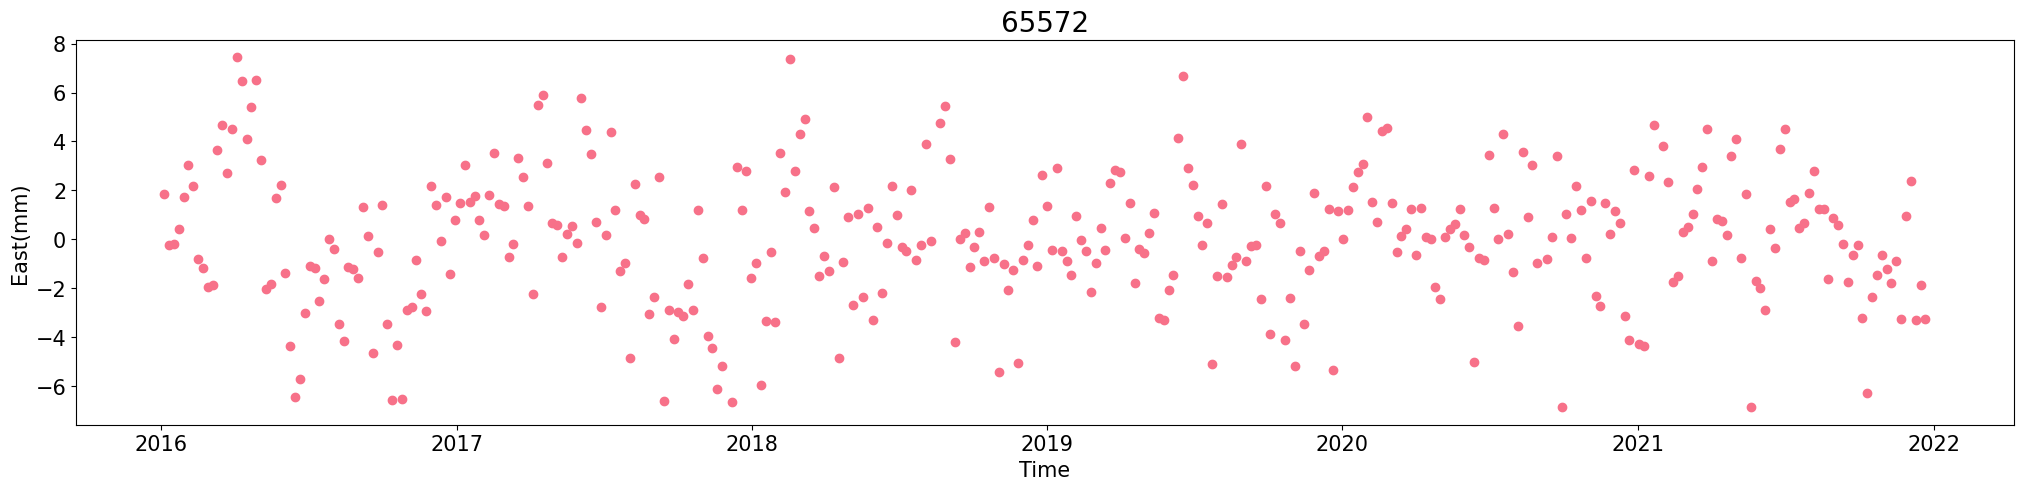

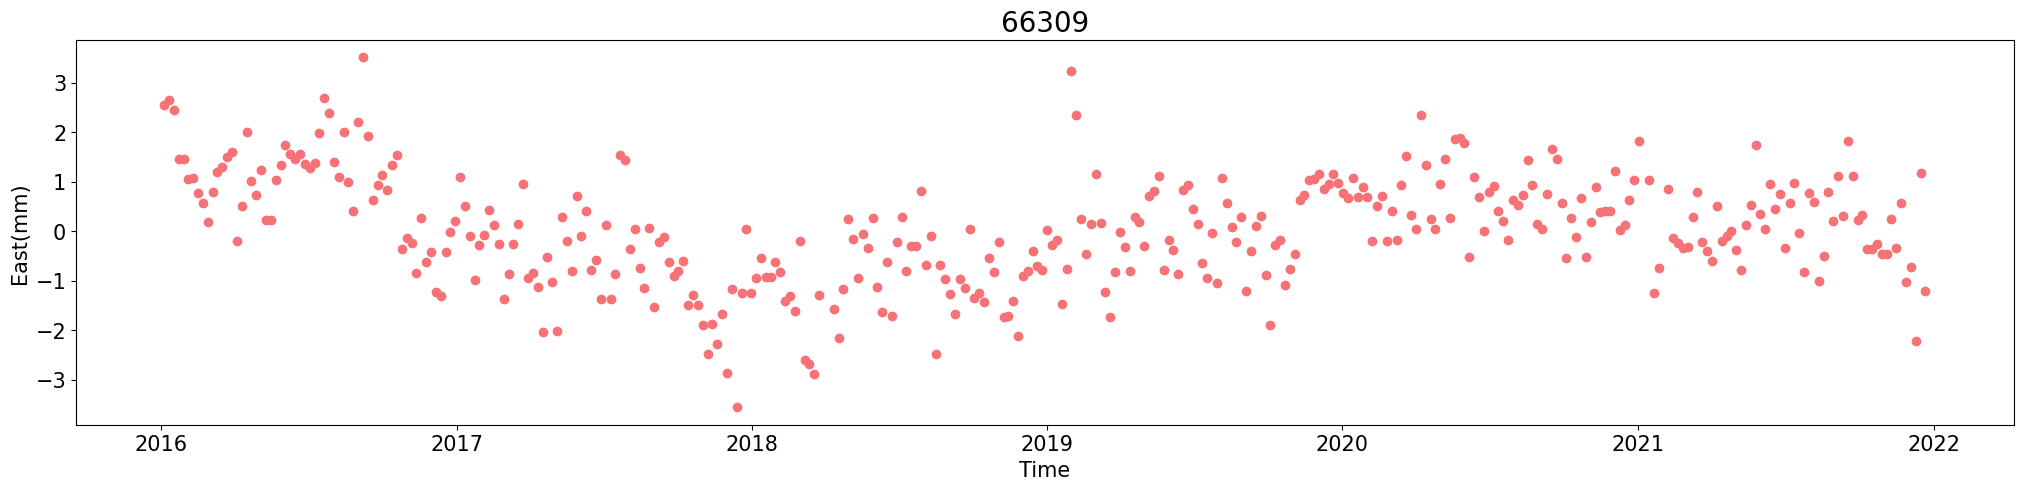

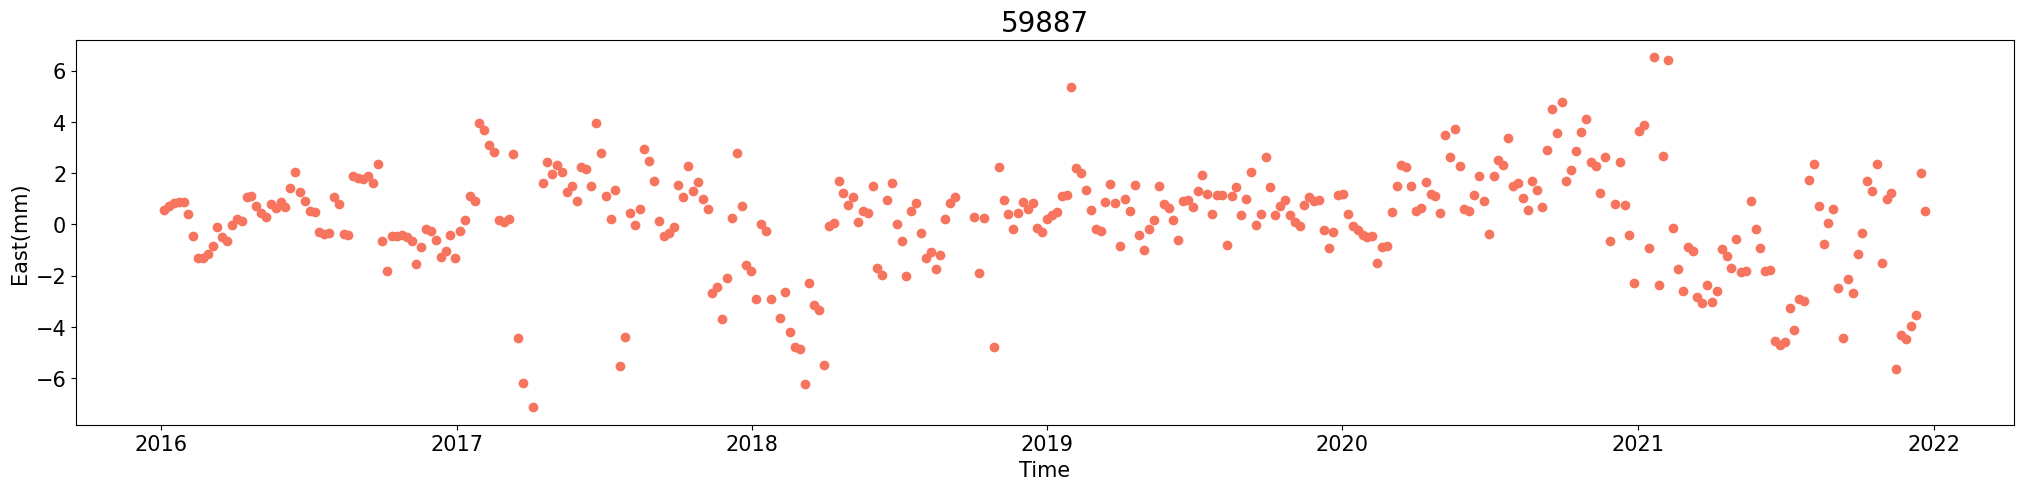

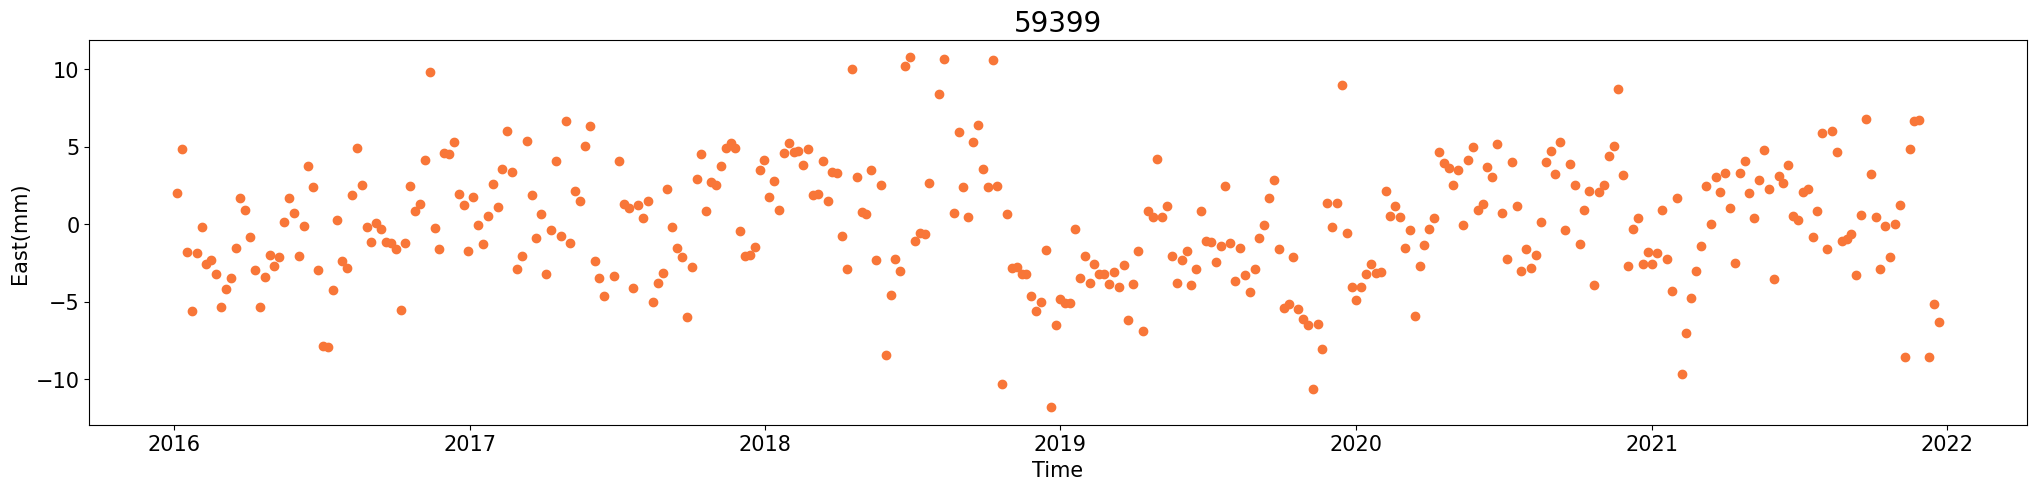

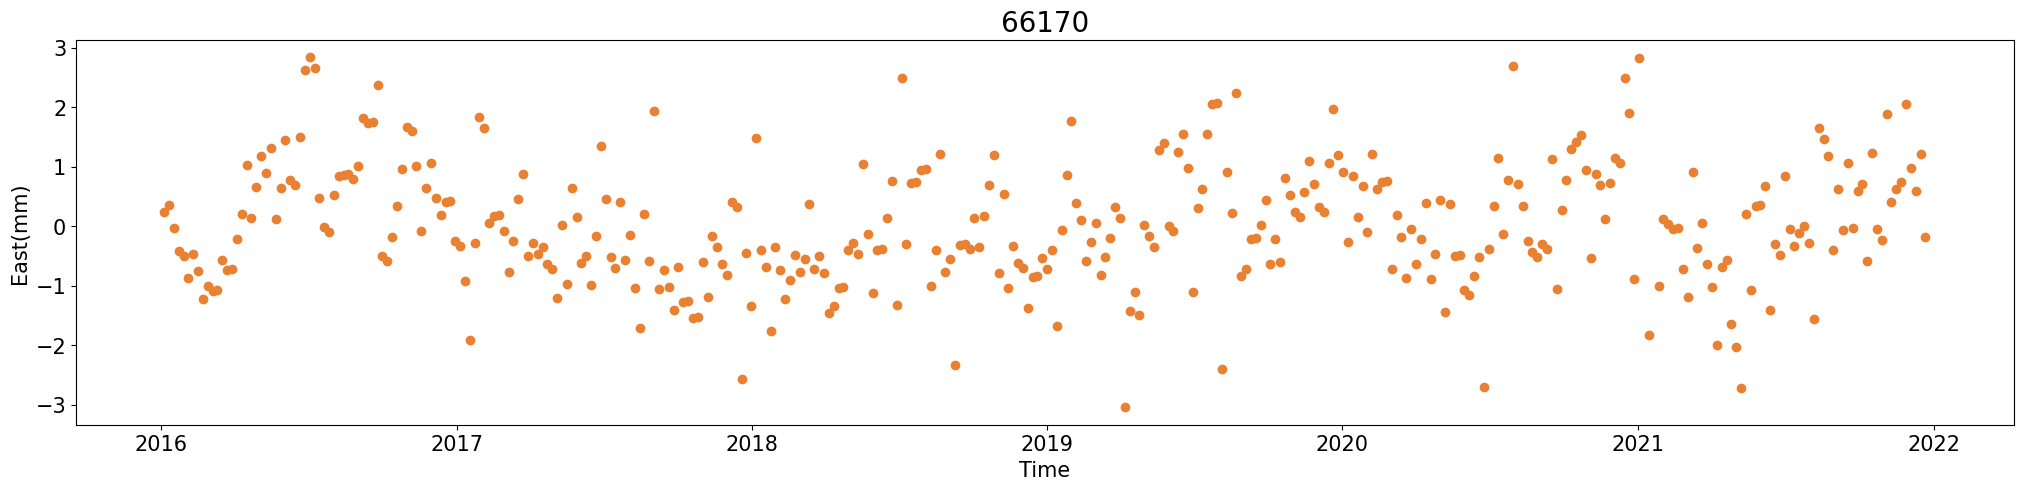

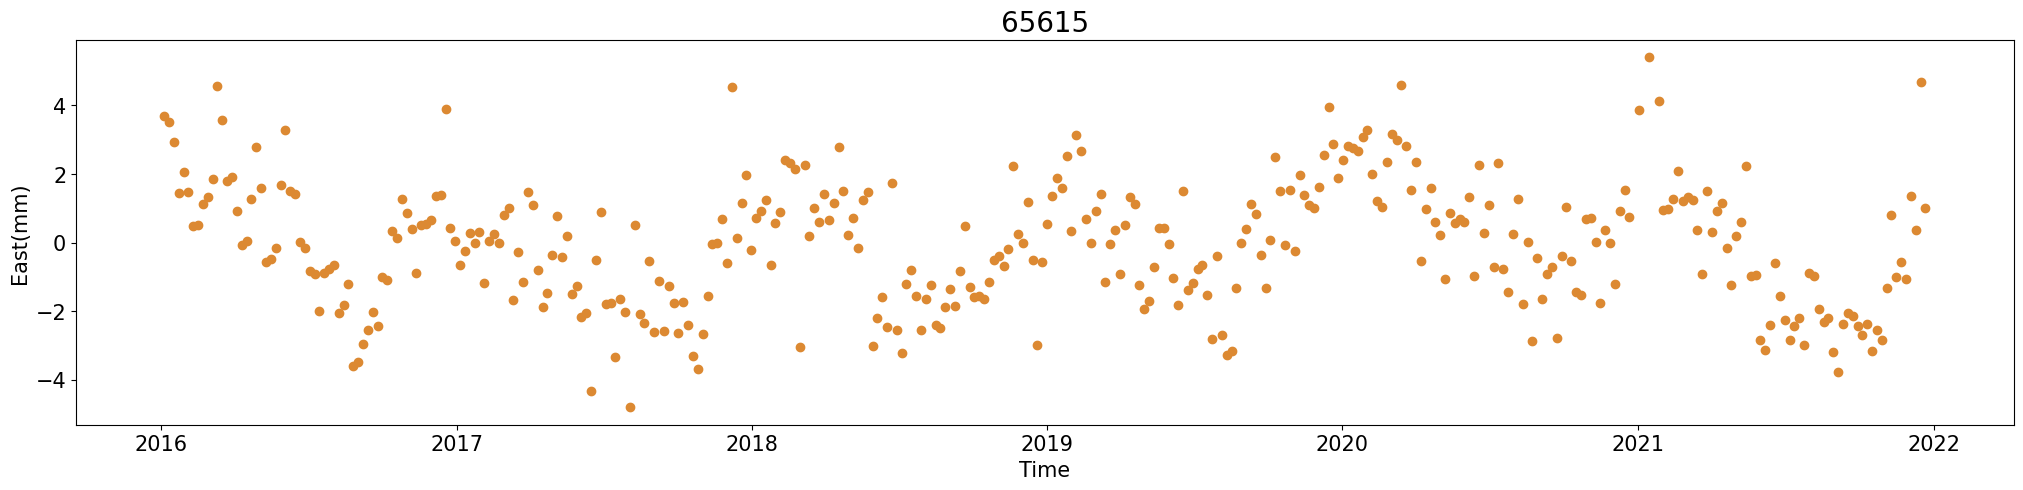

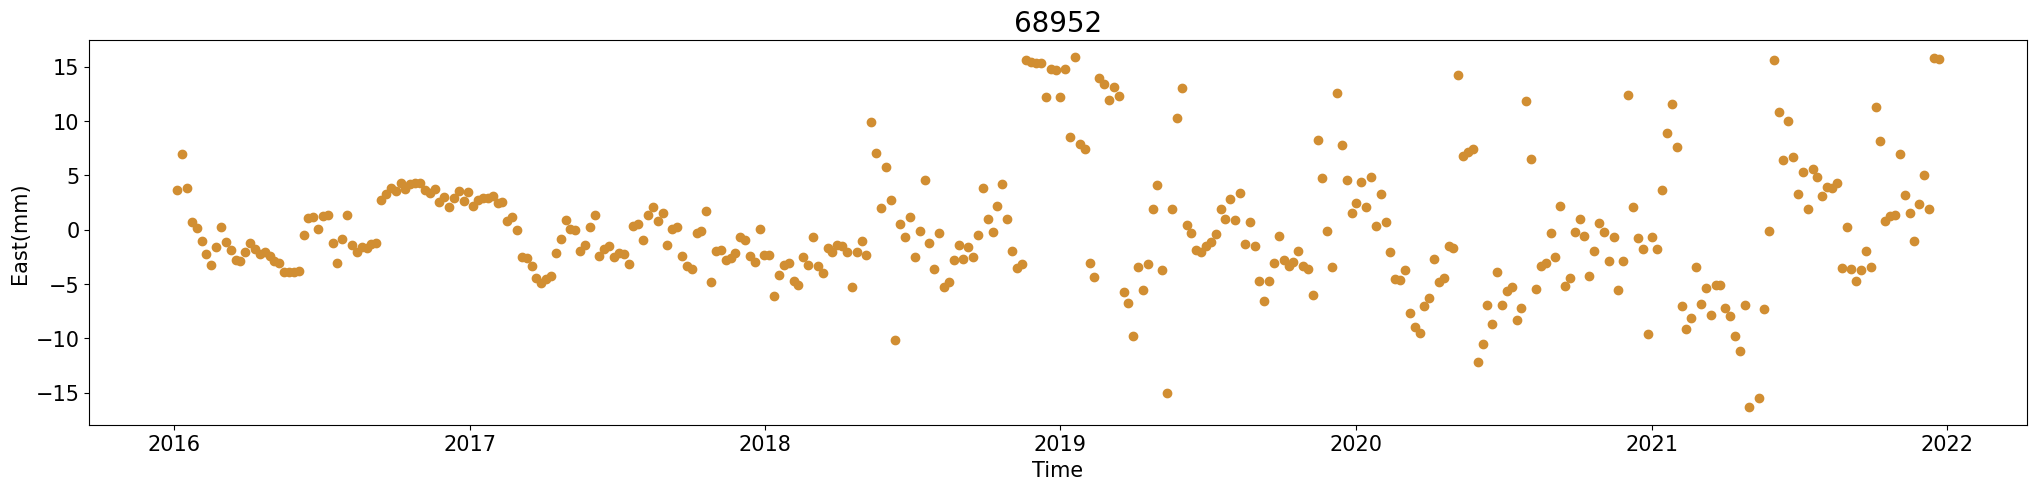

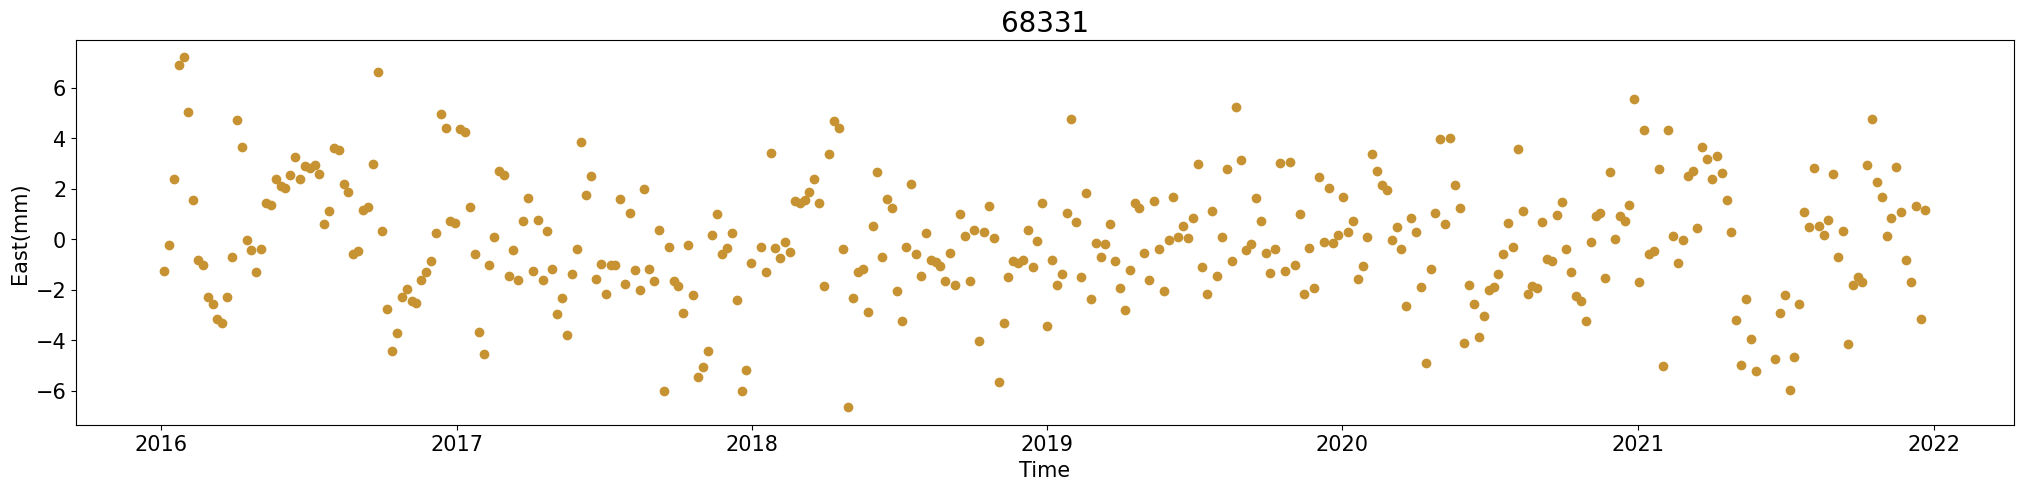

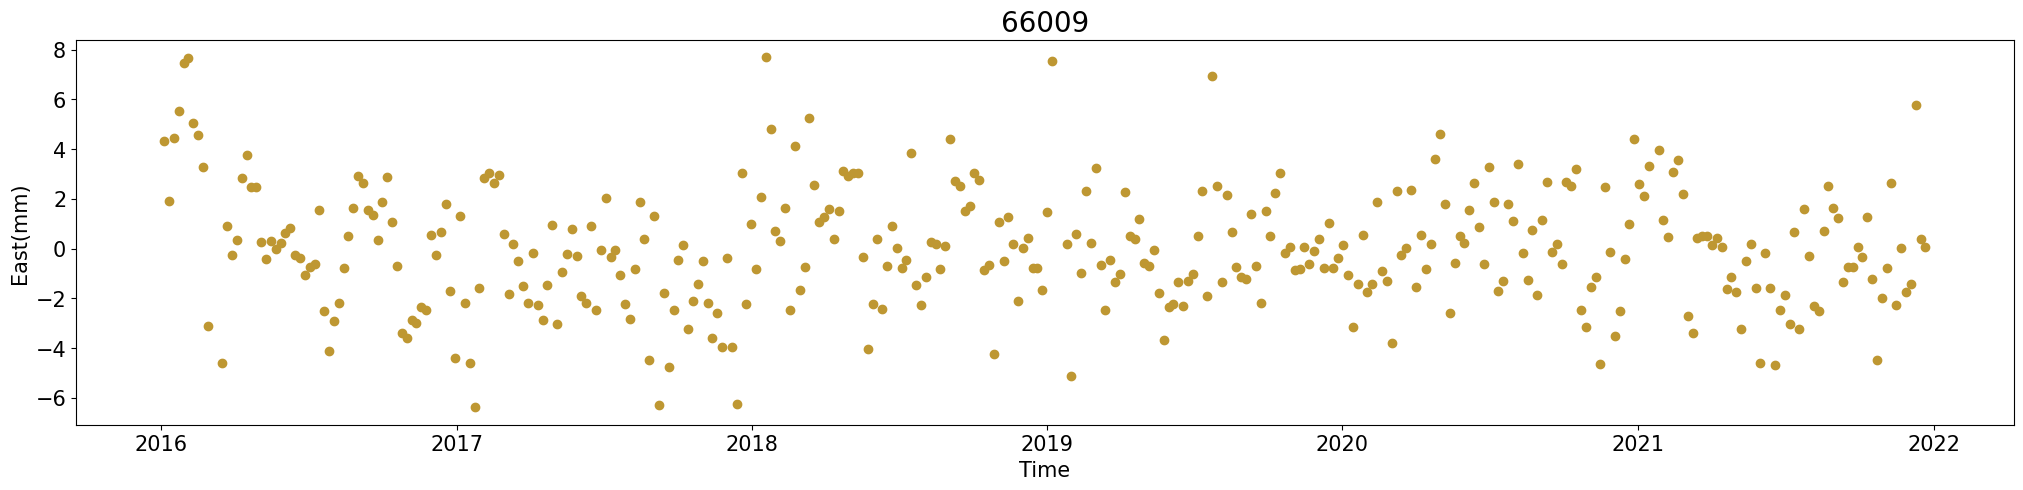

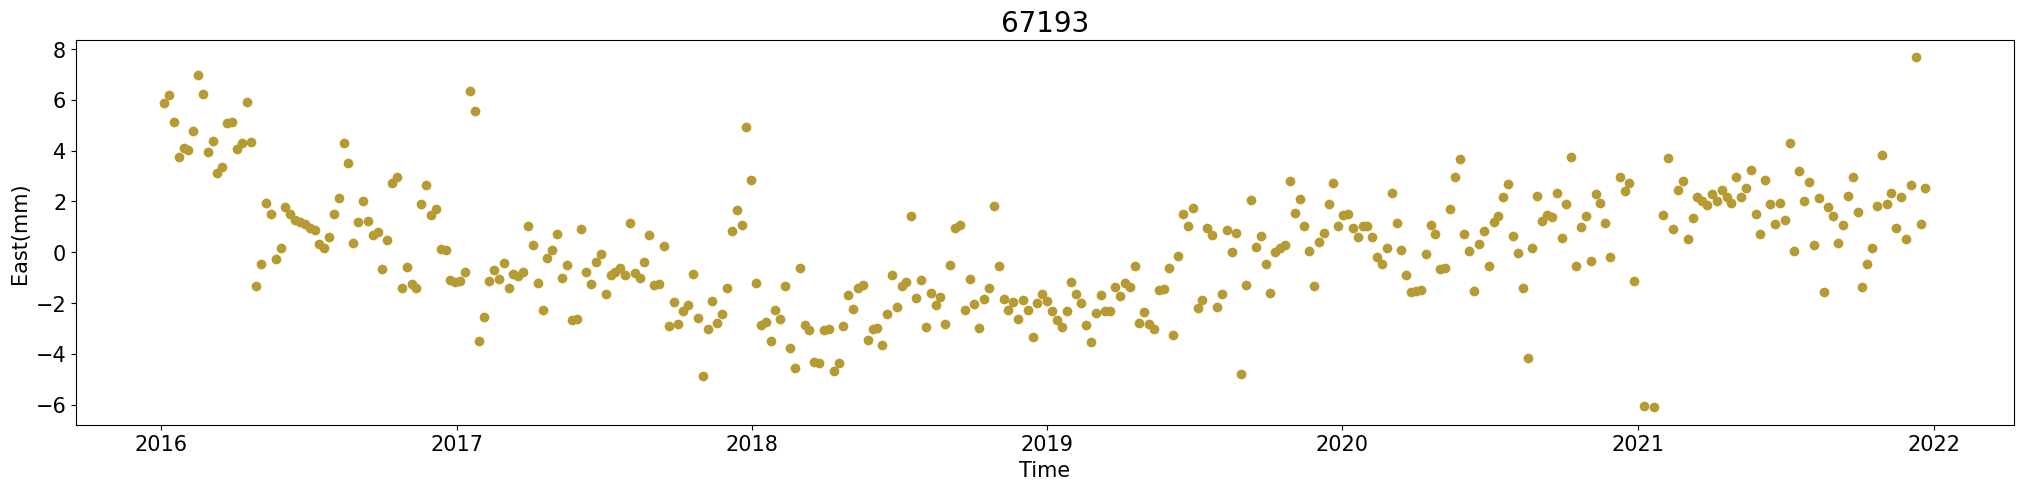

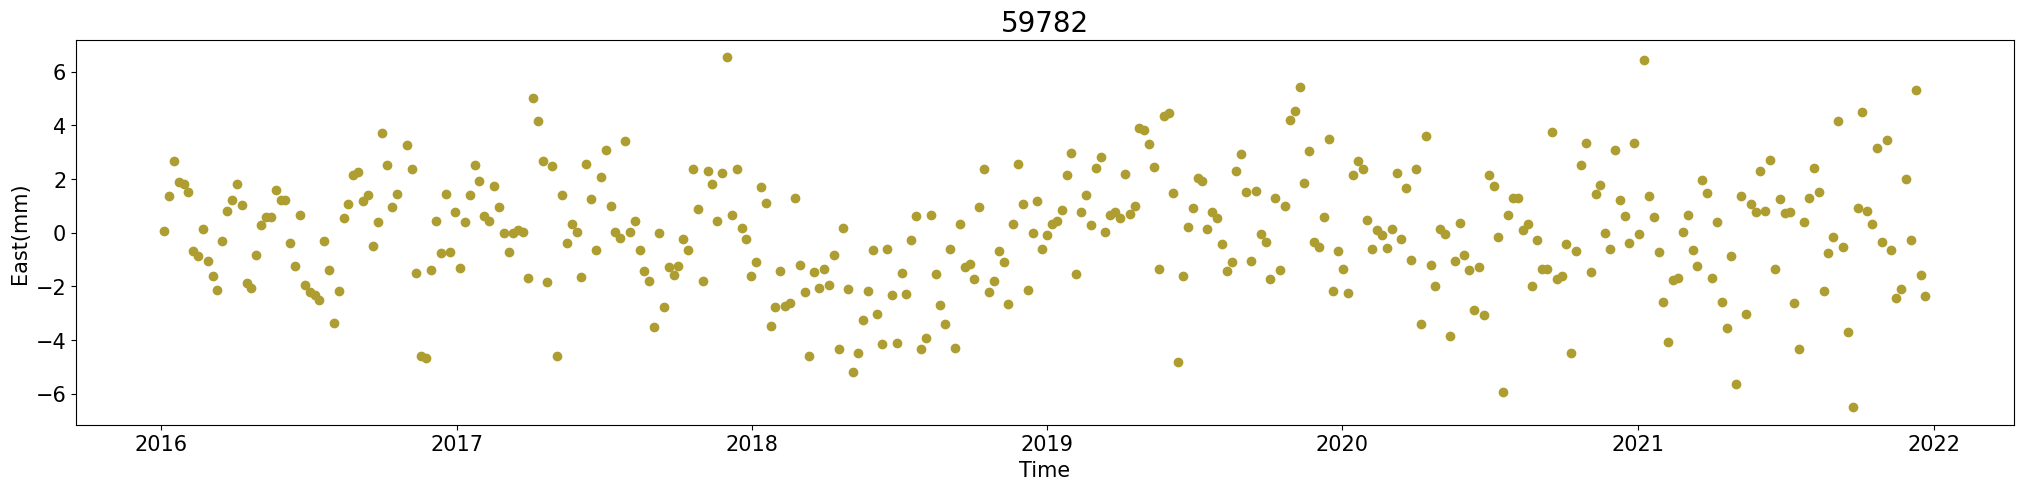

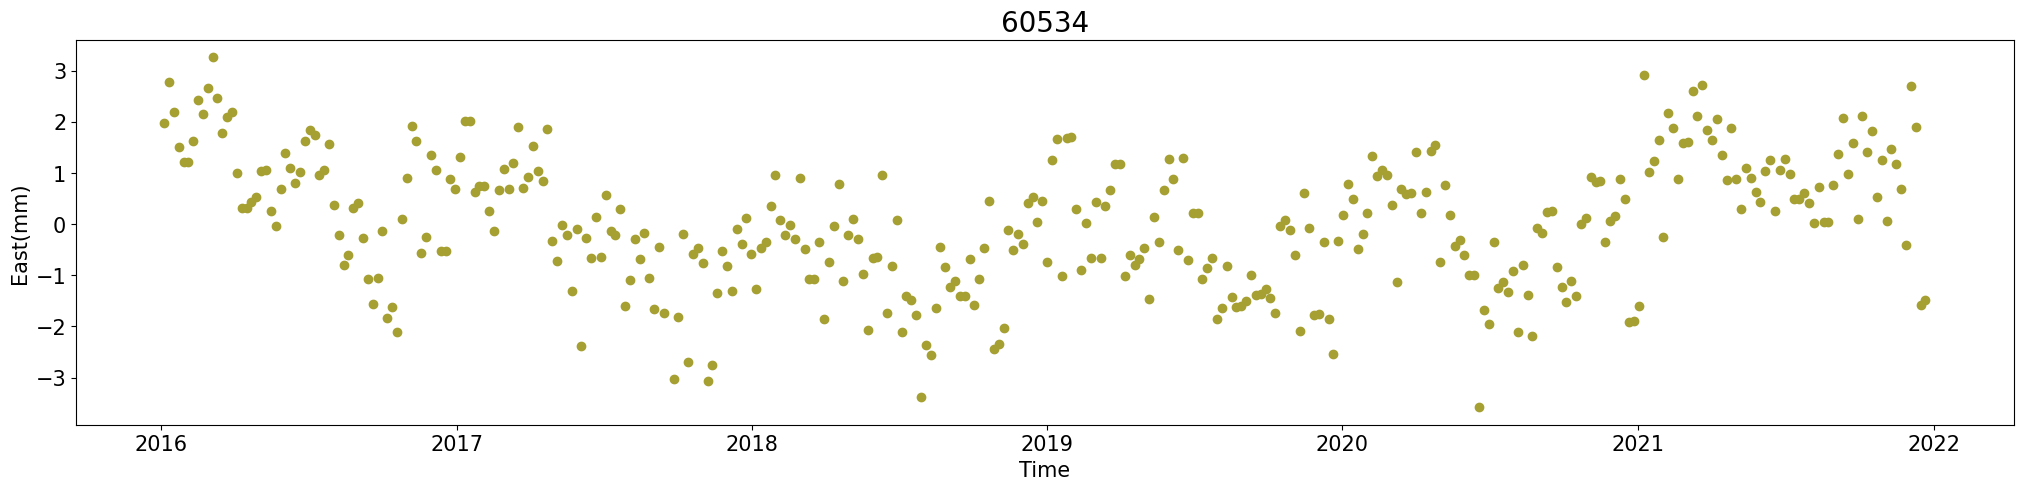

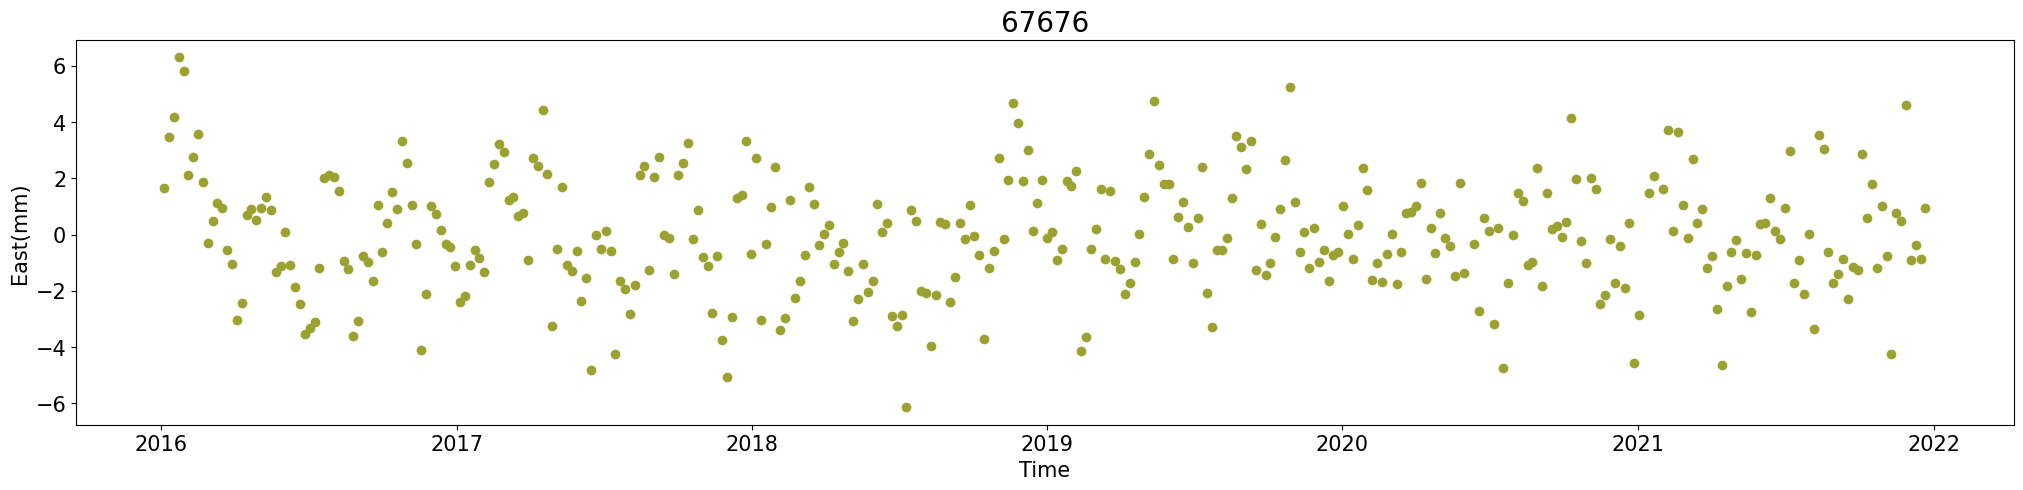

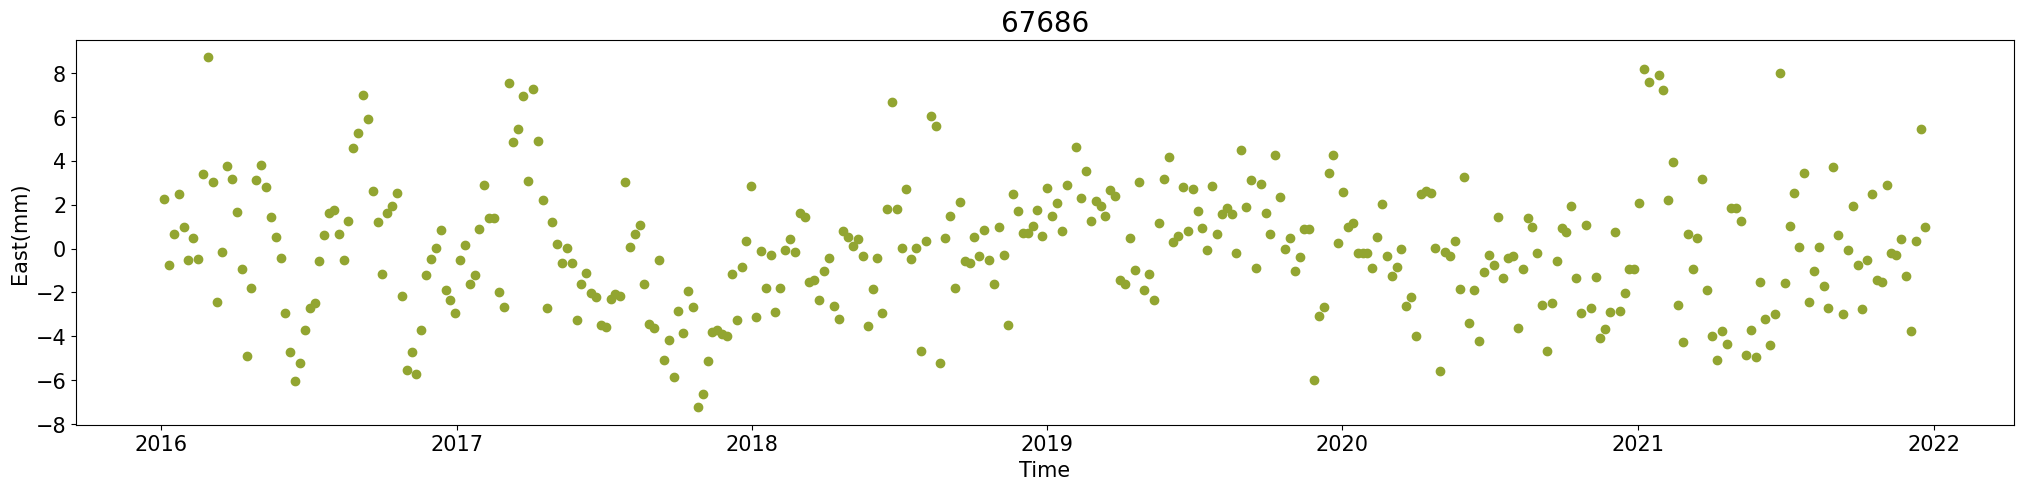

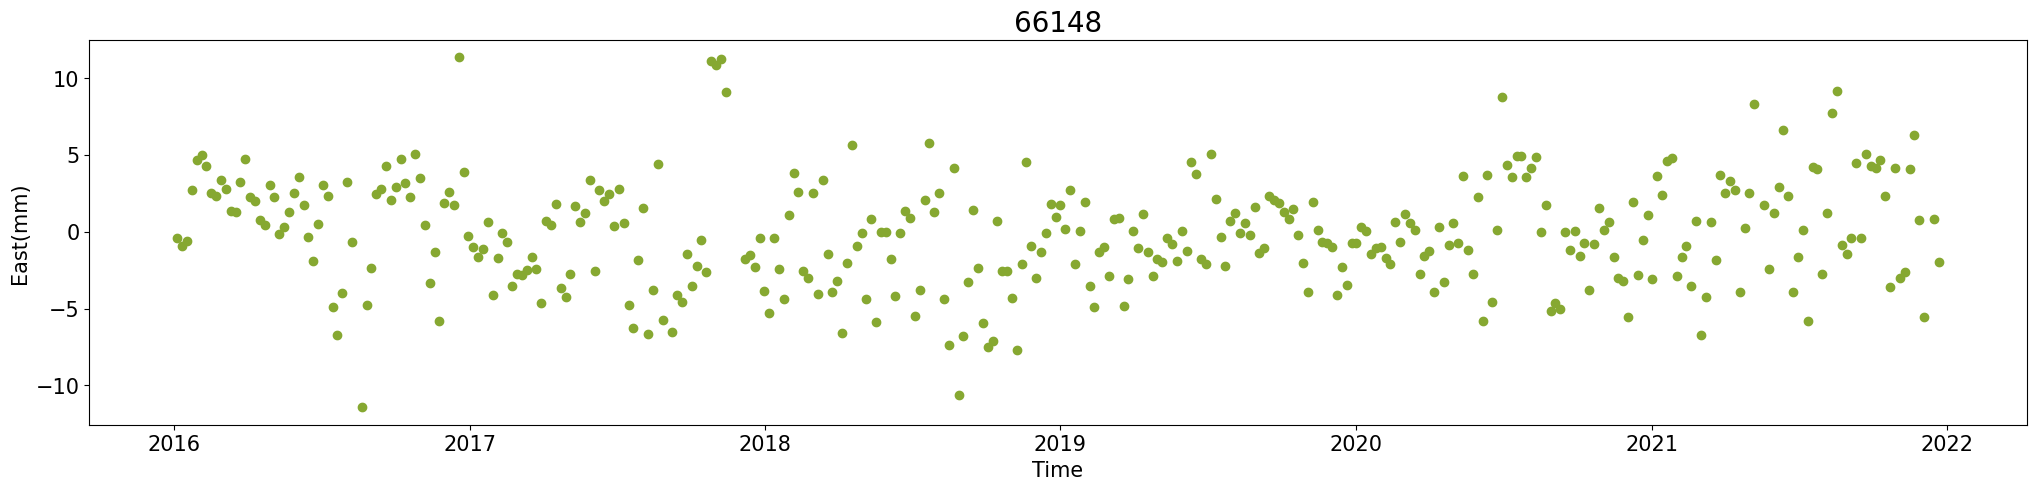

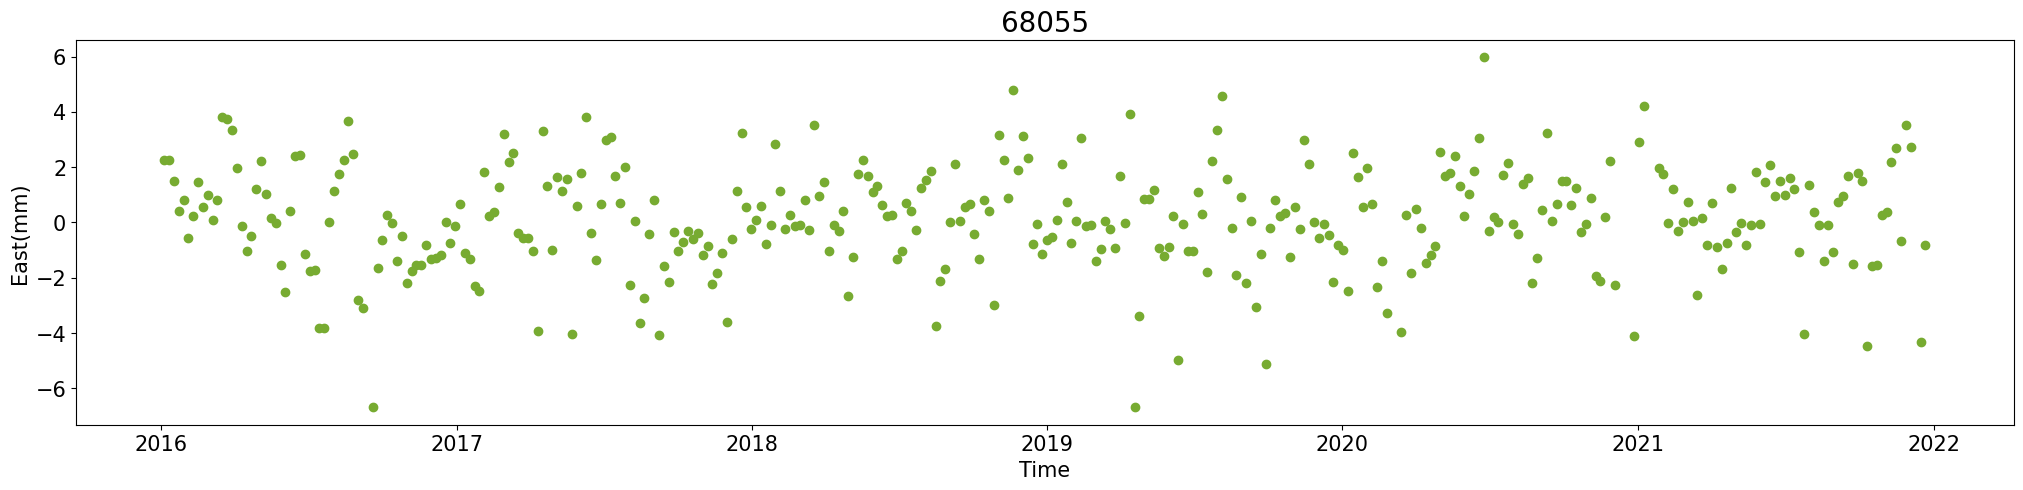

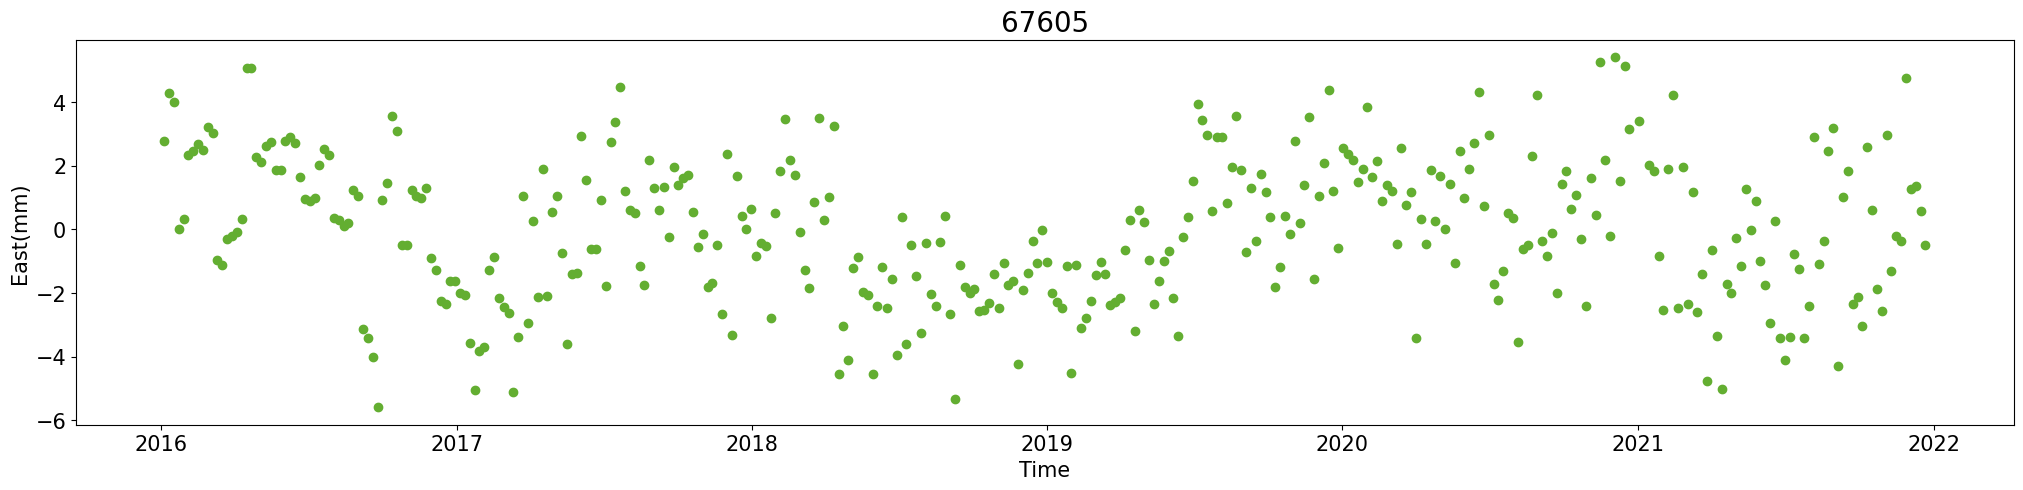

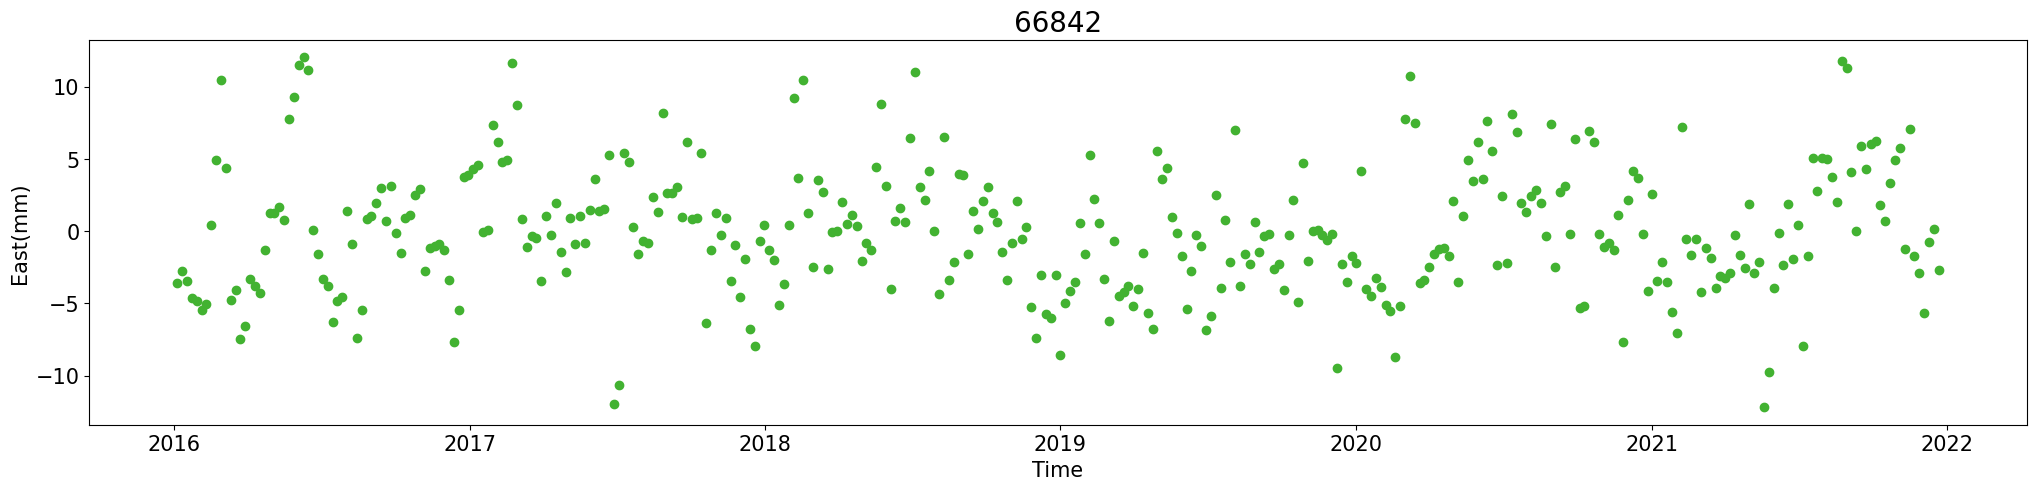

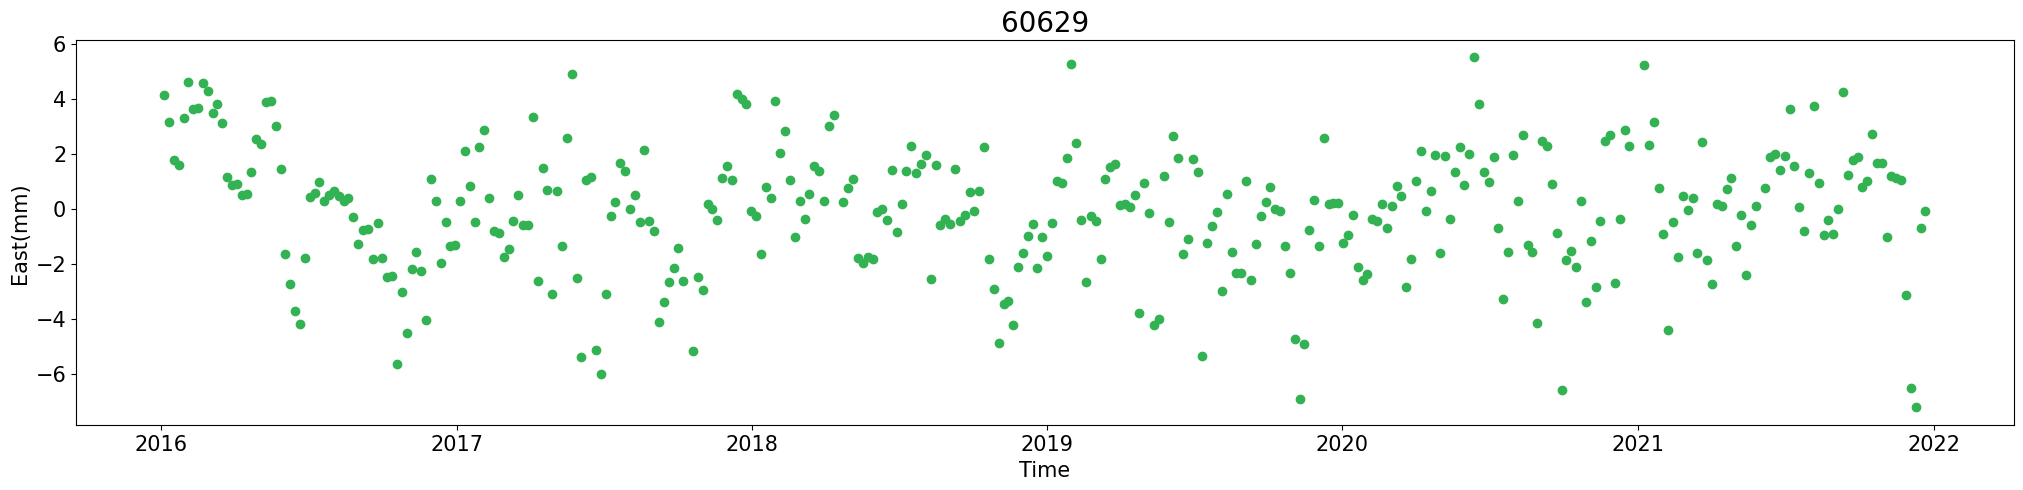

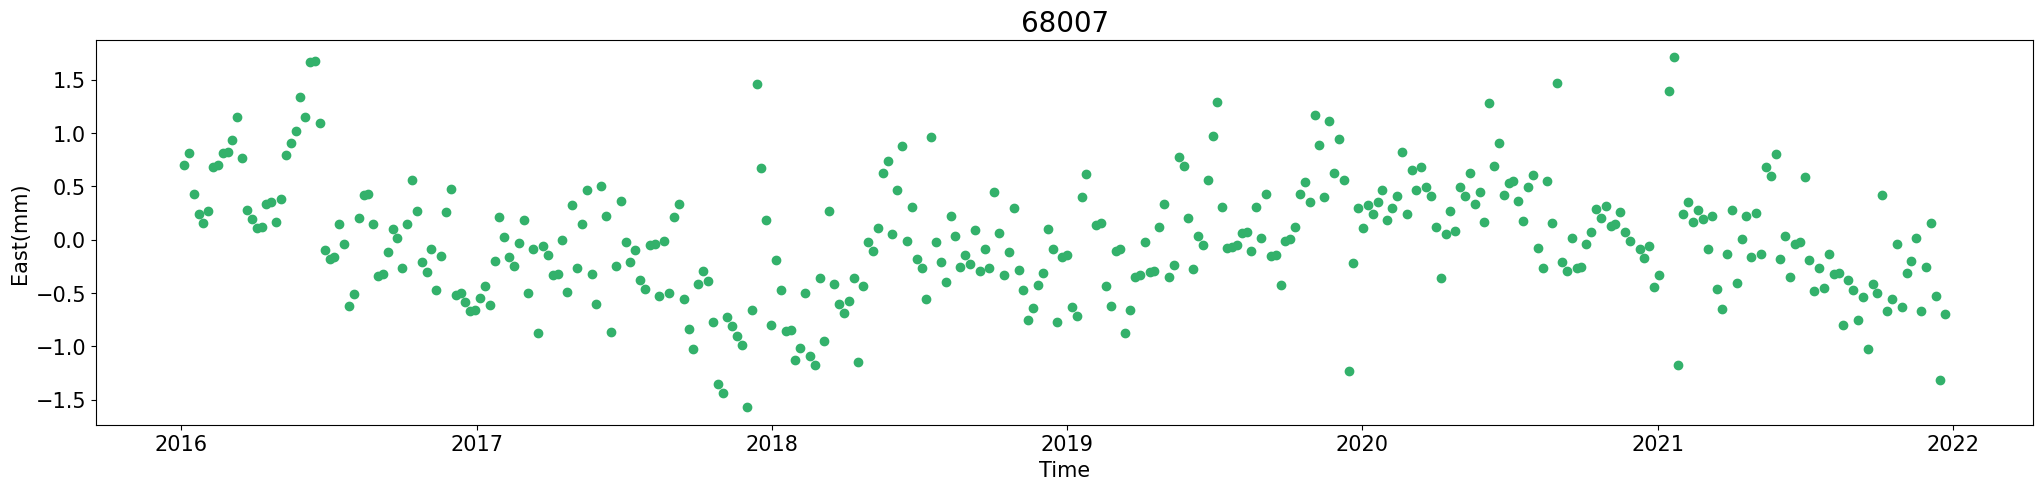

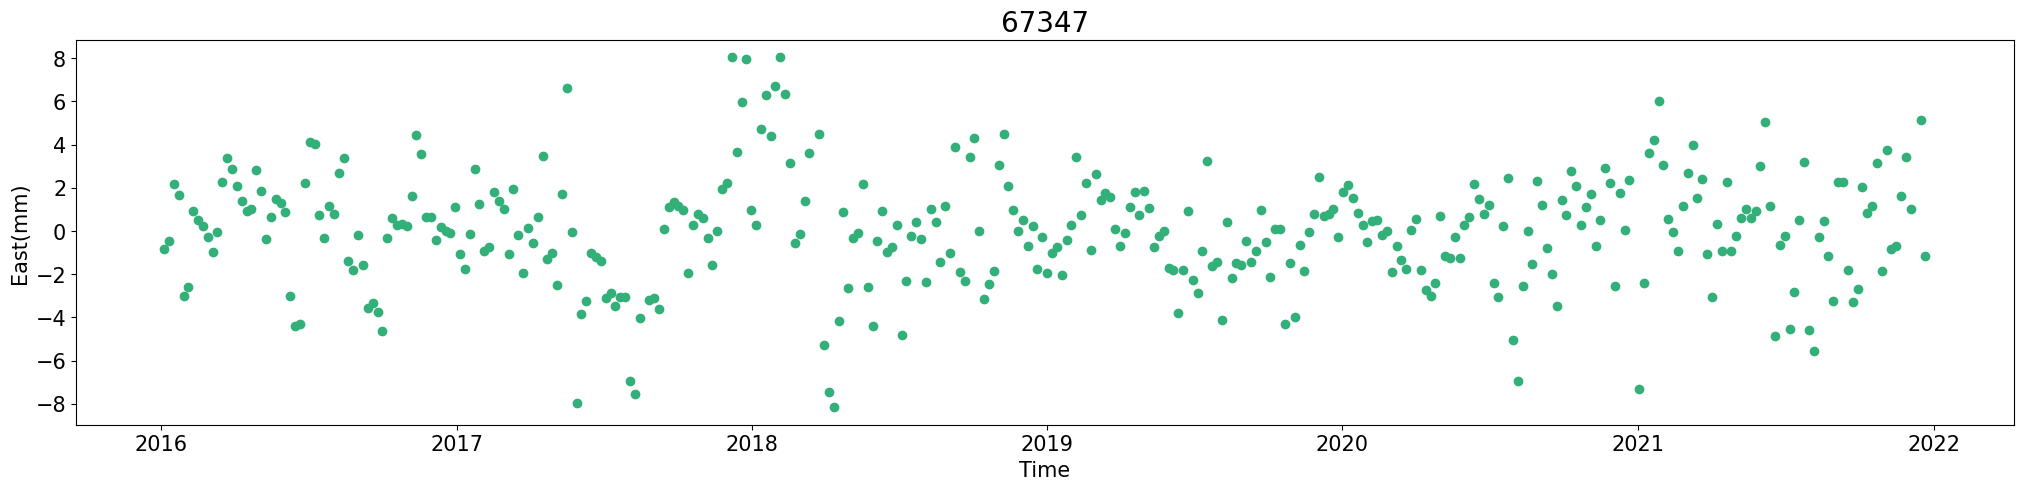

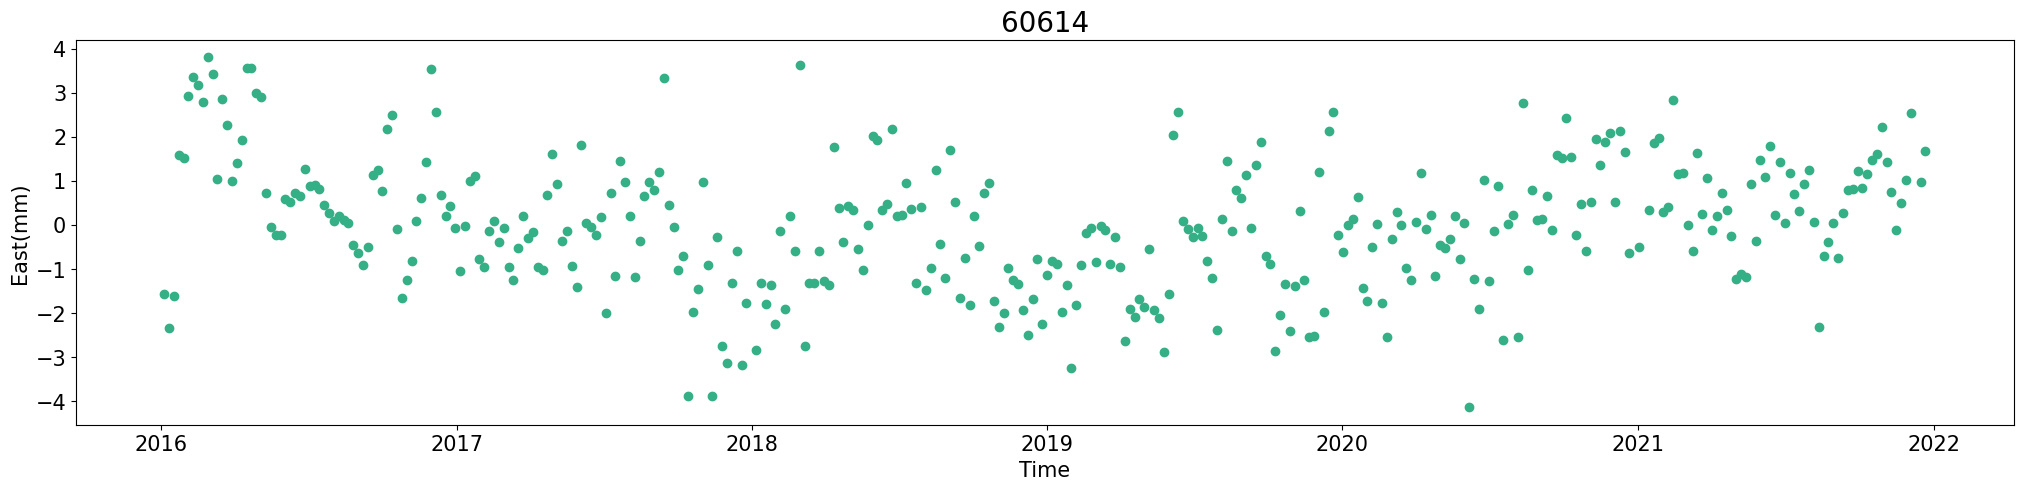

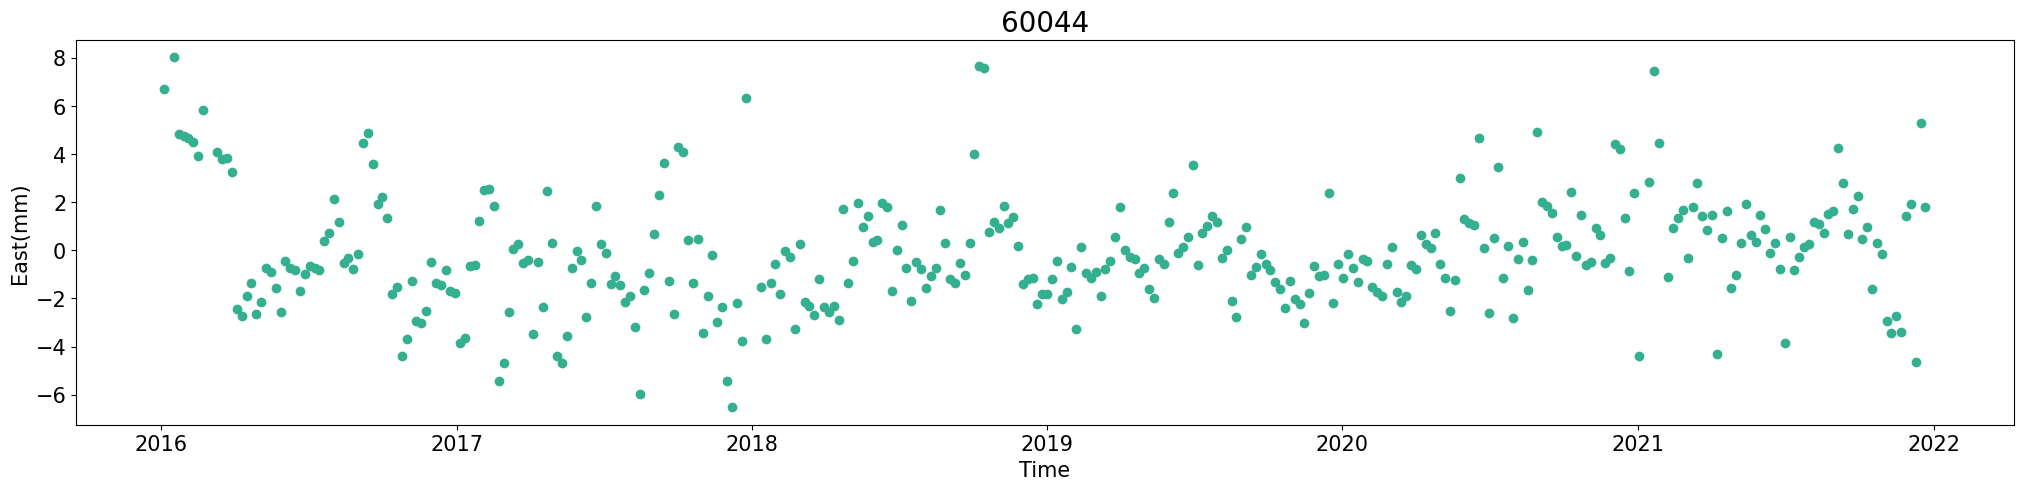

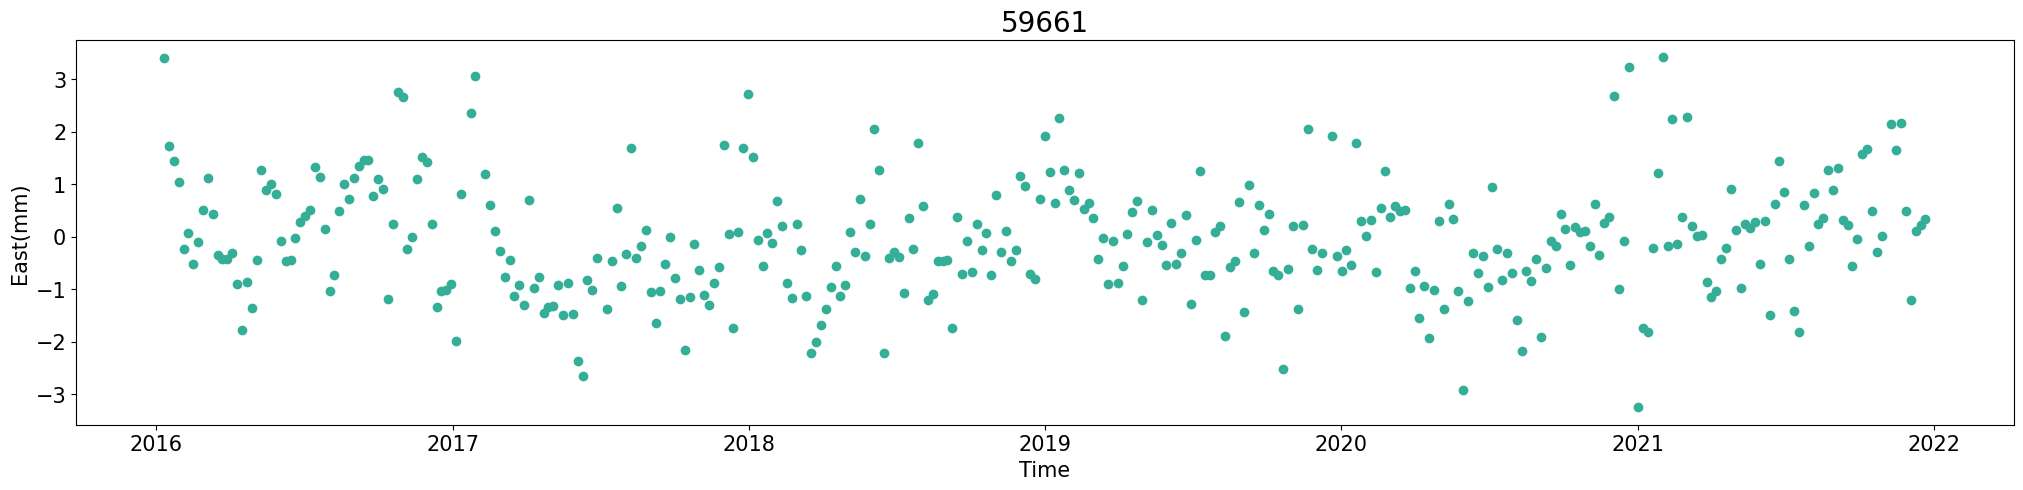

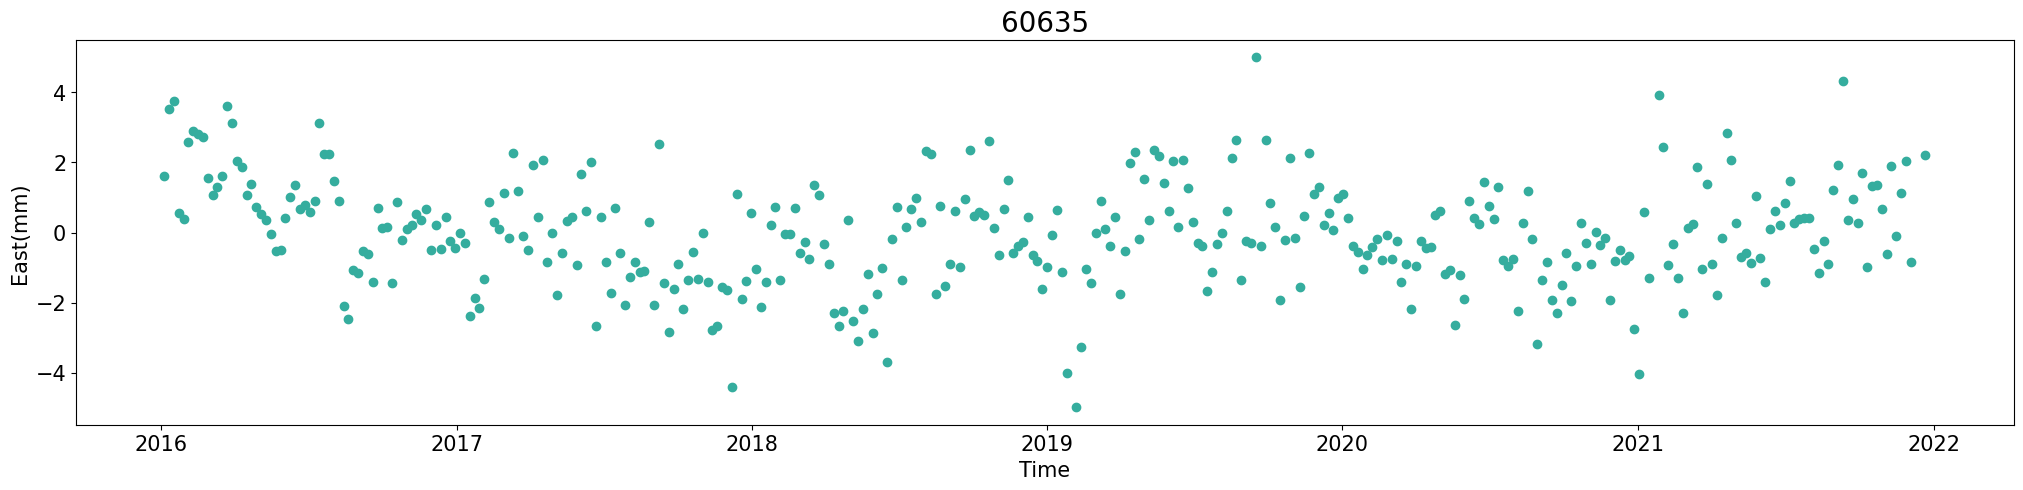

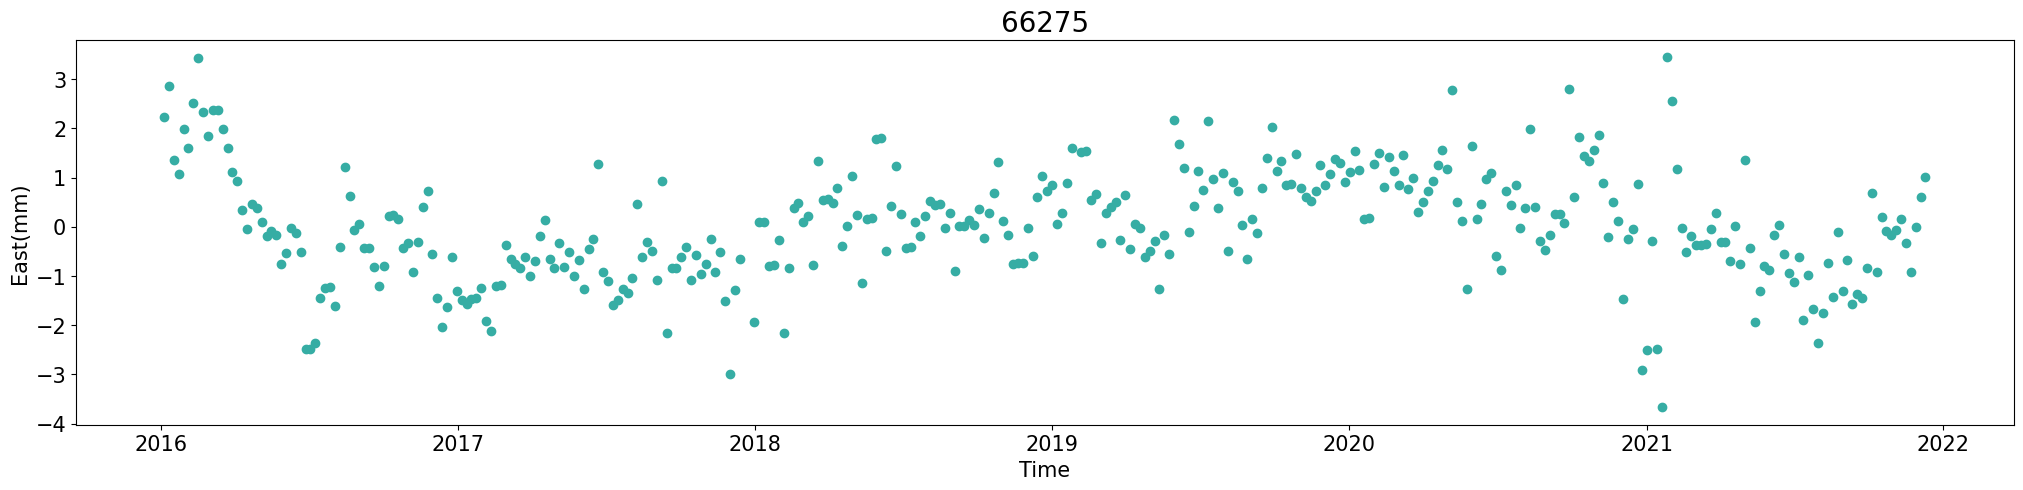

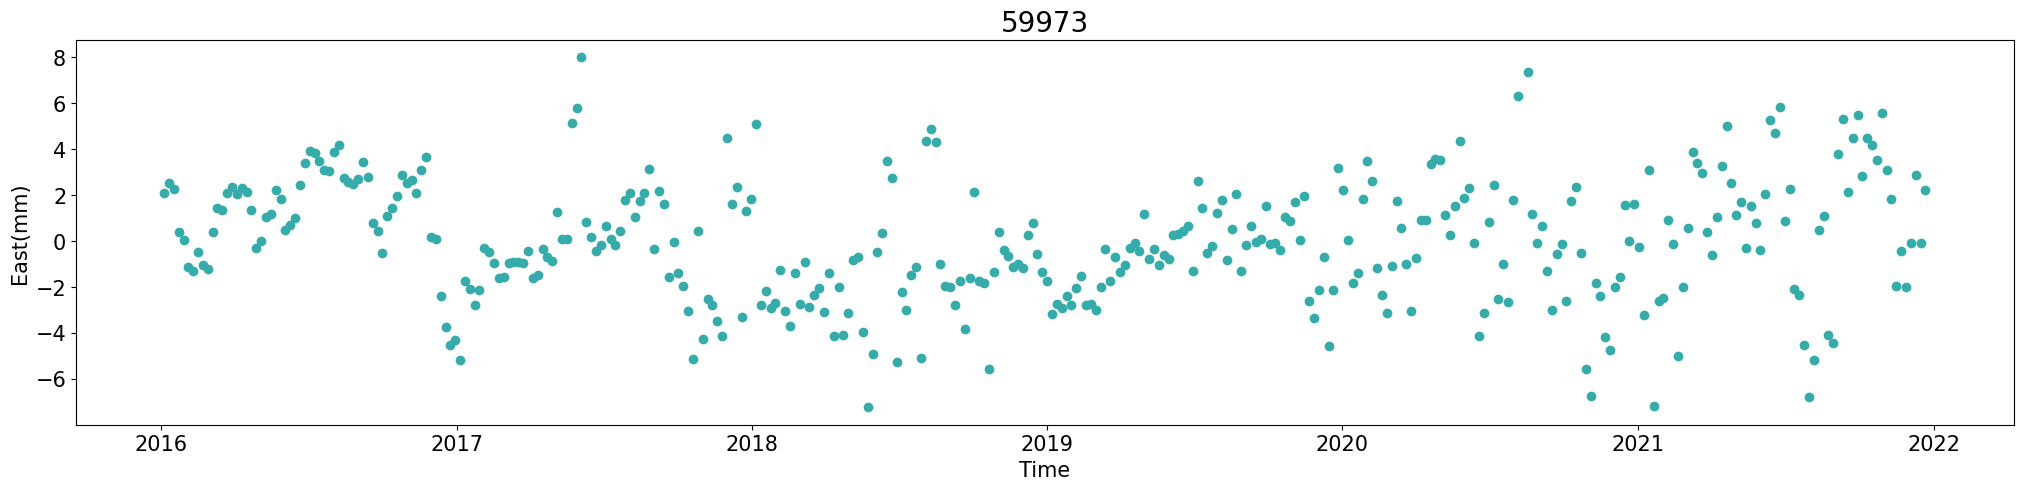

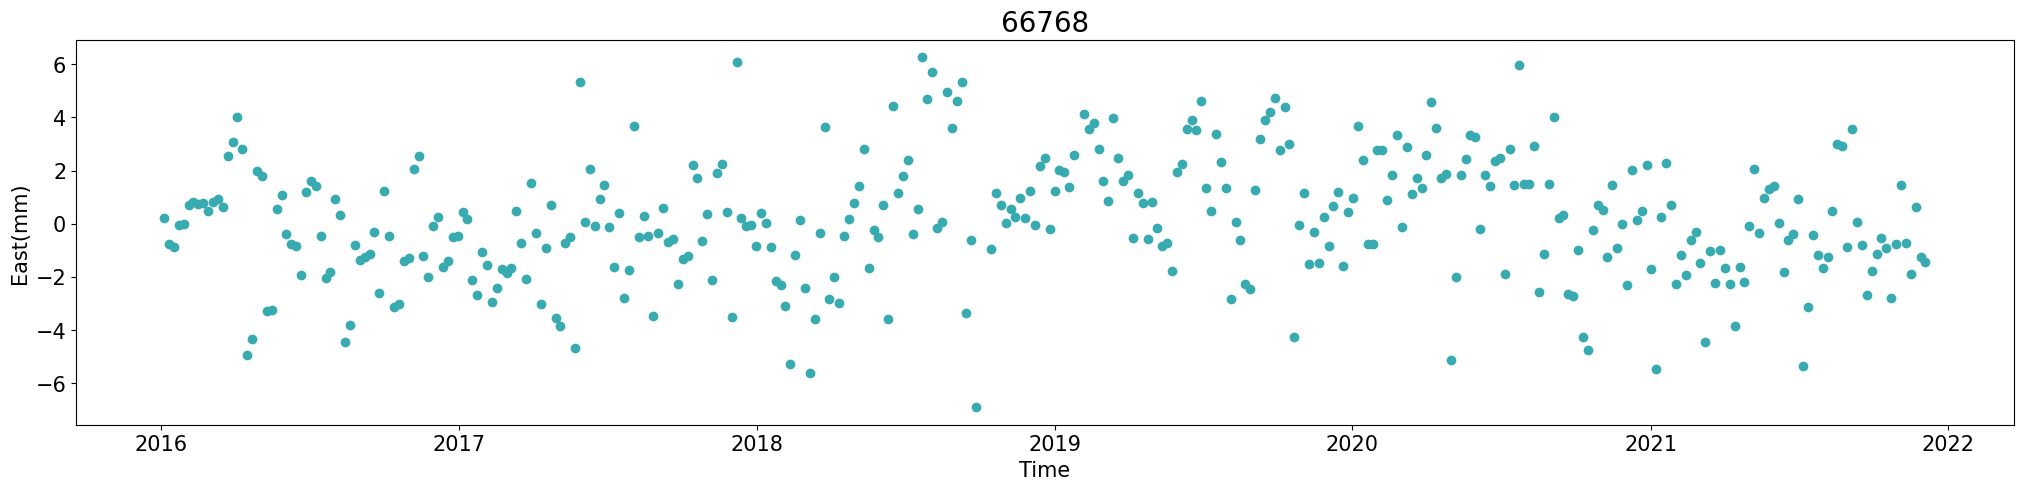

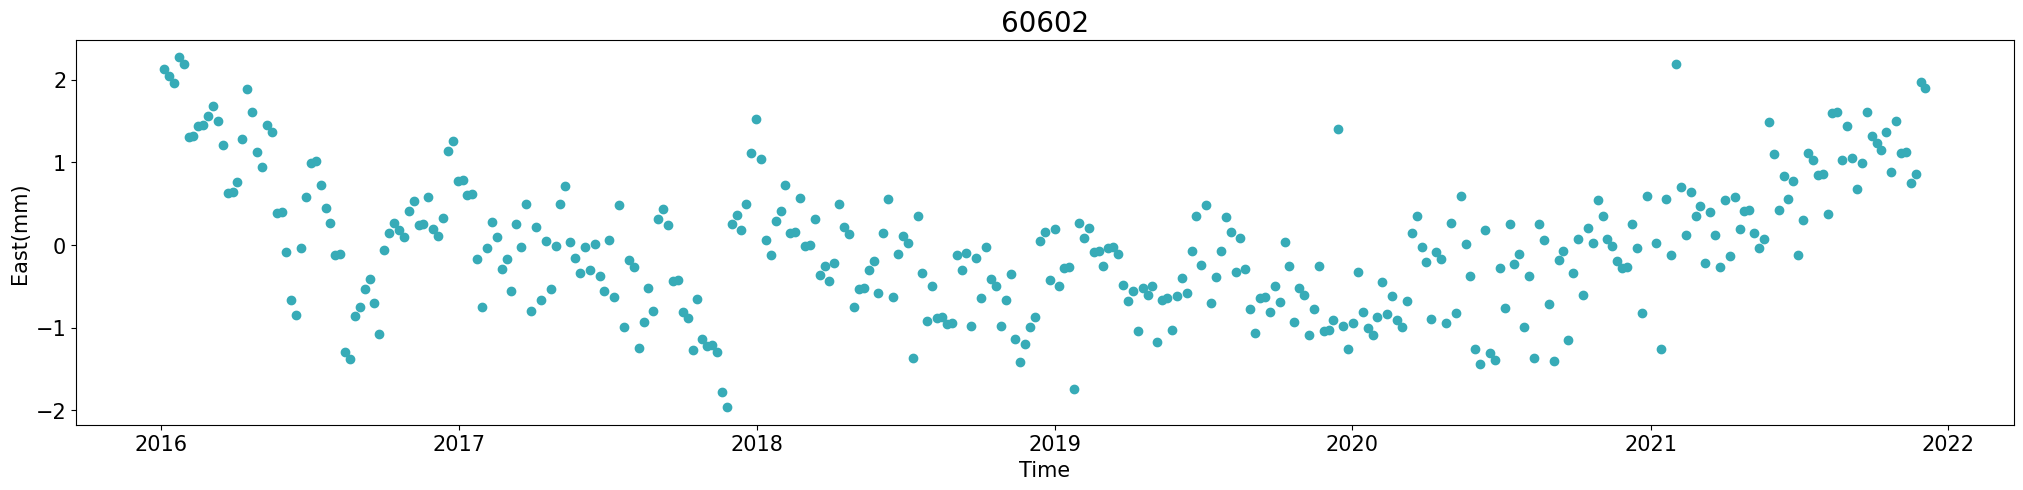

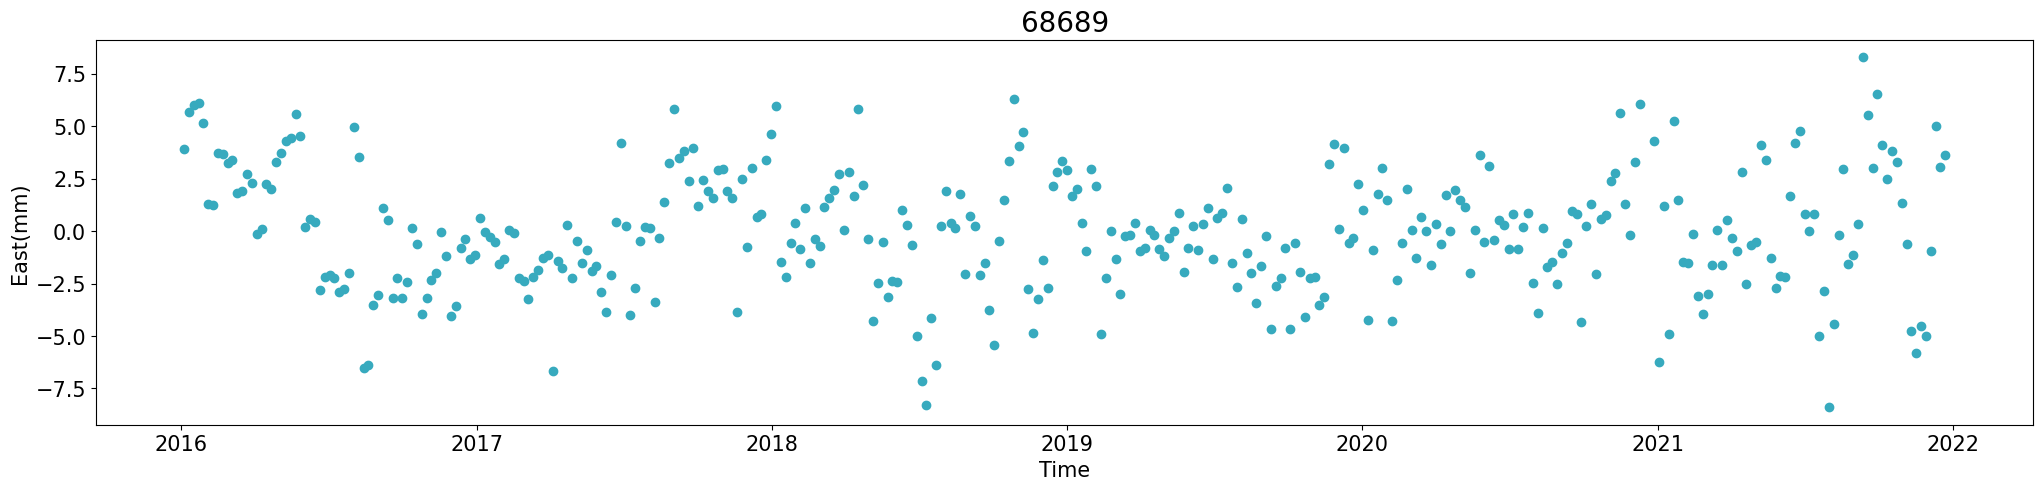

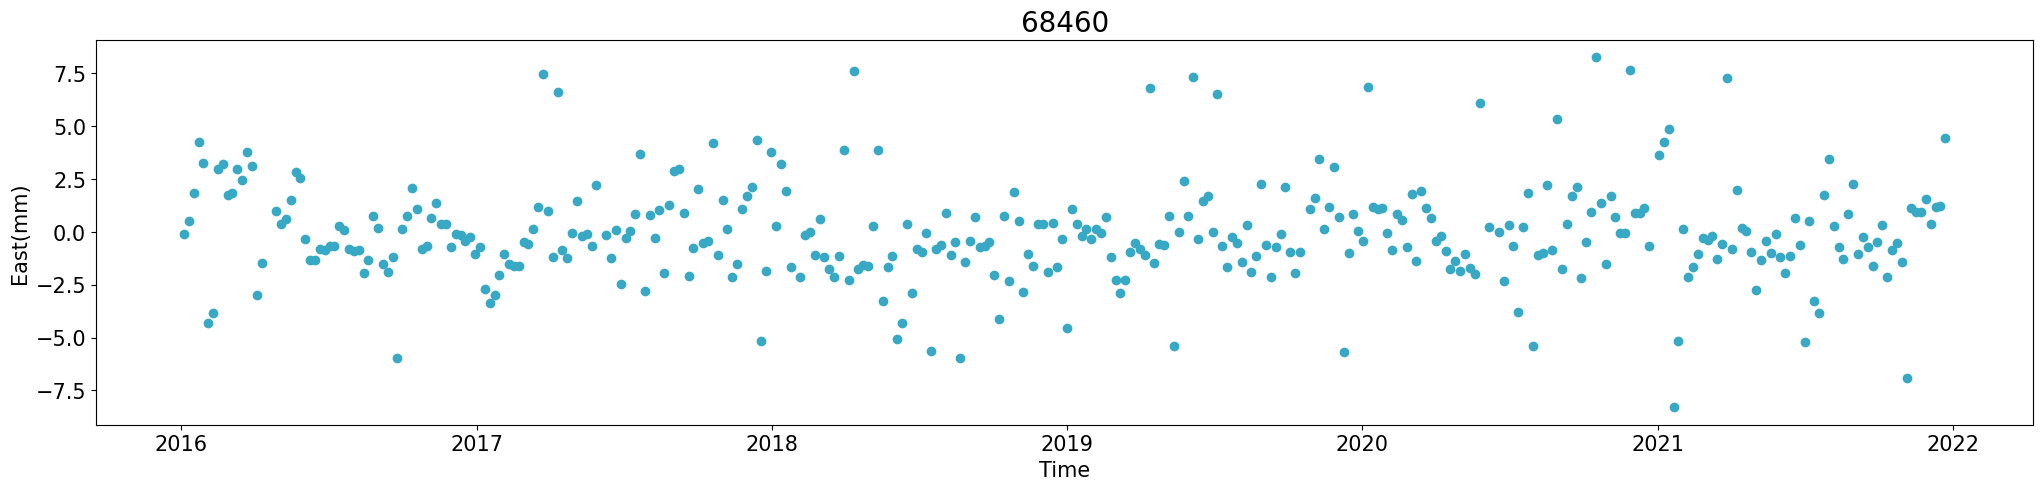

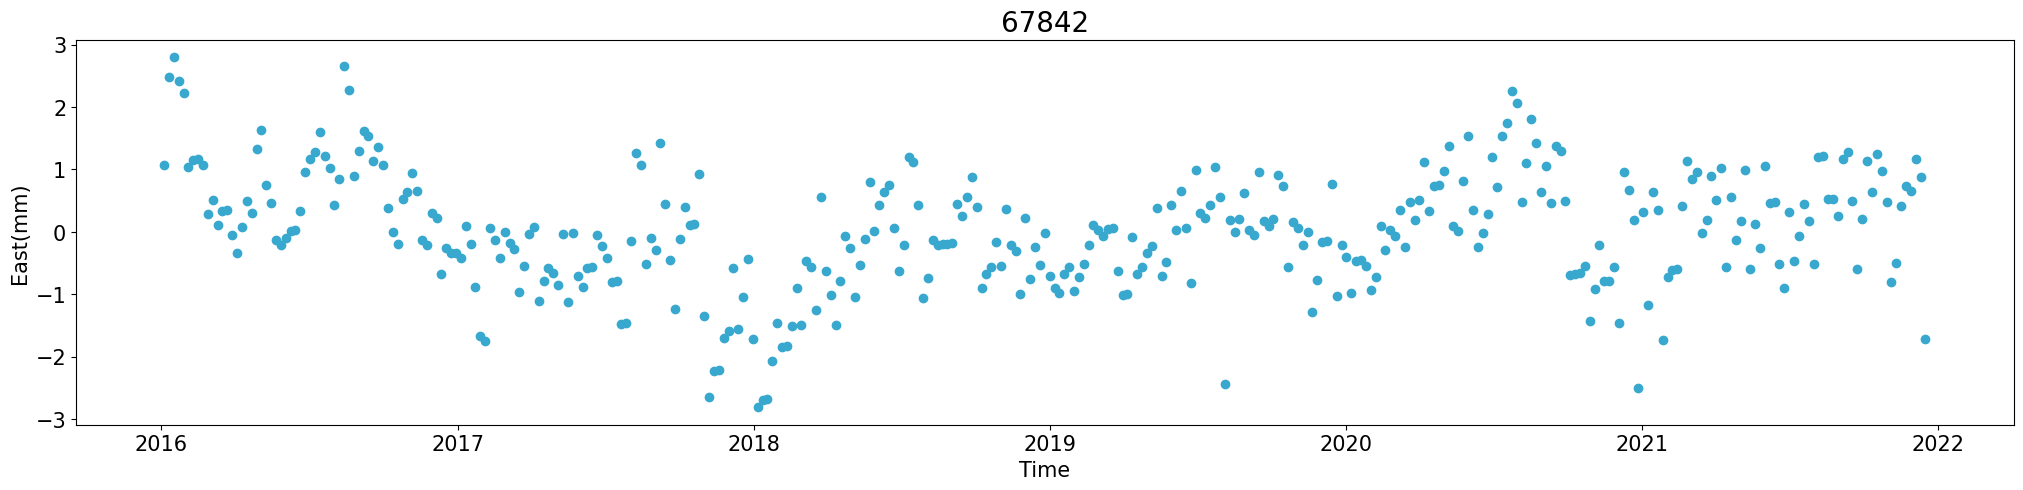

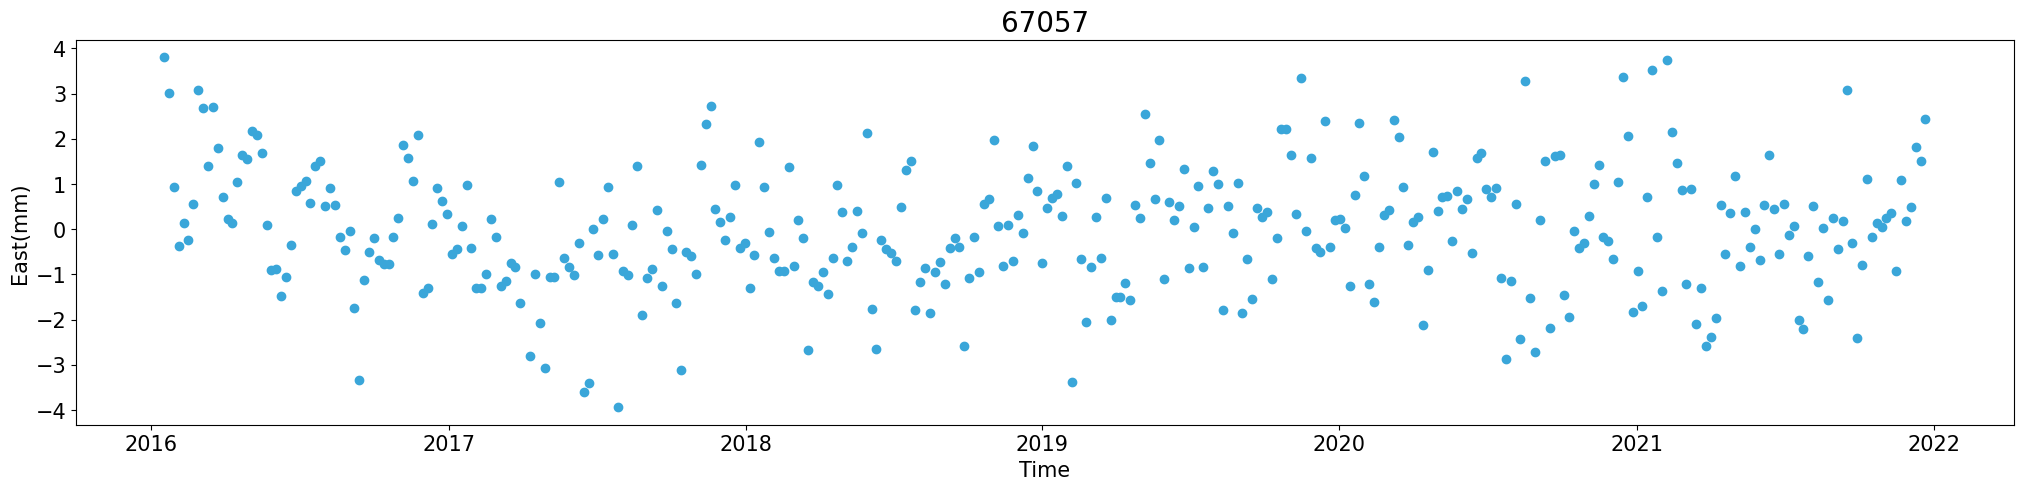

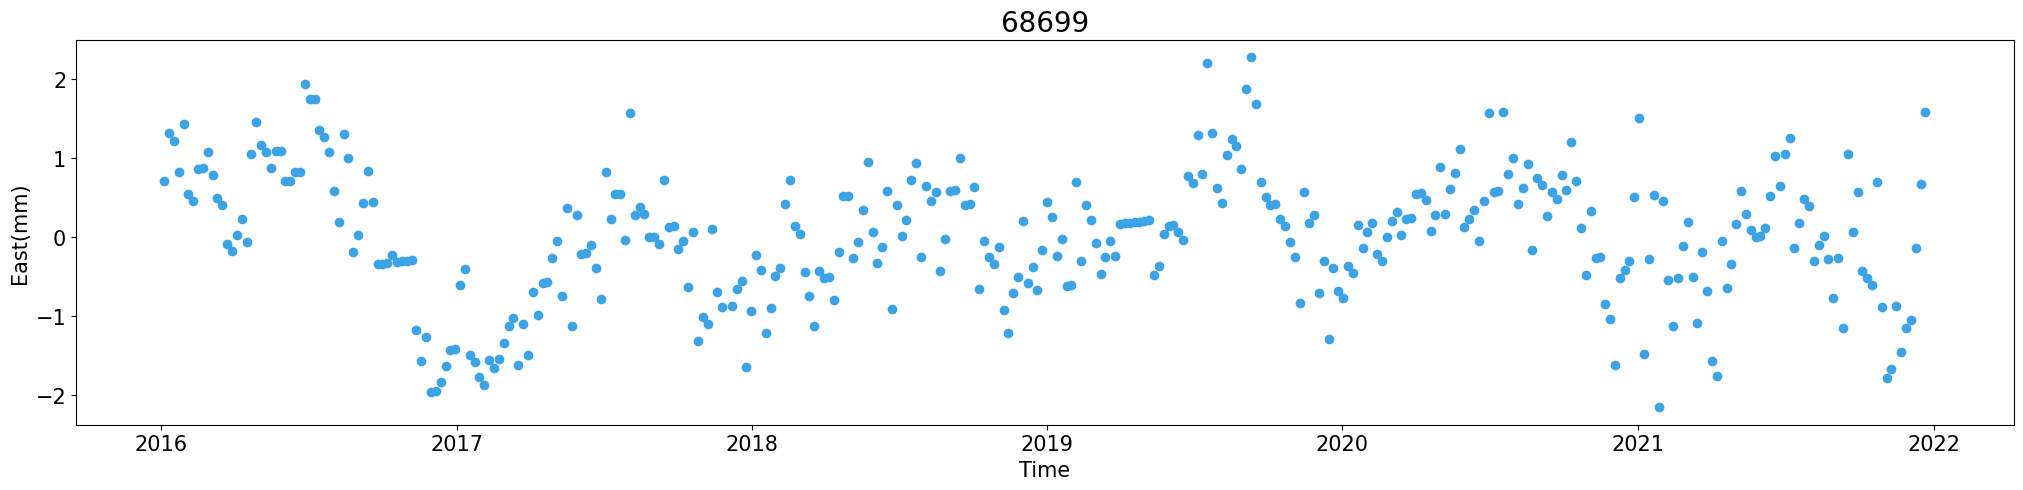

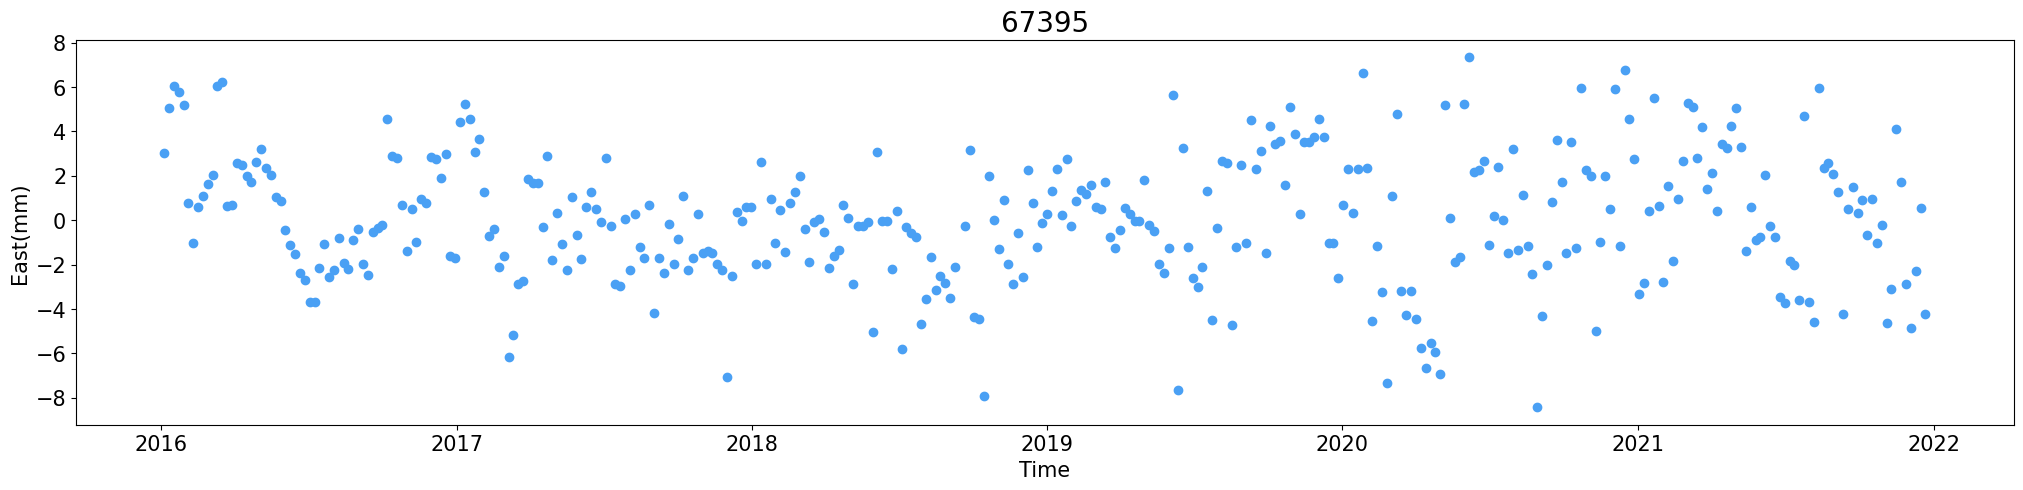

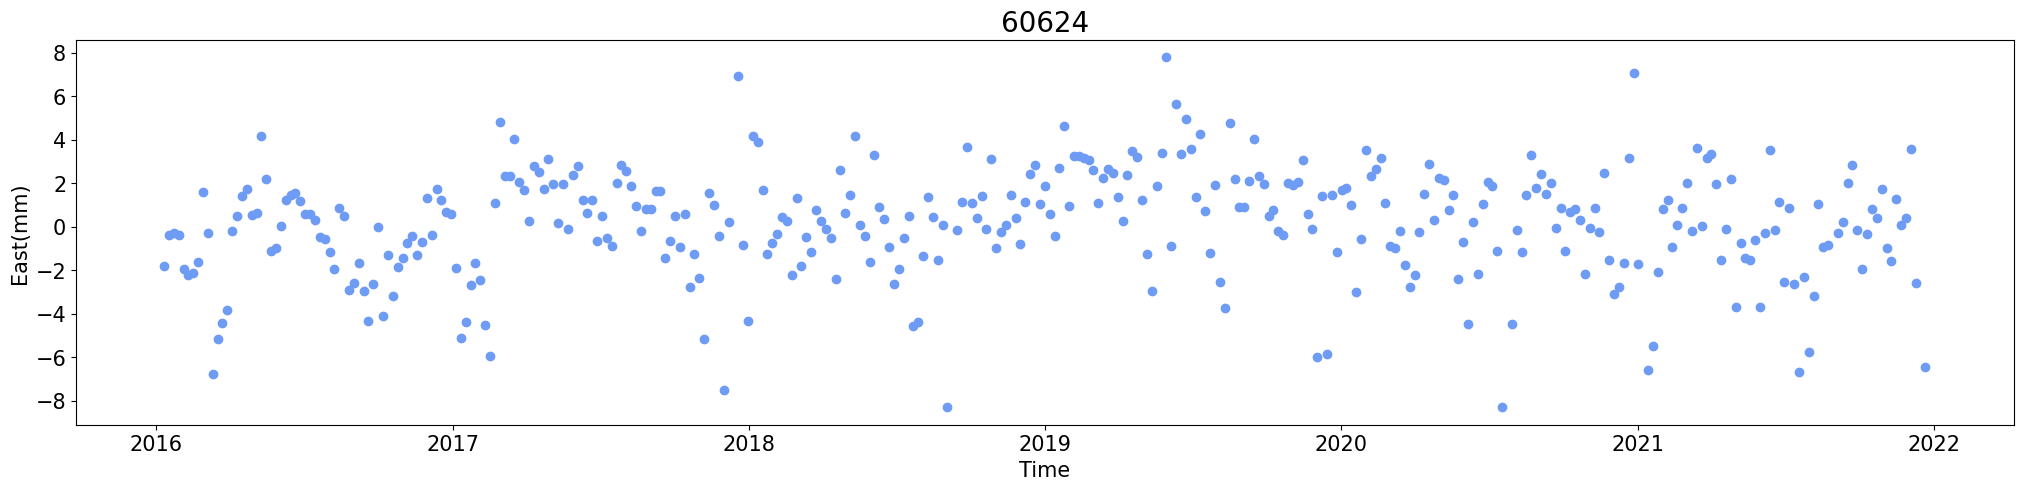

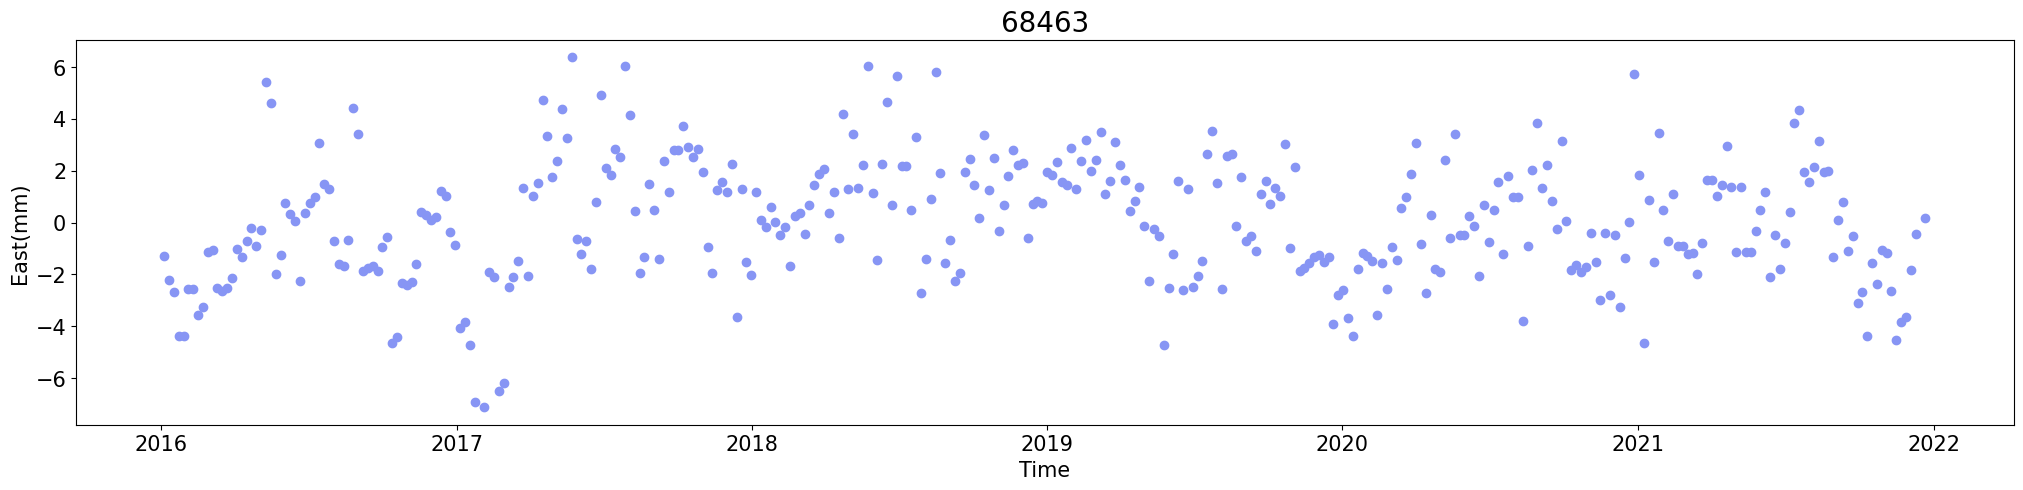

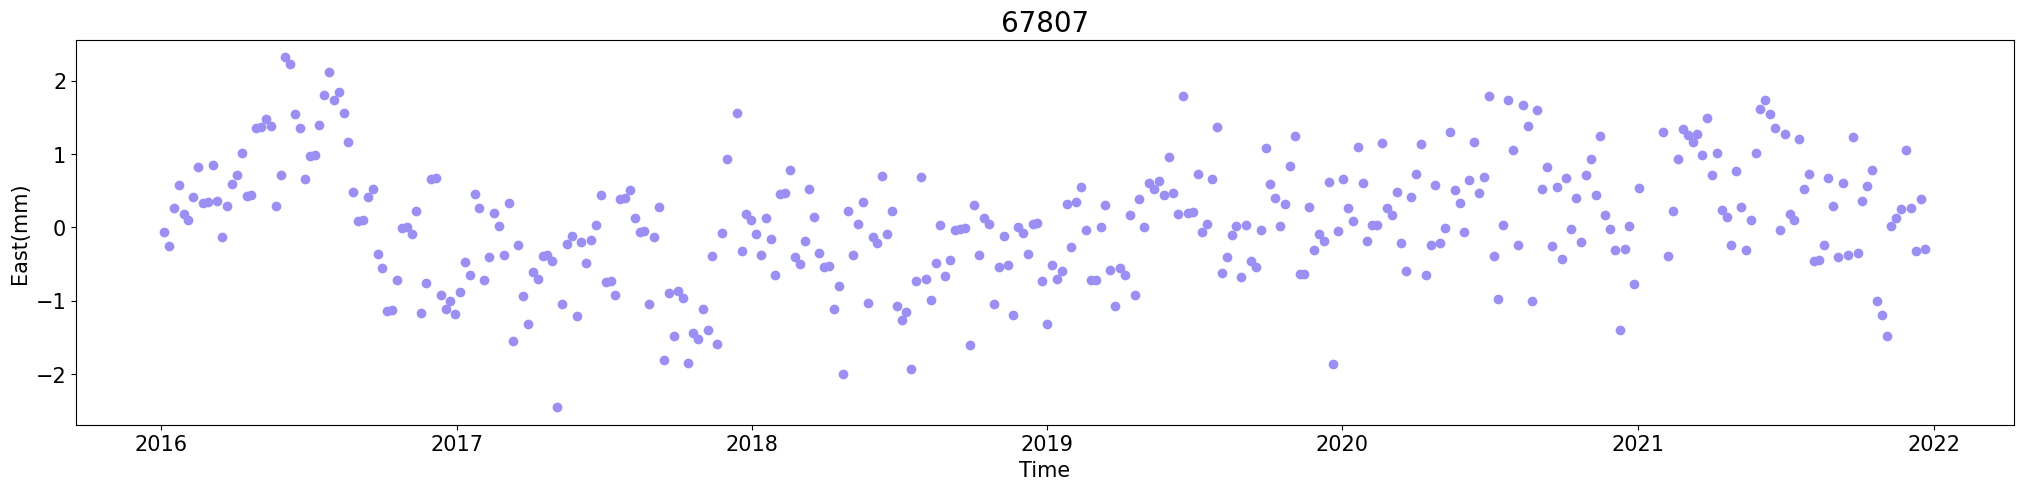

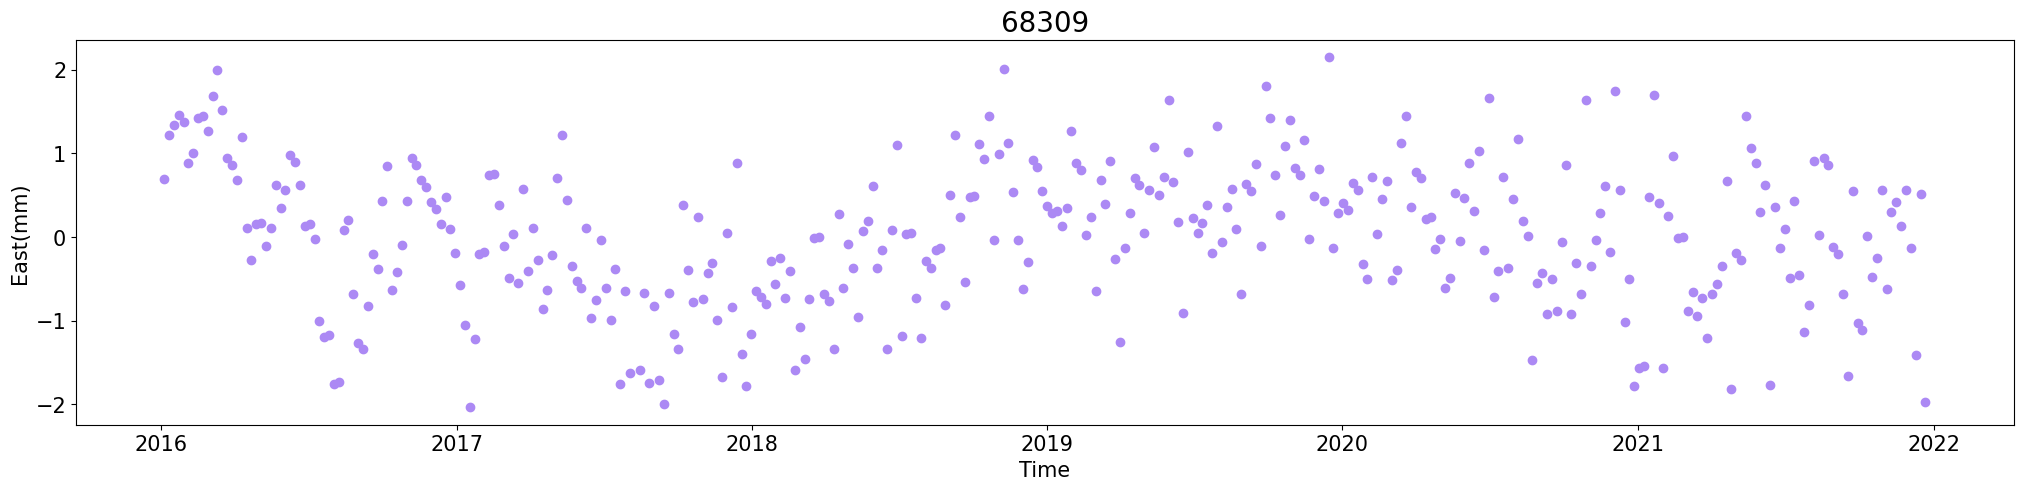

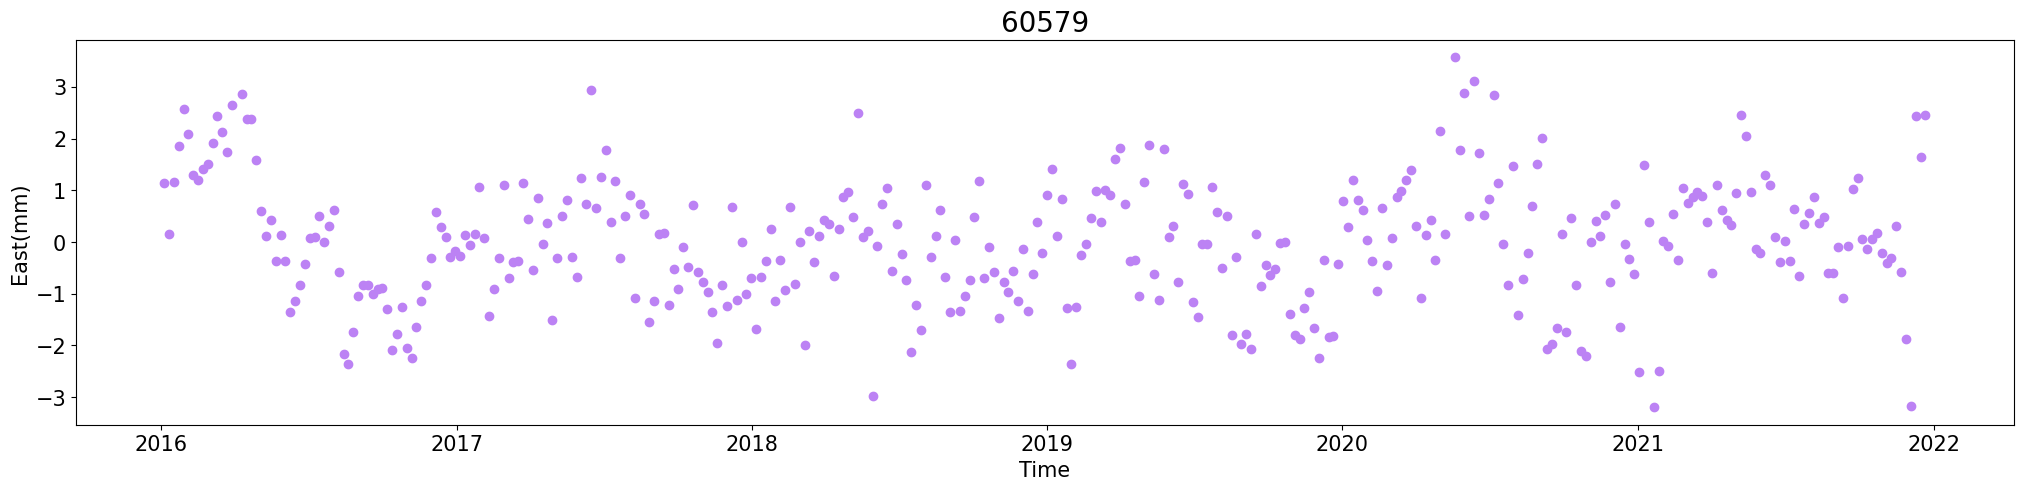

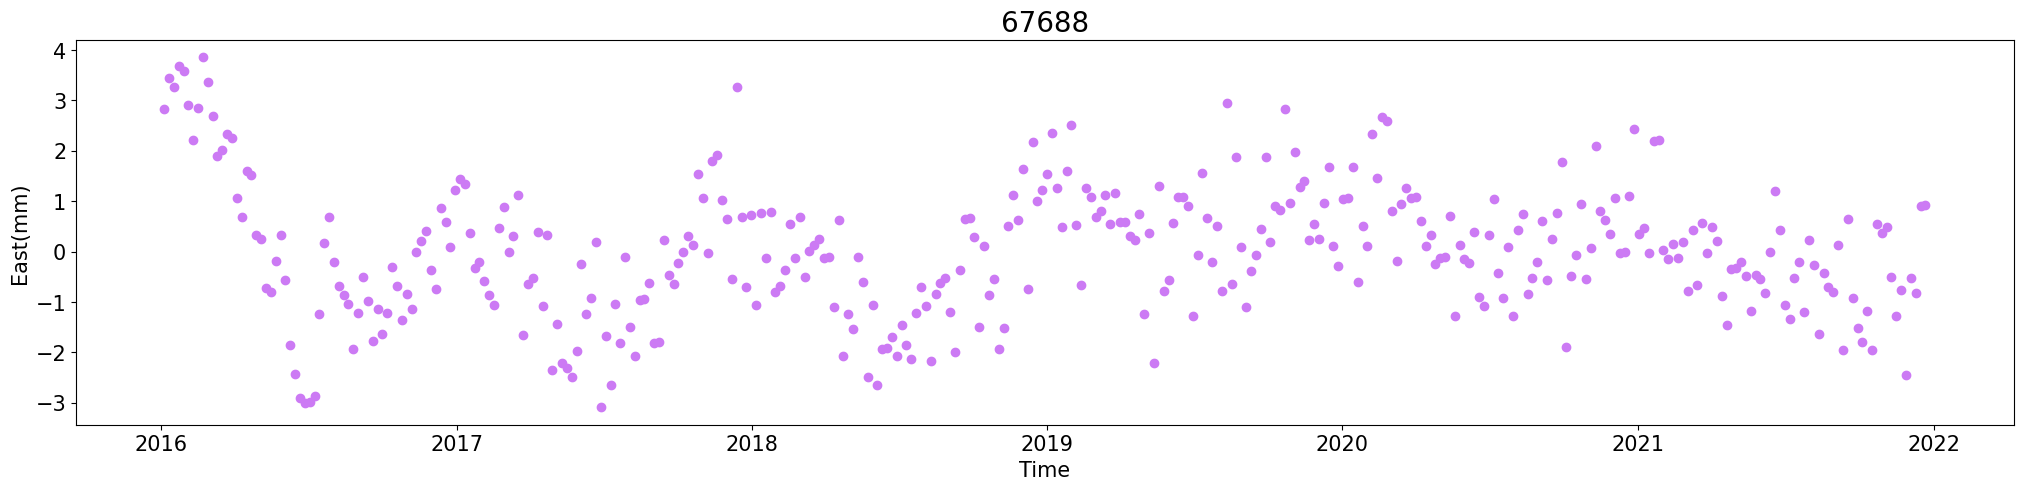

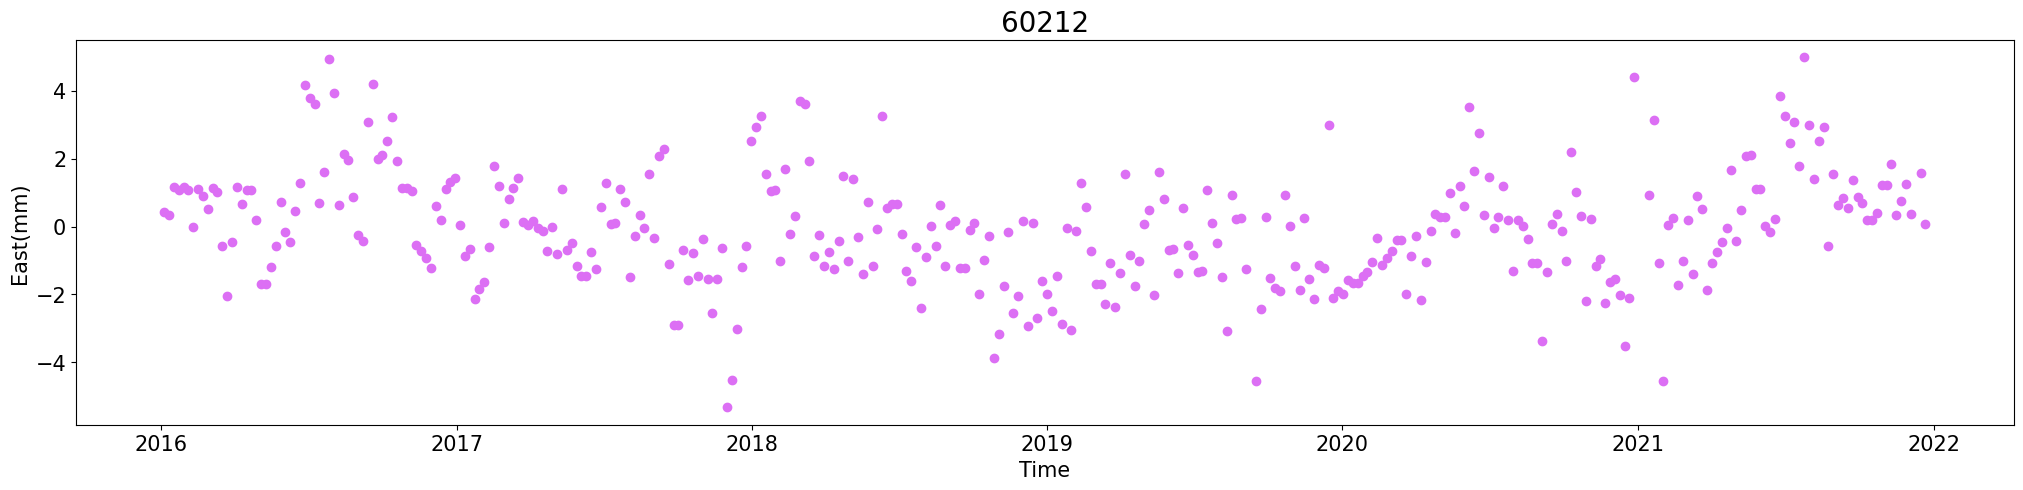

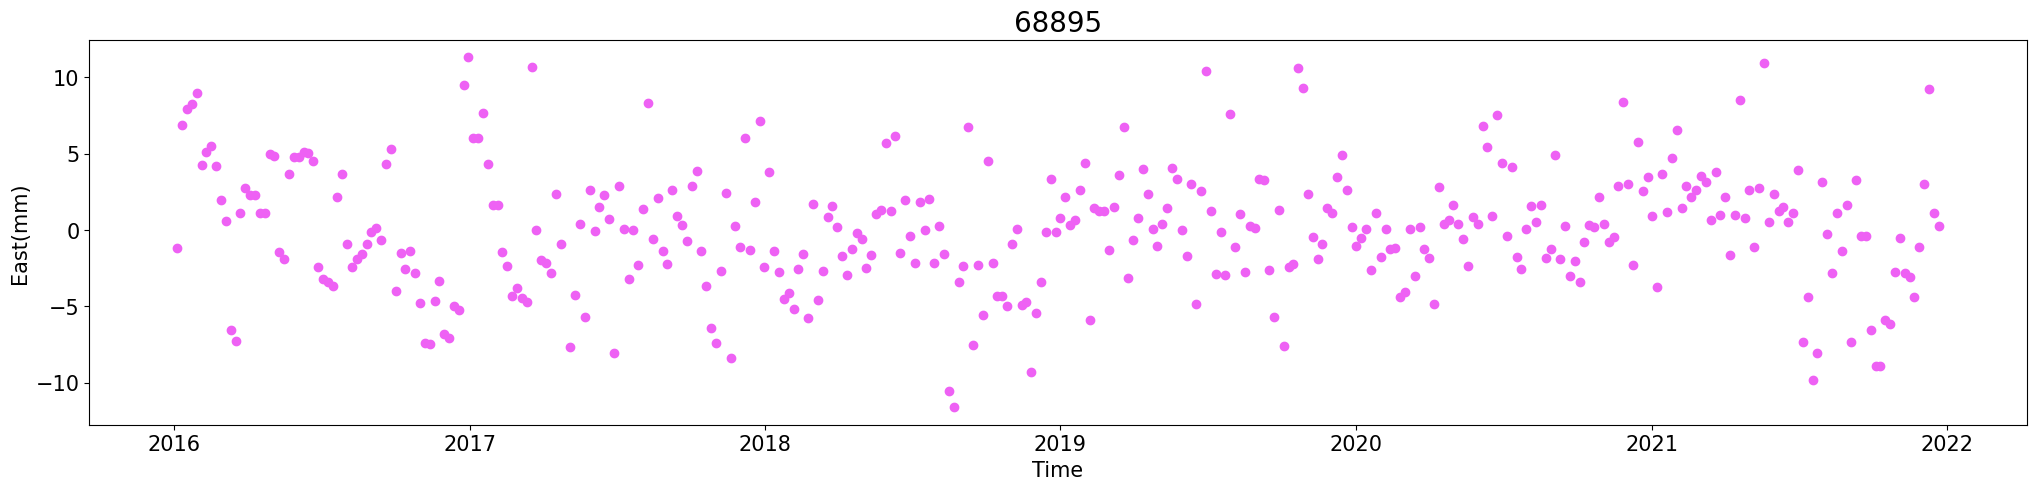

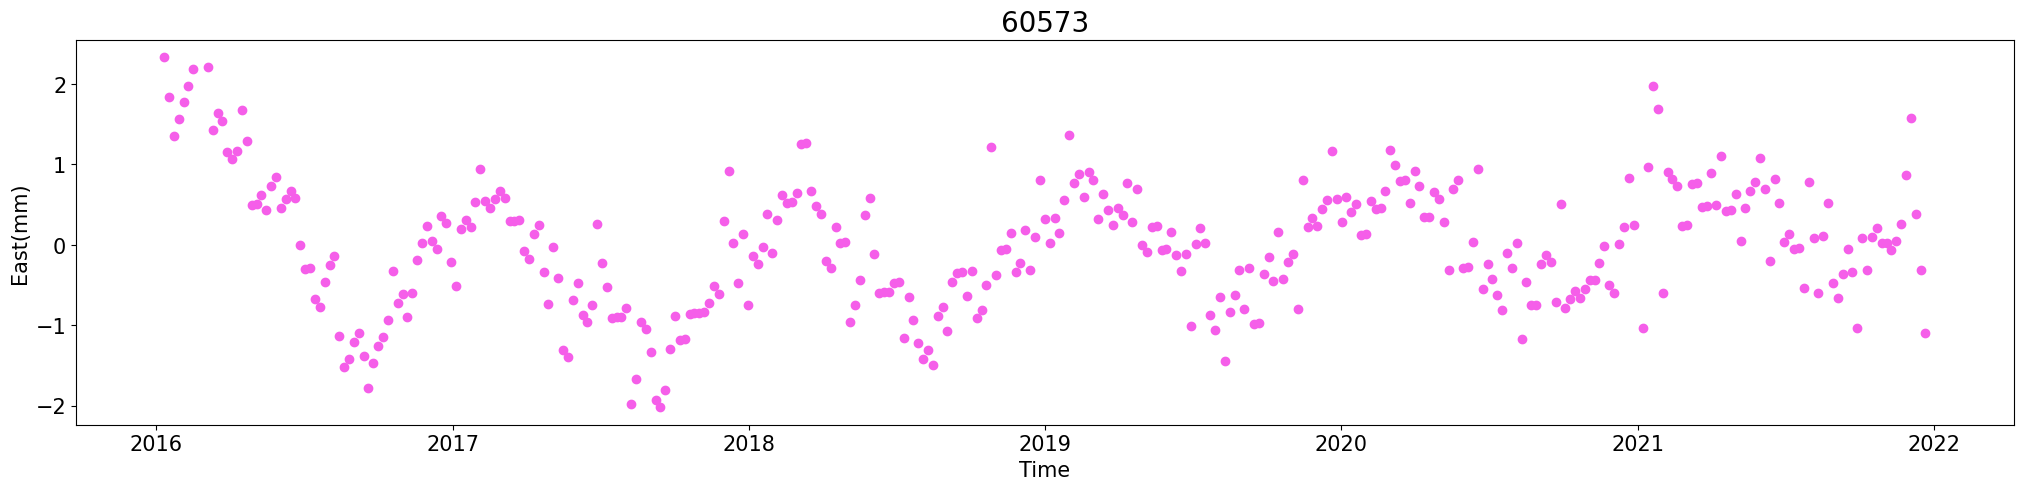

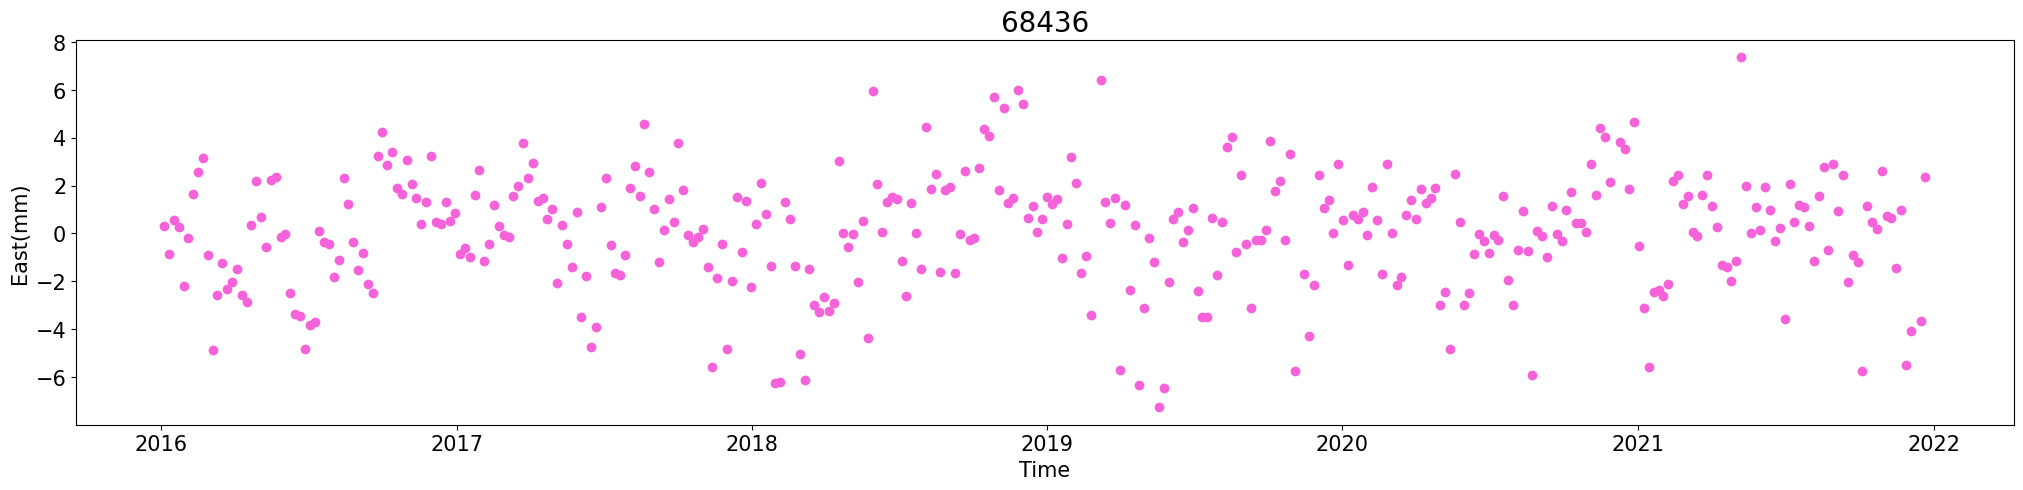

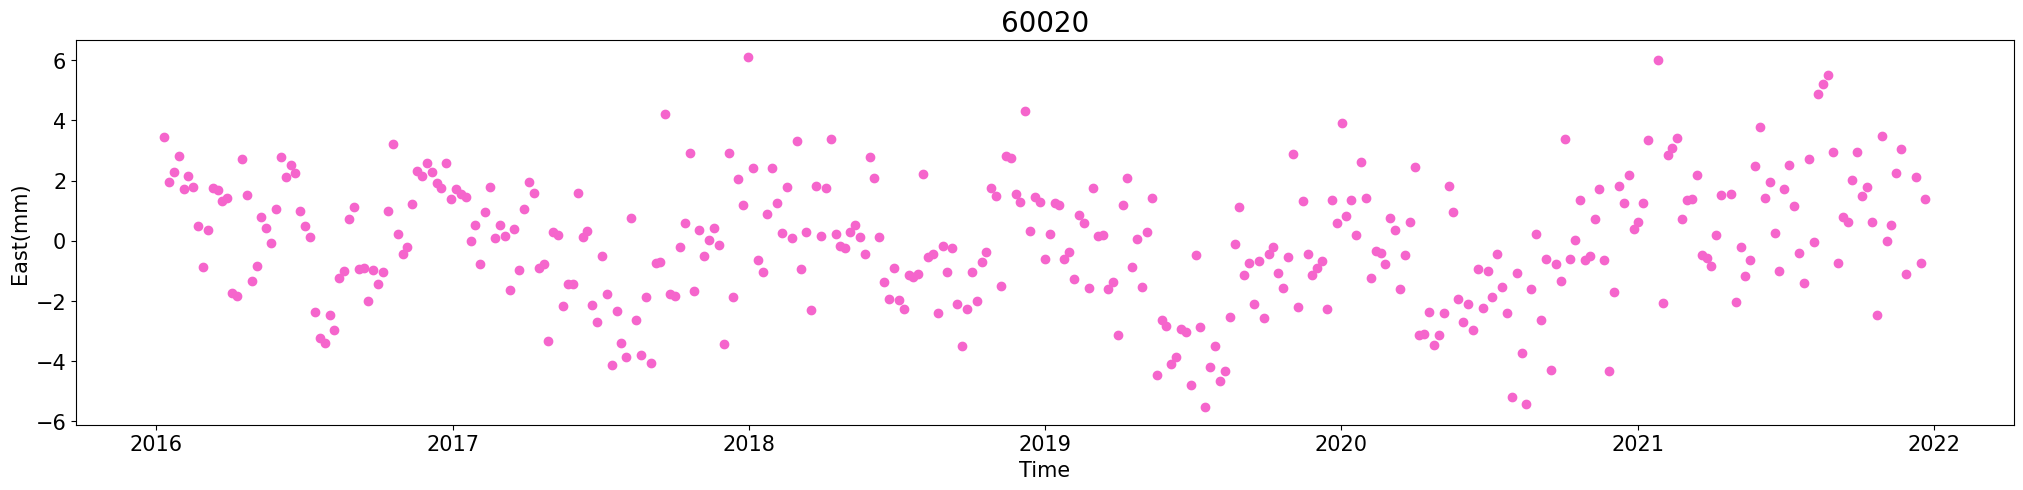

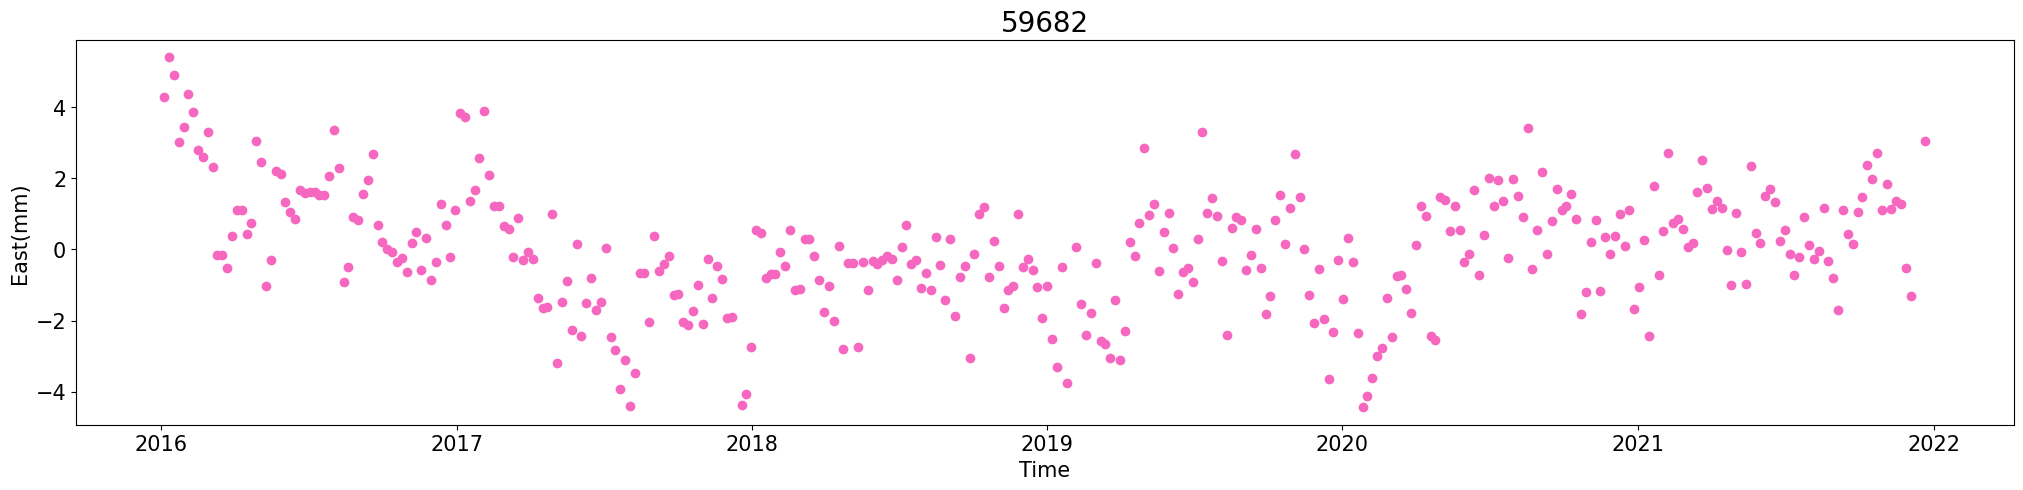

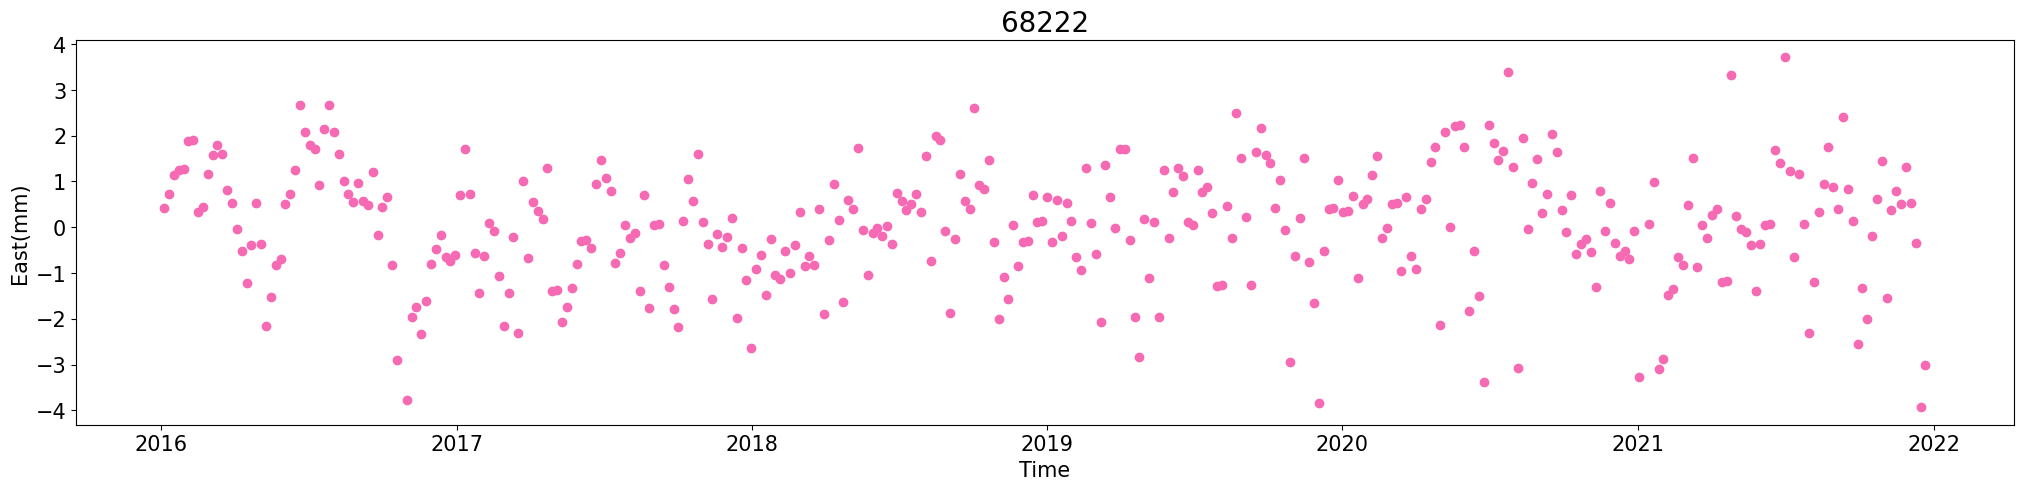

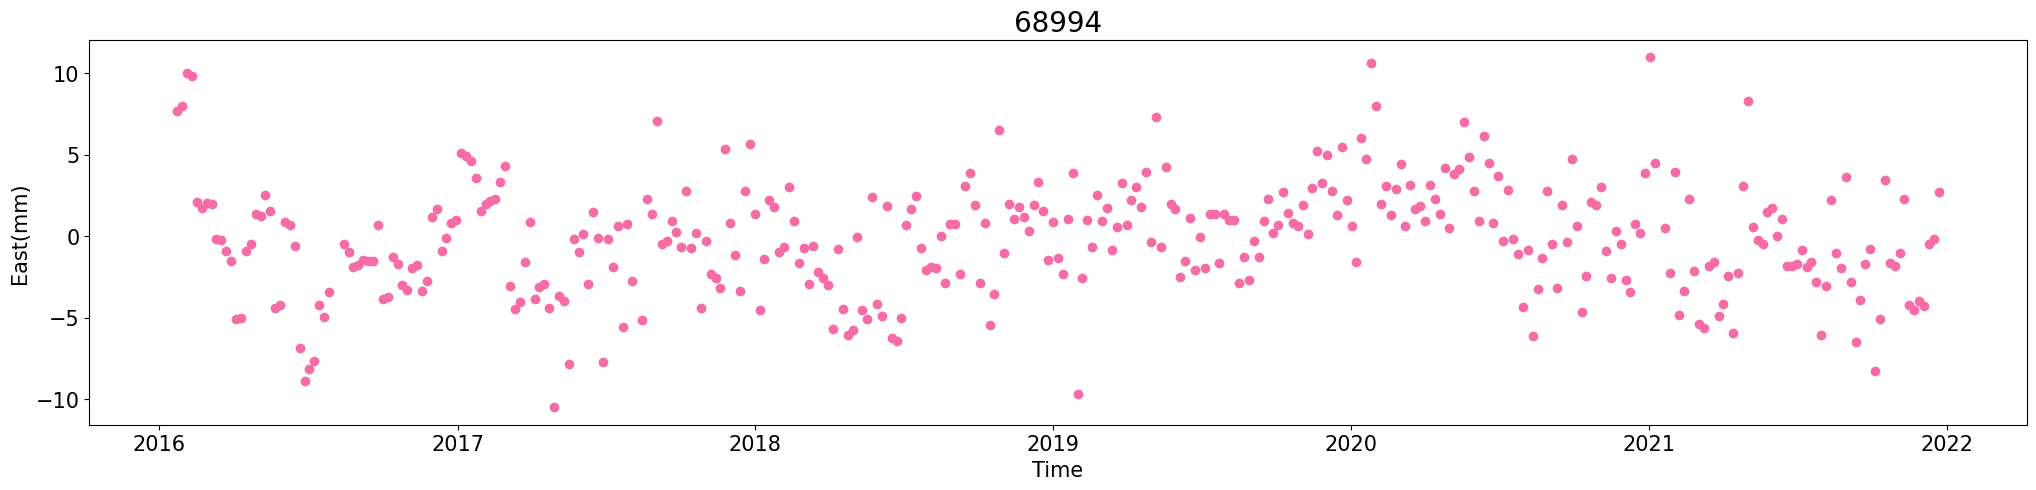

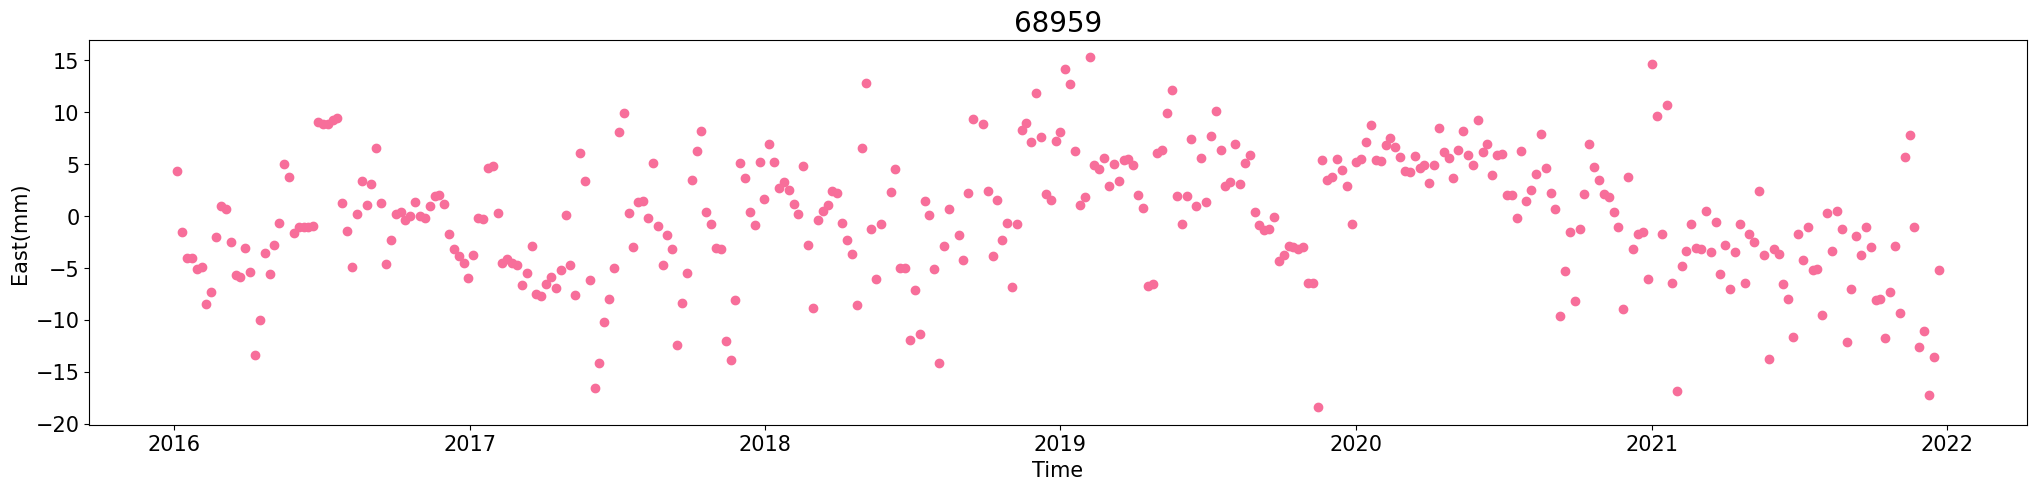

In [121]:
#checking the areas's plots - brse detrended

colors = sns.color_palette("husl", len(area_outliers_removed_dict))
#folder = ''

for i, (indice_number, indice_data) in enumerate(area_outliers_removed_dict.items()):
    plt.figure(figsize=(25, 5))
    
    plt.plot(indice_data.index, indice_data, 'o', color = colors[i])
    plt.title(f'{indice_number}', fontsize = 20)
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
   
    #fl = os.path.join(folder, f'{indice_number}.svg')
    #f = io.BytesIO()
    #plt.savefig(fl, format="svg")

    plt.show()

In [122]:
def get_rolling_mean(indice_number, indice_data):
    
    area_rolling_mean = indice_data.rolling(2, min_periods=1).mean()
    
    areas_rolling_mean_dataframe = pd.DataFrame(area_rolling_mean, 
                                              index=indice_data.index)
    
    areas_rolling_mean_dataframe = areas_rolling_mean_dataframe.rename(
        columns={f'{indice_number}_east(mm)':f'{indice_number}_east(mm)_rm'})
    
    areas_rolling_mean_dataframe.dropna(inplace=True)
    
    return areas_rolling_mean_dataframe

#dictionaries to store the data
areas_rolling_mean_dict = {}

#calling the function
for indice_number, indice_data in area_outliers_removed_dict.items():
    areas_rolling_mean_dataframe = get_rolling_mean(indice_number, indice_data)
    areas_rolling_mean_dict[indice_number] = areas_rolling_mean_dataframe

#printing dataframe
#stations detrended
for indice_number, indice_data in areas_rolling_mean_dict.items():
    print(f'{indice_number}: \n{indice_data}\n')

65572: 
            65572_east(mm)_rm
2016-01-05           1.863312
2016-01-11           0.822635
2016-01-17          -0.208717
2016-01-23           0.109930
2016-01-29           1.078577
...                       ...
2021-11-28          -1.151620
2021-12-04           1.667027
2021-12-10          -0.464326
2021-12-16          -2.595678
2021-12-22          -2.577031

[360 rows x 1 columns]

66309: 
            66309_east(mm)_rm
2016-01-05           2.542746
2016-01-11           2.594867
2016-01-17           2.549111
2016-01-23           1.953354
2016-01-29           1.457597
...                       ...
2021-11-28          -0.236017
2021-12-04          -0.881773
2021-12-10          -1.477530
2021-12-16          -0.523287
2021-12-22          -0.019043

[360 rows x 1 columns]

59887: 
            59887_east(mm)_rm
2016-01-05           0.574239
2016-01-11           0.638656
2016-01-17           0.767491
2016-01-23           0.846325
2016-01-29           0.875160
...                       

In [62]:
#outliers_removed_df, df_rolling_mean = outliers_removed_df.align(df_rolling_mean, join='inner')

#point_mse = mean_squared_error(outliers_removed_df, df_rolling_mean)
#print(point_mse)

#point_r2 = r2_score(outliers_removed_df,df_rolling_mean)
#print(point_r2)

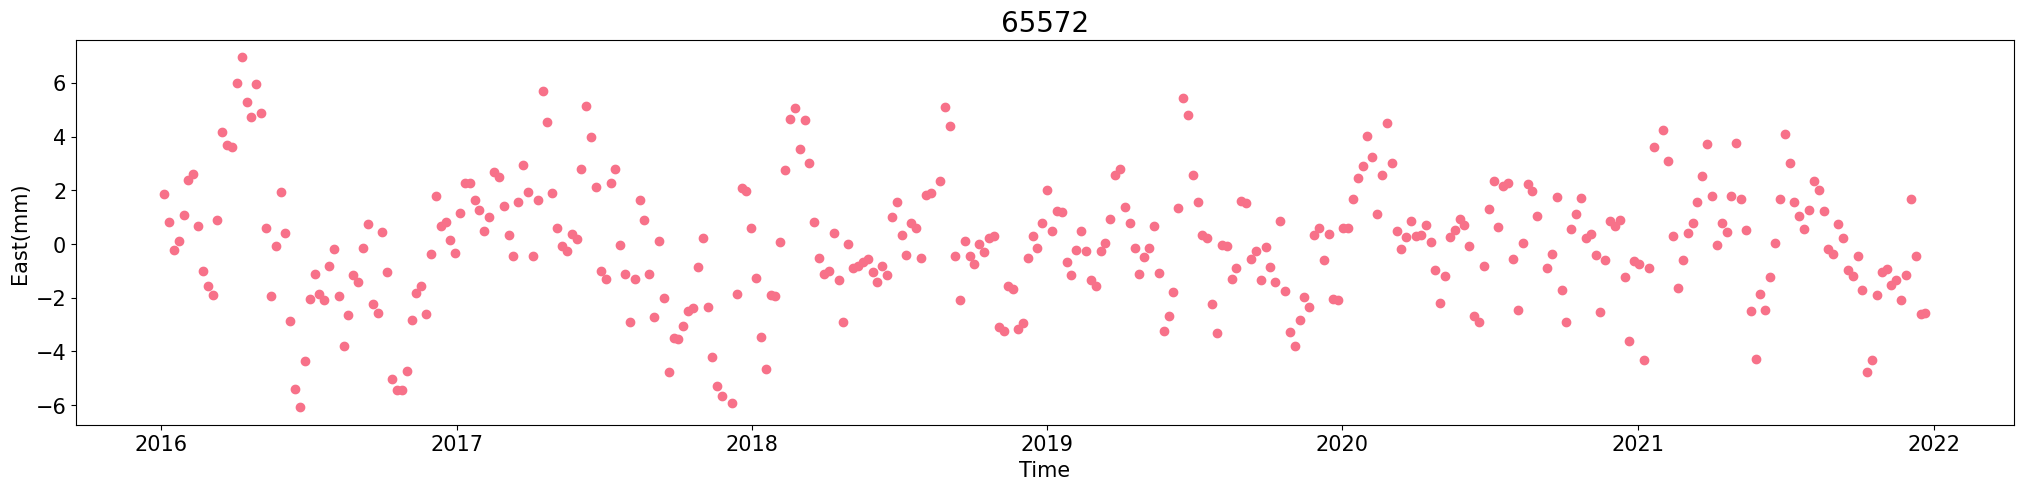

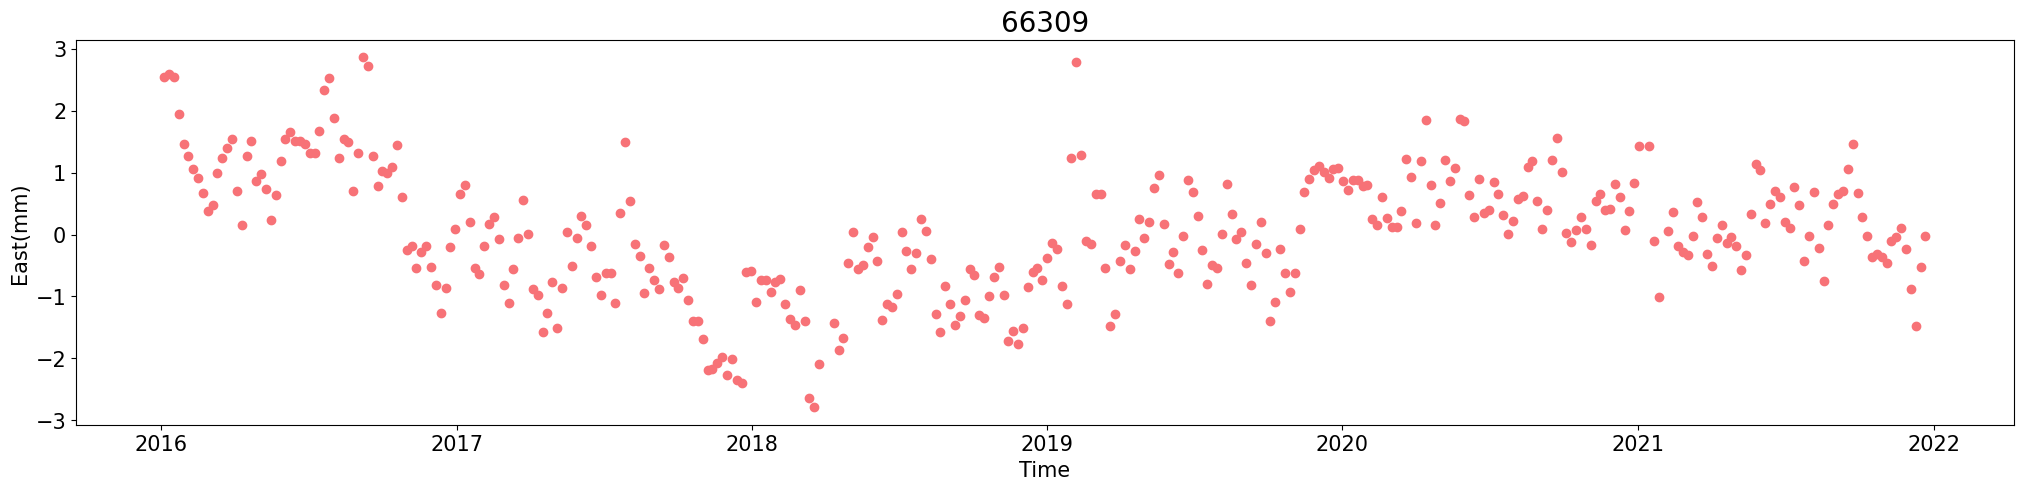

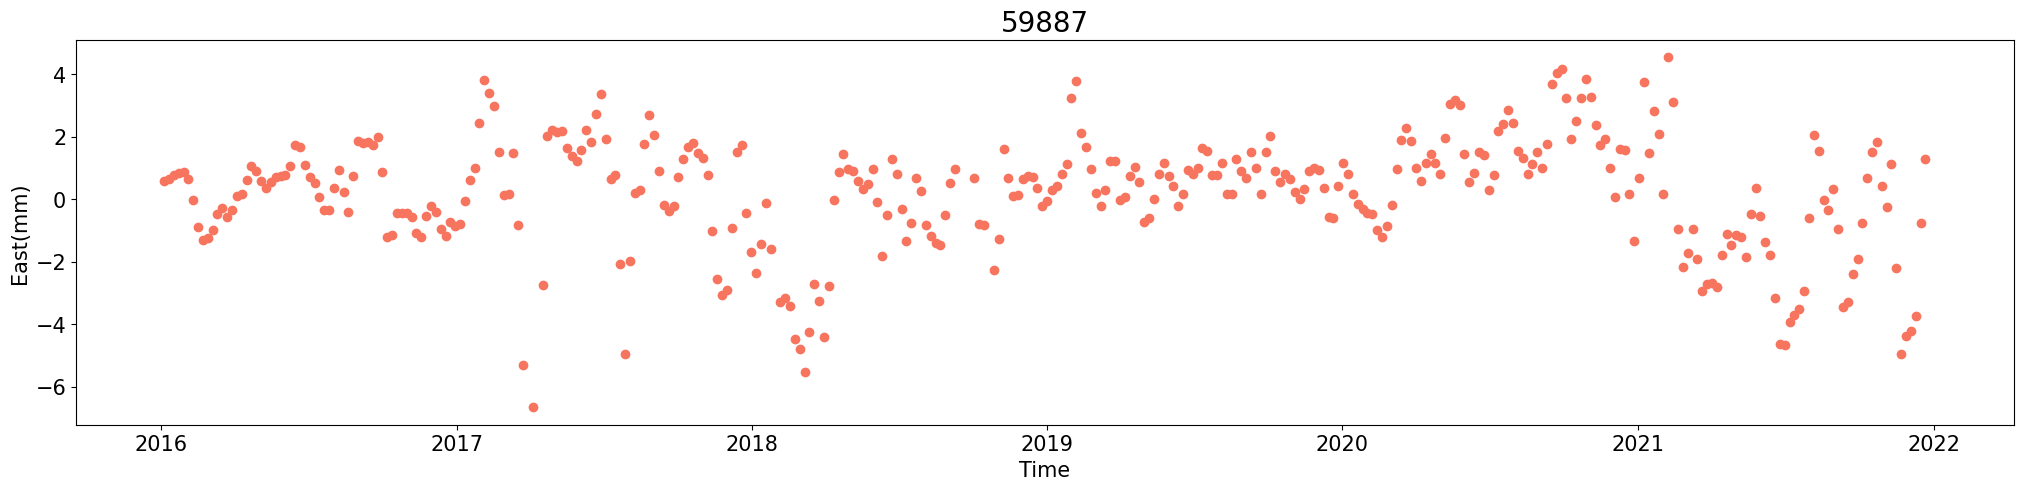

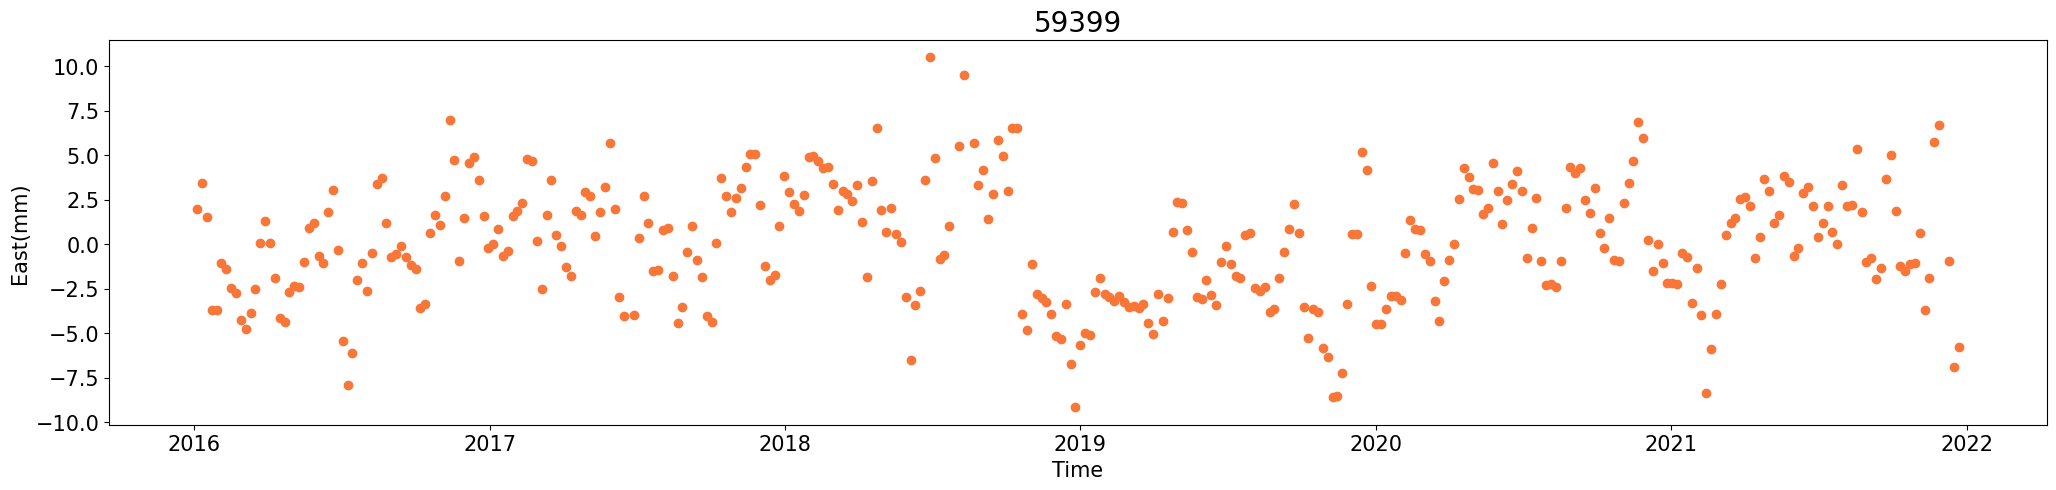

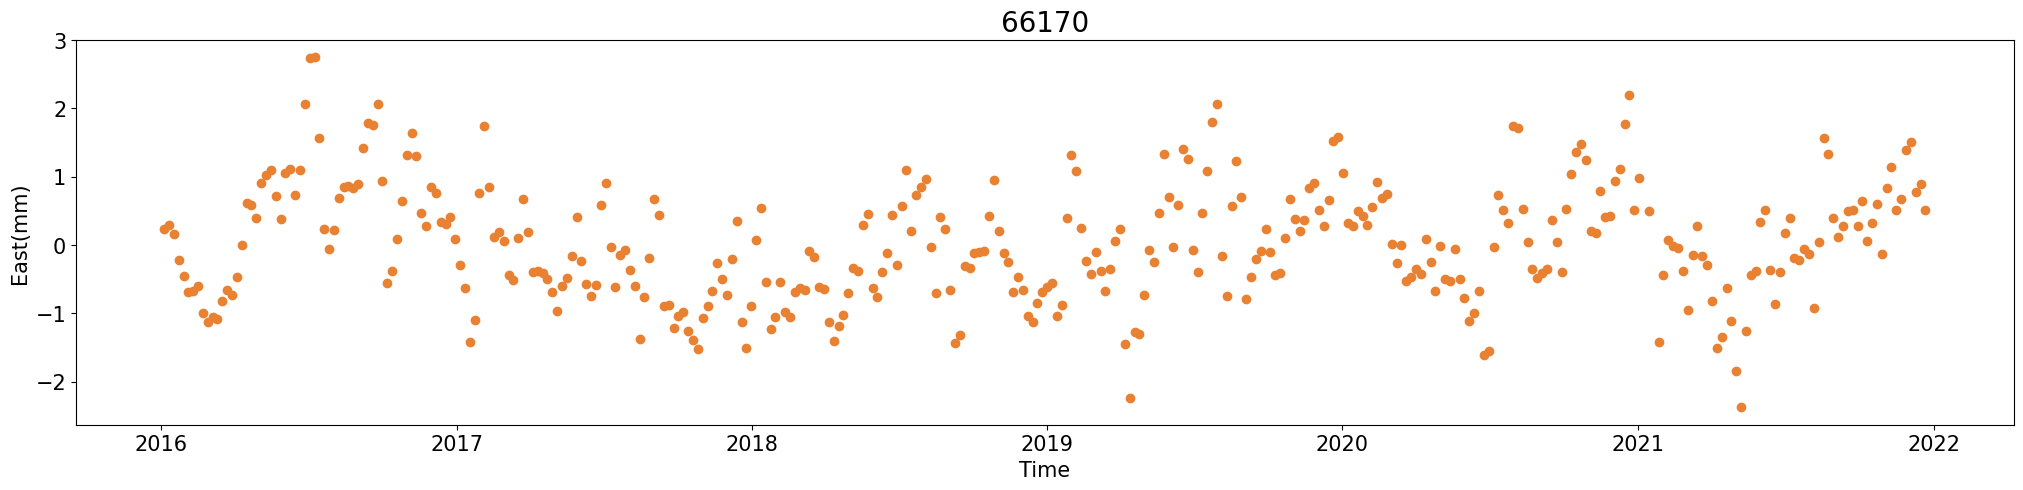

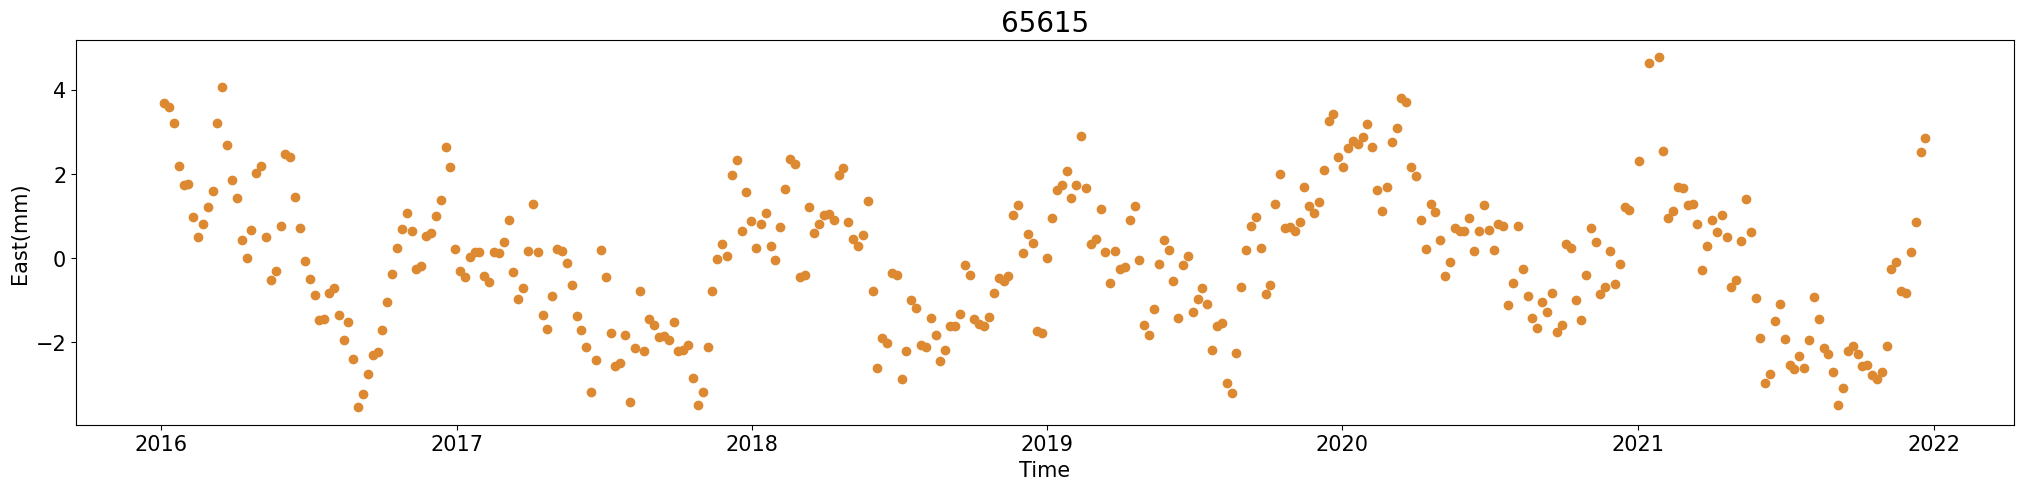

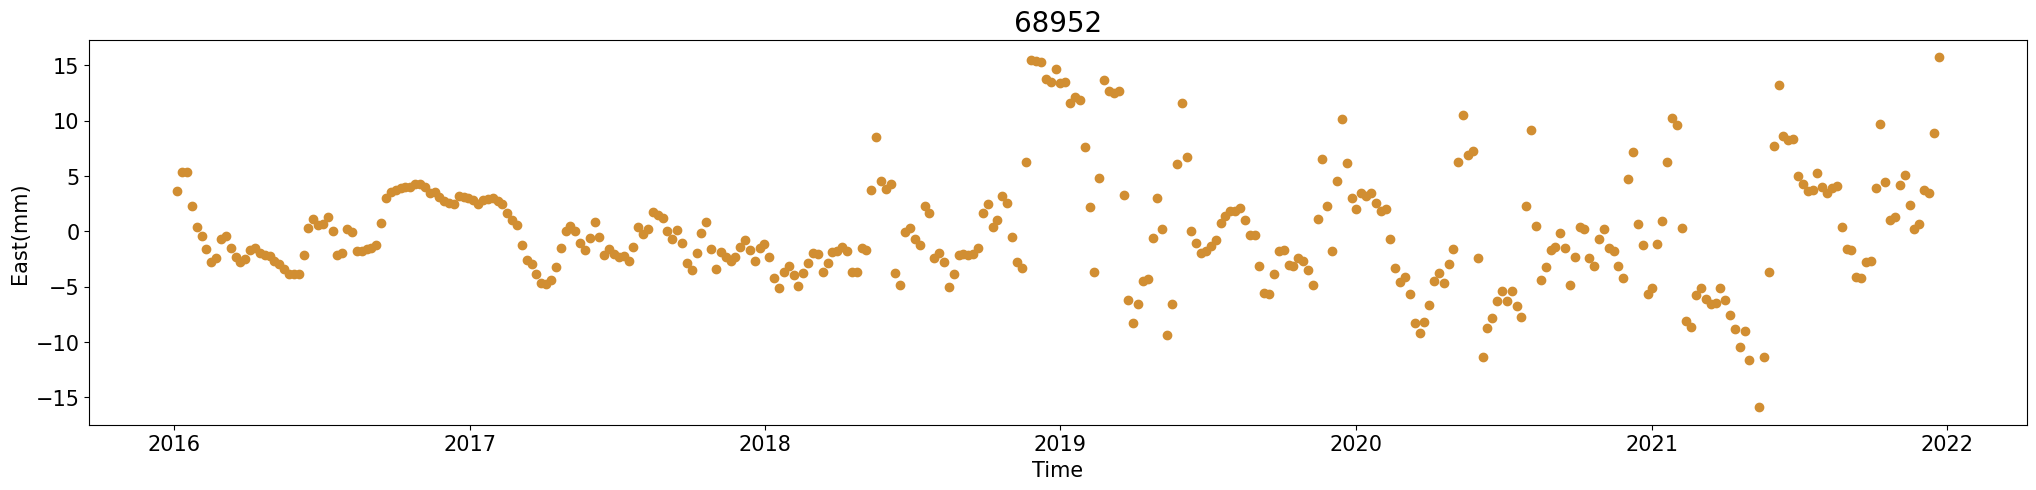

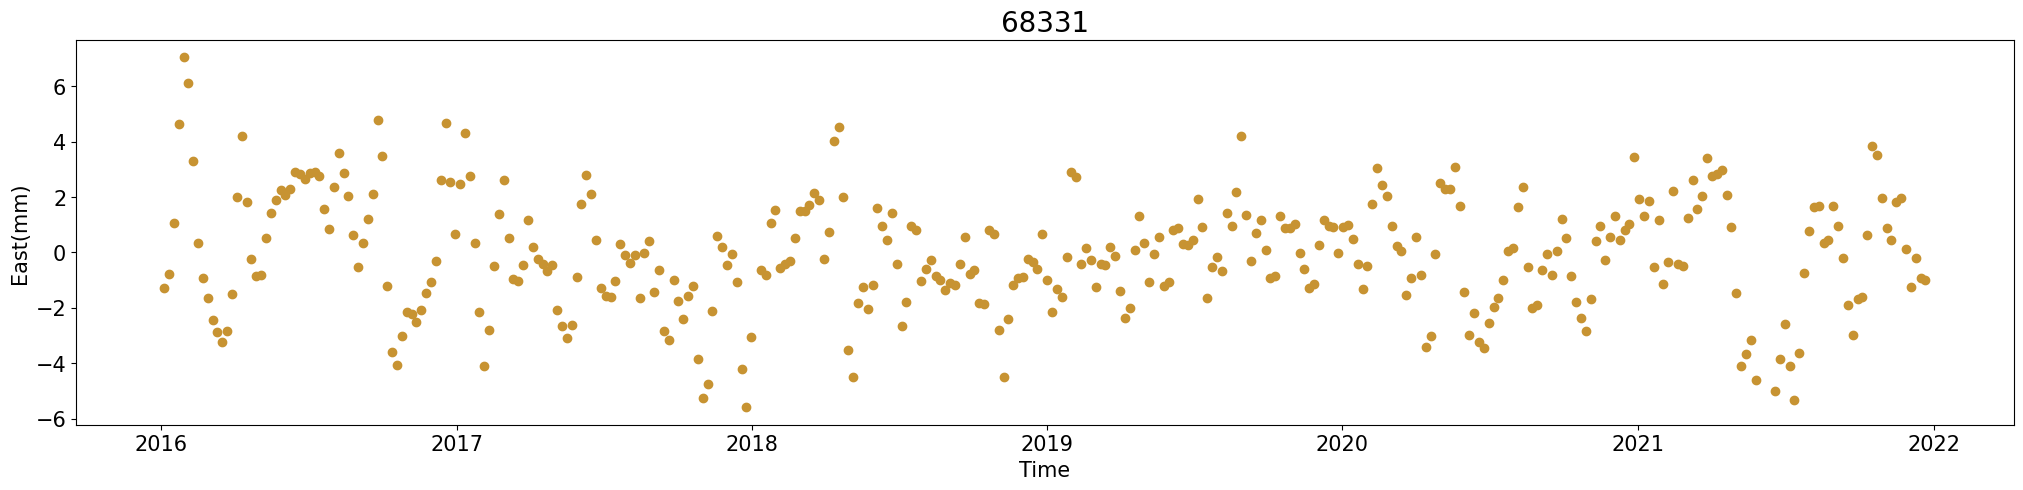

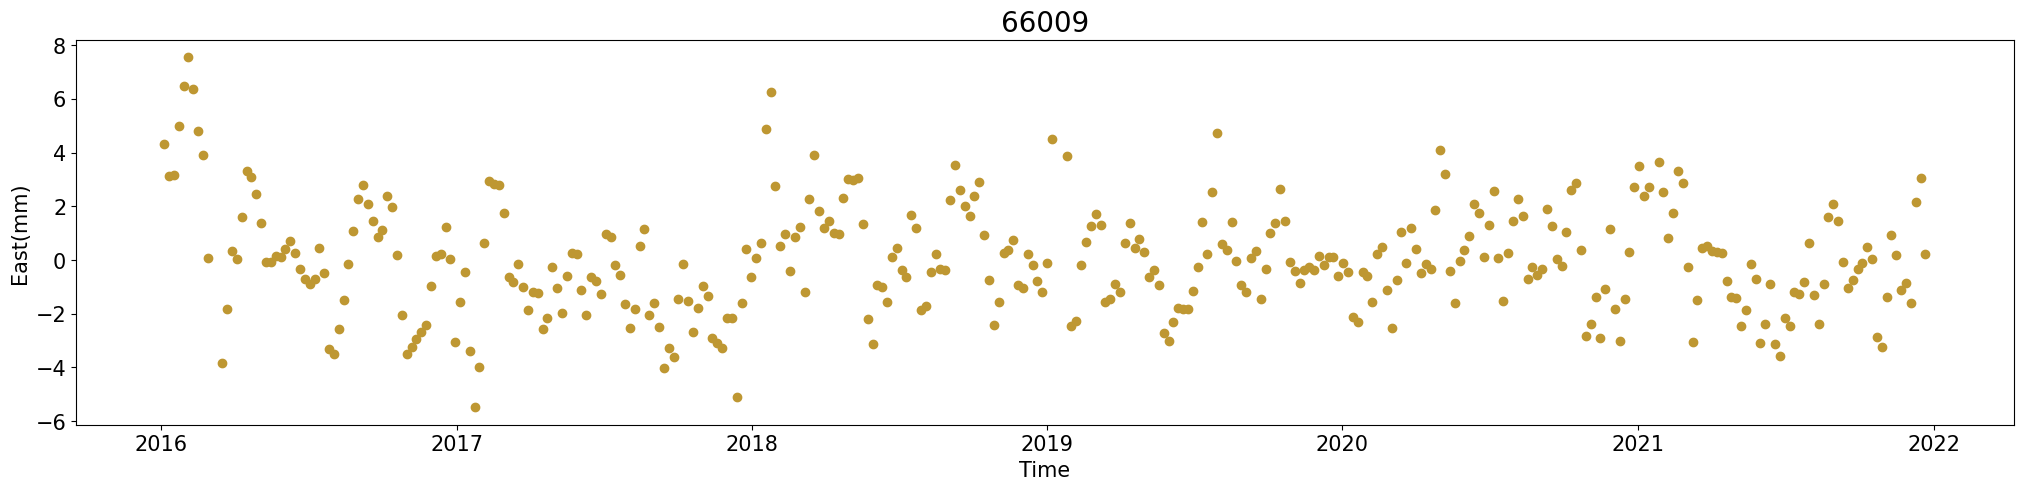

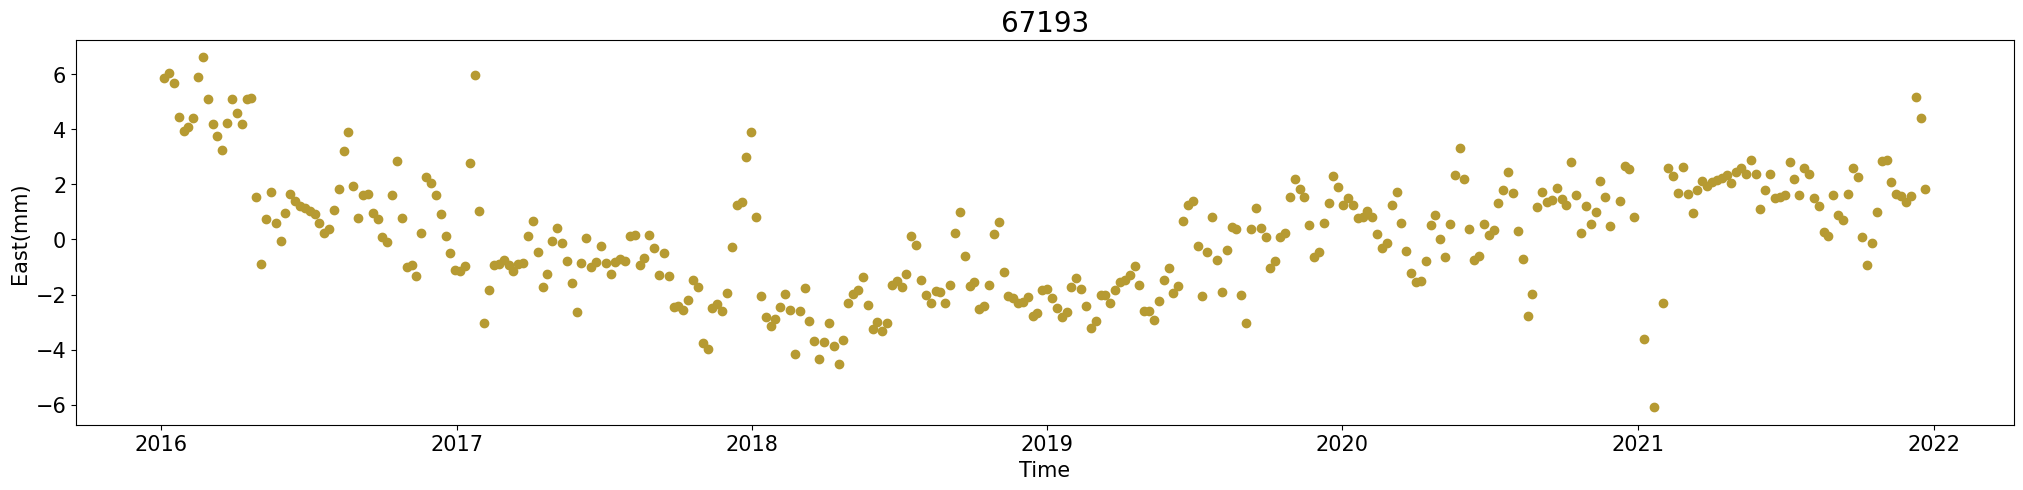

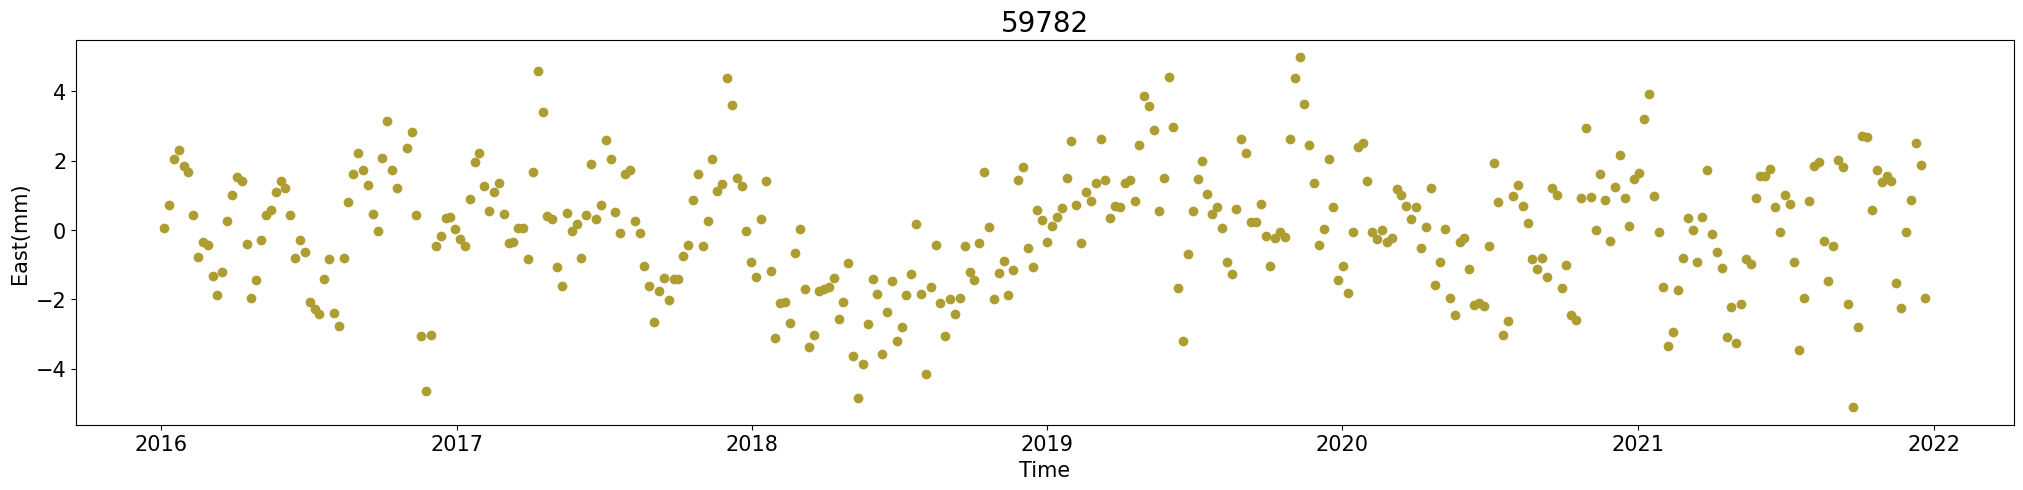

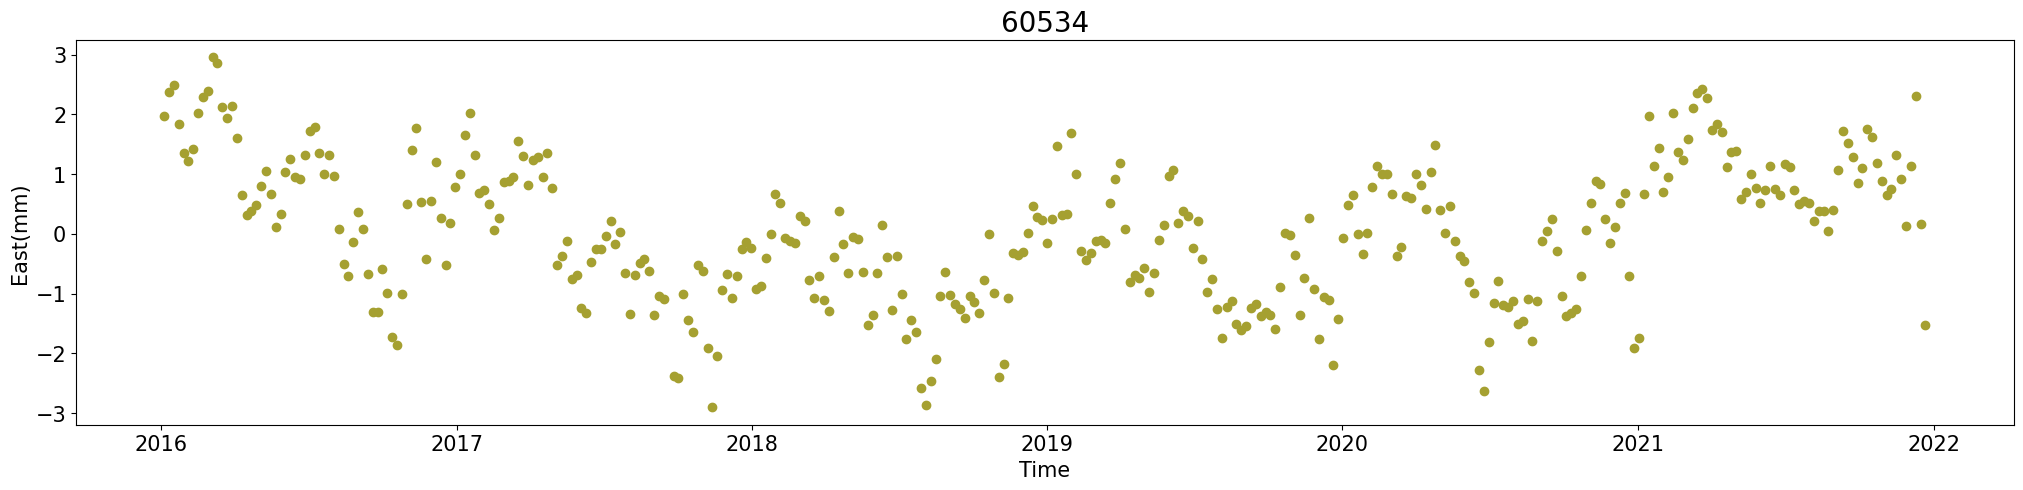

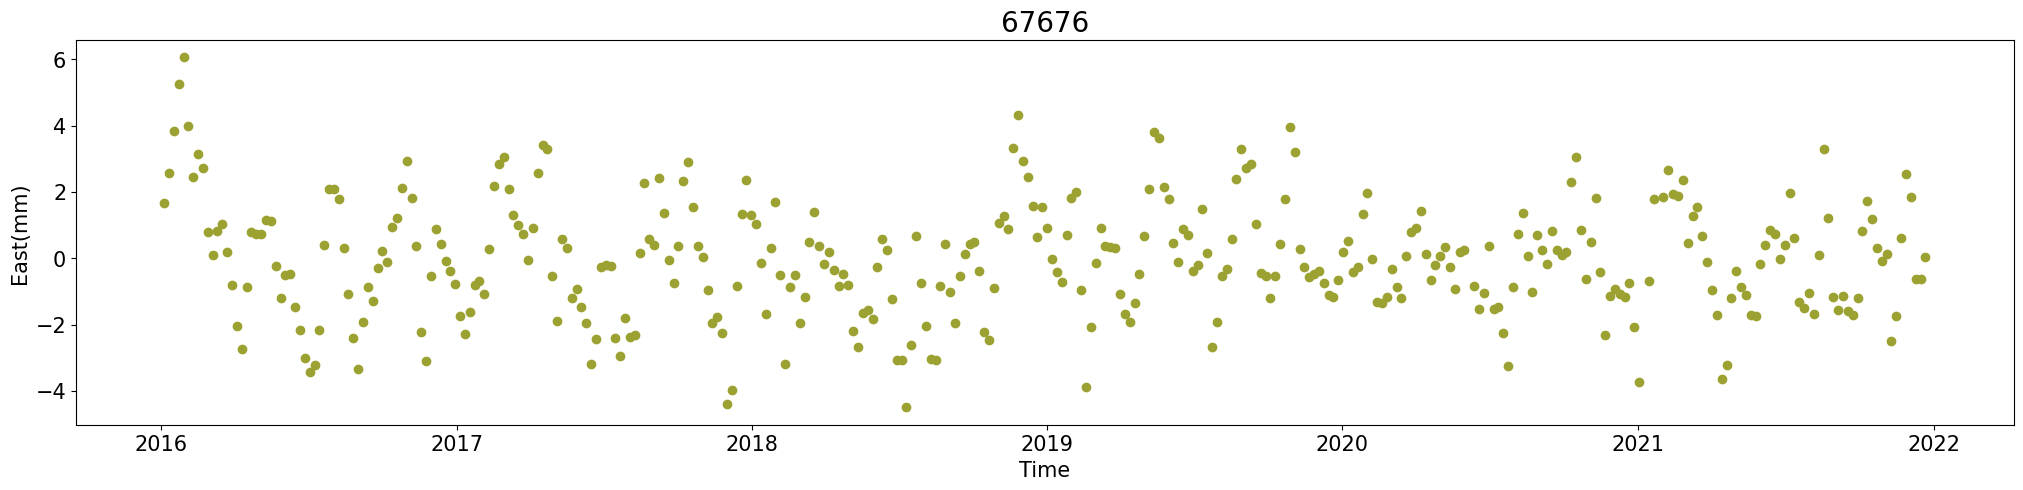

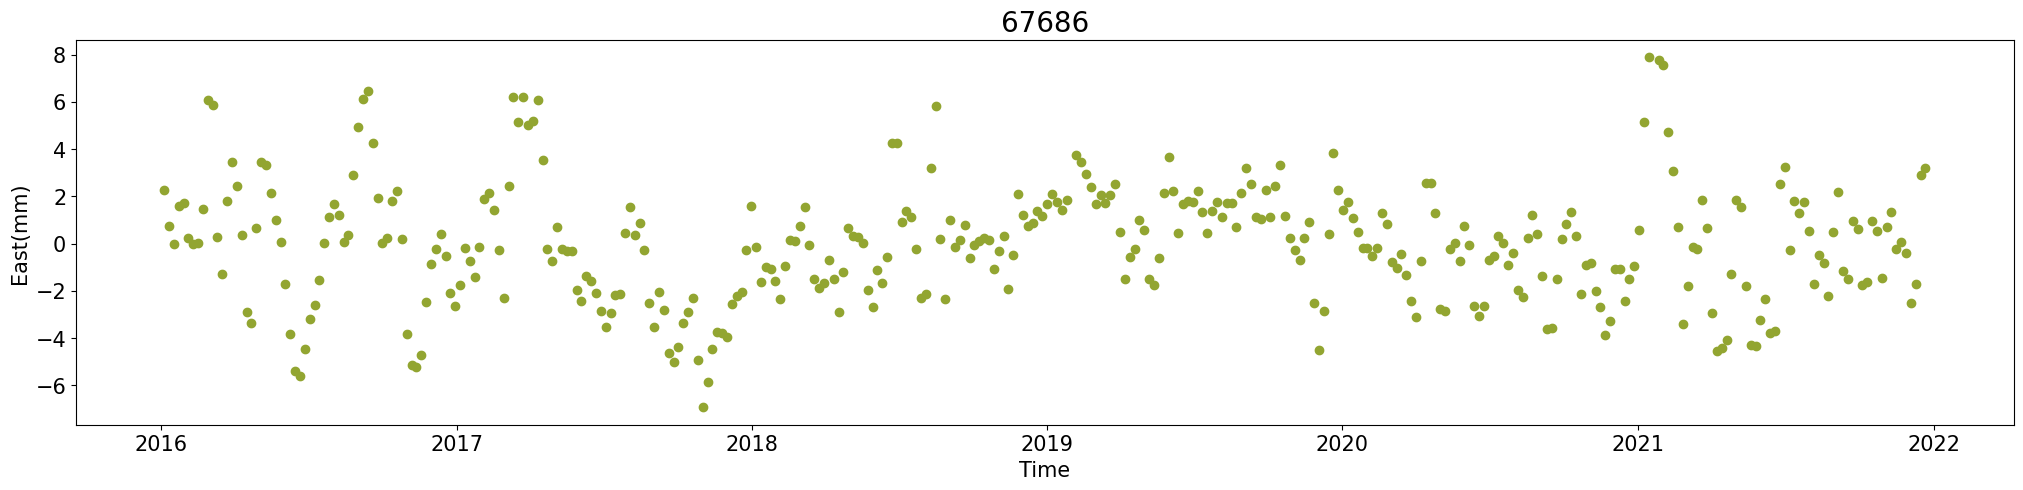

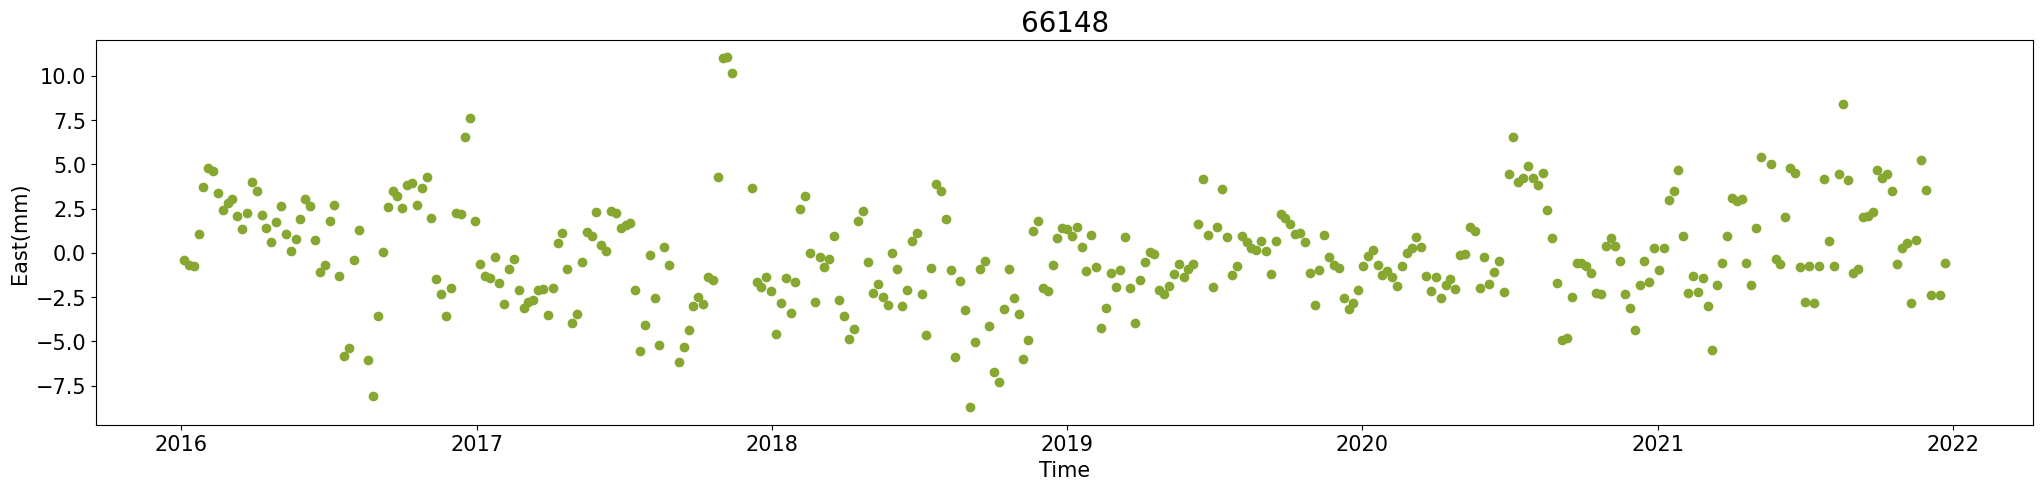

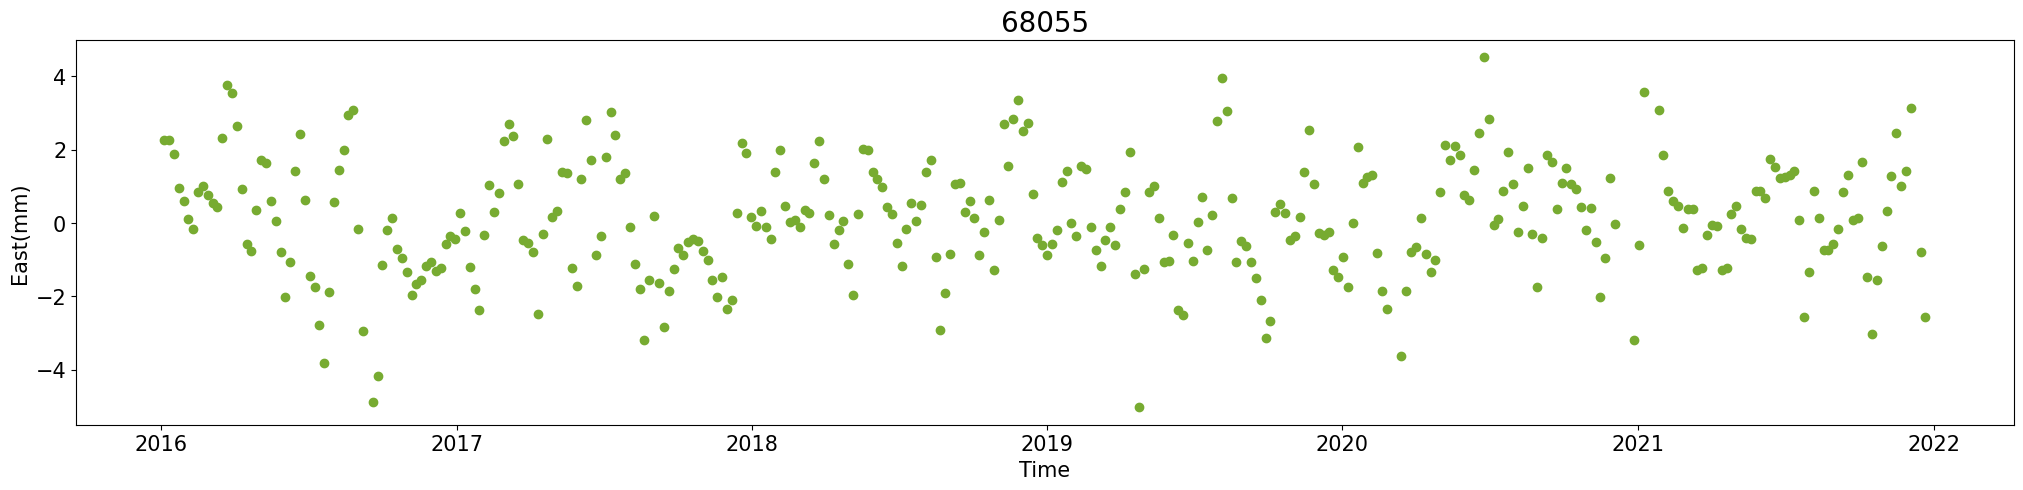

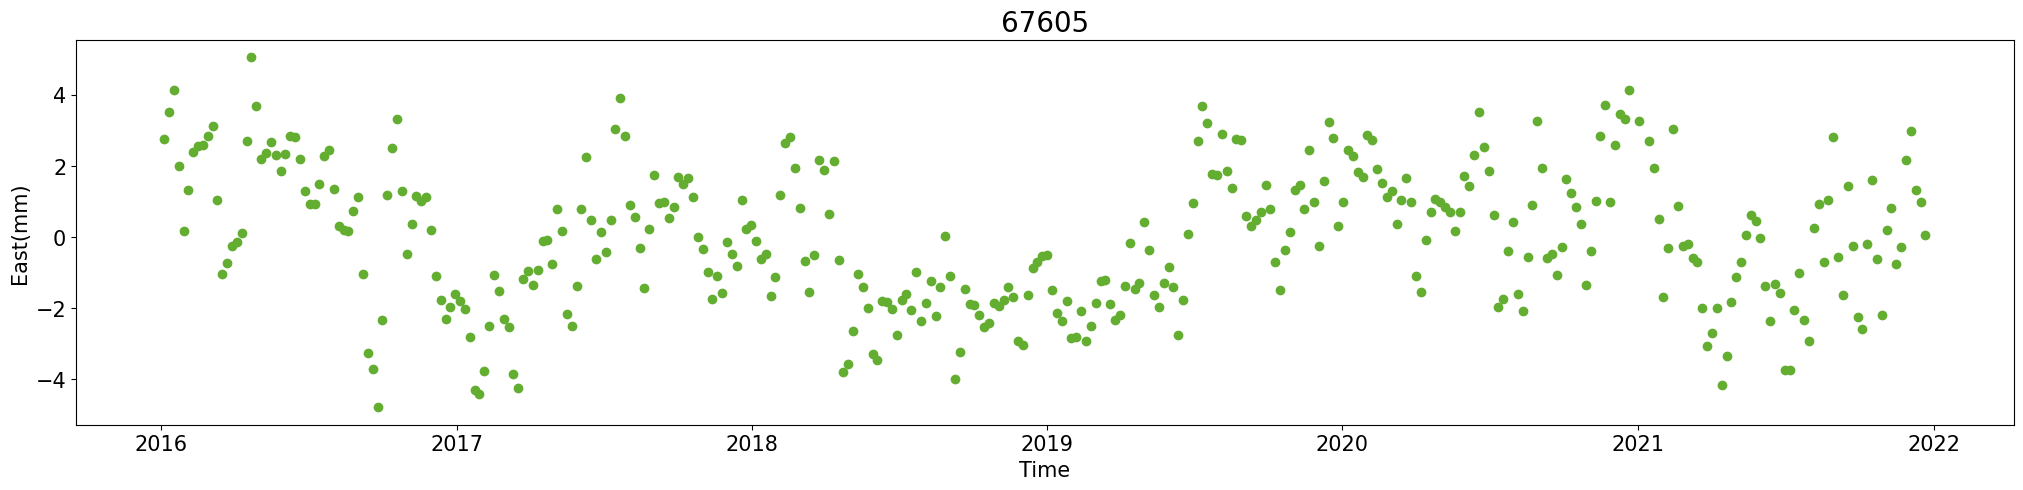

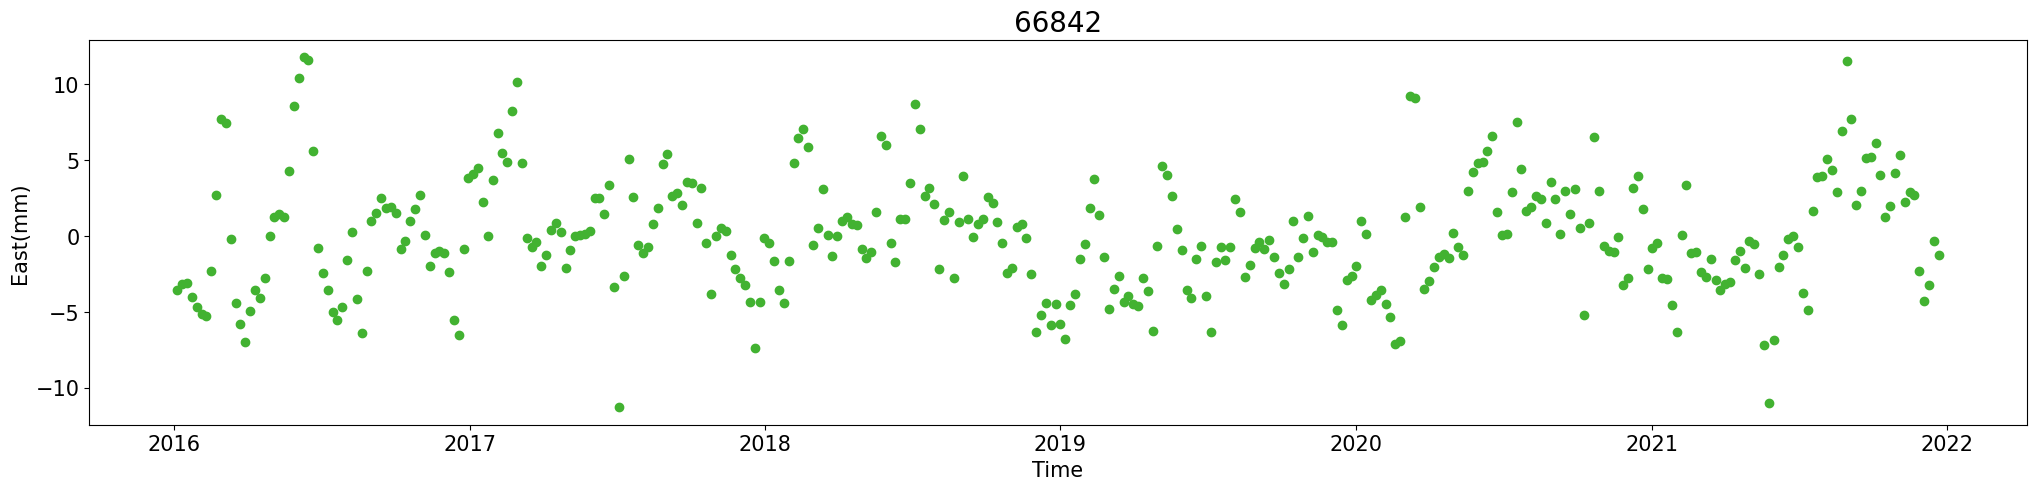

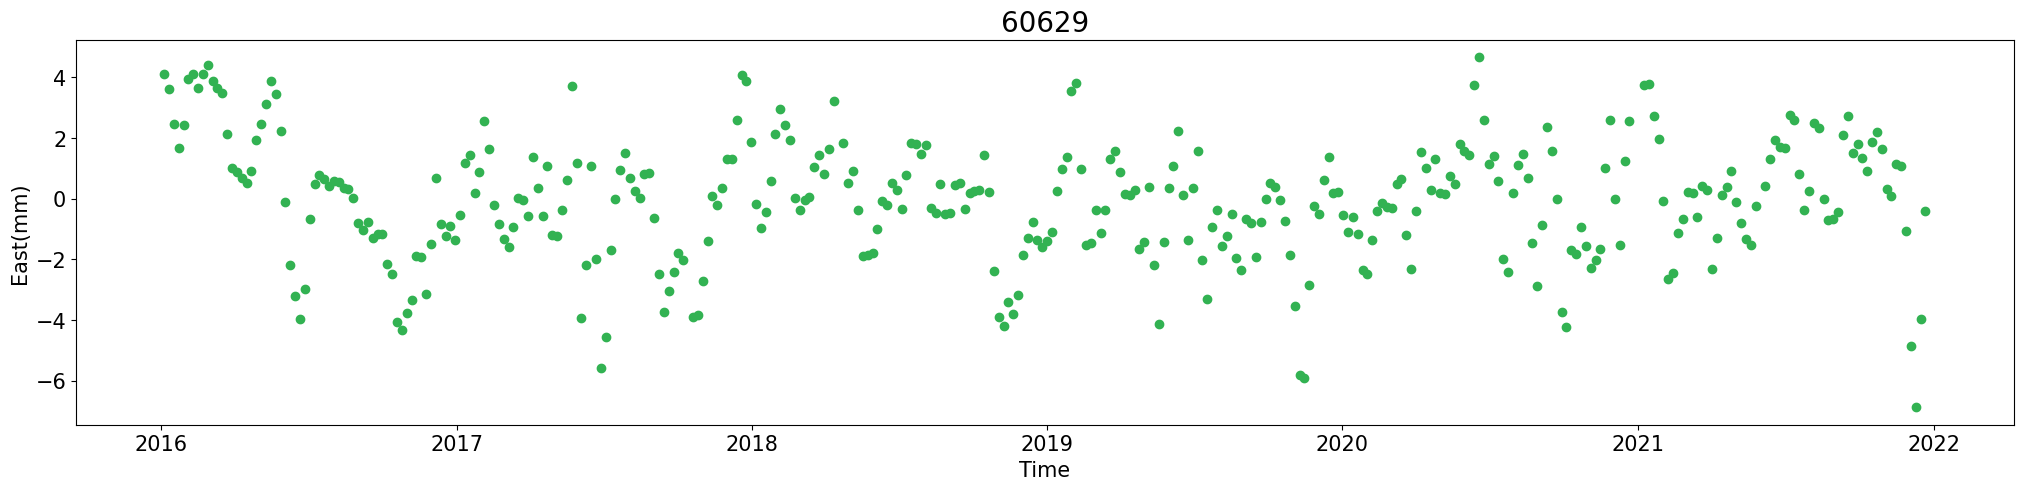

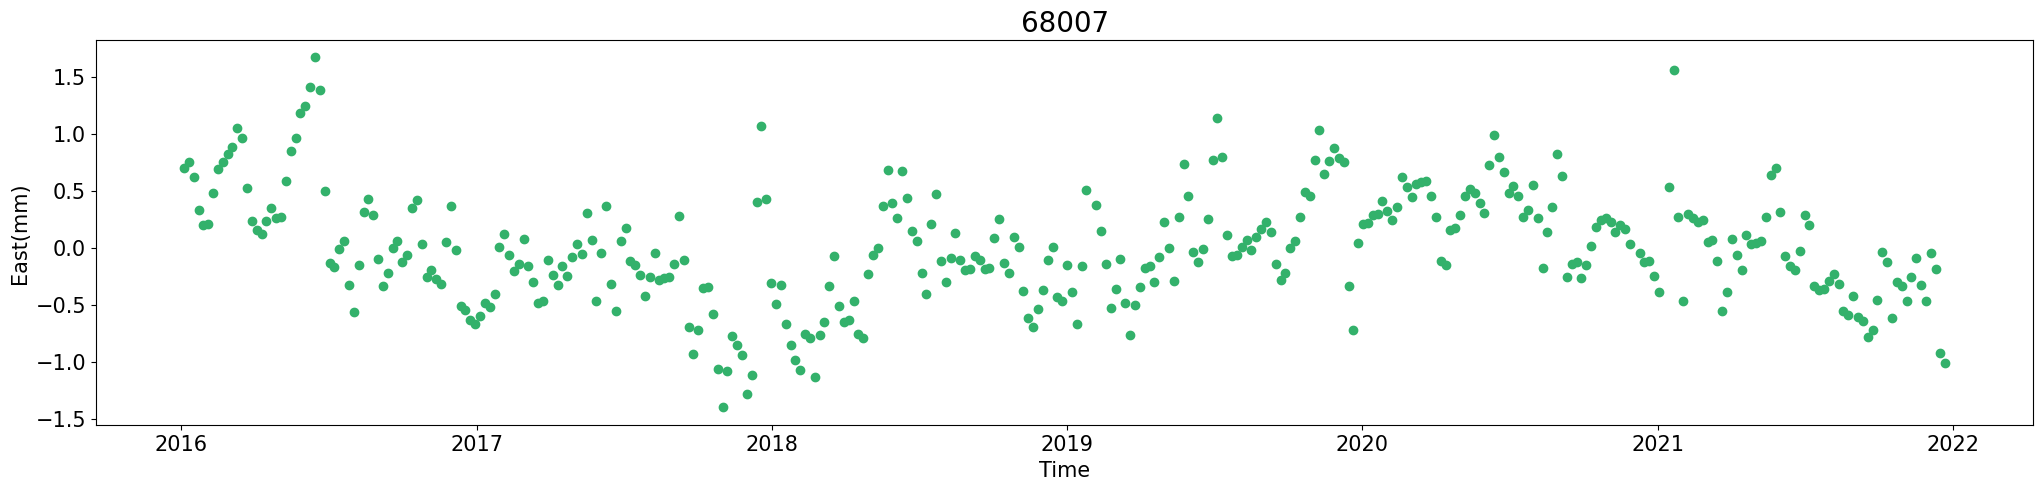

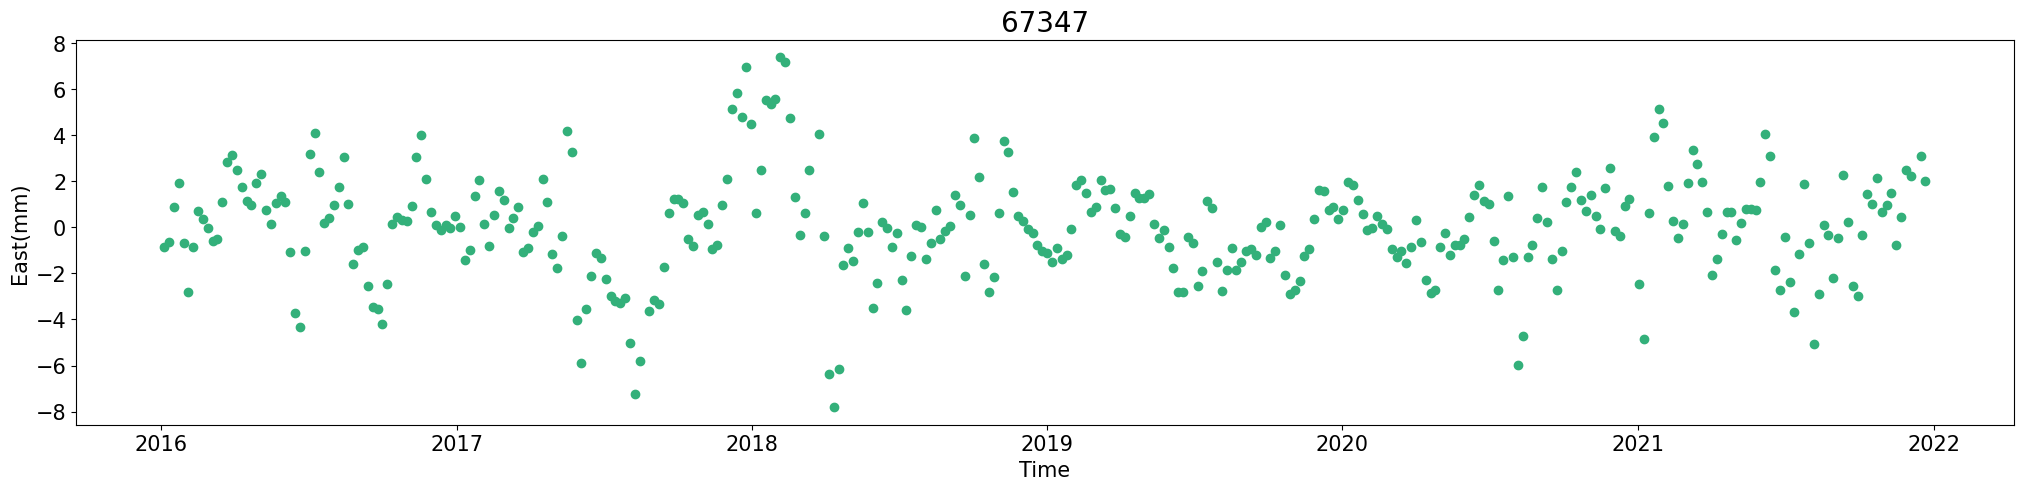

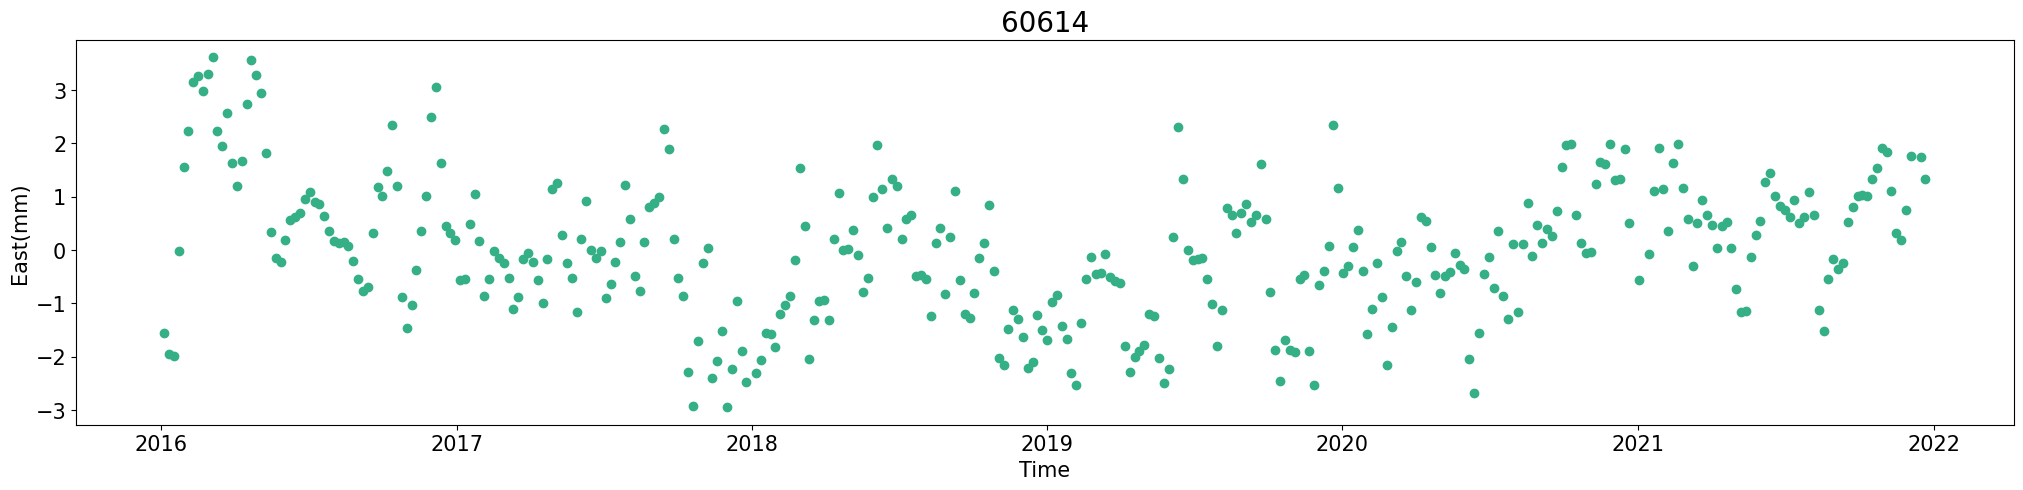

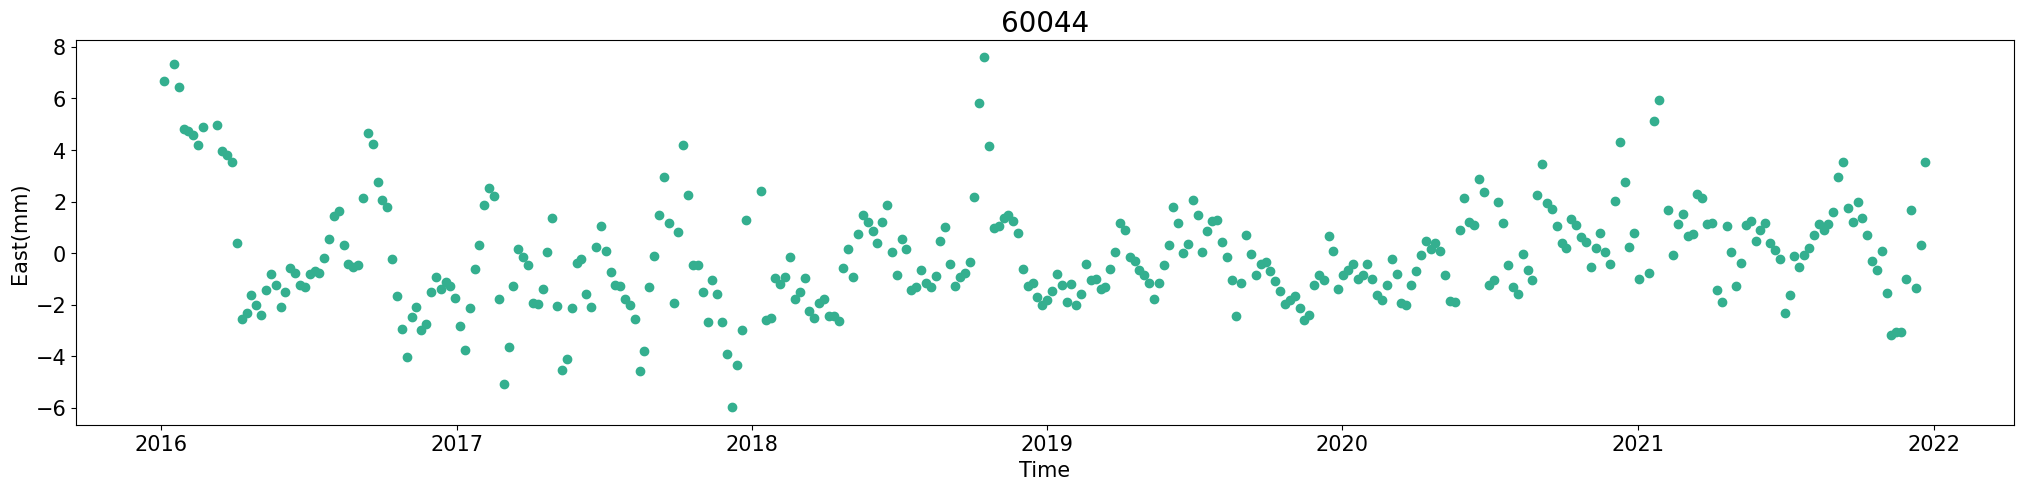

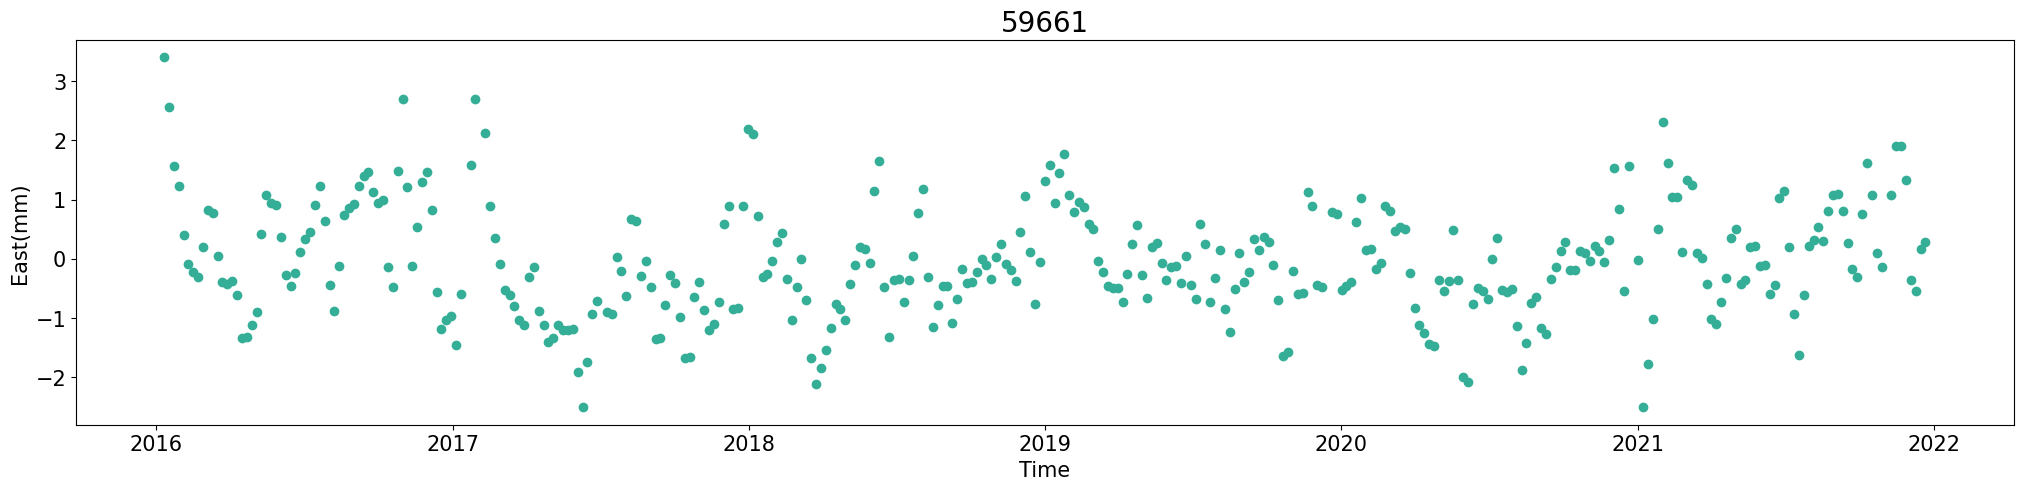

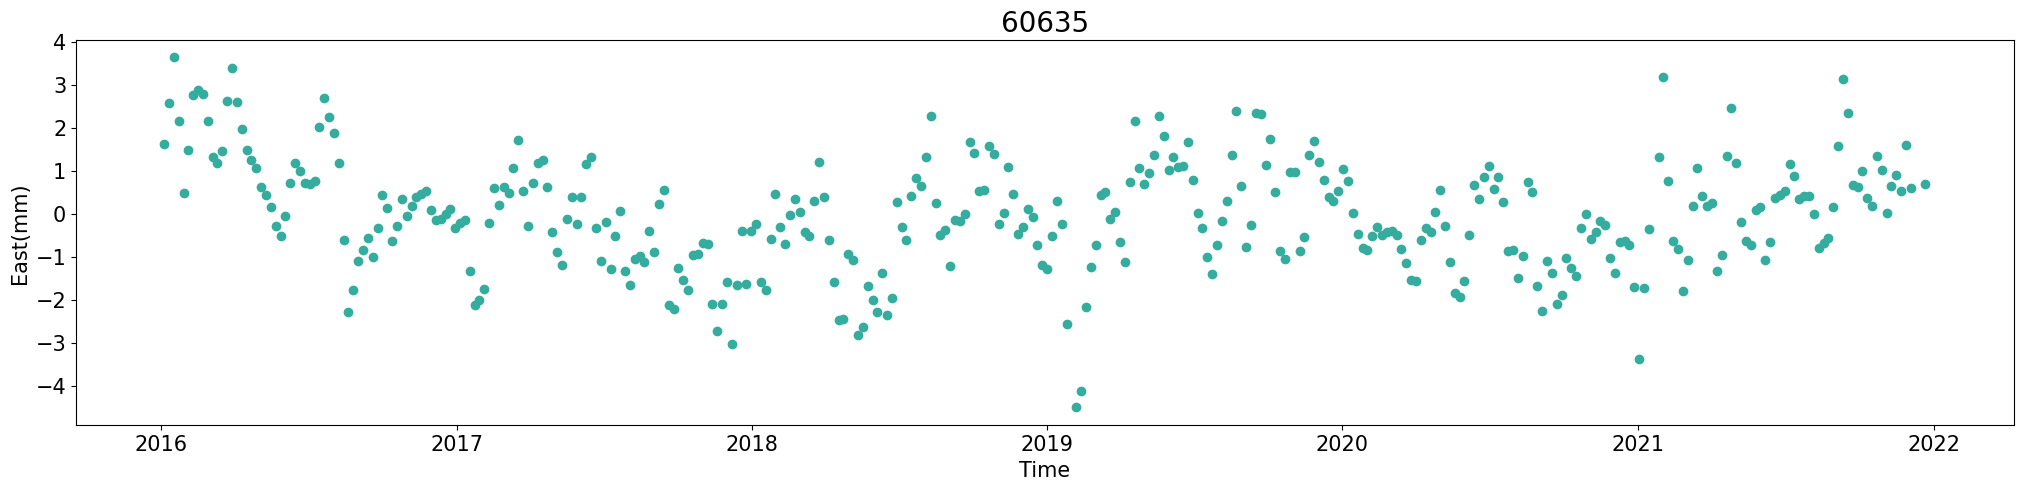

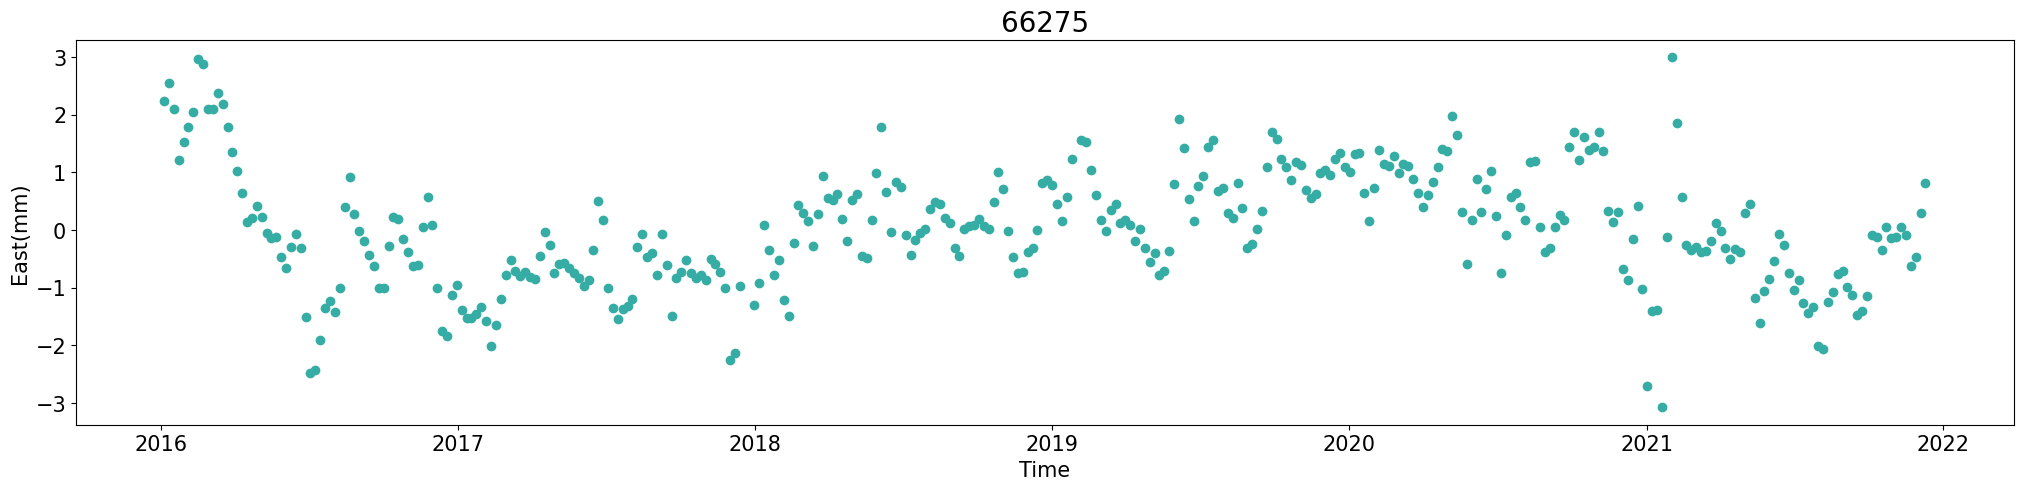

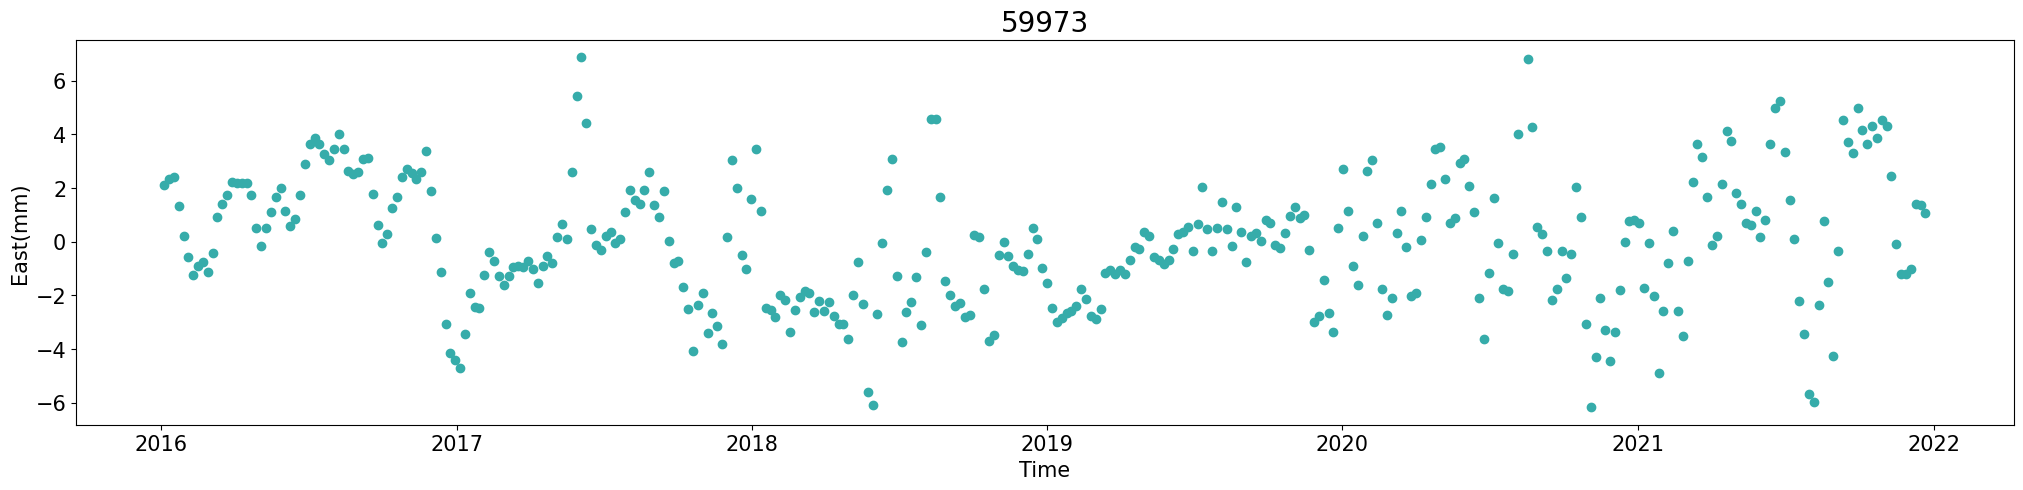

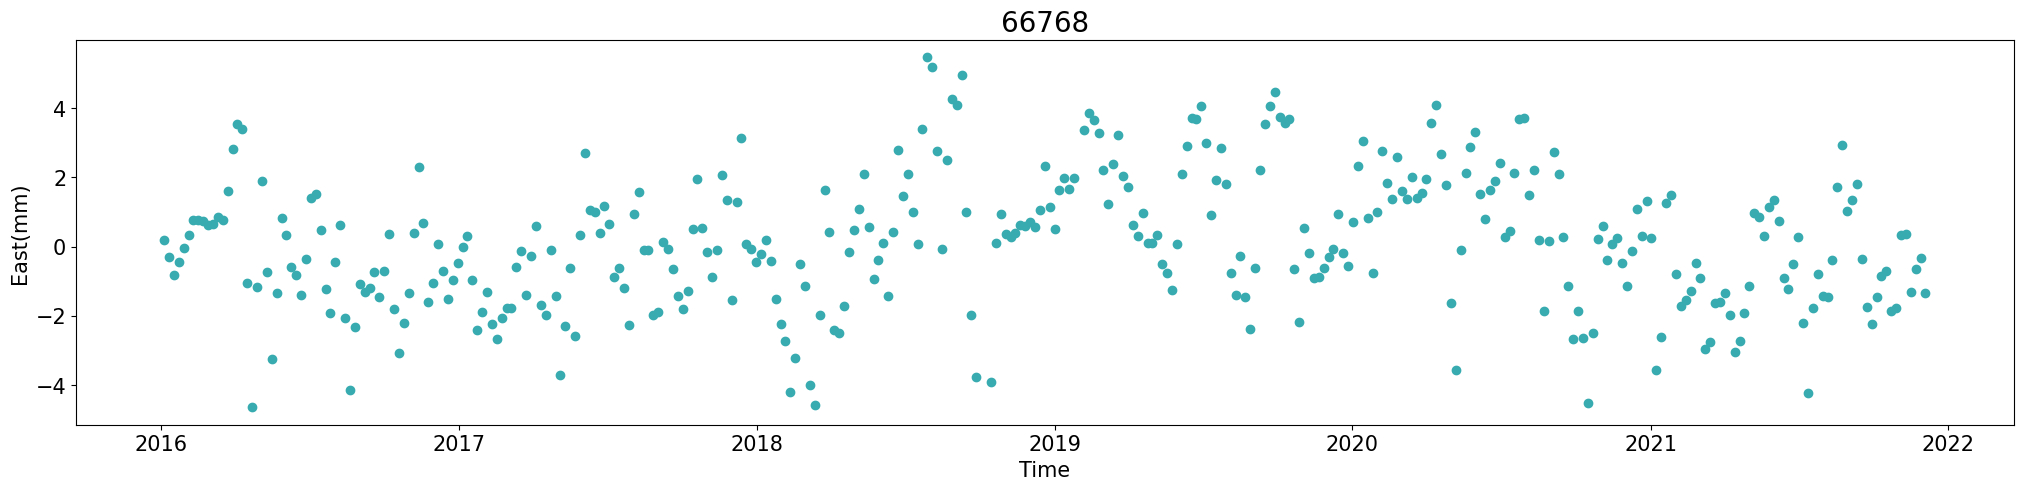

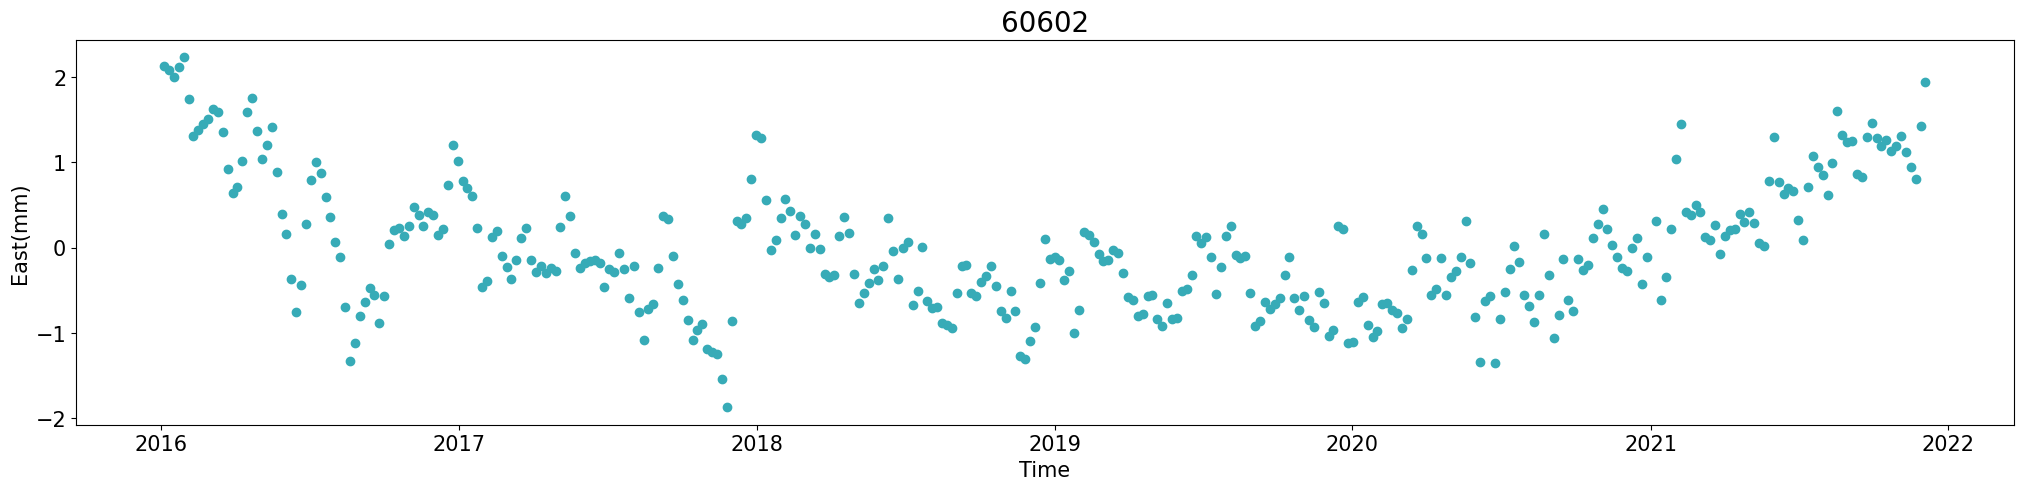

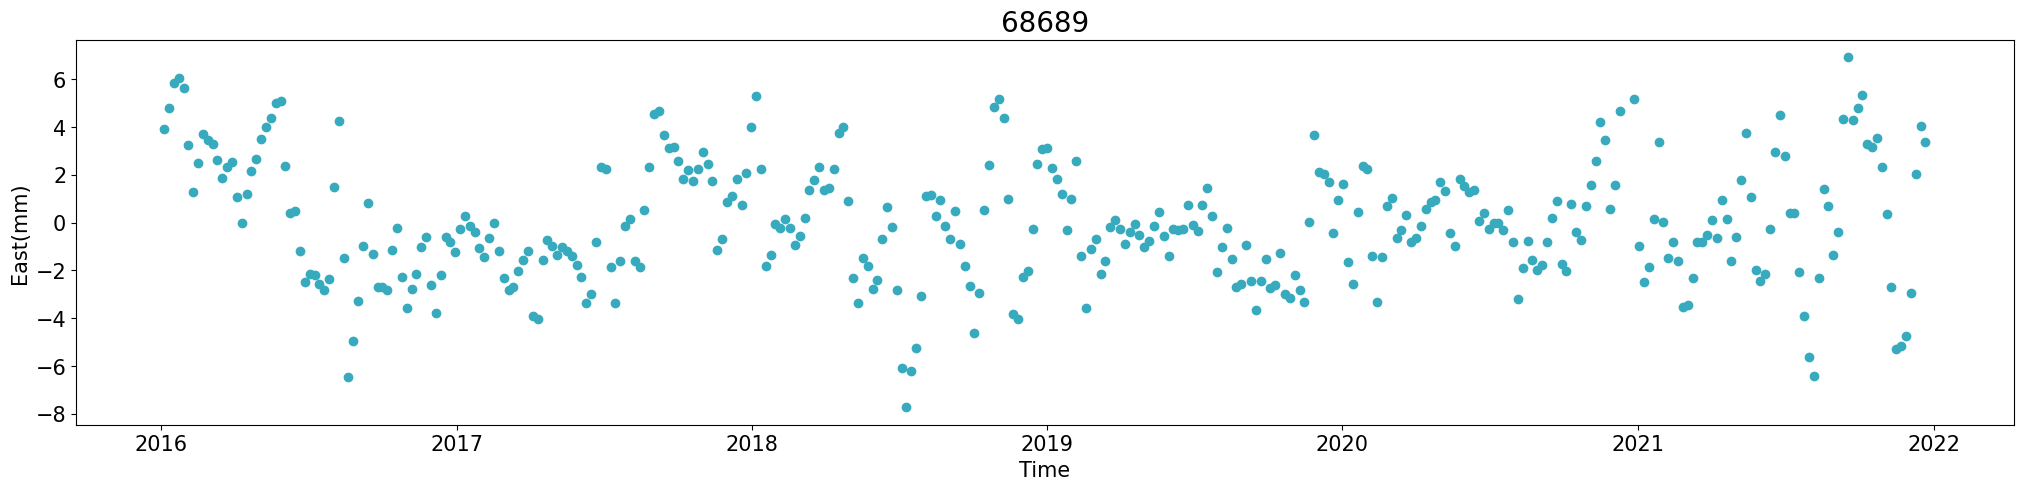

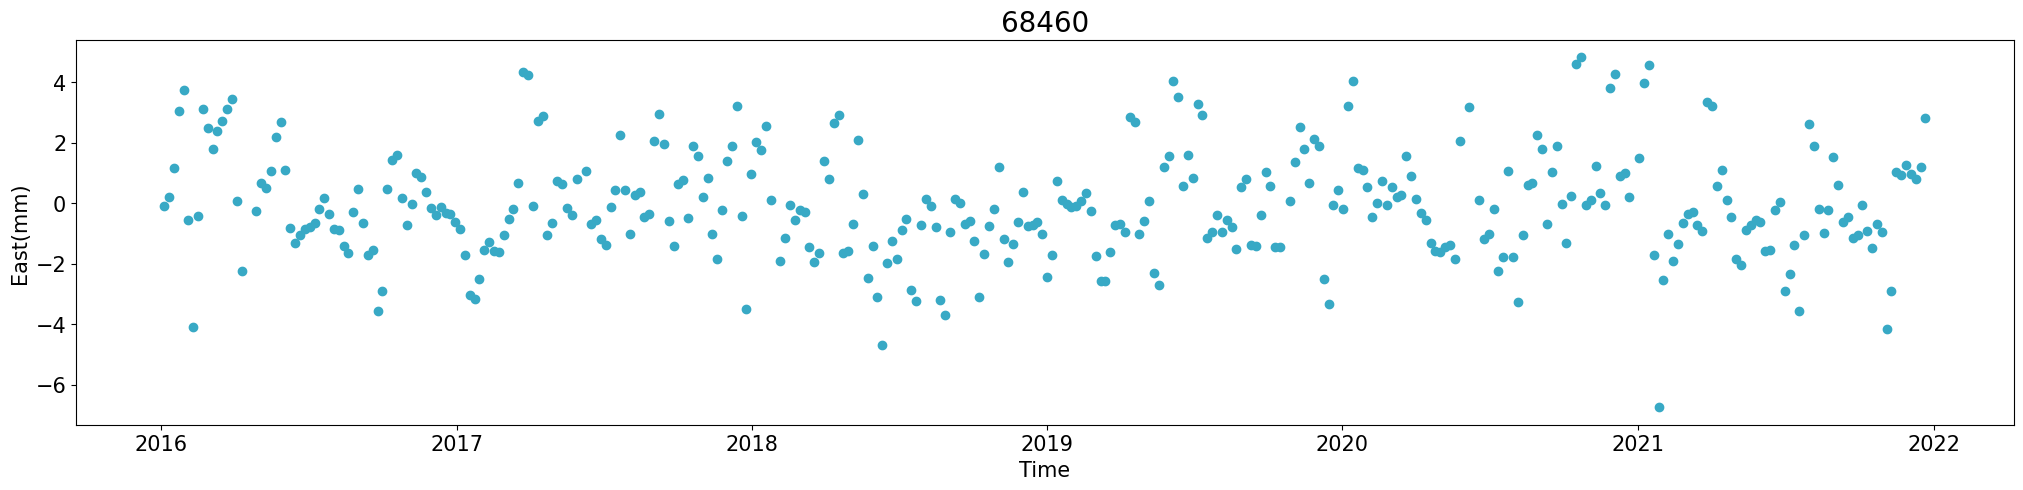

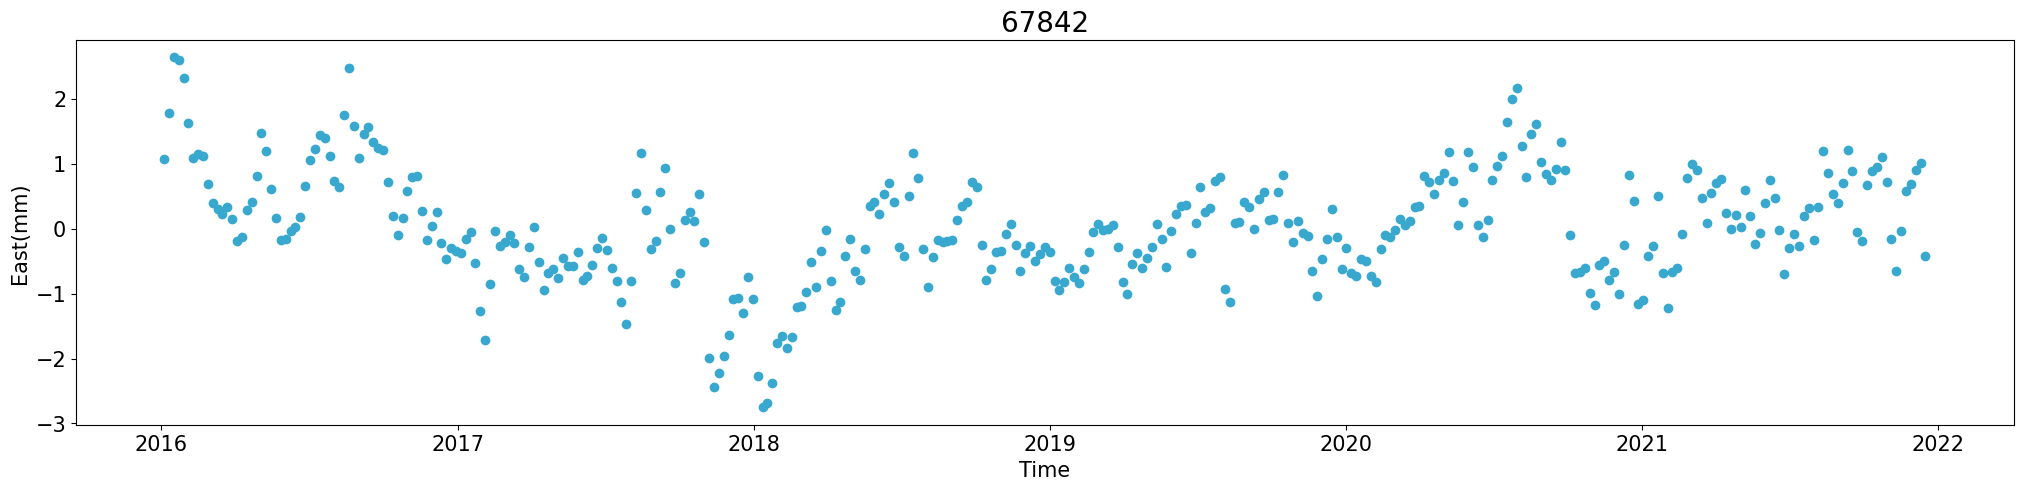

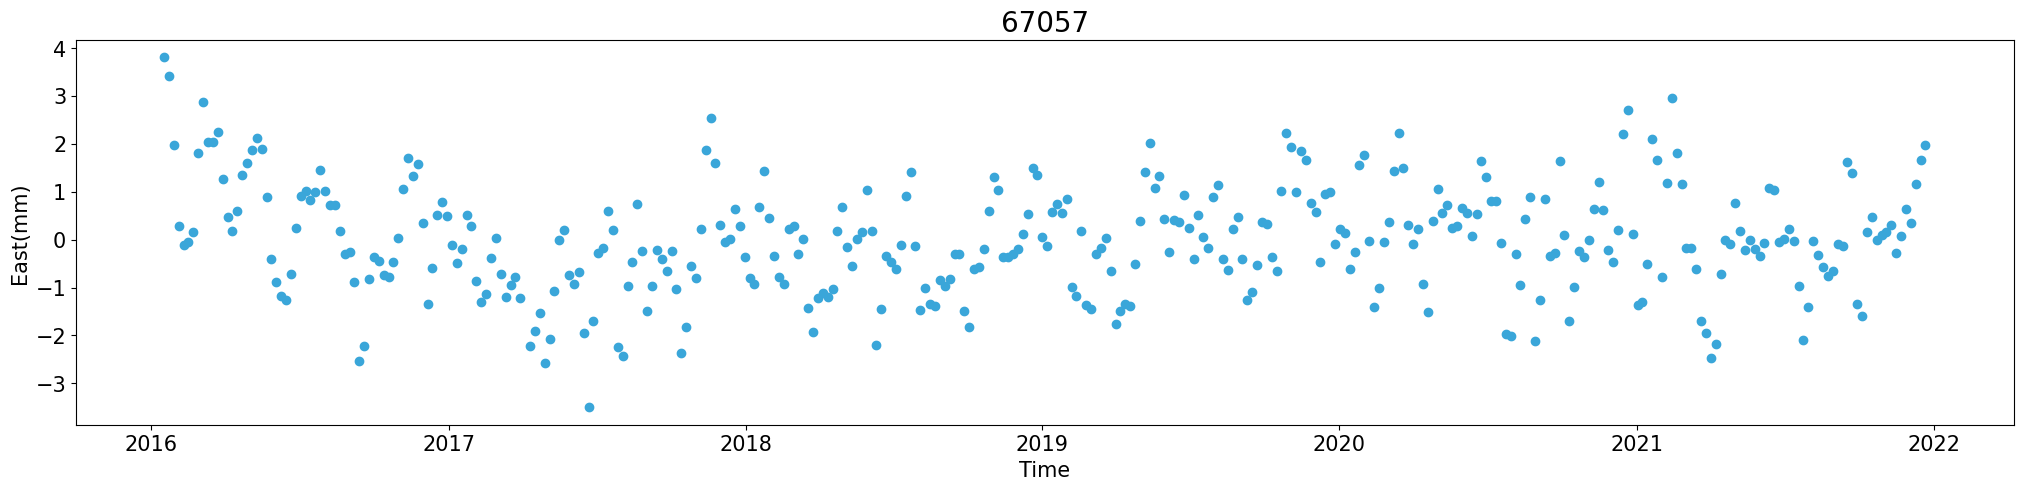

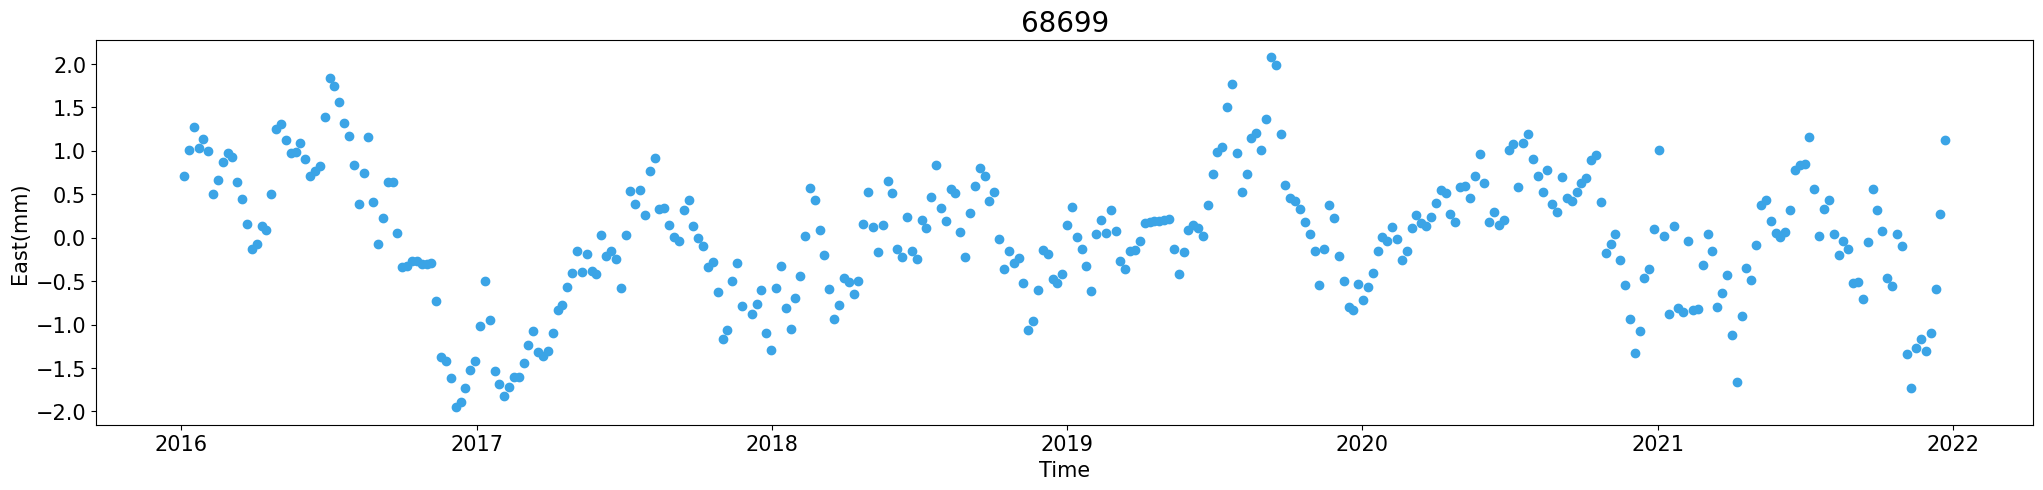

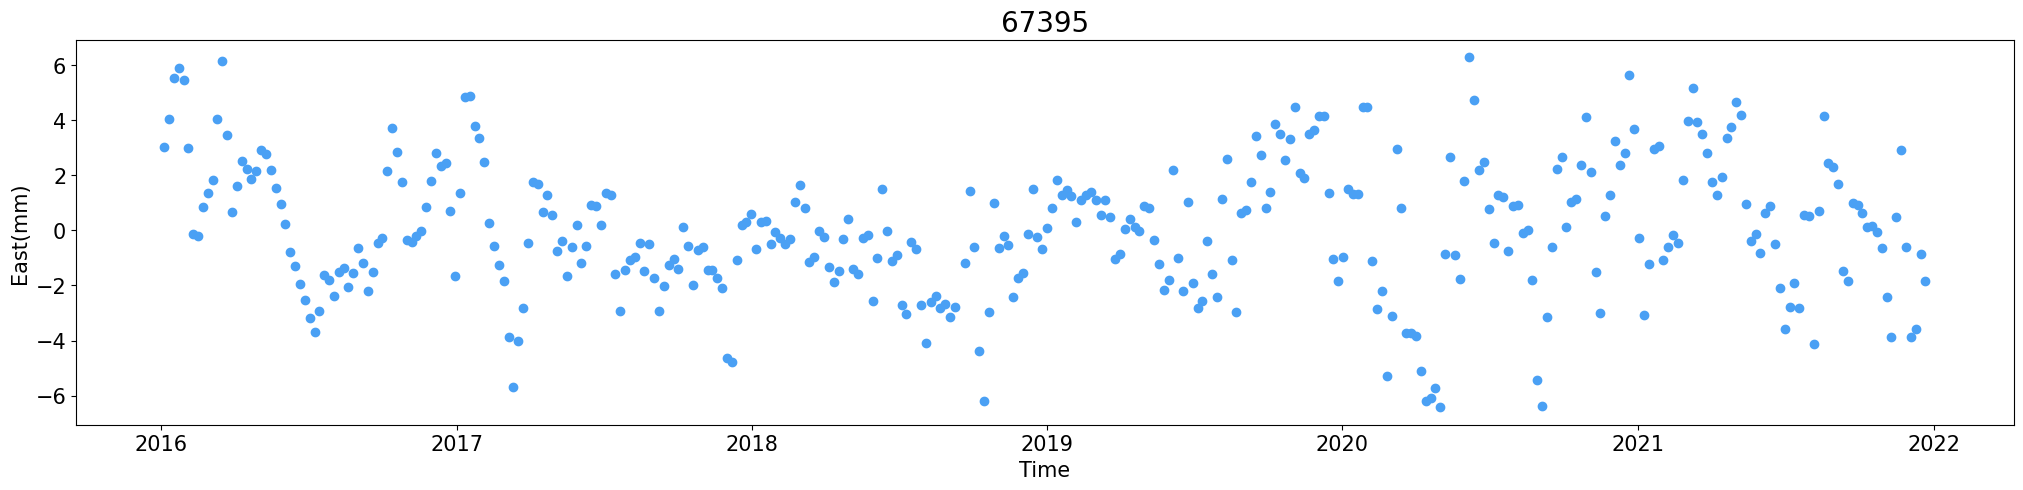

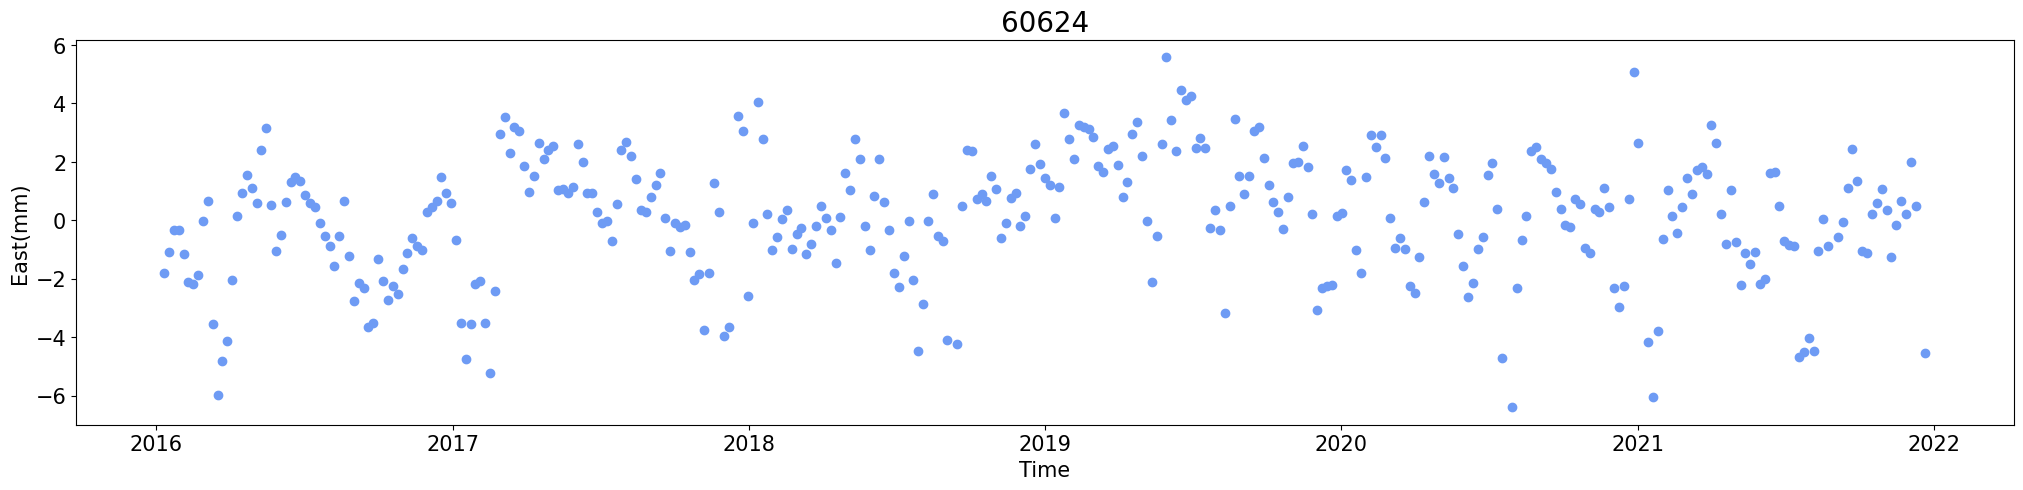

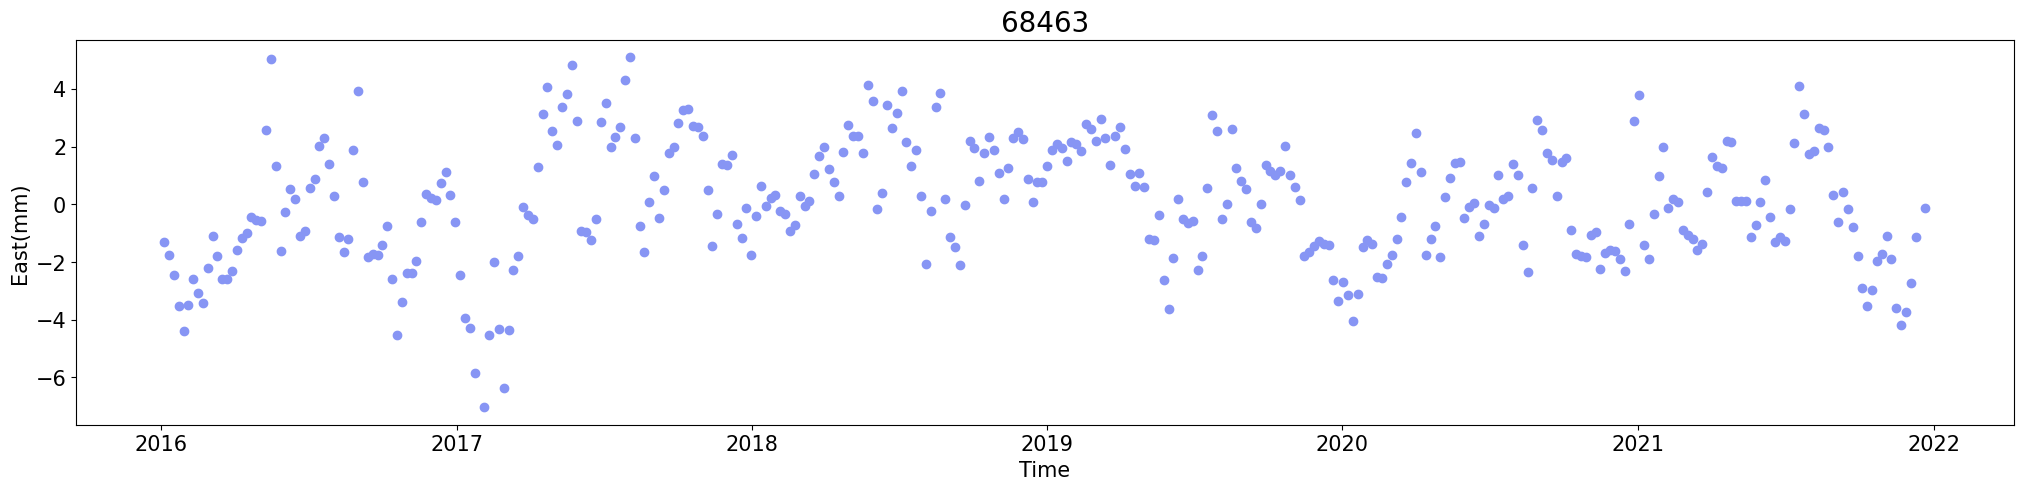

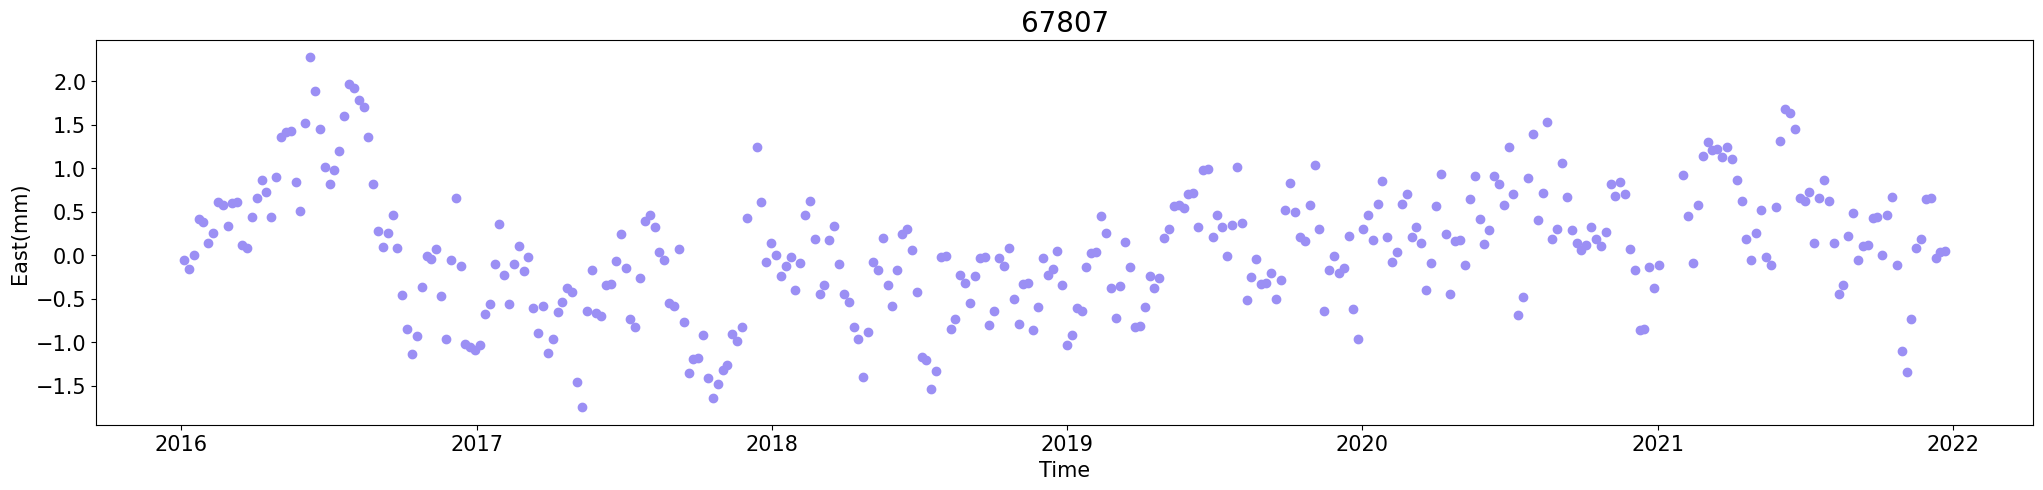

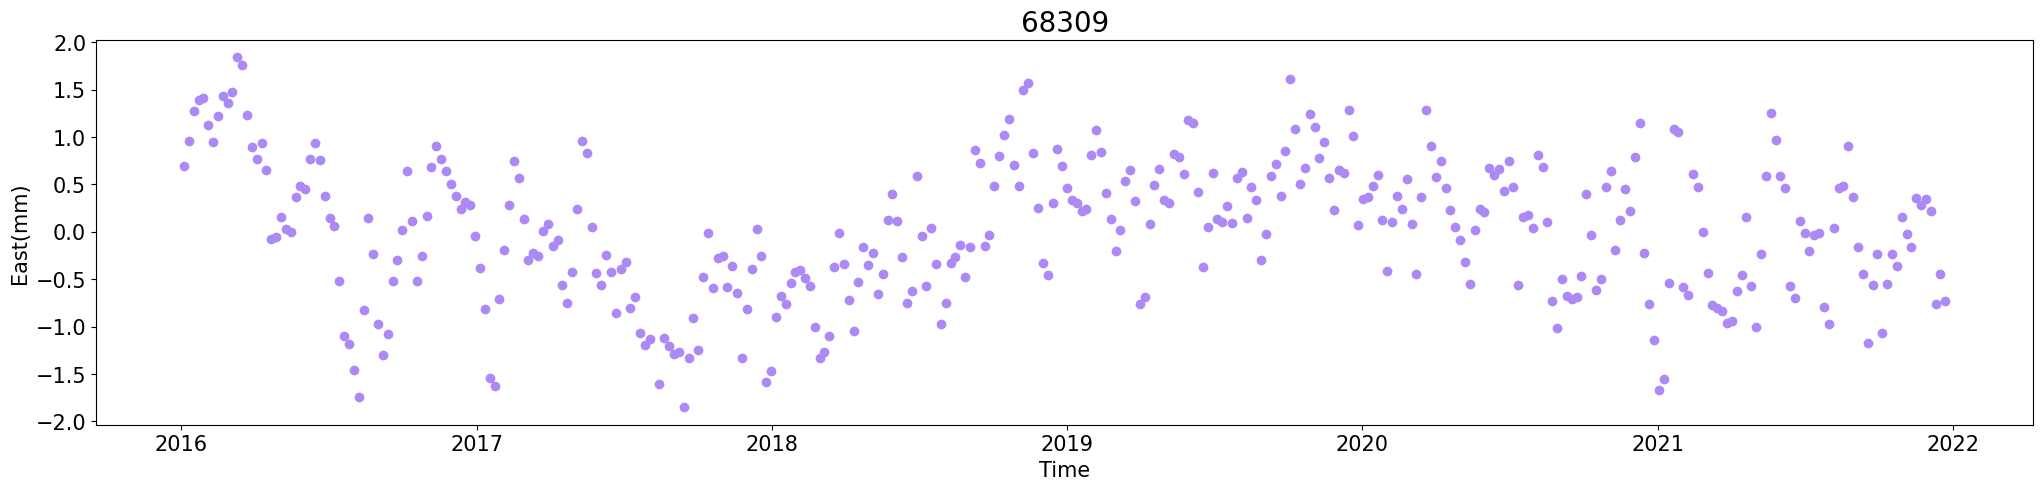

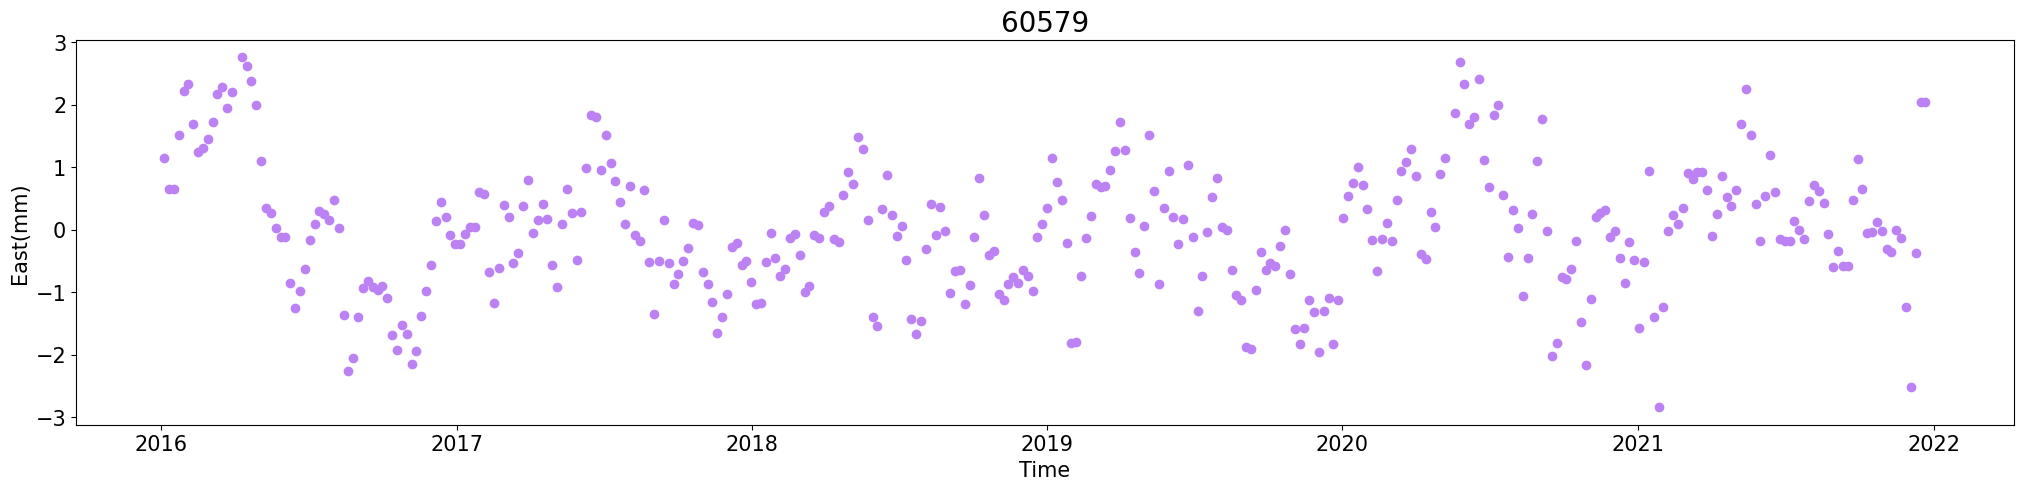

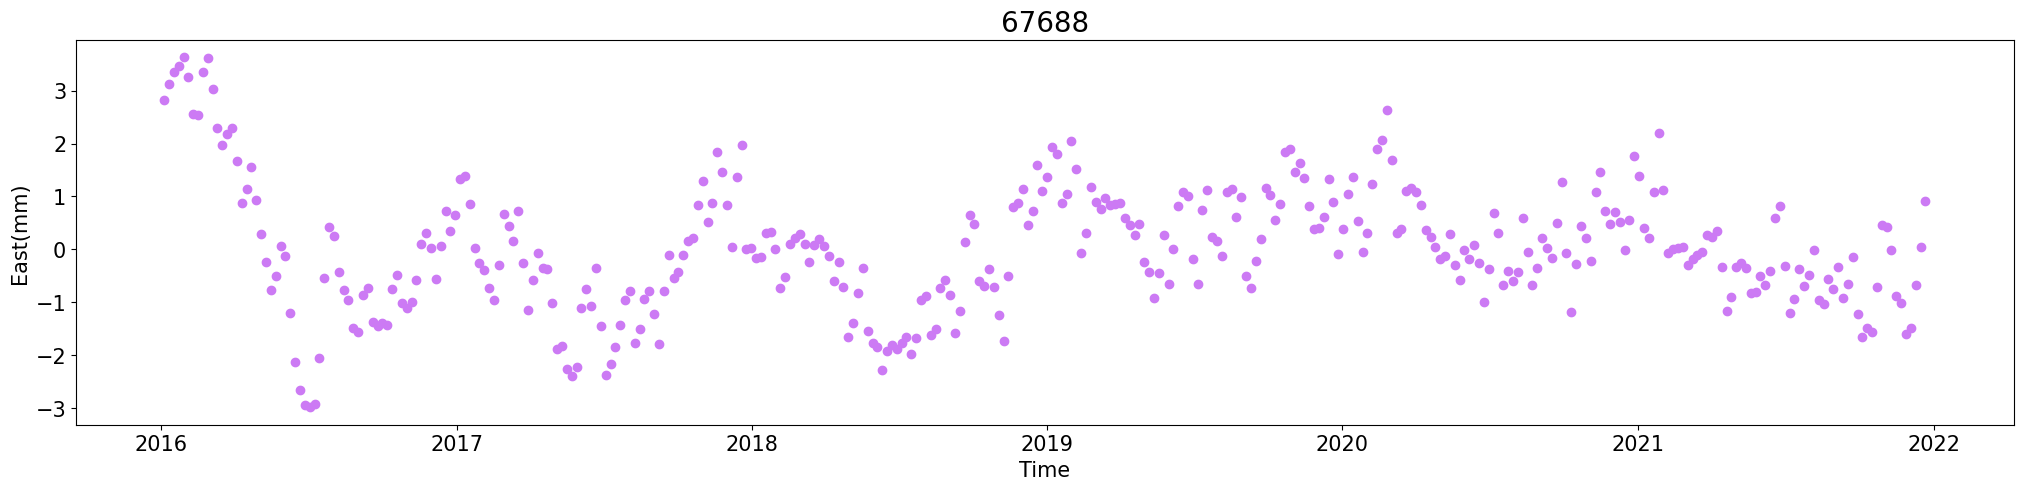

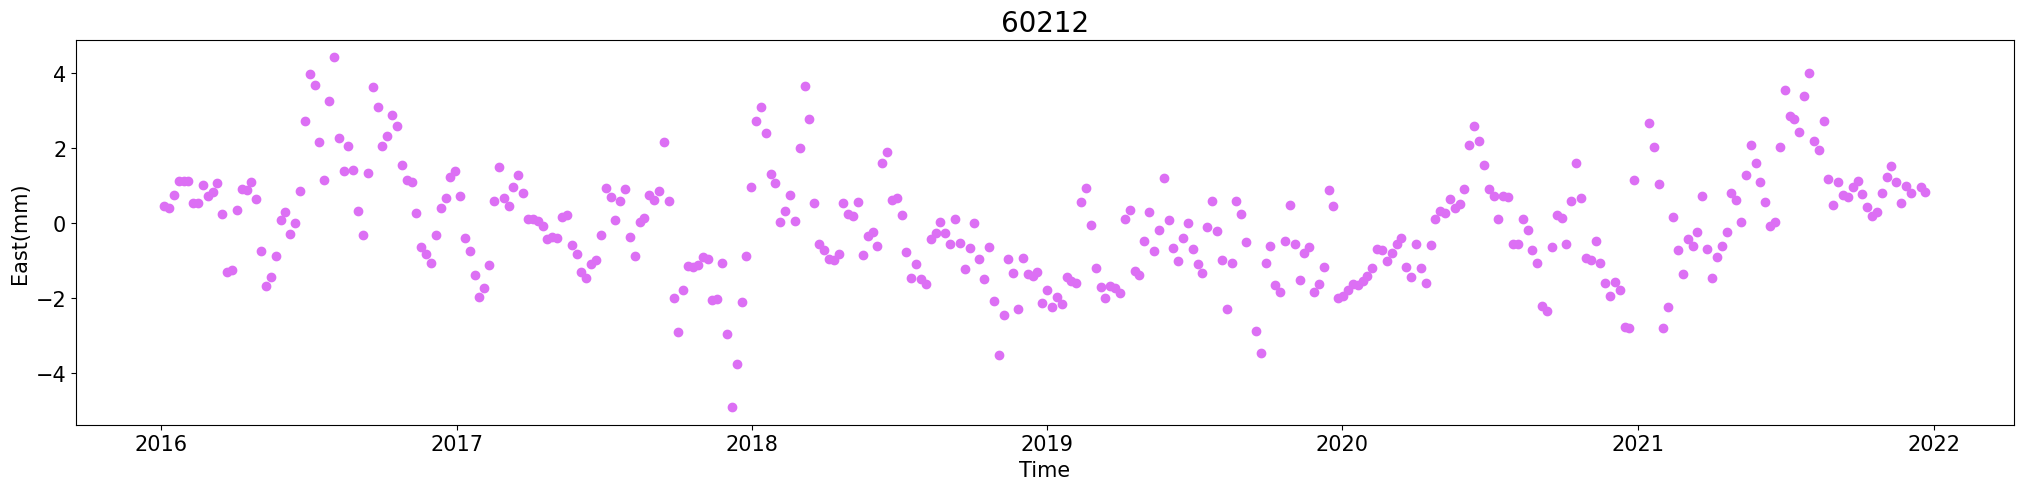

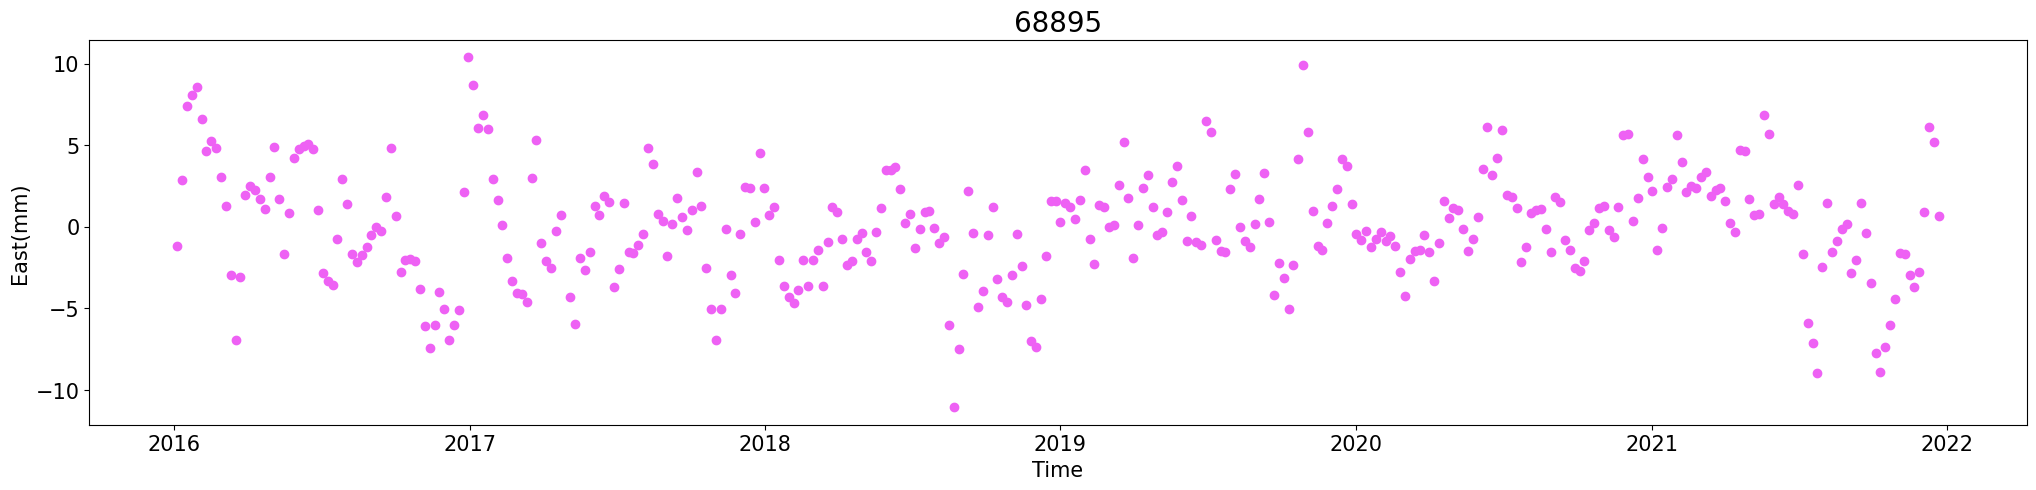

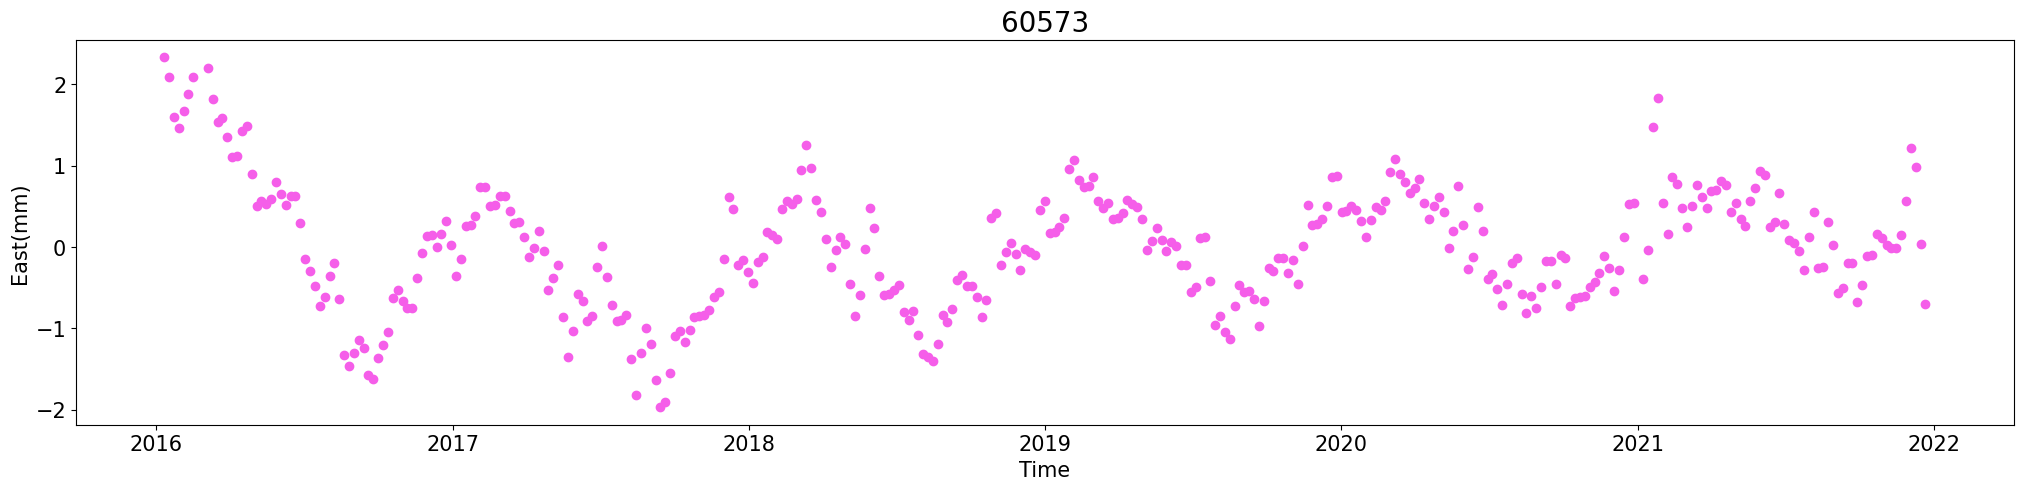

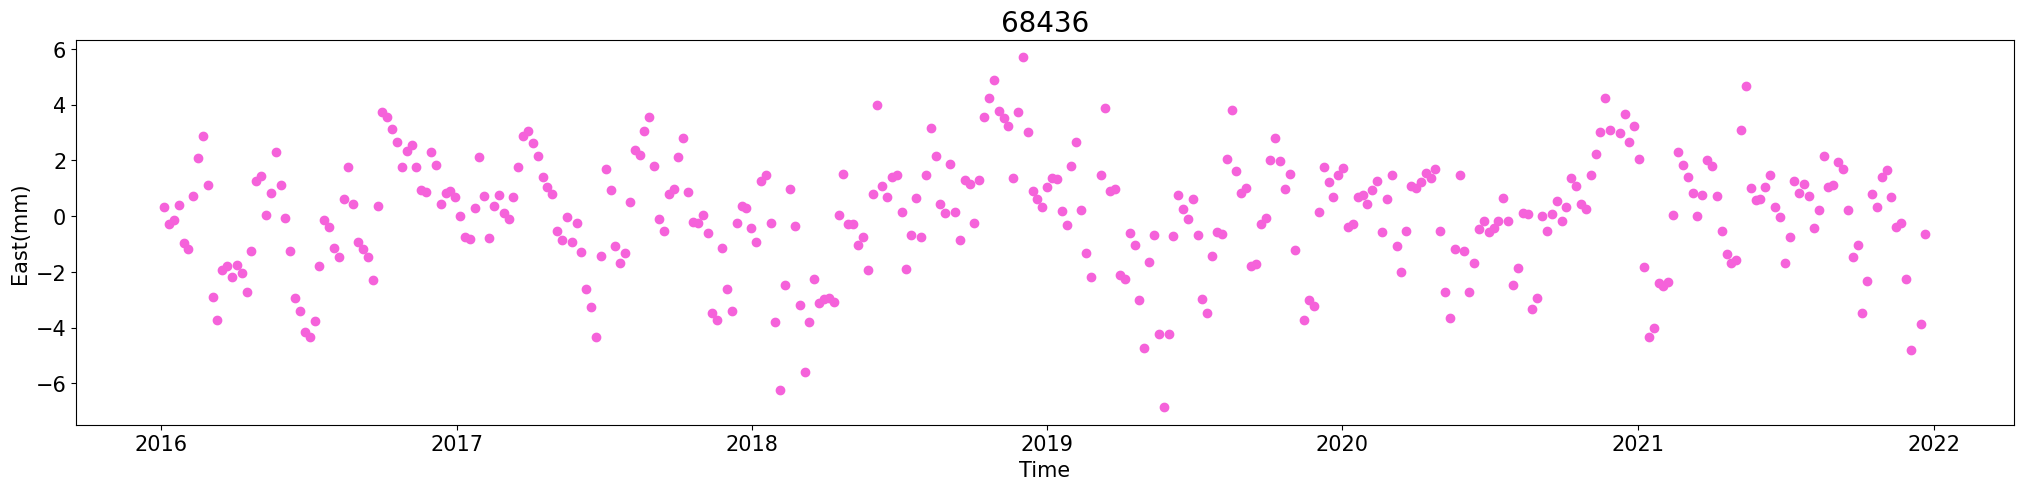

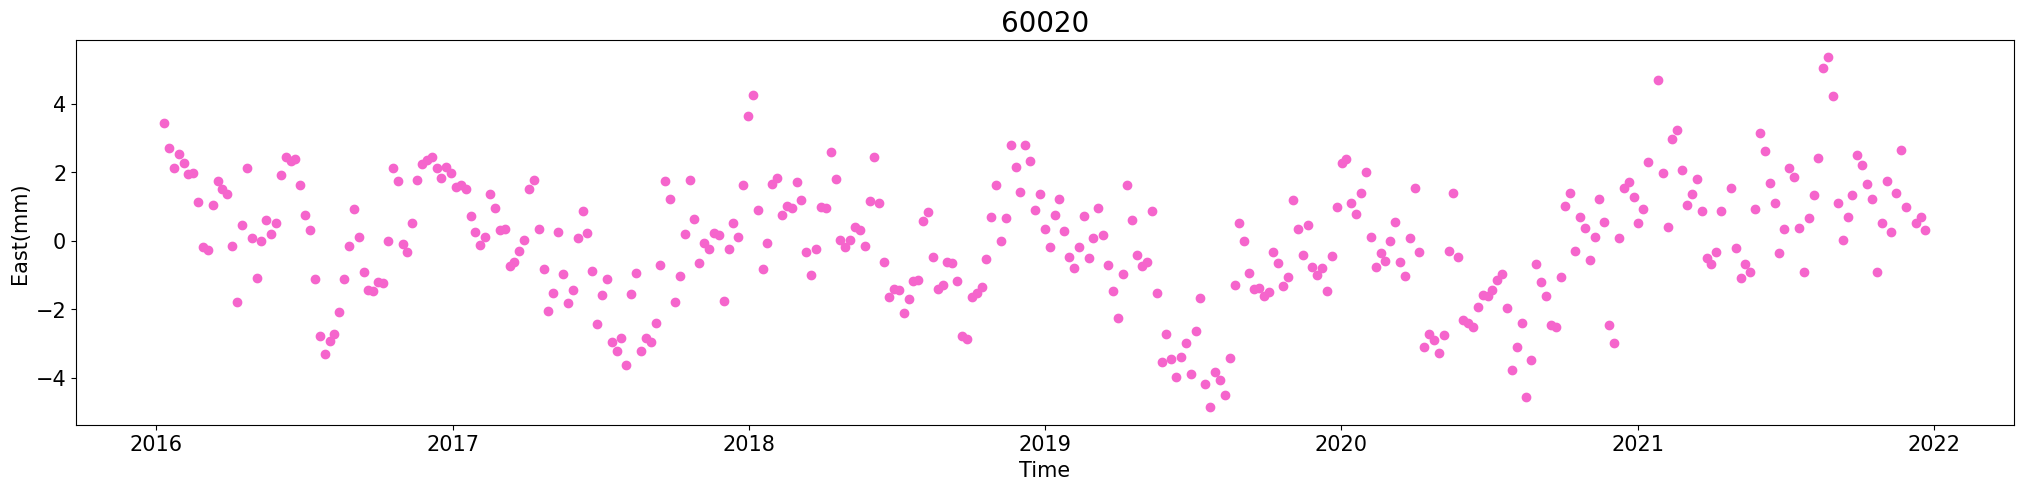

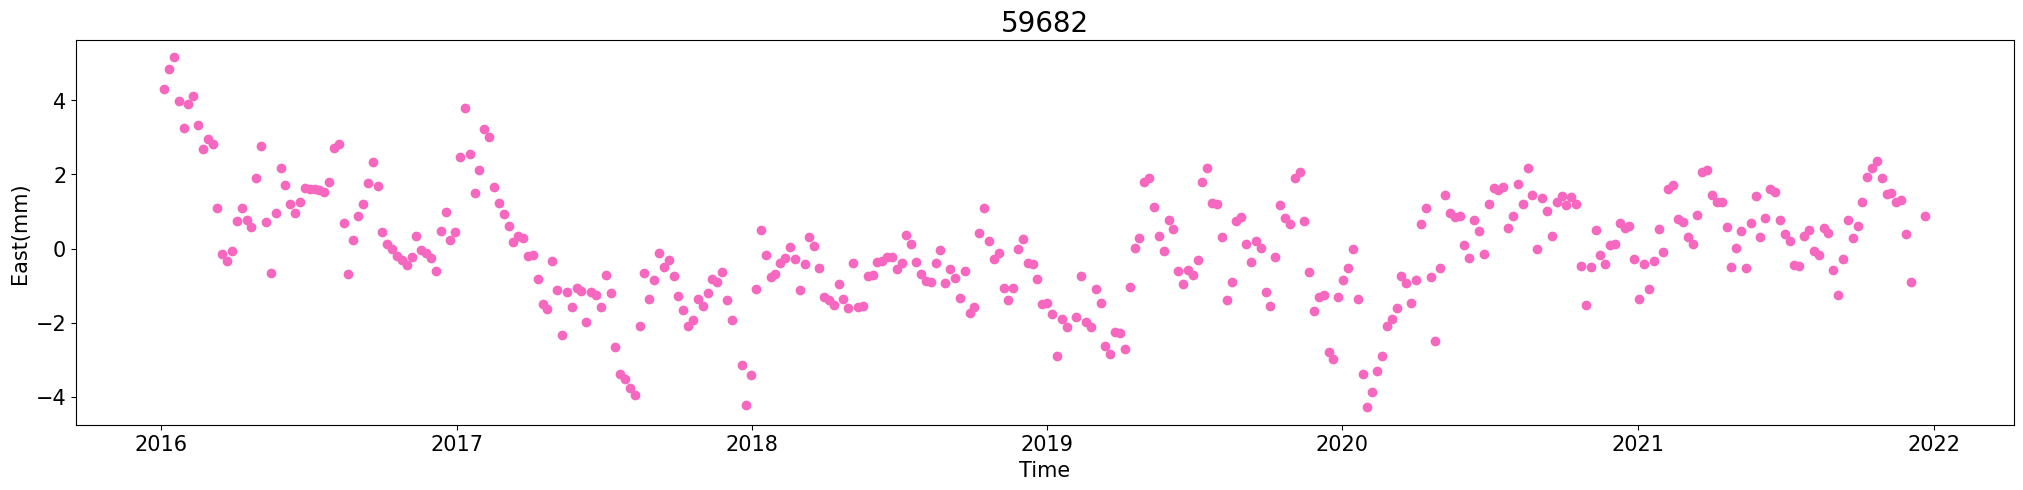

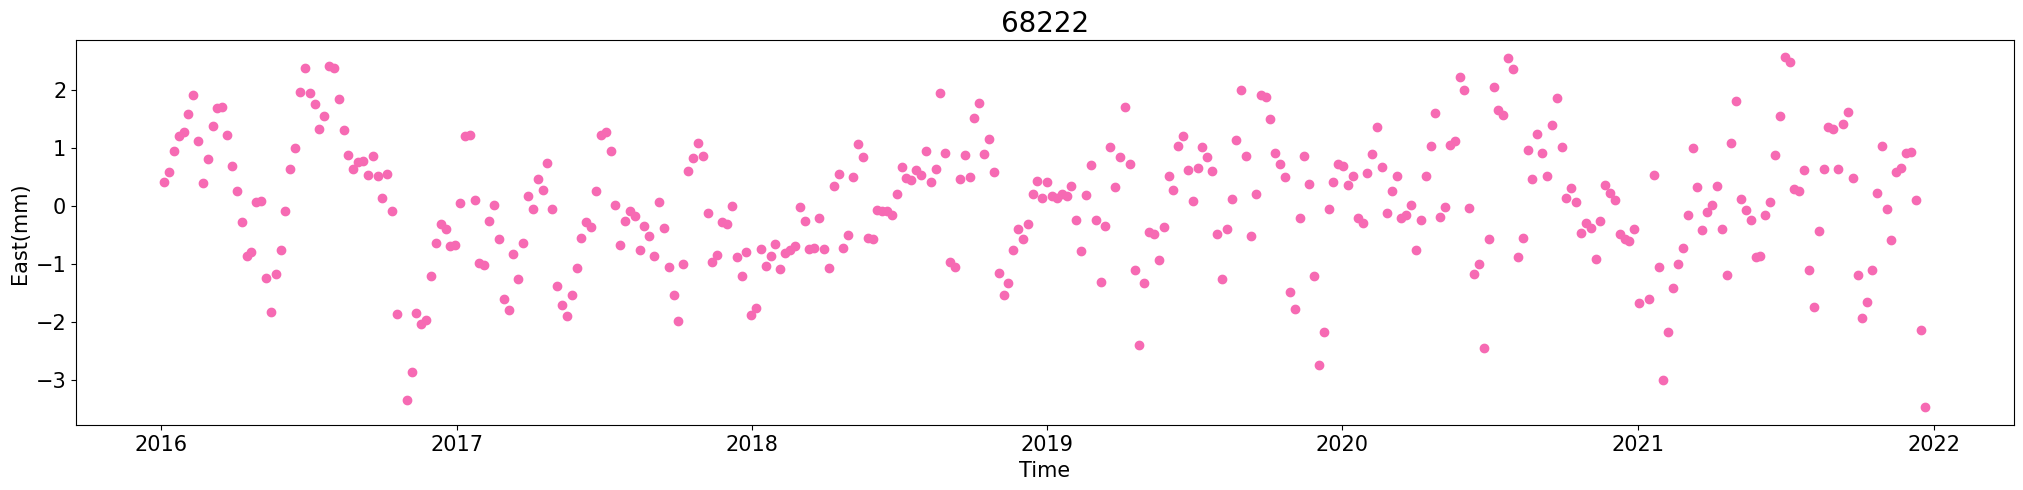

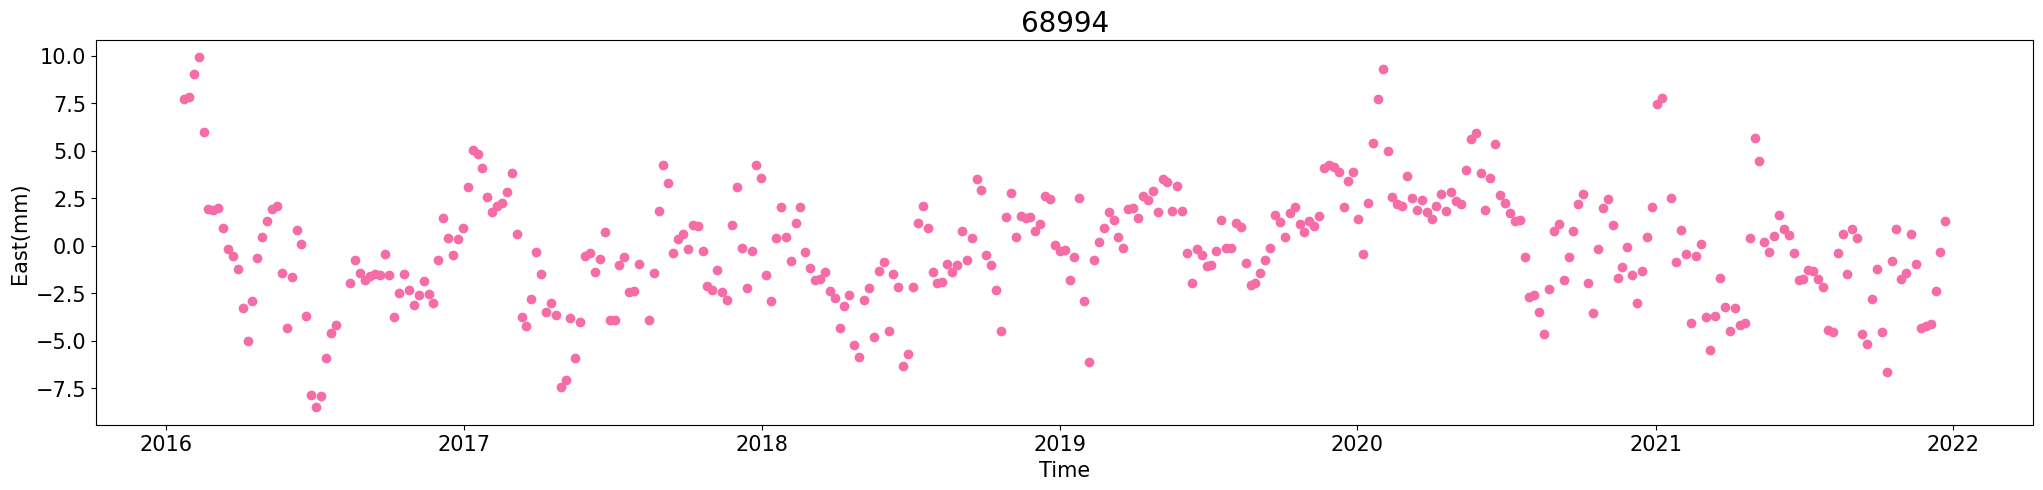

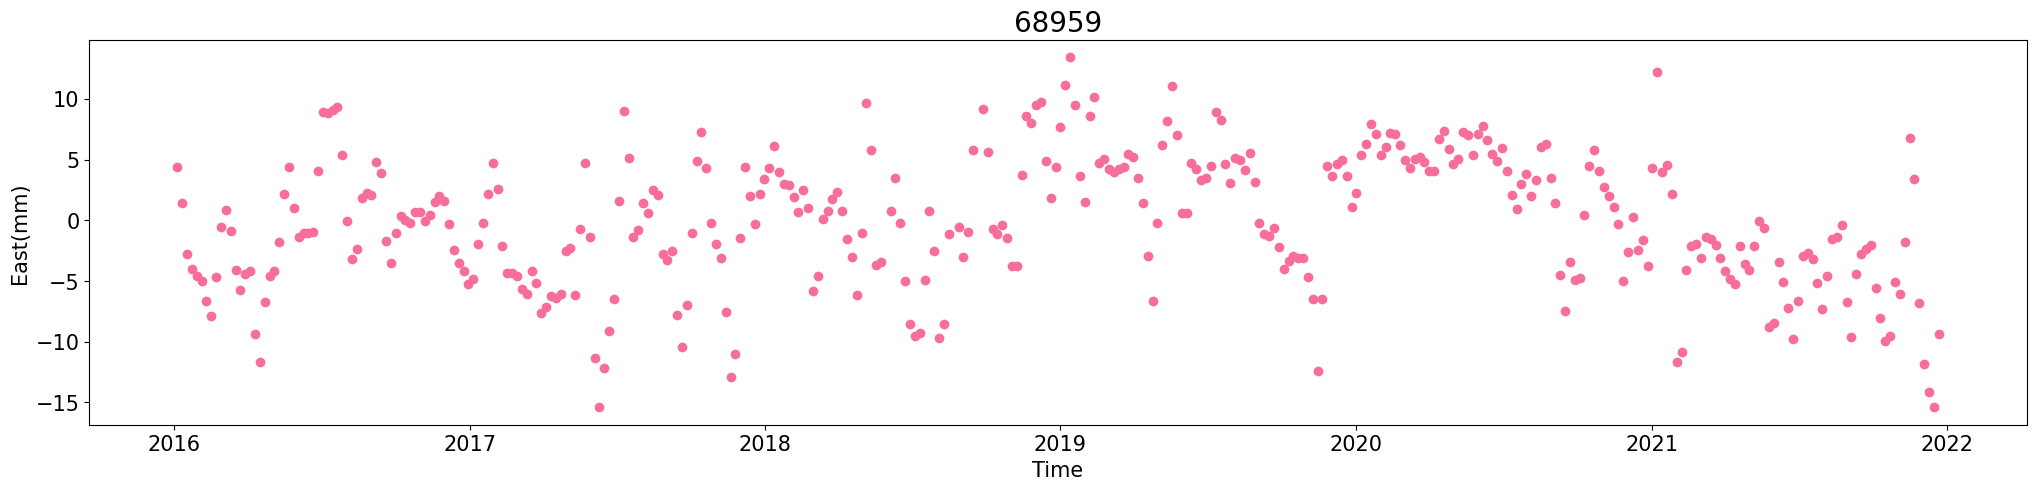

In [108]:
#checking the areas's plots - rolling mean

colors = sns.color_palette("husl", len(areas_rolling_mean_dict))
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/points_rolling_mean/east'

for i, (indice_number, indice_data) in enumerate(areas_rolling_mean_dict.items()):
    plt.figure(figsize=(25, 5))
    
    plt.plot(indice_data.index, indice_data, 'o', color = colors[i])
    plt.title(f'{indice_number}', fontsize = 20)
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
   
    fl = os.path.join(folder, f'{indice_number}.svg')
    f = io.BytesIO()
    plt.savefig(fl, format="svg")

    plt.show()

In [85]:
target_index = 68311
closest_data = teste_area_selected.loc[target_index]
print(closest_data)

easting      4.481750e+06
northing     2.555950e+06
height       2.970000e+02
20160105    -2.800000e+00
20160111     7.000000e-01
                 ...     
20211210    -4.000000e-01
20211216    -1.560000e+01
20211222    -1.840000e+01
latitude     4.609636e+01
longitude    1.207657e+01
Name: 68311, Length: 369, dtype: float64


In [123]:
#checking all point together:

#colors = sns.color_palette("husl", len(areas_rolling_mean_dict))
#folder = ''

#plt.figure(figsize=(40, 15))

#for i, (indice_number, indice_data) in enumerate(areas_rolling_mean_dict.items()):
    #plt.plot(indice_data.index, indice_data, label = f'{indice_number}', color=colors[i], lw=1.5)

#plt.title('Rolling Mean - All Points', fontsize=30)
#plt.xlabel('Time', fontsize=20)
#plt.xticks(fontsize=20)
#plt.ylabel('East(mm)', fontsize=20)
#plt.yticks(fontsize=20)
#plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-10-15'))
#plt.legend()

#fl = os.path.join(folder, 'rm_all_points_EAST.svg')
#plt.savefig(fl, format="svg")

#plt.show()

In [124]:
#getting the average for all points rolling mean
all_rm_data = pd.DataFrame()

for indice_number, indice_data in areas_rolling_mean_dict.items():
    all_rm_data[indice_number] = indice_data.squeeze()
    
avg_rm = all_rm_data.mean(axis=1).rolling(2, min_periods=1).mean()
print(avg_rm)

2016-01-05    1.556121
2016-01-11    1.590368
2016-01-17    1.762406
2016-01-23    1.888645
2016-01-29    1.811629
                ...   
2021-11-28   -0.060283
2021-12-04   -0.348957
2021-12-10   -0.398319
2021-12-16   -0.085196
2021-12-22    0.169294
Length: 360, dtype: float64


In [125]:
#removing the average rolling mean from each point
points_avgrm_reduced = pd.DataFrame()

for indice_number, indice_data in areas_rolling_mean_dict.items():
    points_avgrm_reduced[indice_number] = indice_data[f'{indice_number}_east(mm)_rm'] - avg_rm
    
points_avgrm_reduced = points_avgrm_reduced.dropna(axis=0)

print(points_avgrm_reduced)

               65572     66309     59887     59399     66170     65615  \
2016-01-23 -1.778715  0.064709 -1.042320 -5.589261 -2.109075  0.290266   
2016-01-29 -0.733051 -0.354031 -0.936469 -5.524042 -2.265294 -0.066980   
2016-02-04  0.783479 -0.351905 -0.959752 -2.637957 -2.300646  0.146640   
2016-02-10  1.312463 -0.237325 -1.320581 -2.689418 -1.973545 -0.327287   
2016-02-16 -0.411054 -0.175246 -1.983910 -3.543379 -1.698943 -0.603713   
...              ...       ...       ...       ...       ...       ...   
2021-10-29 -1.089255 -0.401631  0.372820 -1.085925 -0.180334 -2.741712   
2021-11-10 -1.563640 -0.154824  1.068810 -3.721199  1.091517 -0.321917   
2021-11-16 -1.324238 -0.029826 -2.181601 -1.862242  0.529037 -0.085424   
2021-11-22 -2.109321  0.070687 -5.006497  5.722230  0.642071 -0.823418   
2021-11-28 -1.091337 -0.175733 -4.328326  6.759769  1.458172 -0.758344   

               68952     68331     66009     67193  ...     67688     60212  \
2016-01-23  0.396761  2.741548  

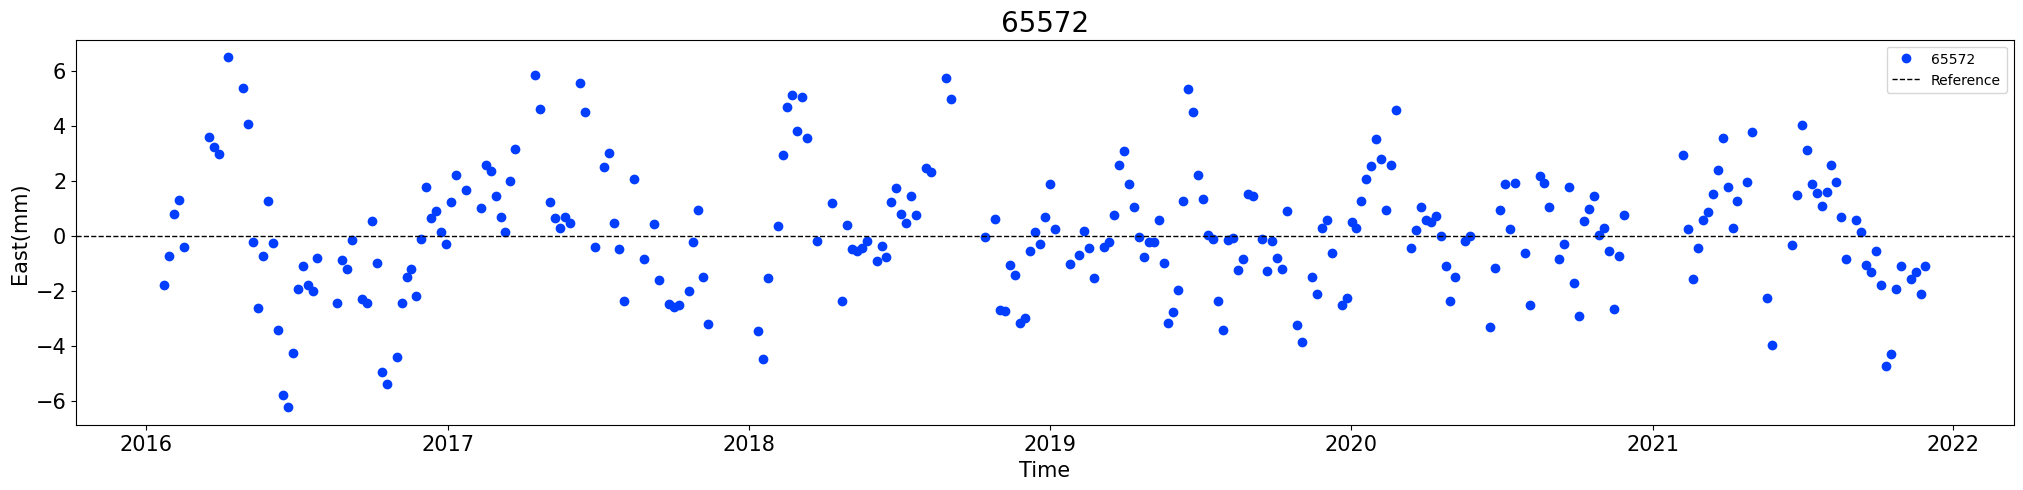

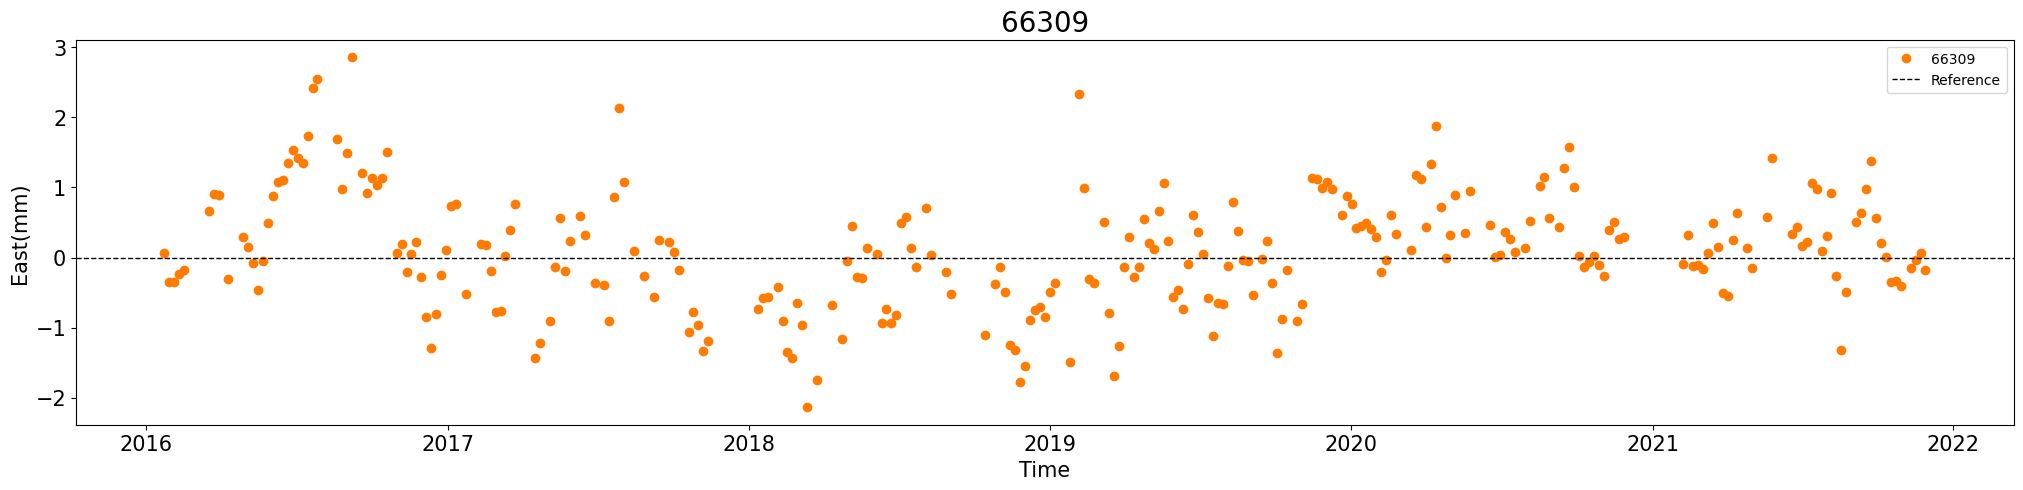

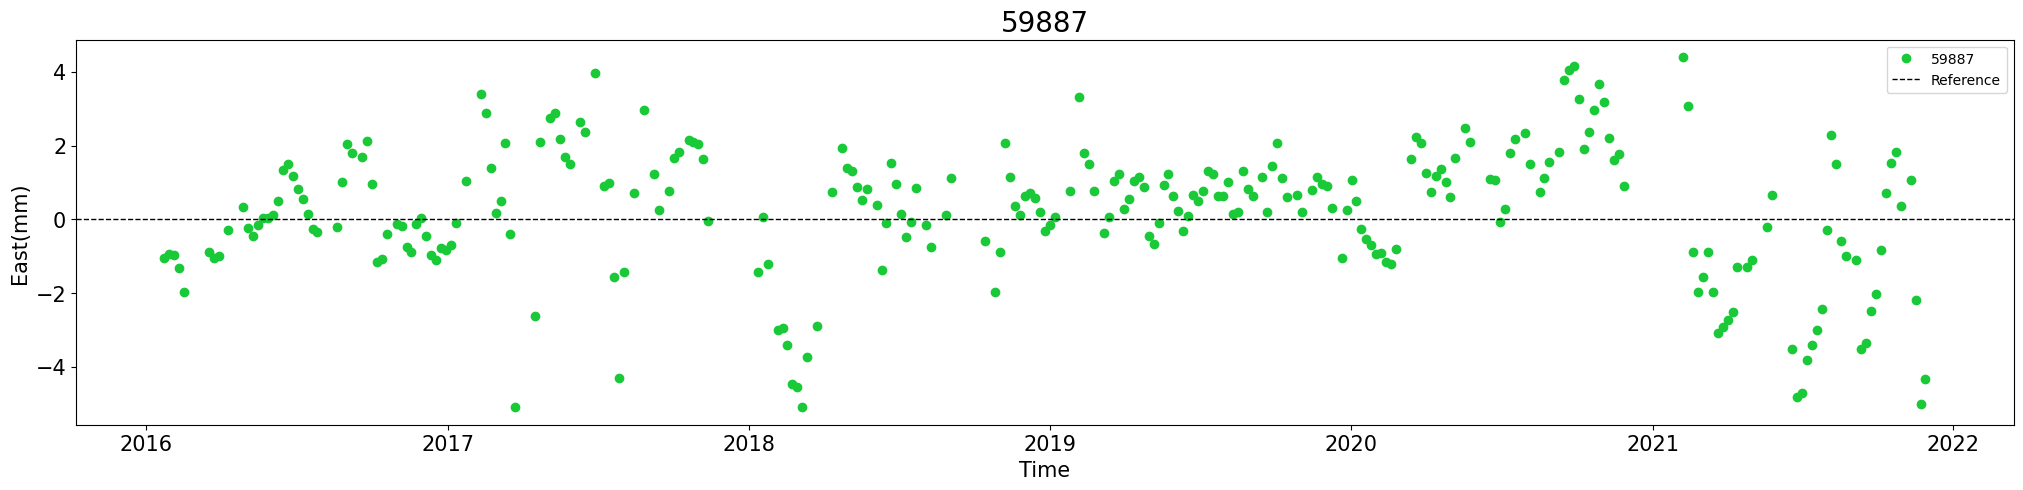

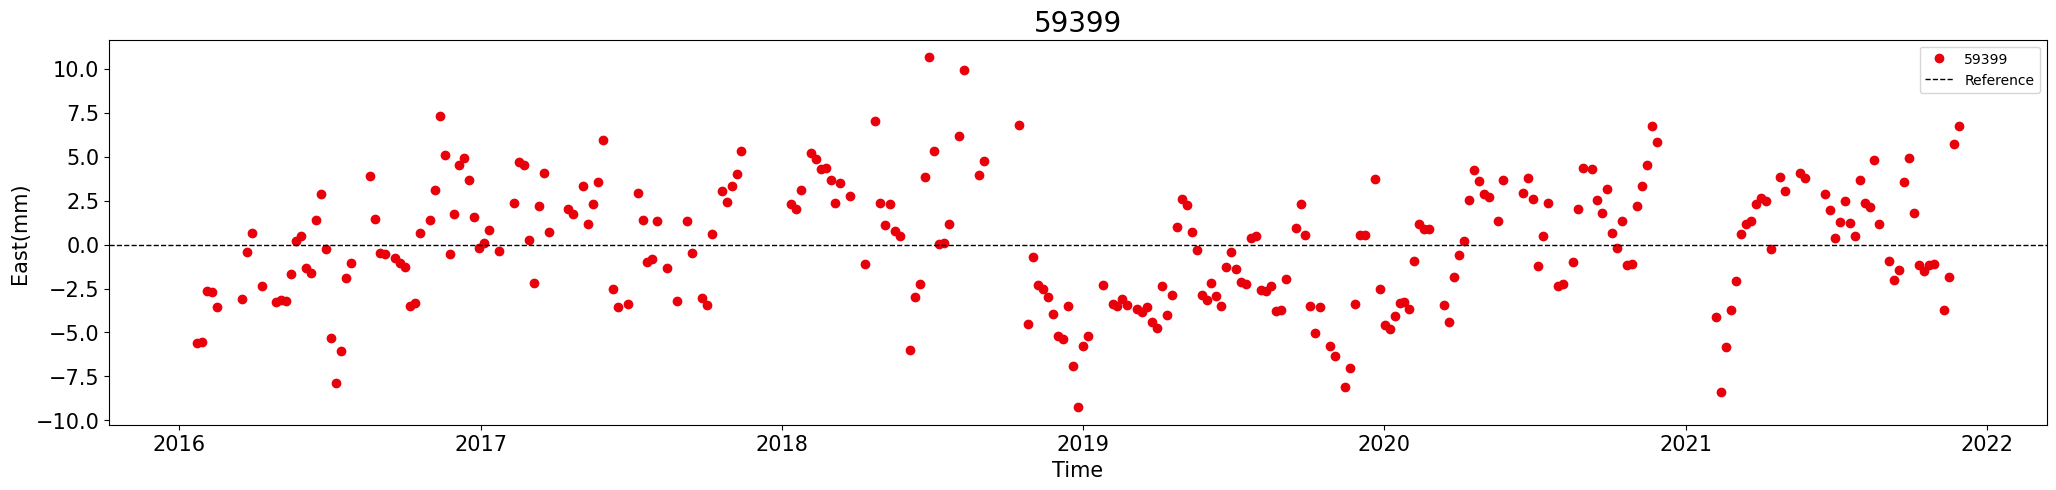

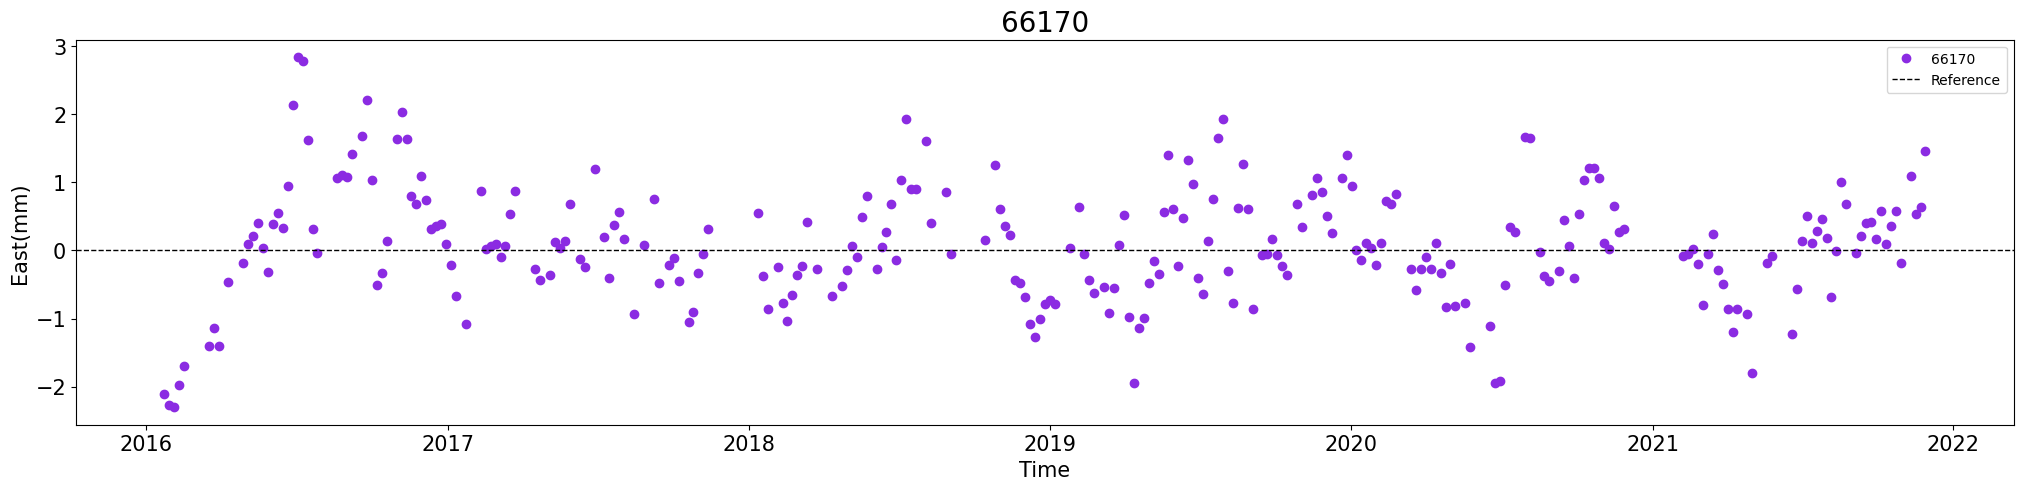

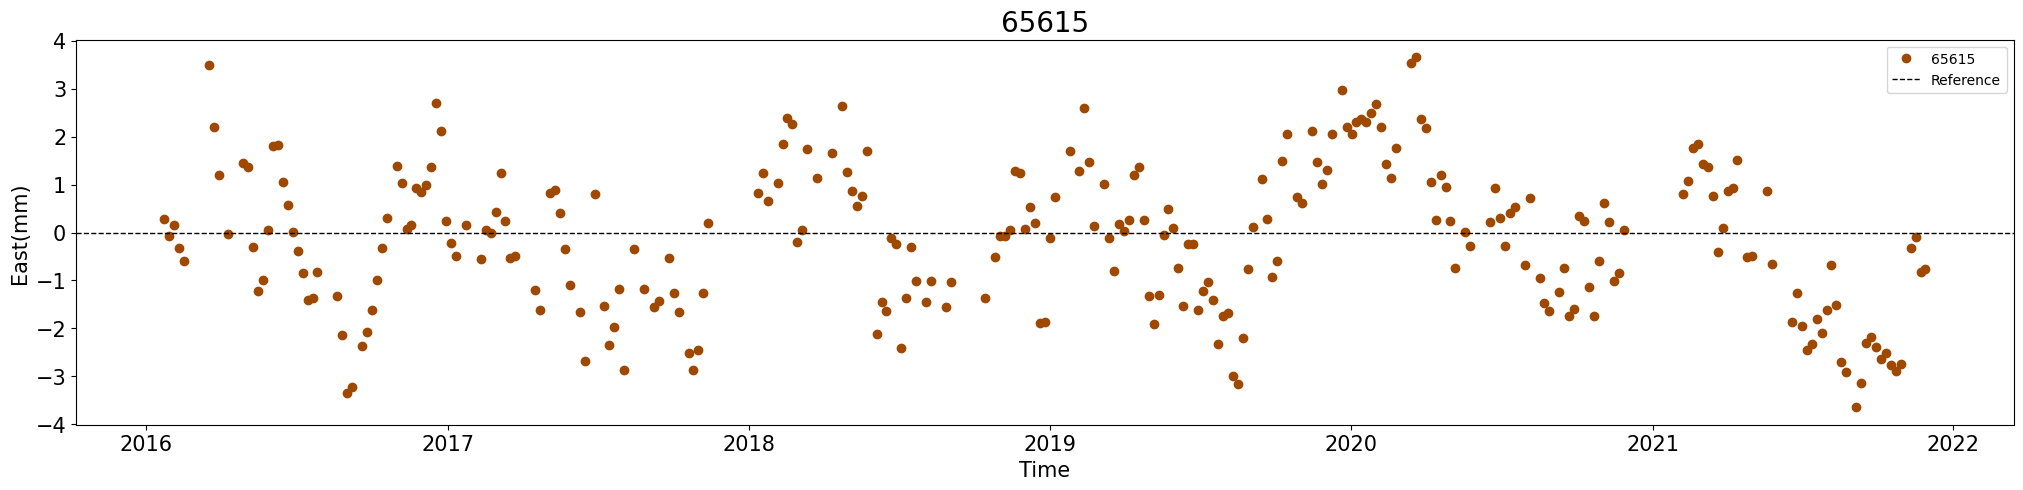

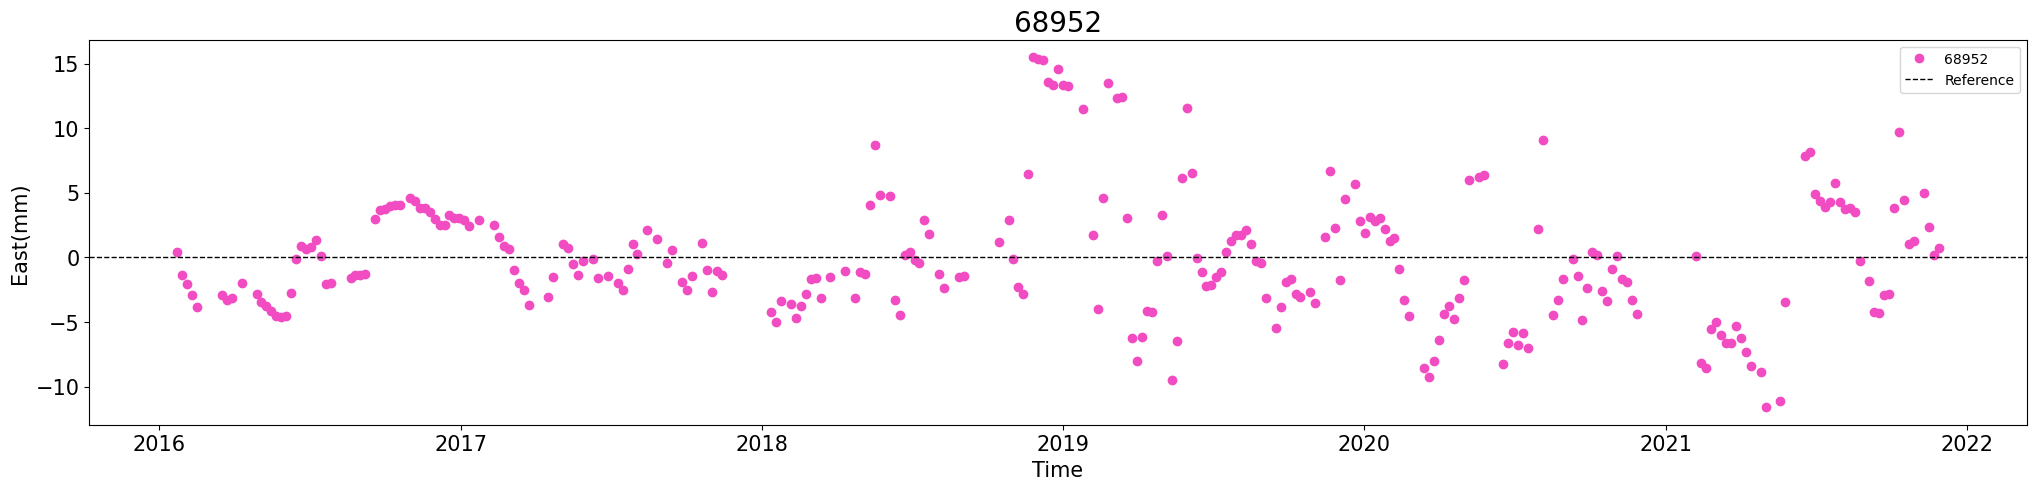

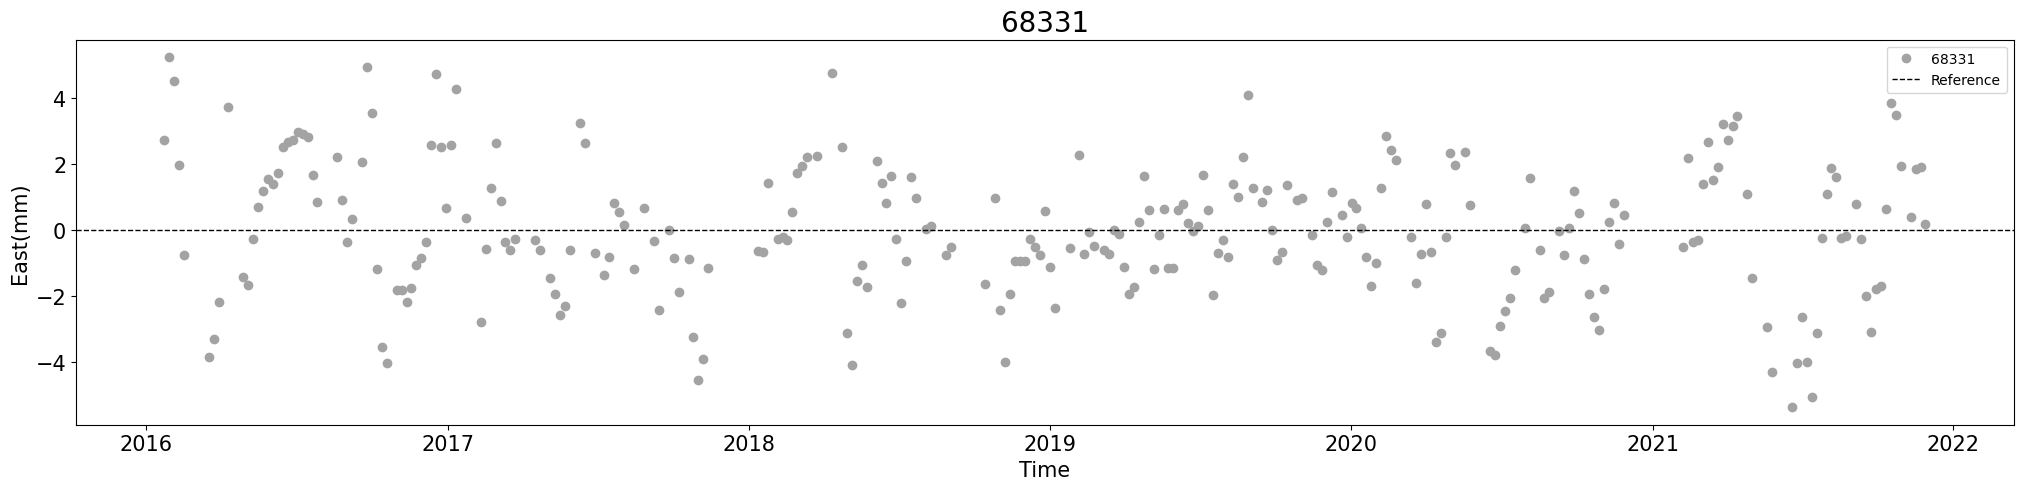

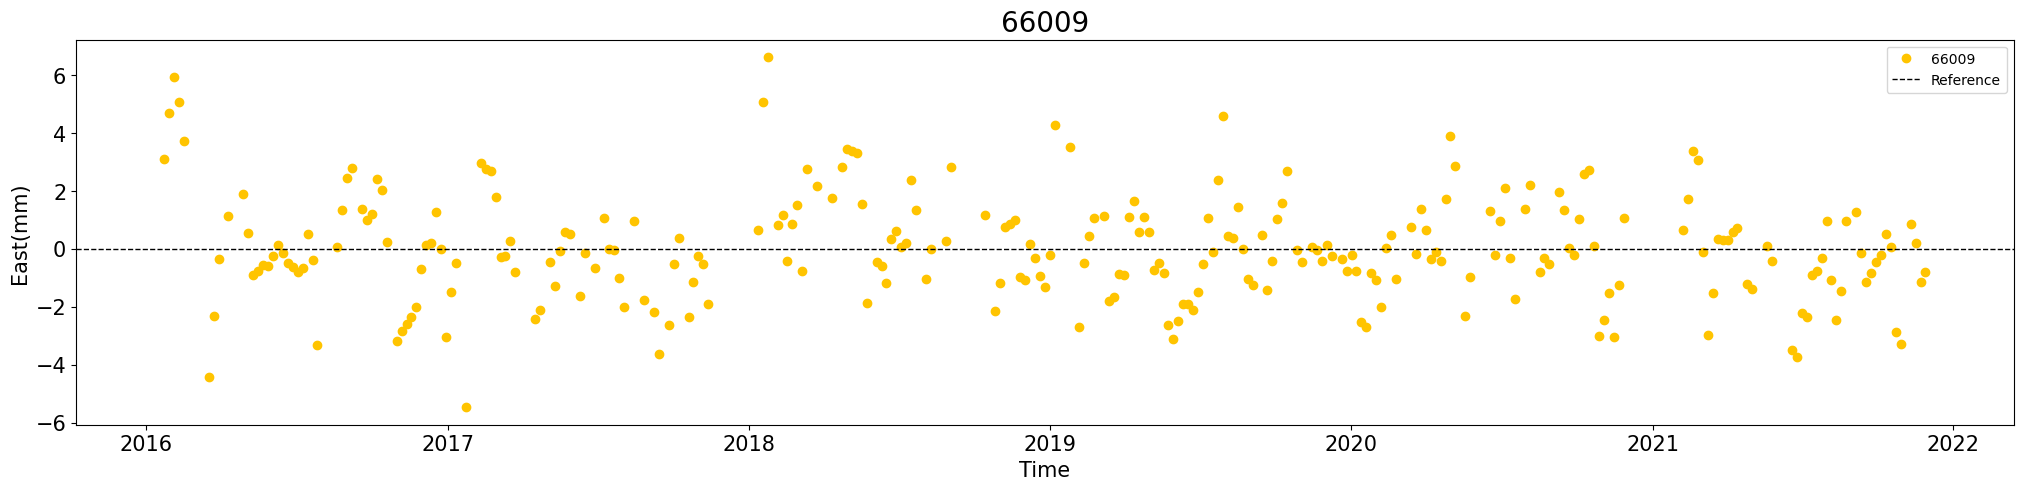

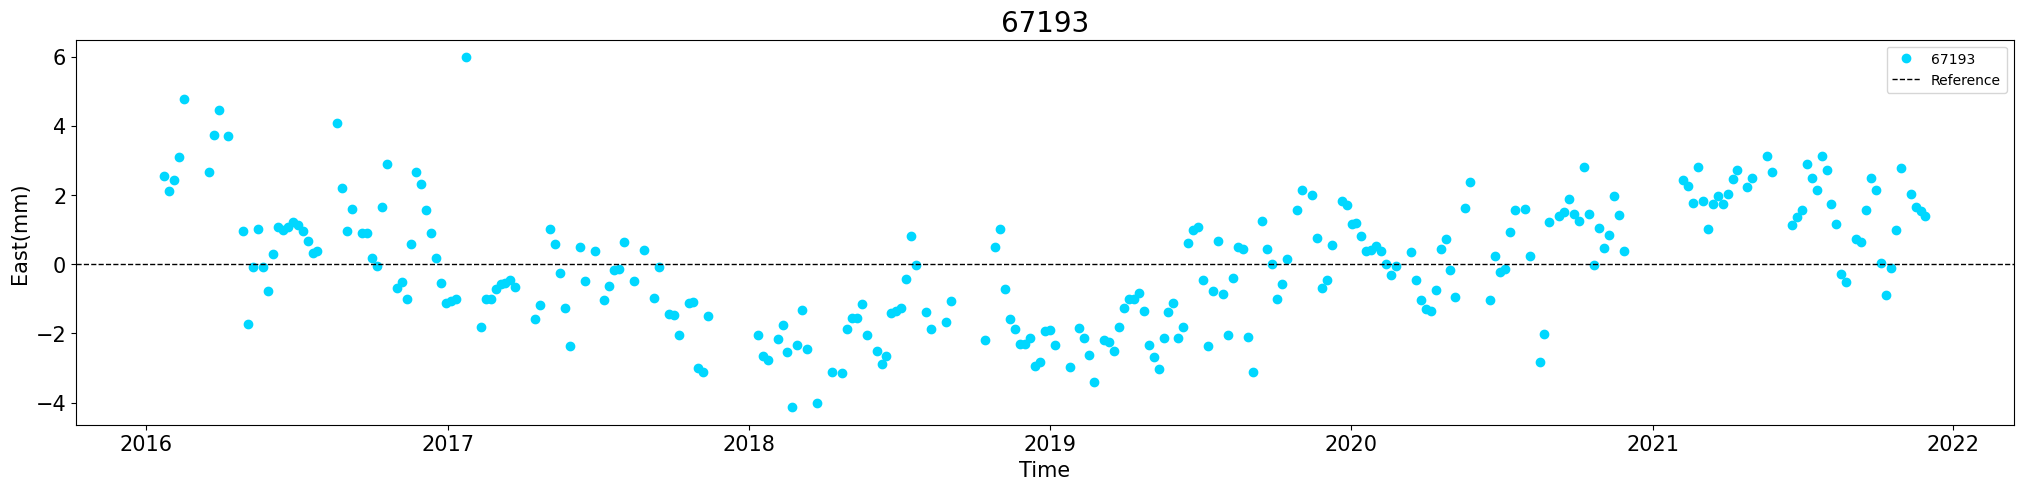

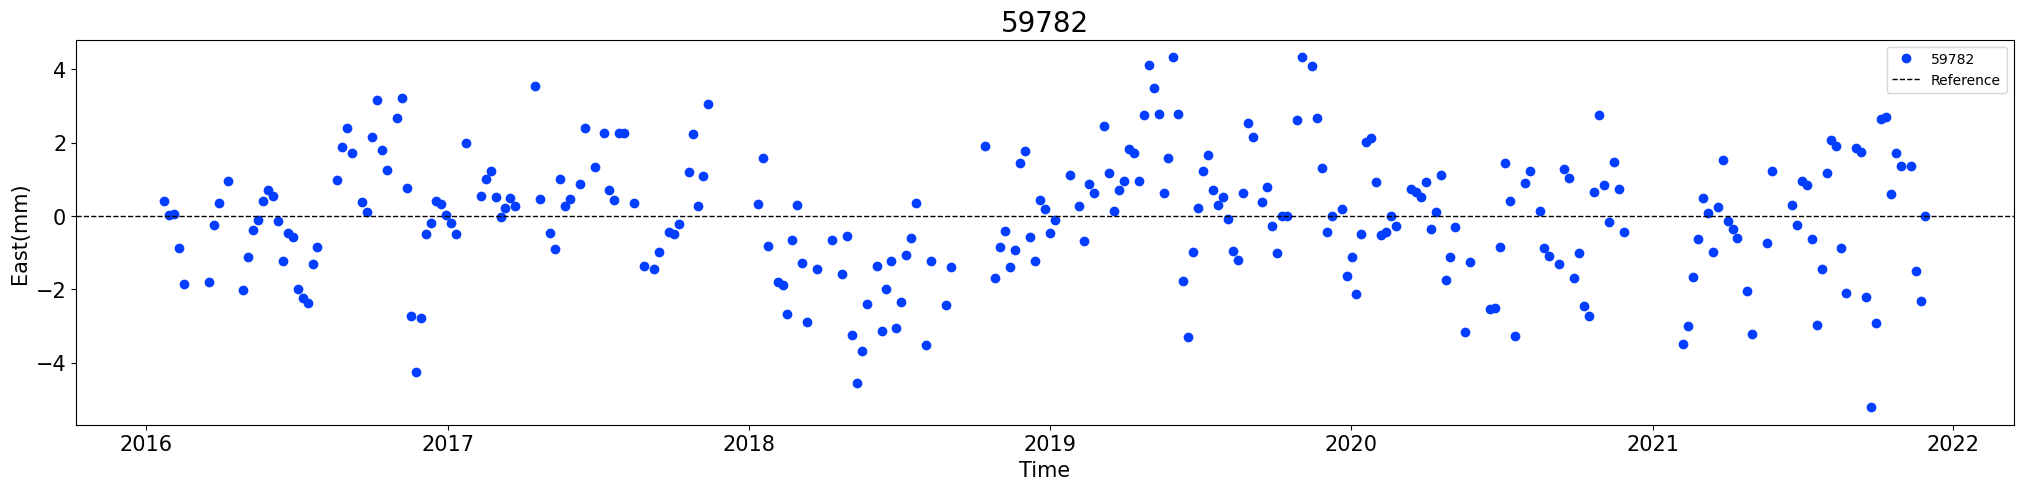

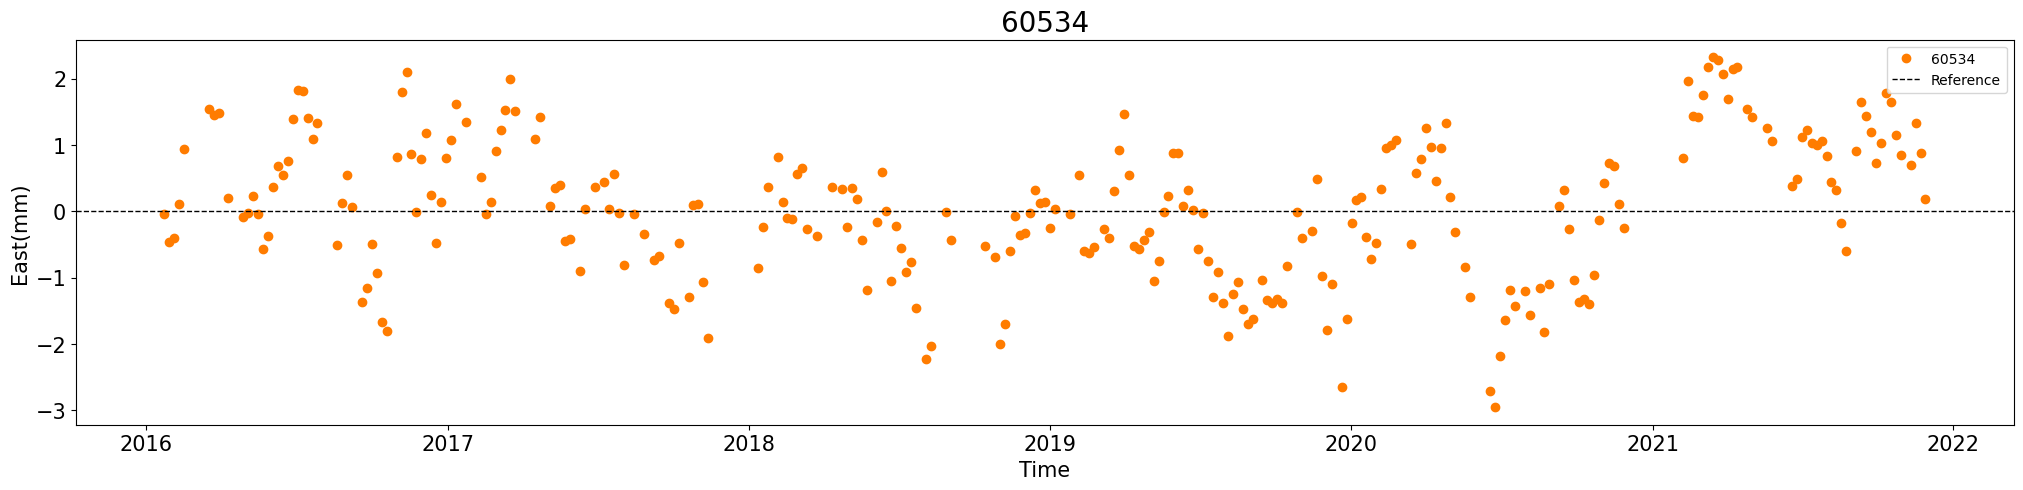

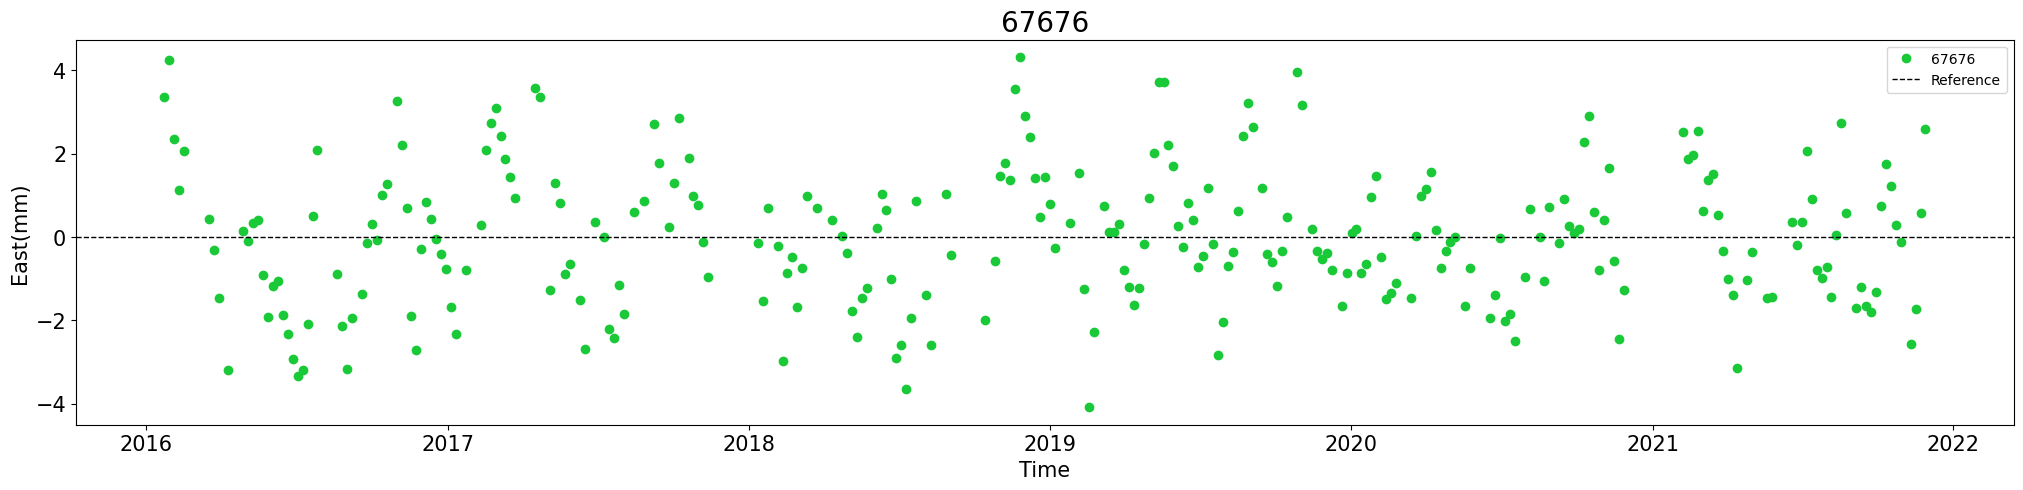

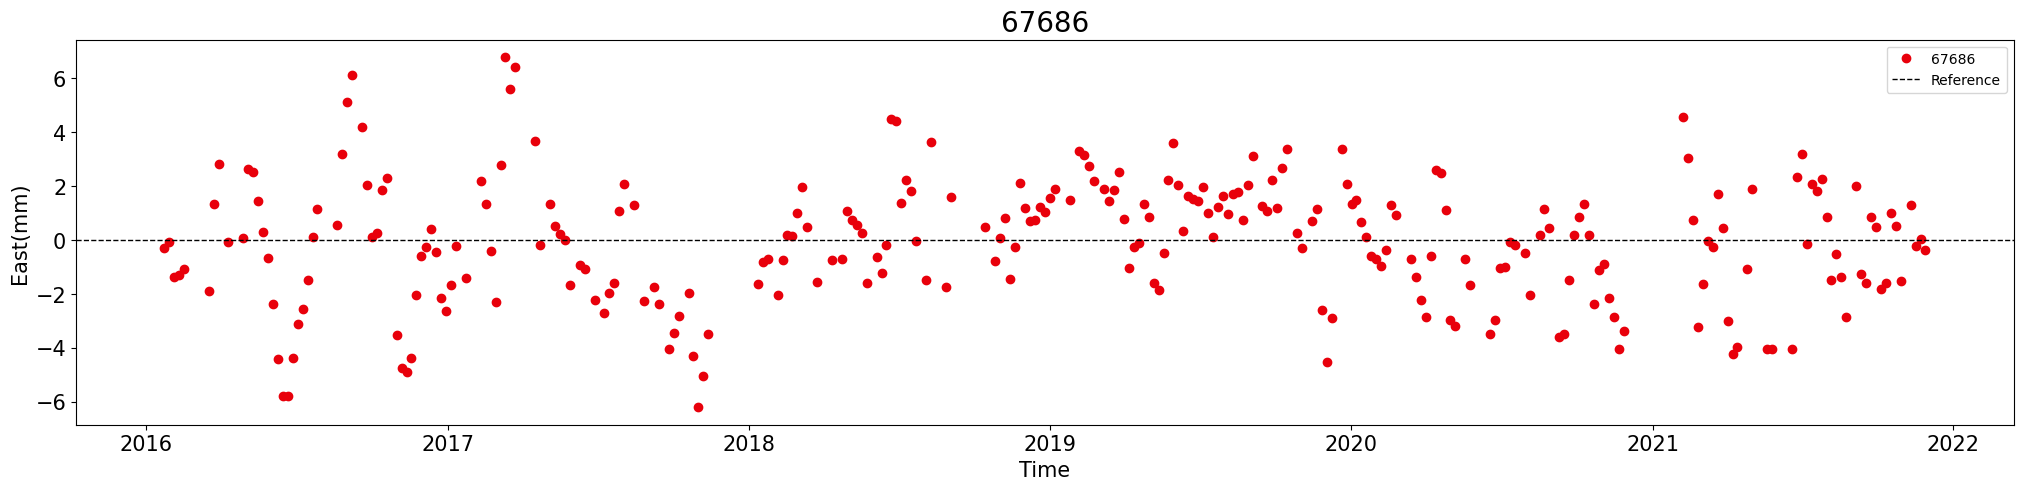

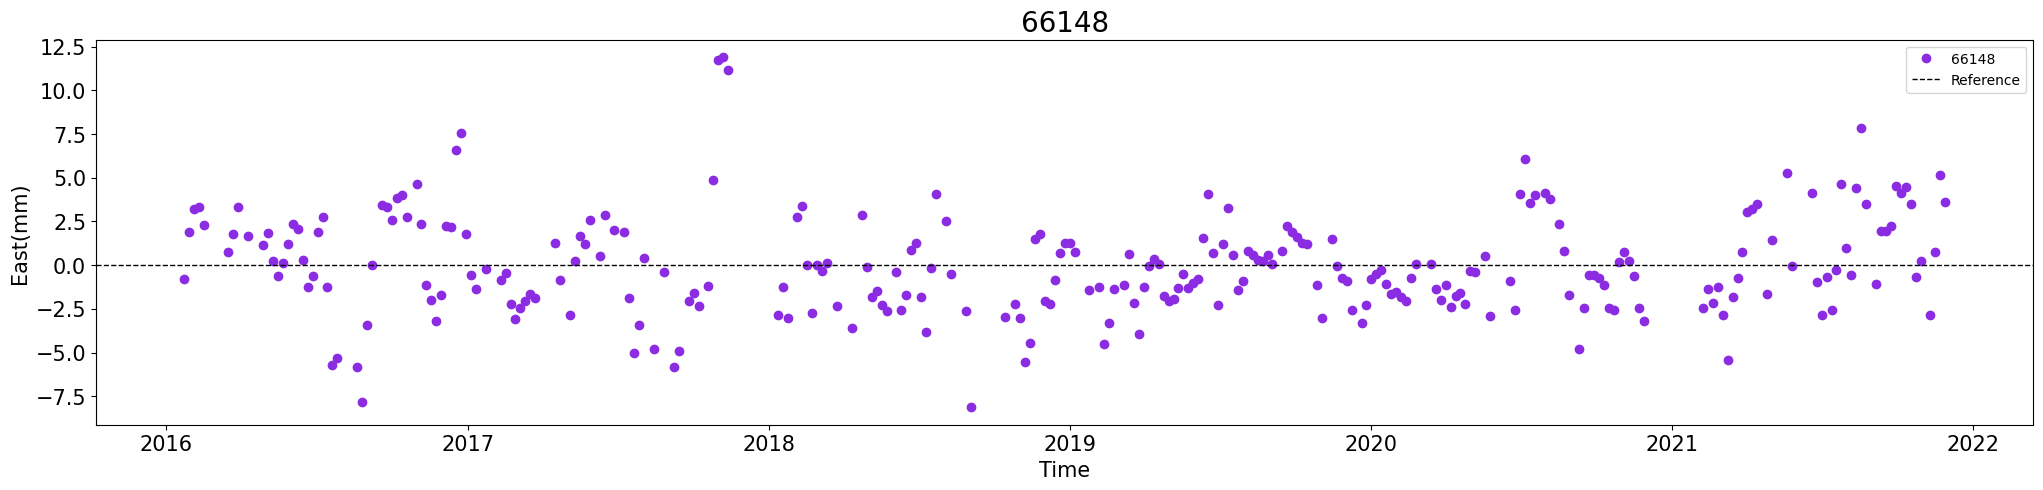

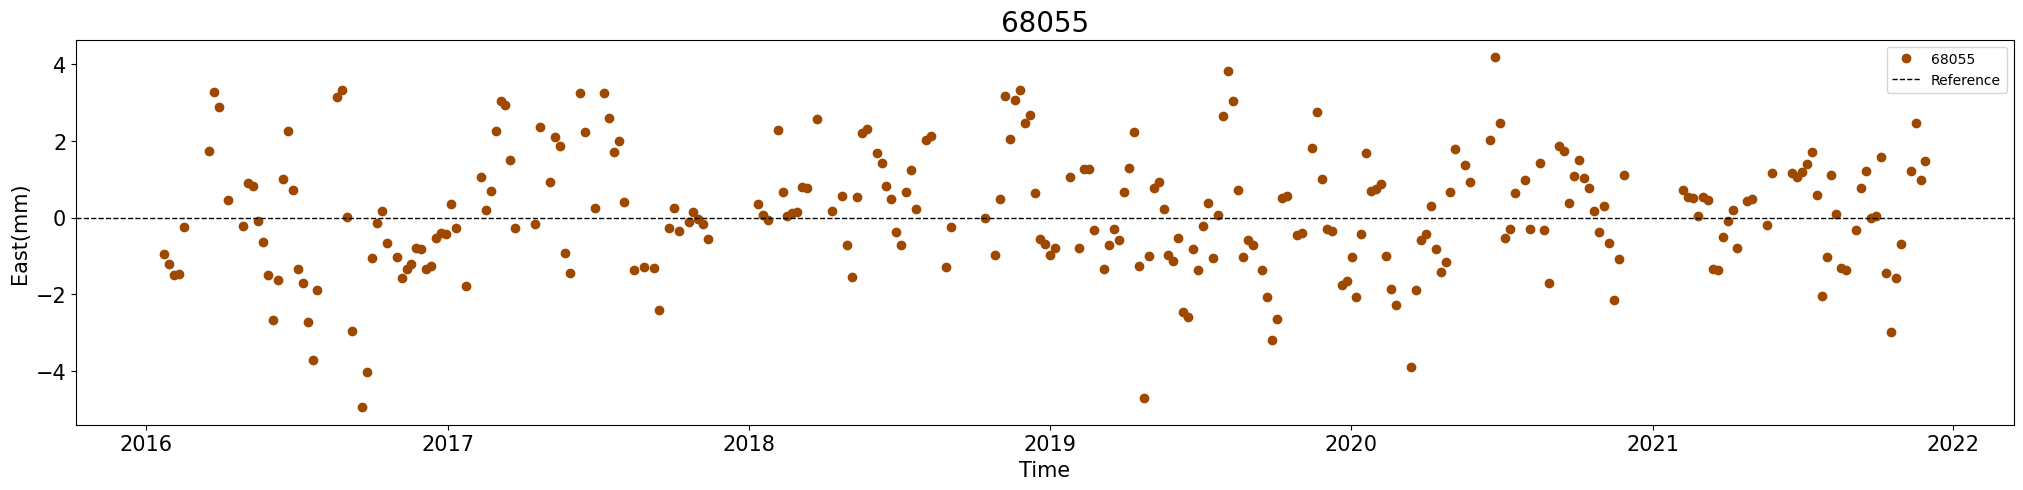

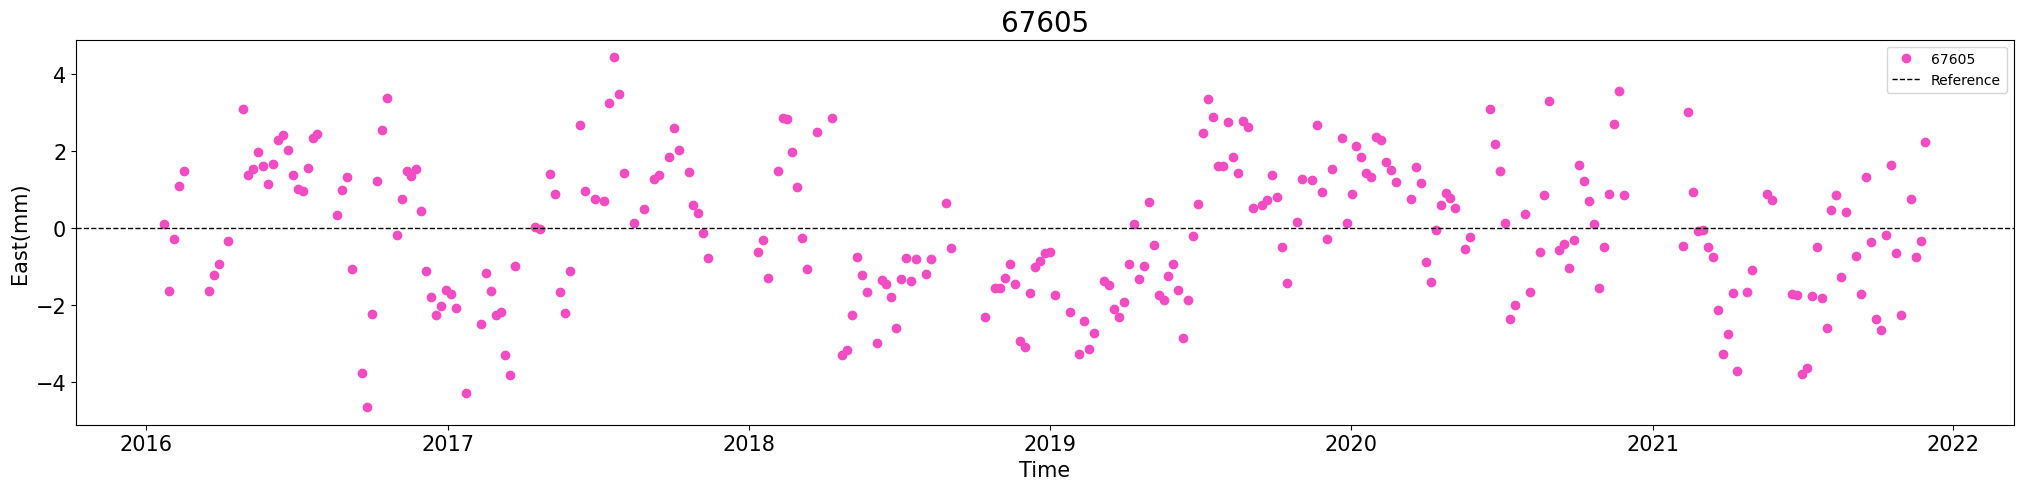

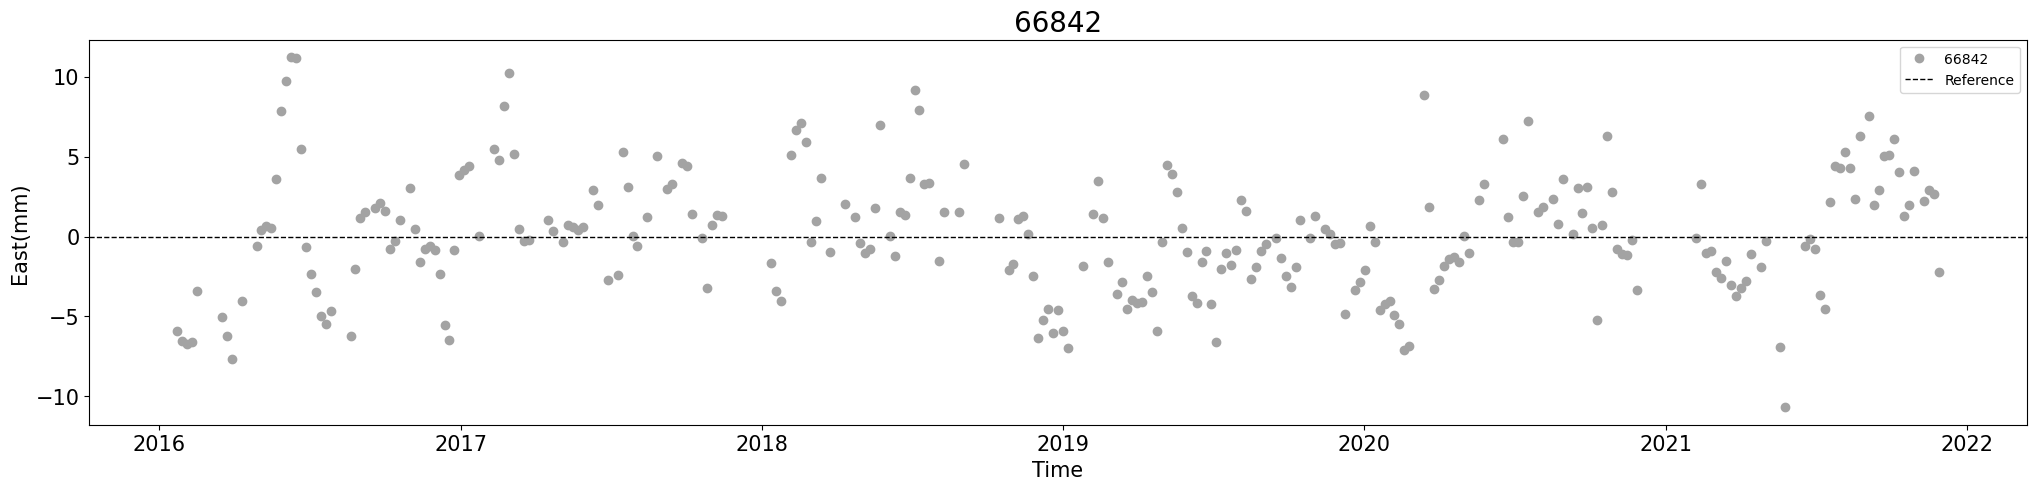

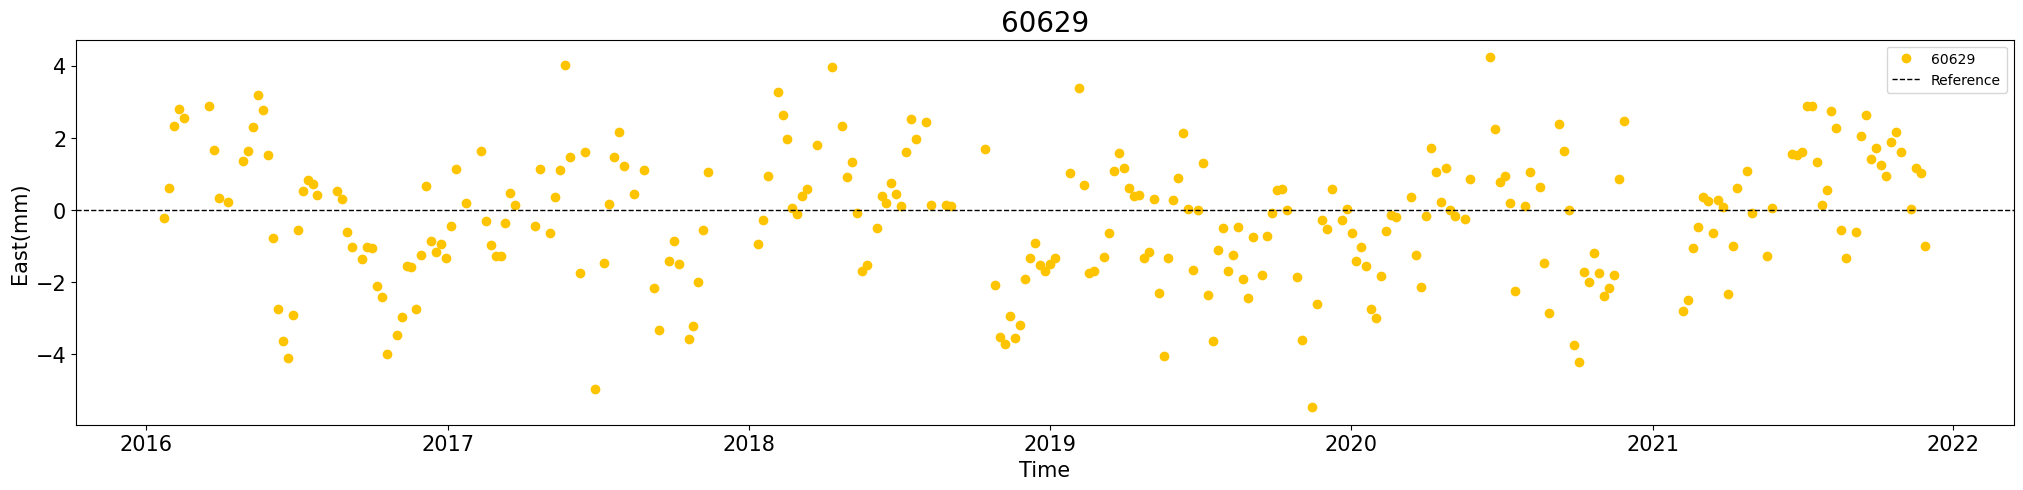

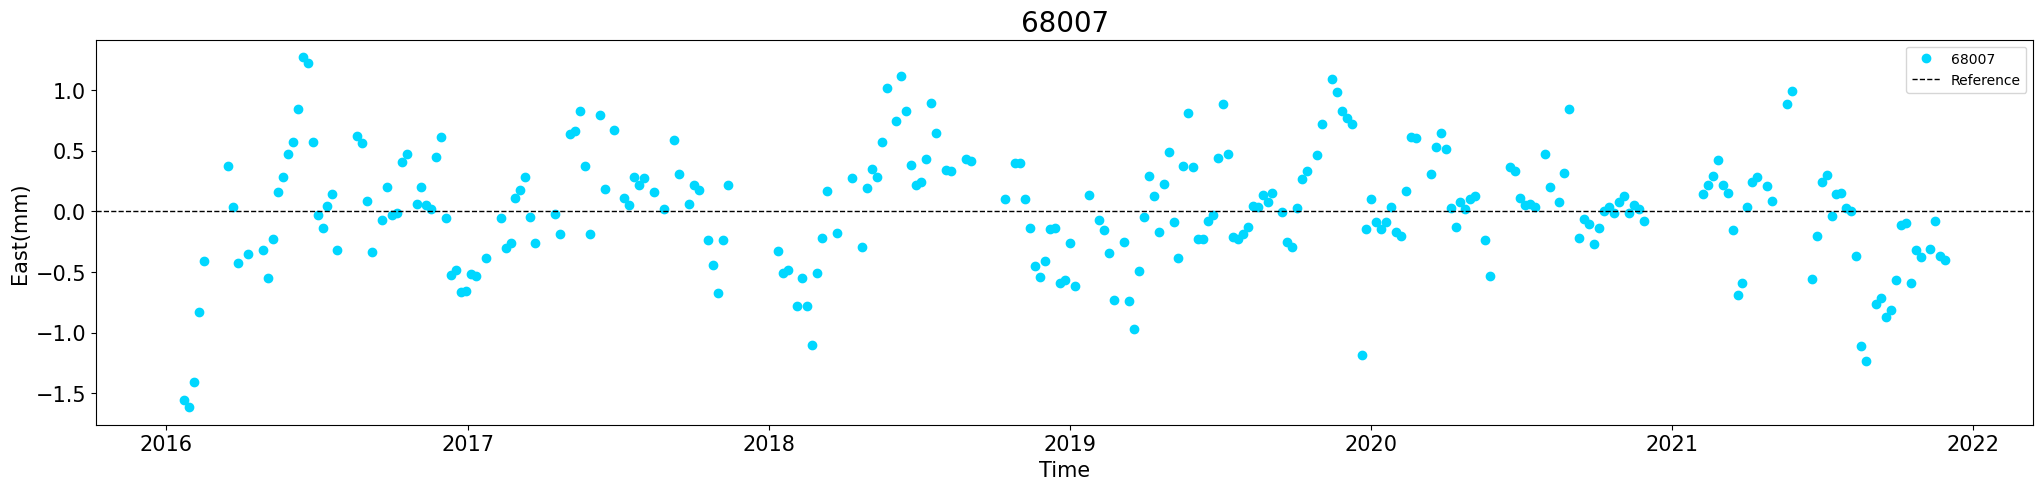

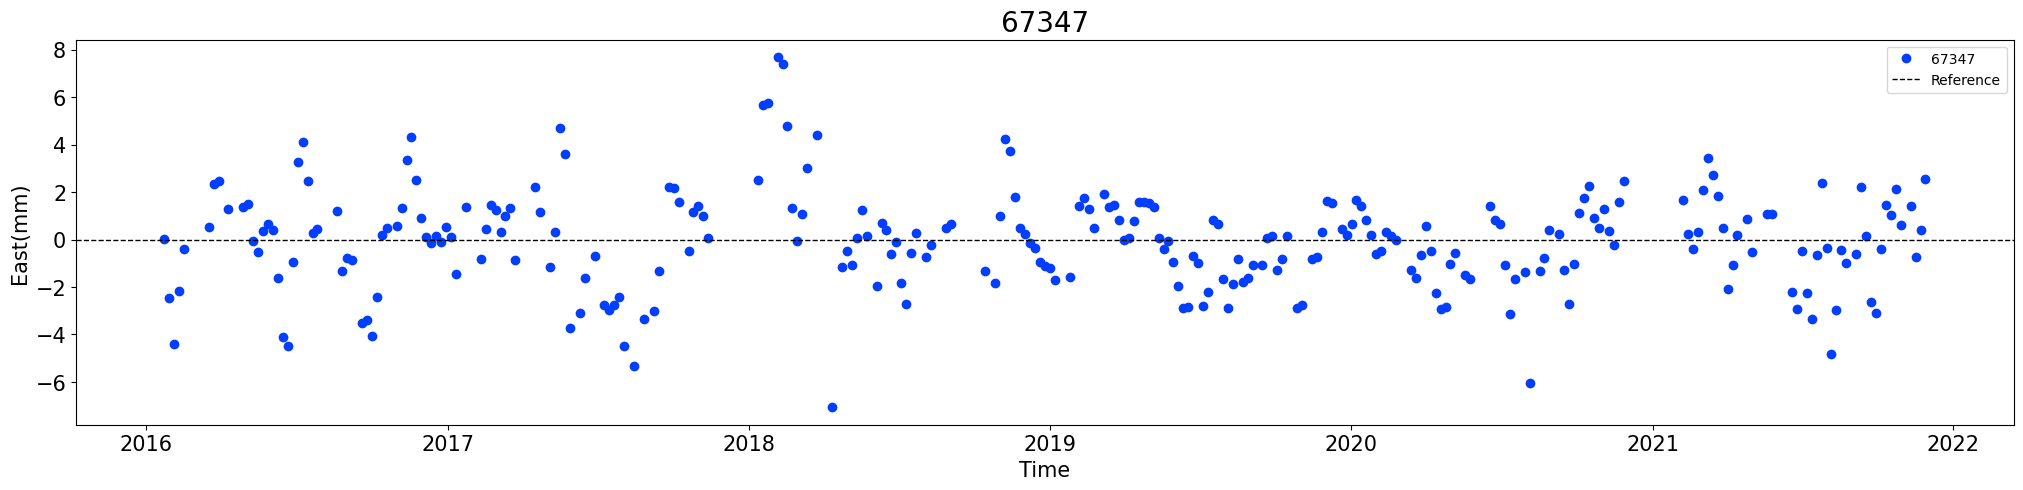

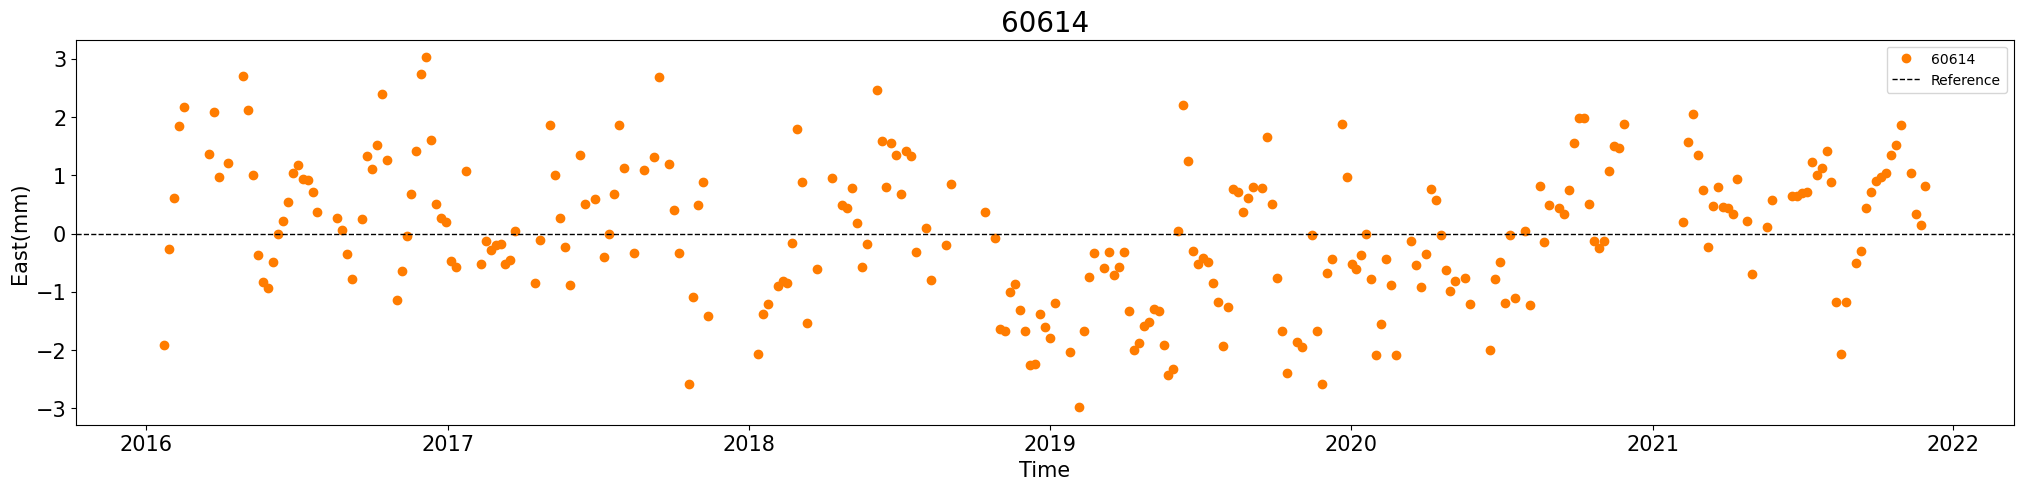

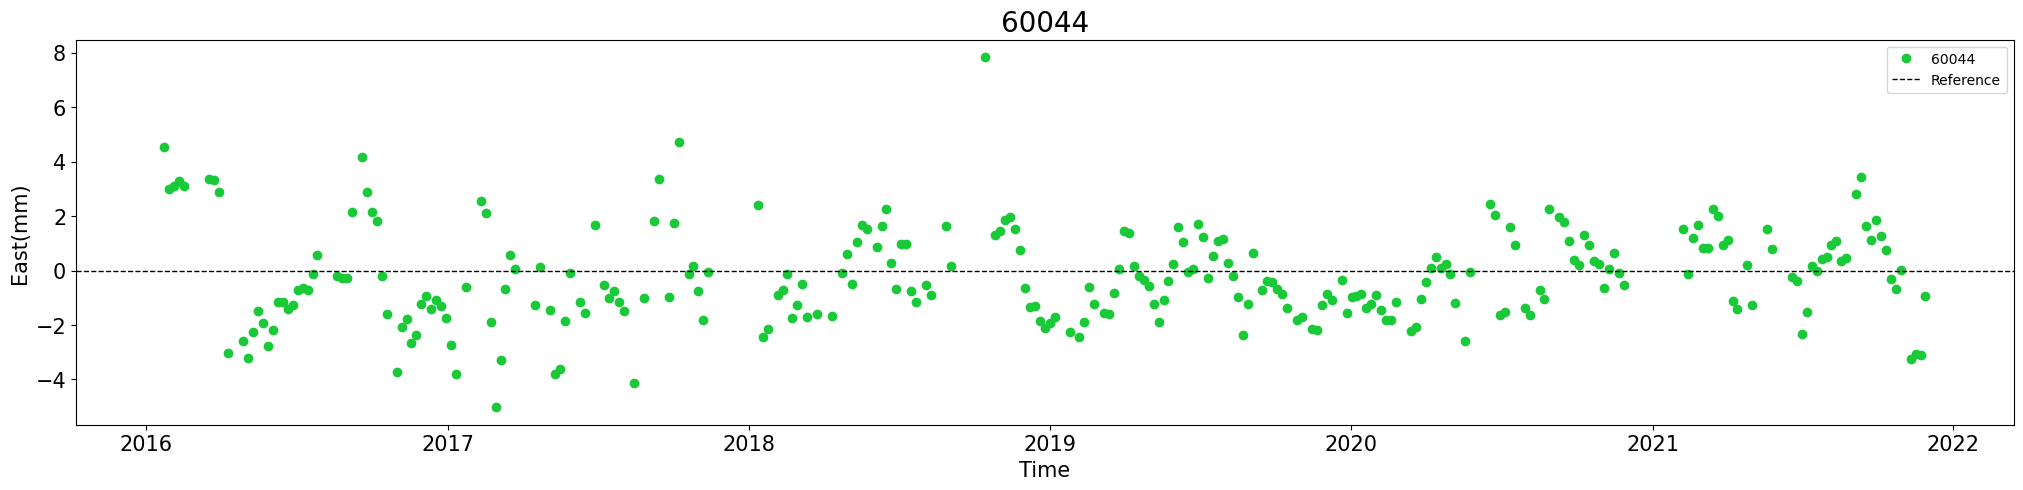

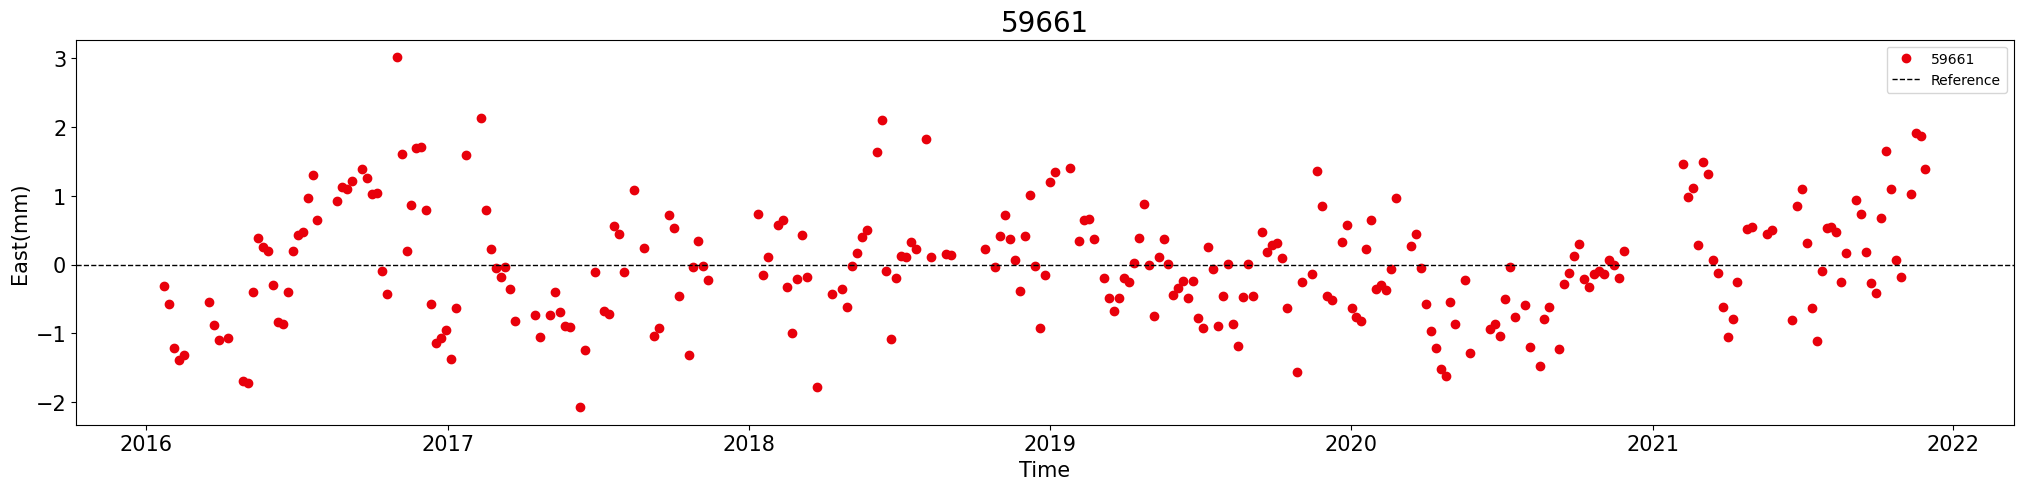

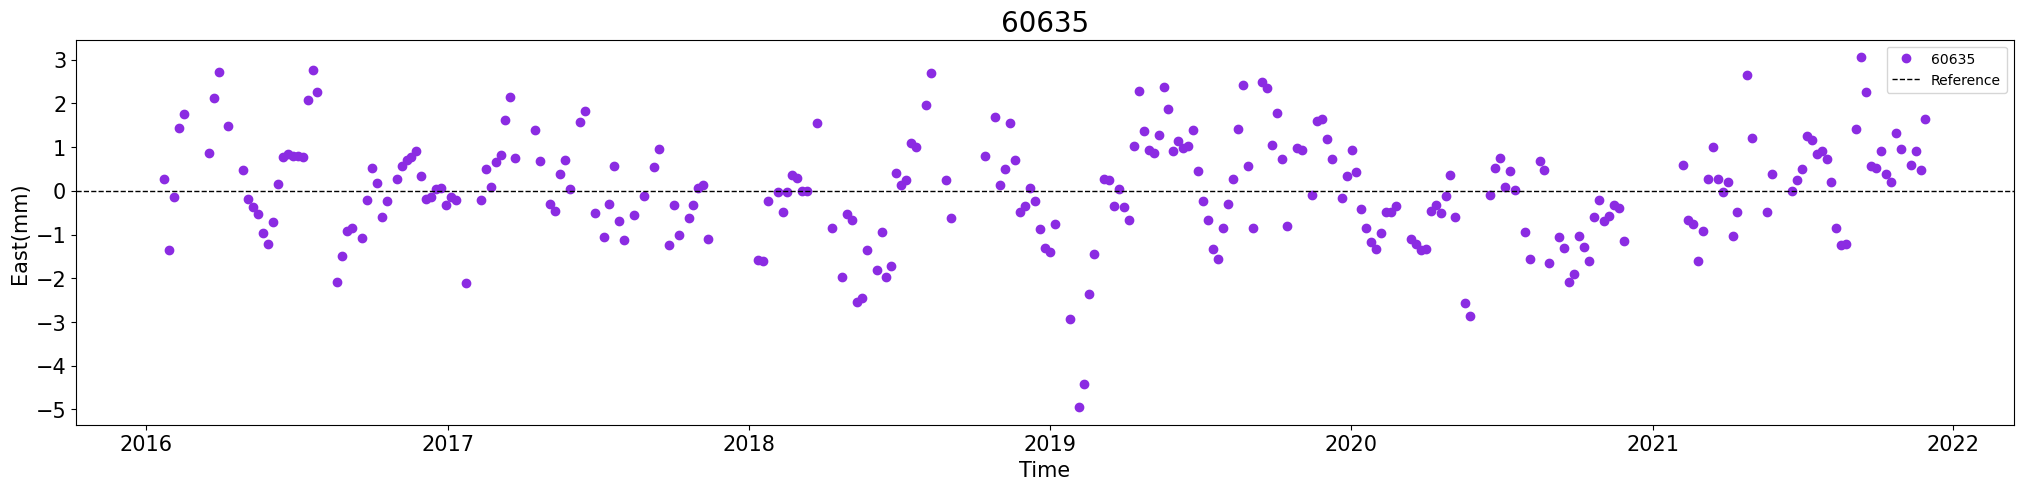

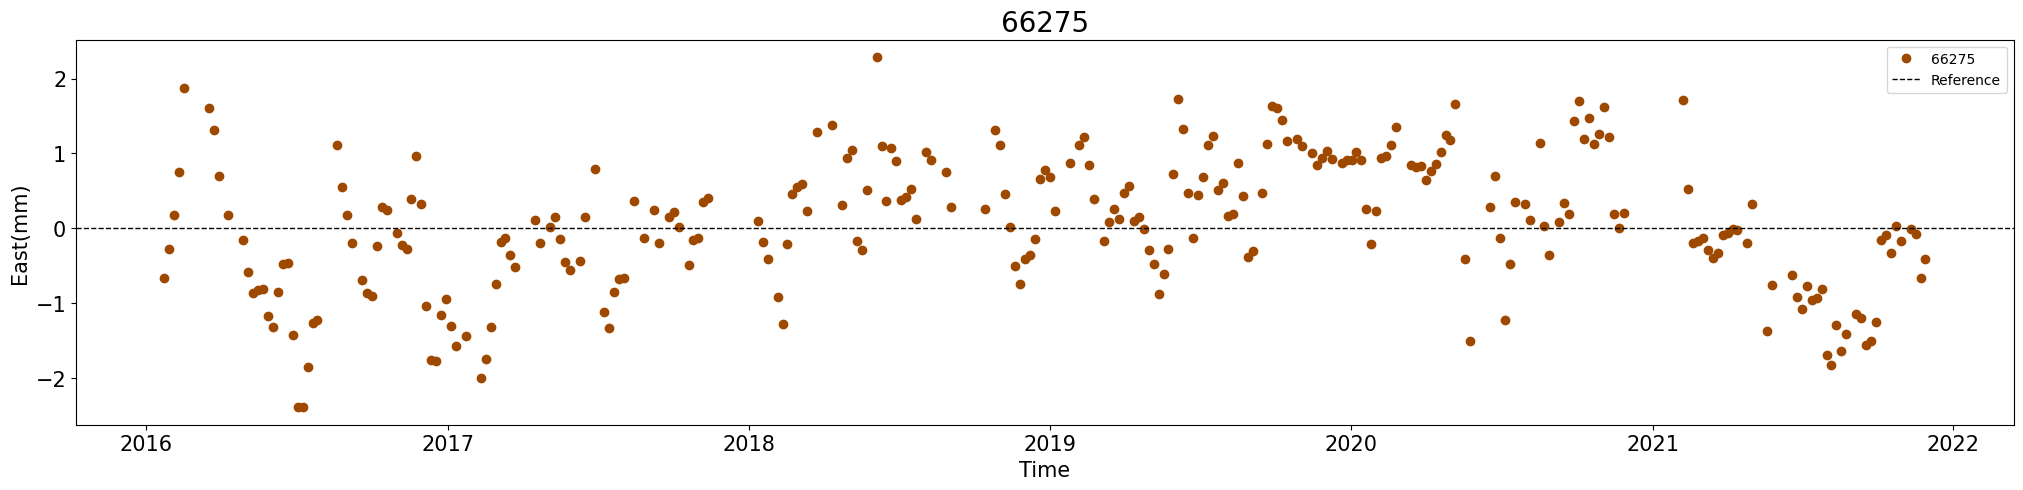

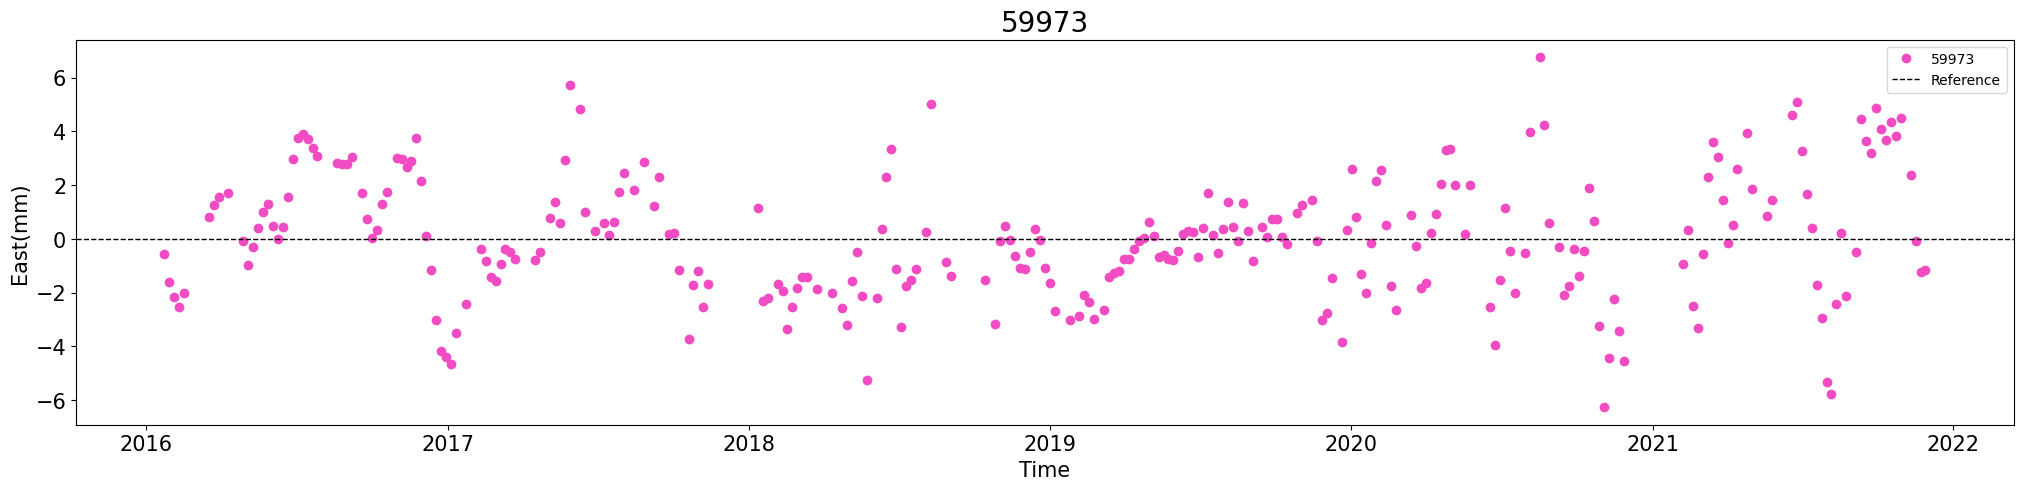

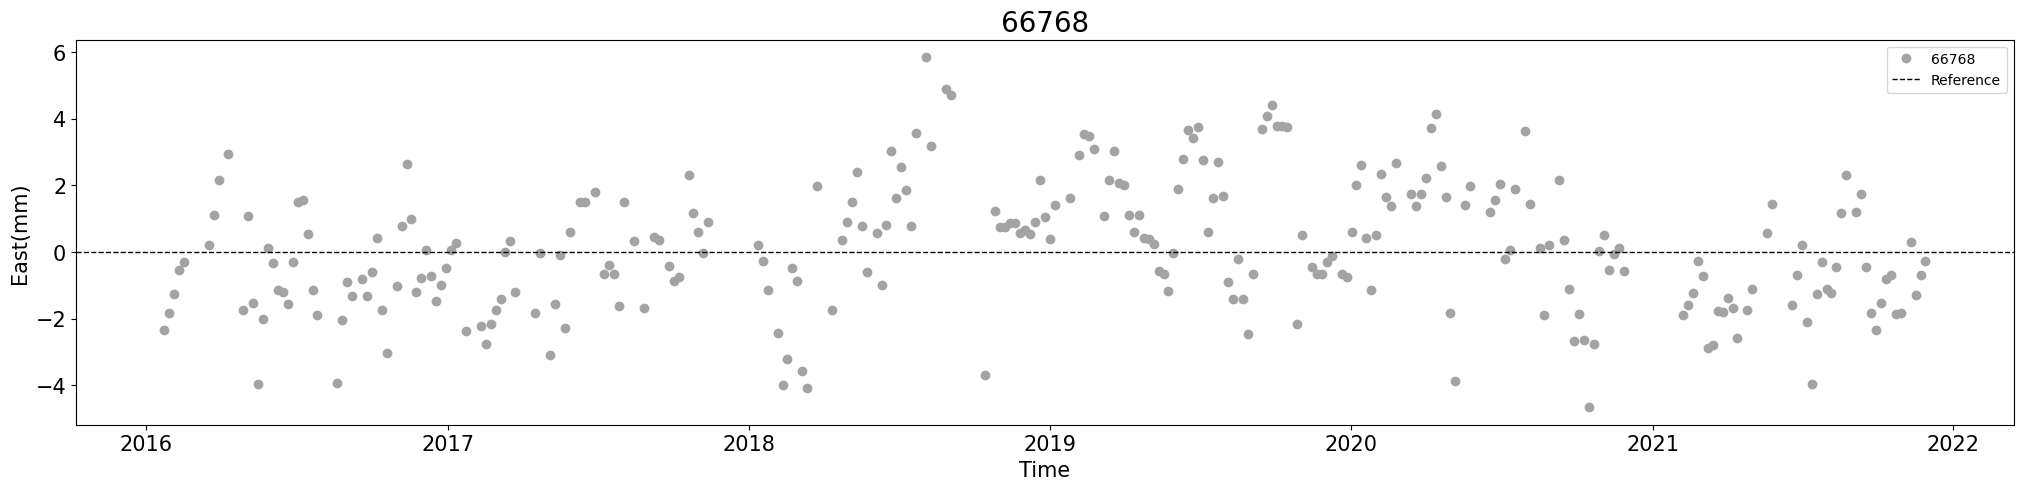

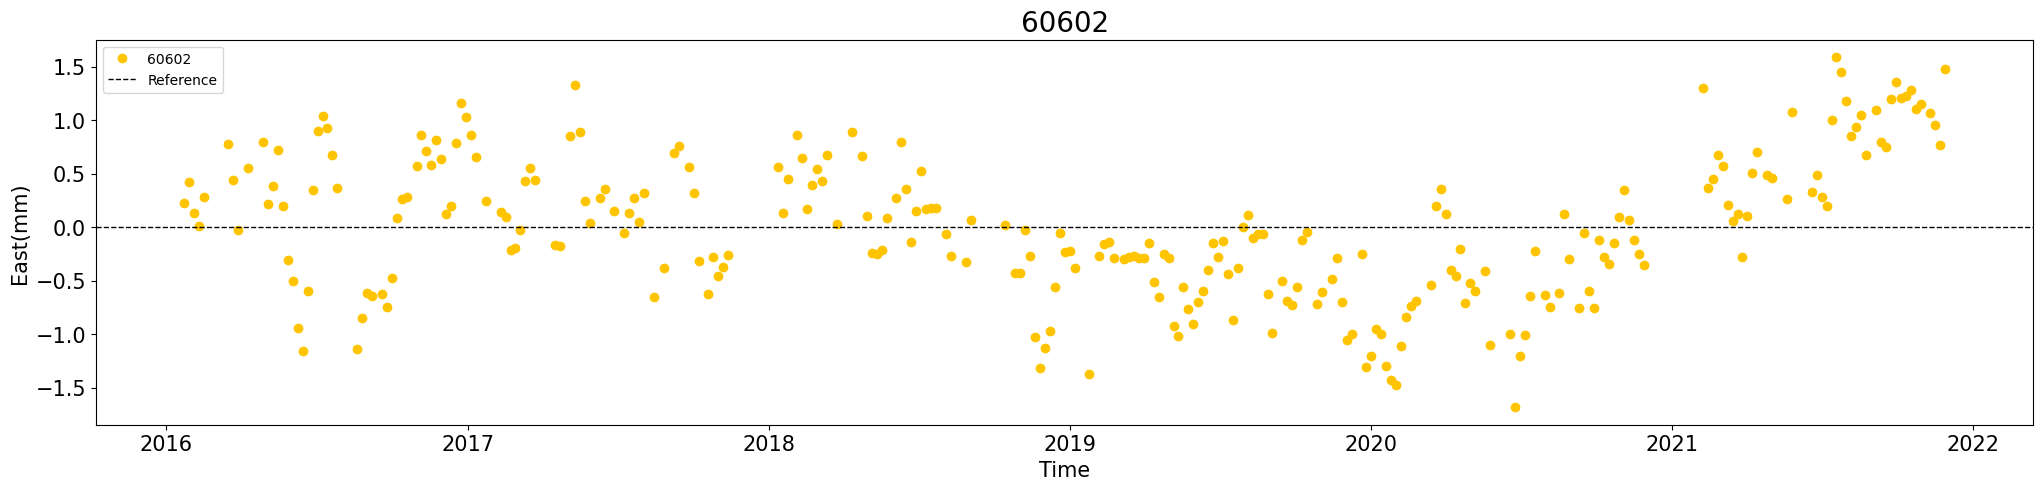

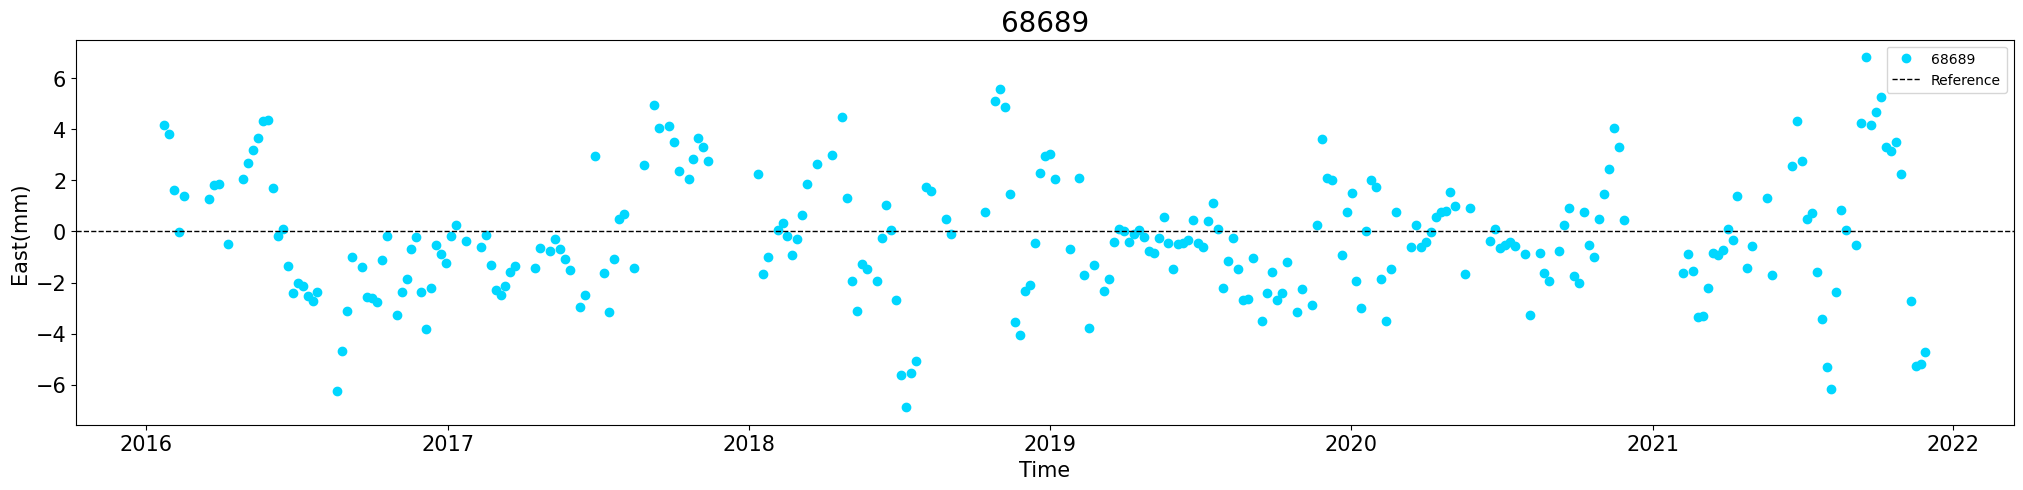

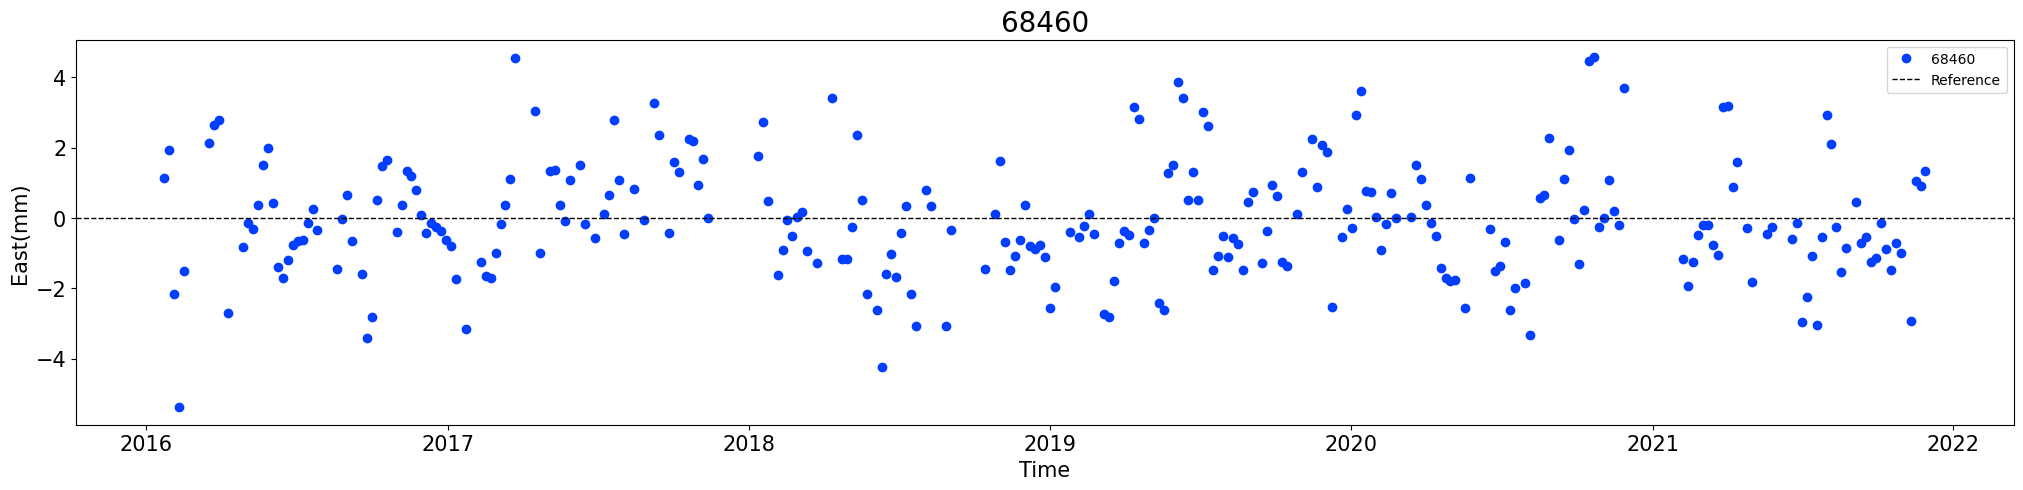

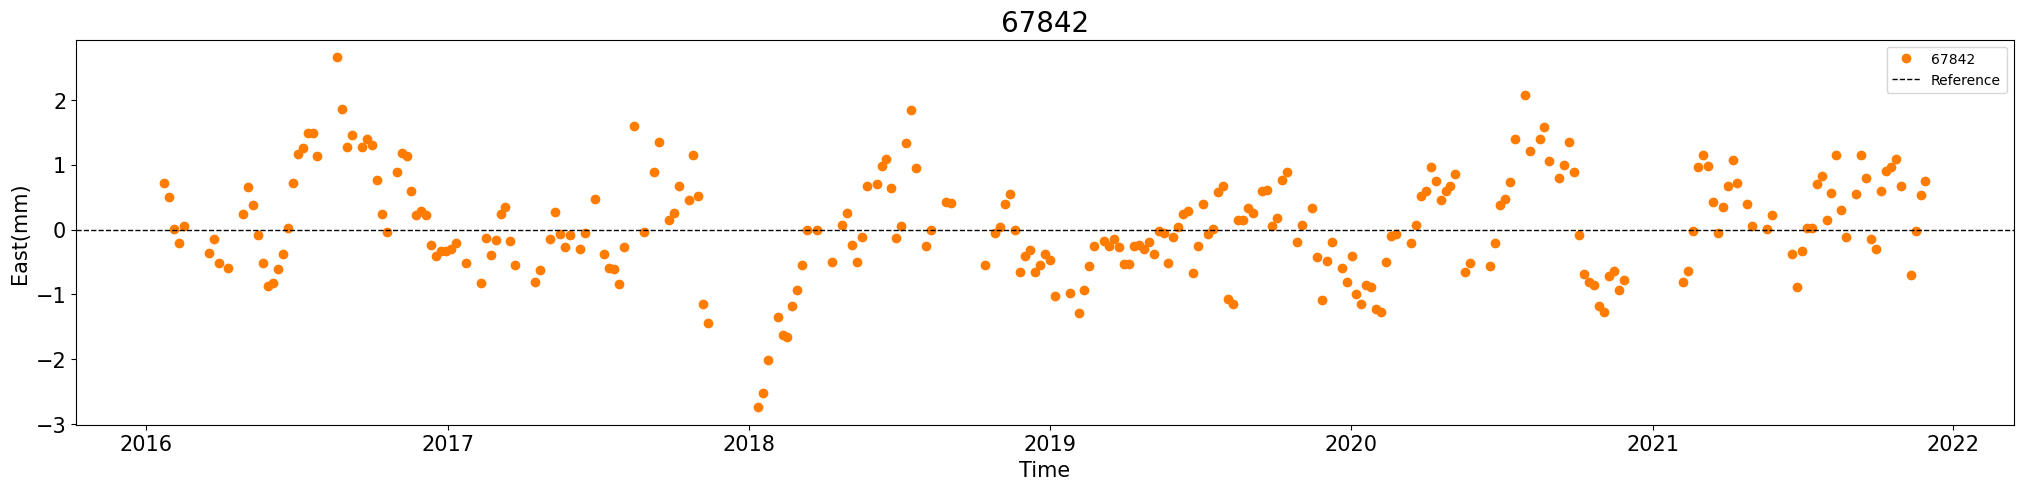

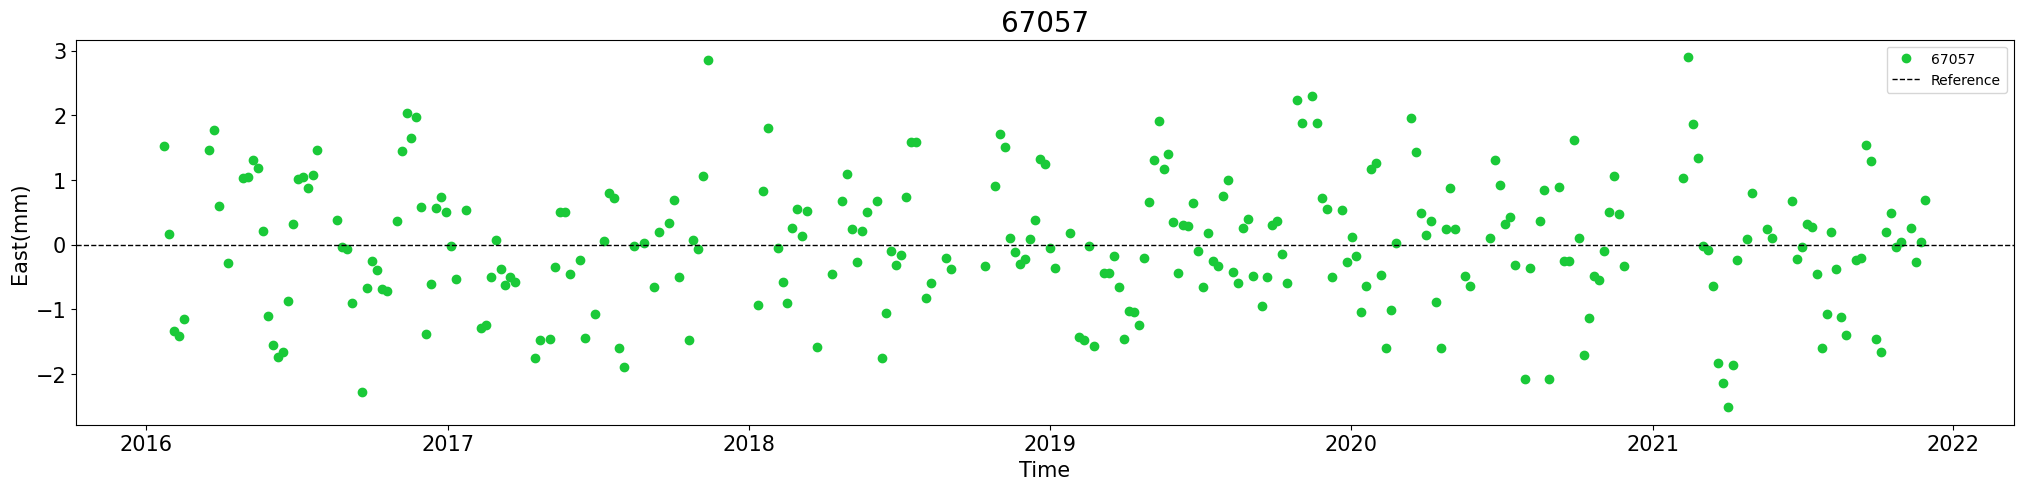

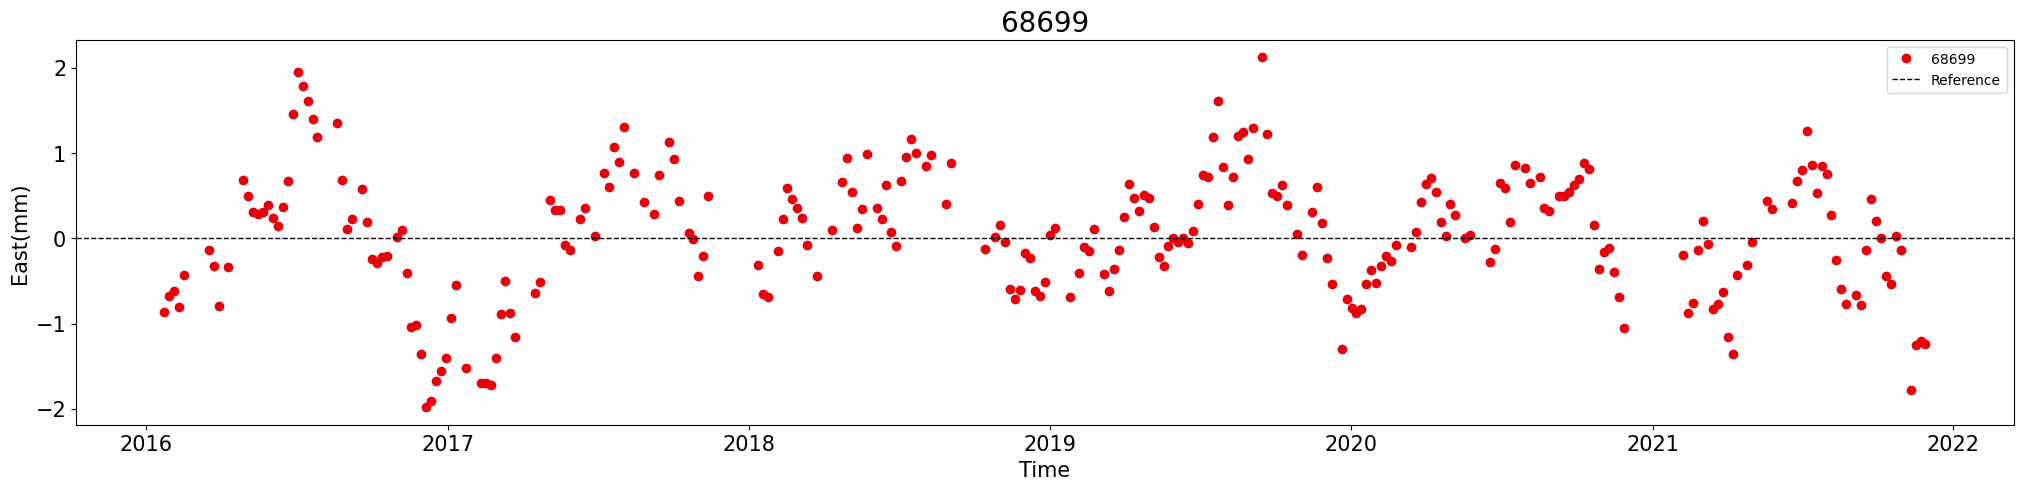

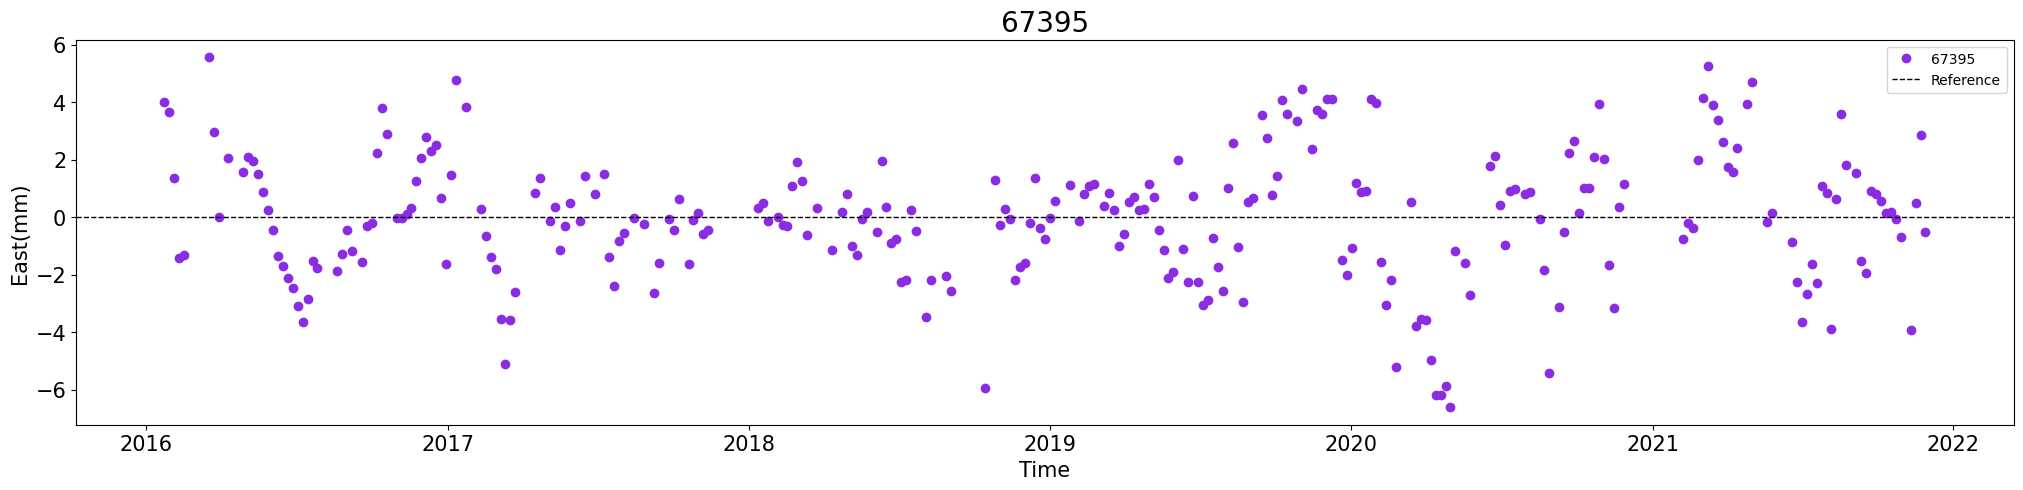

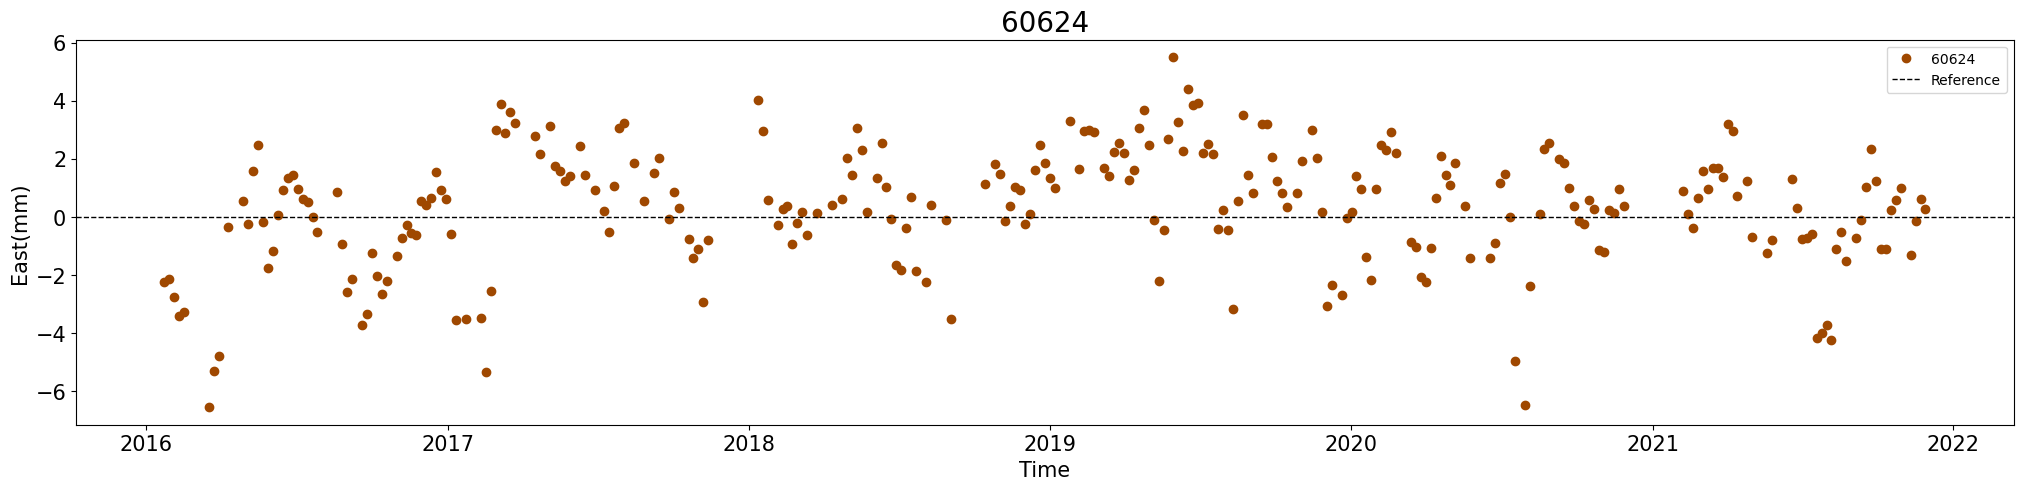

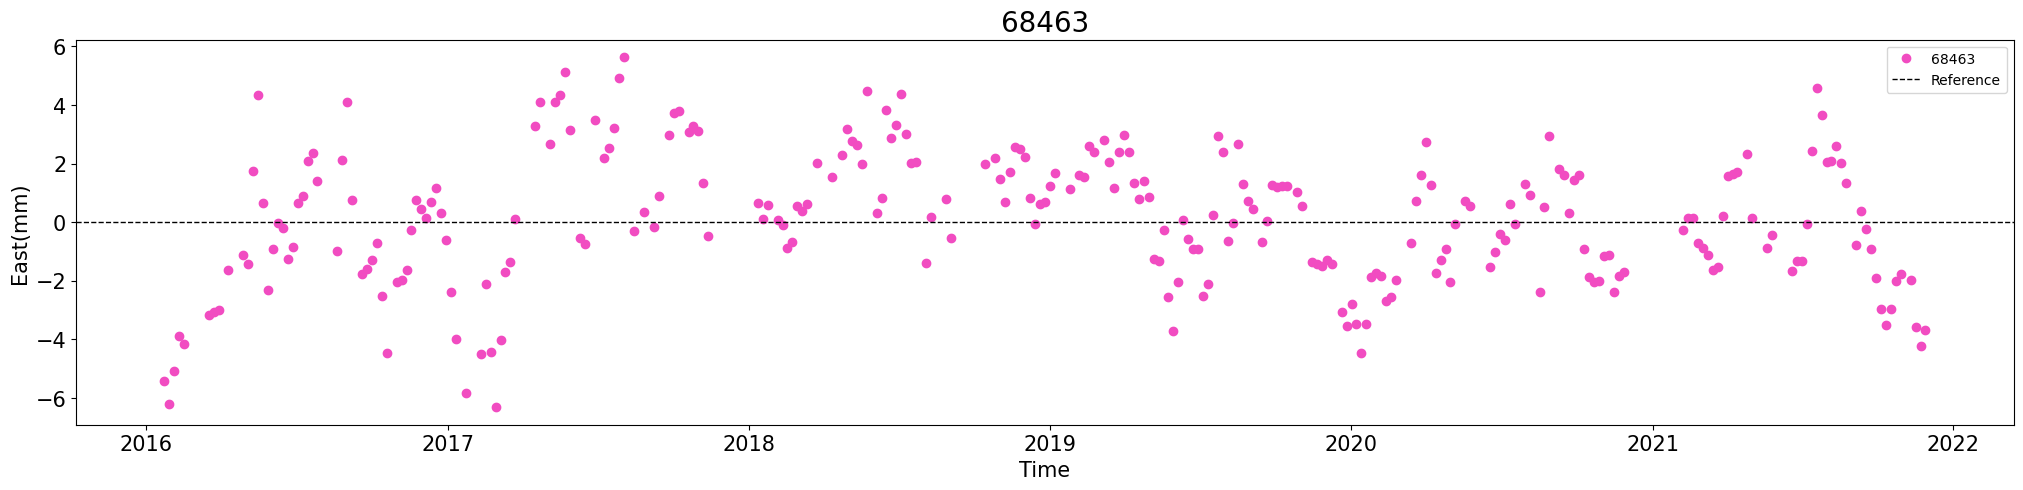

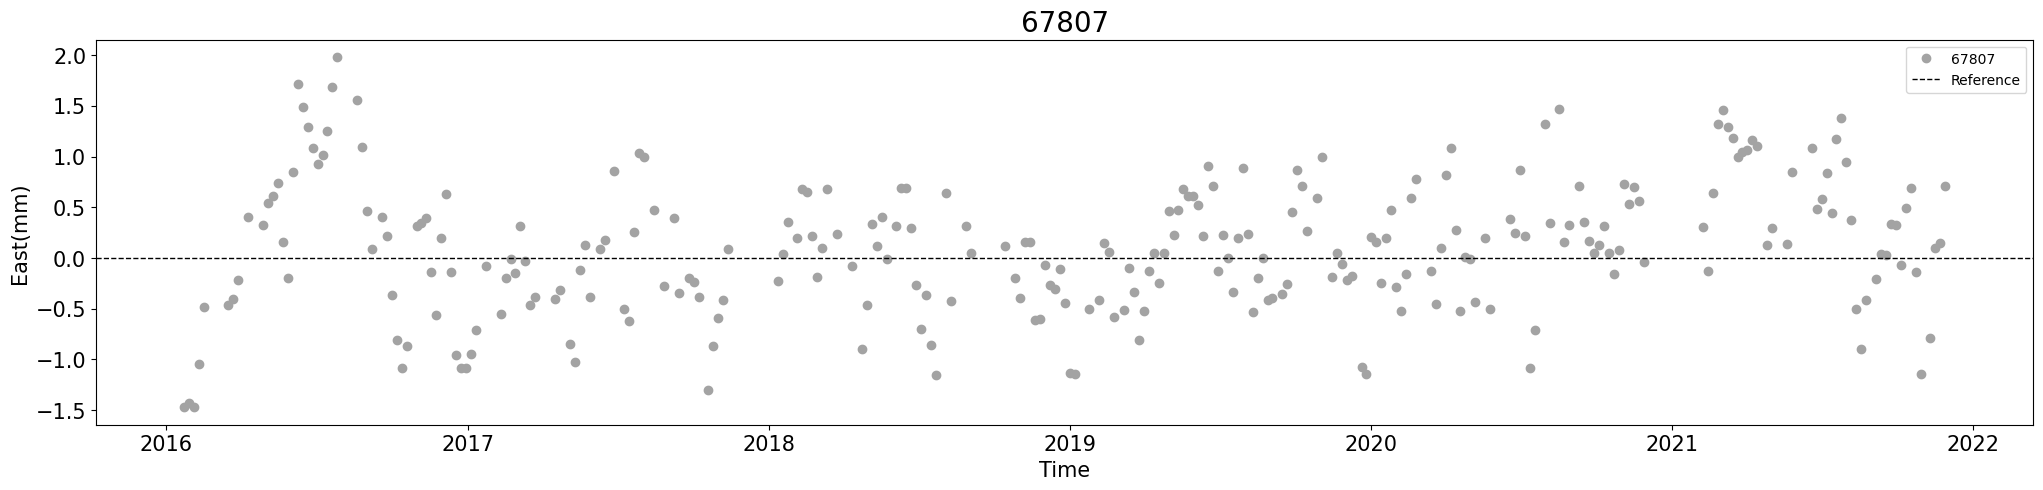

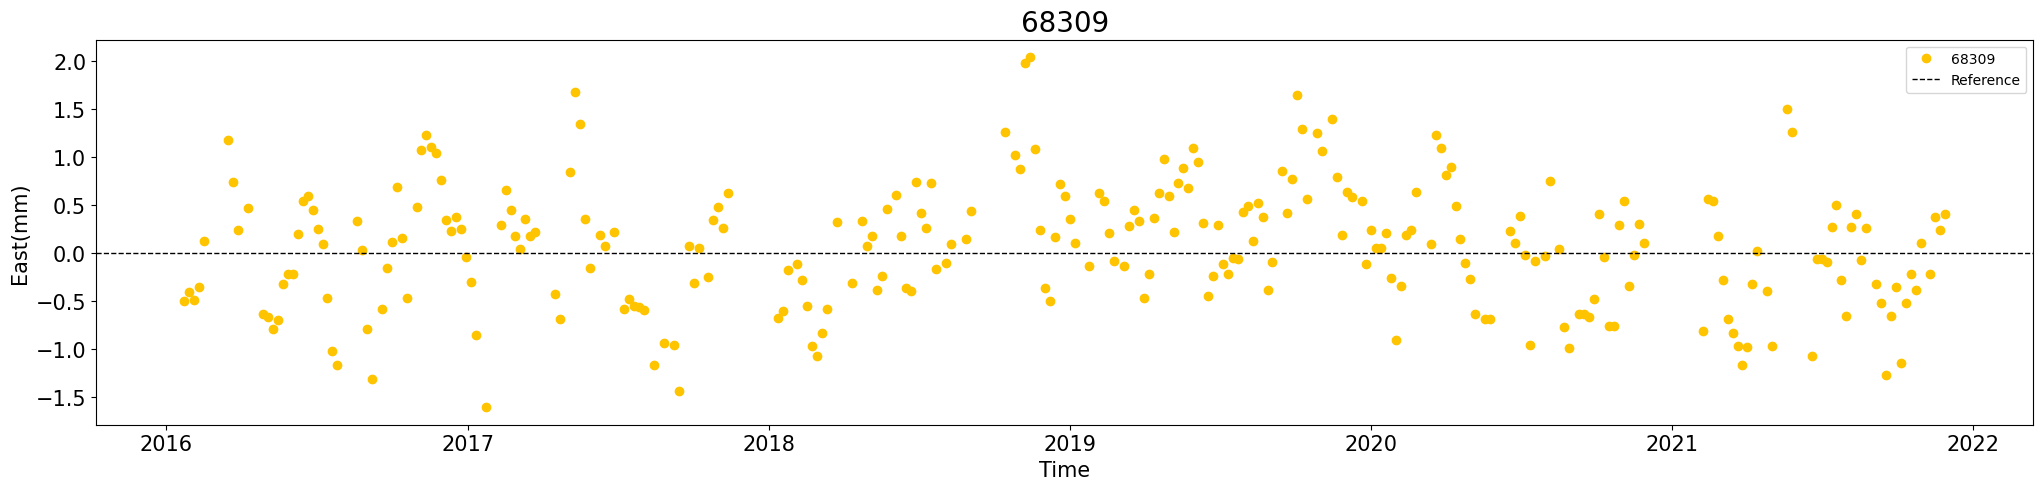

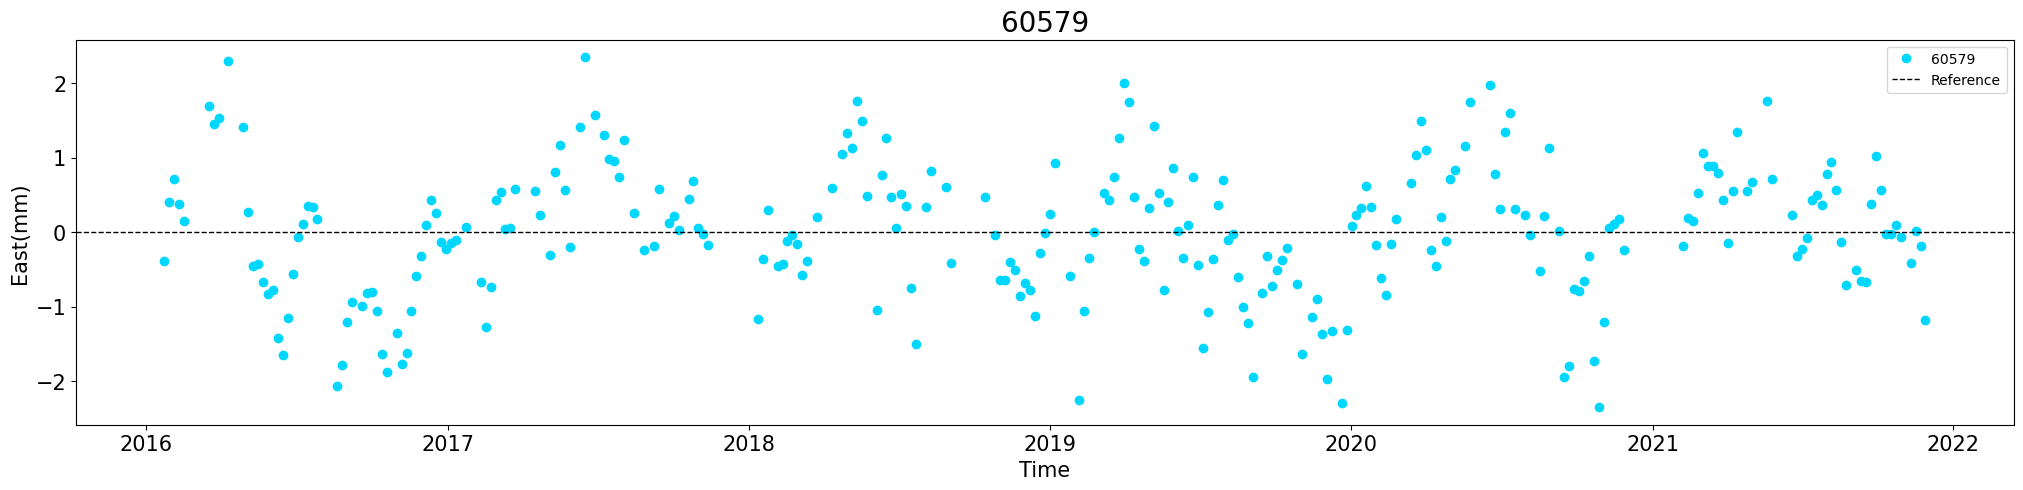

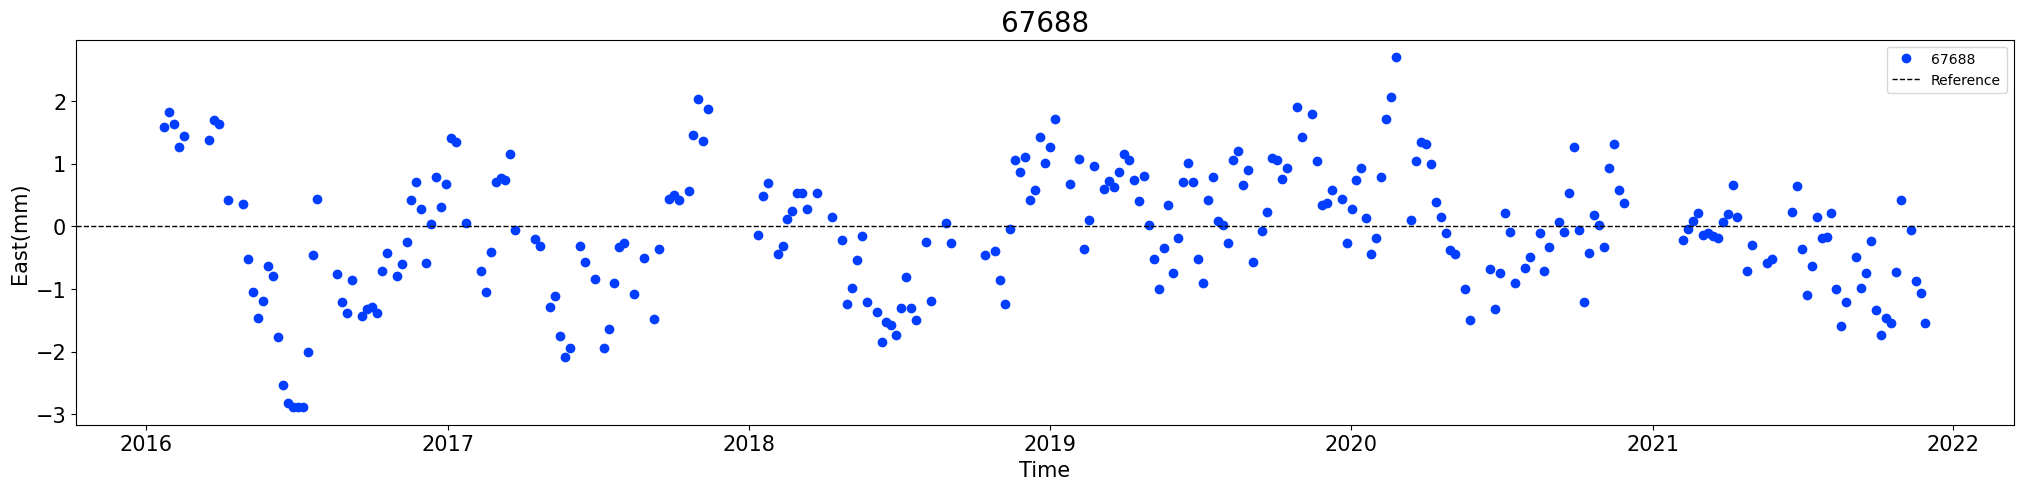

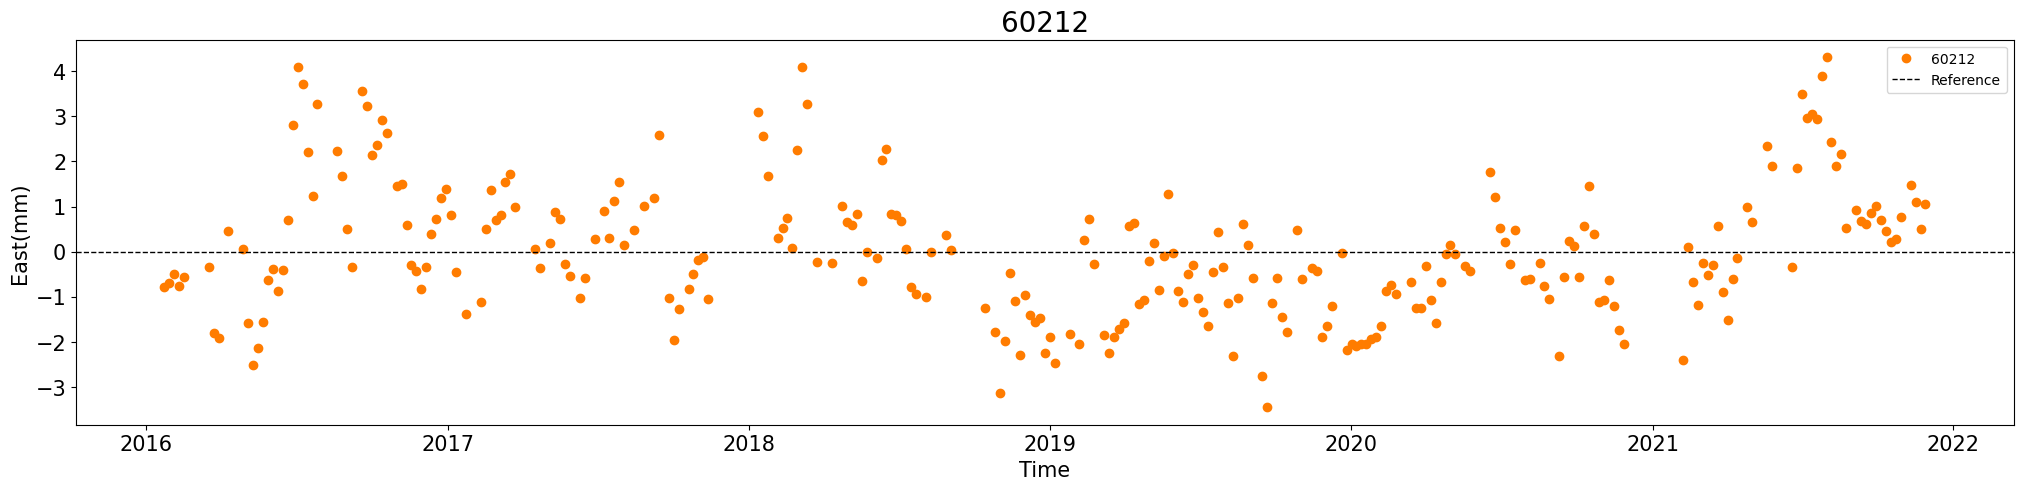

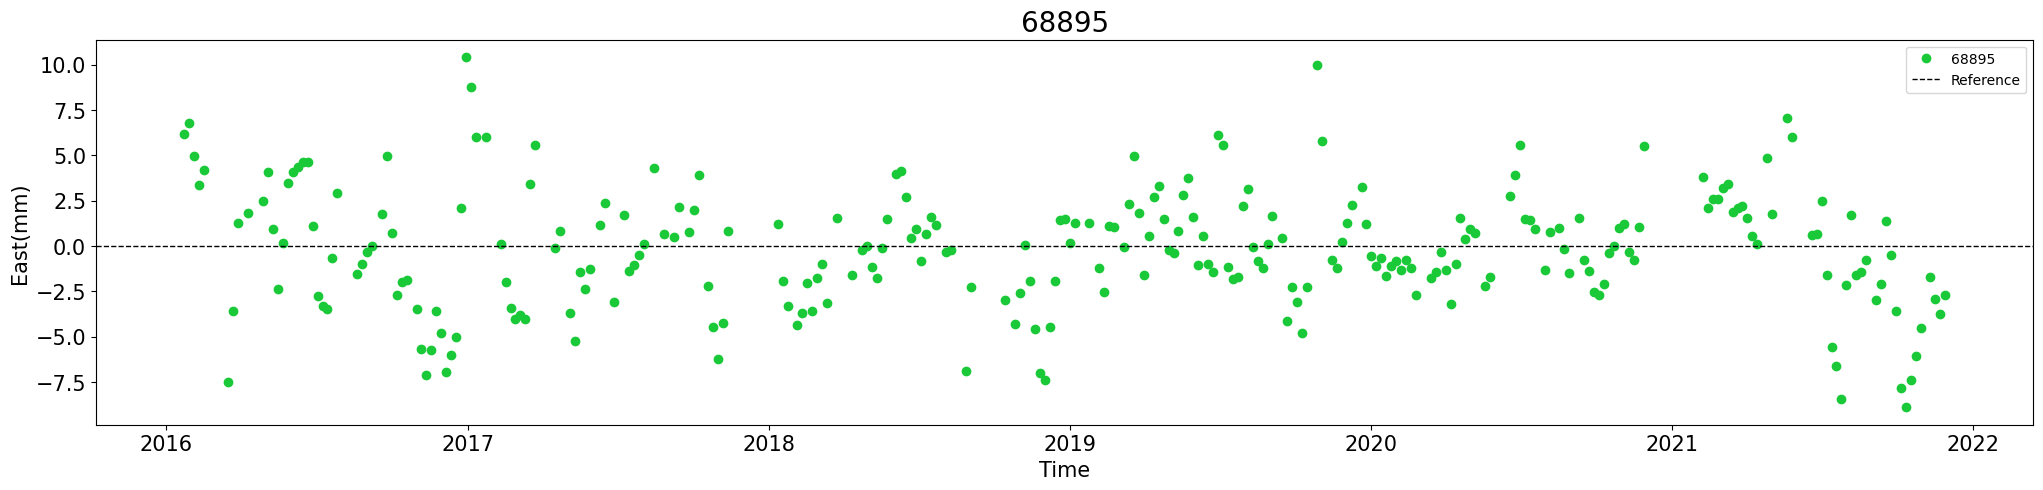

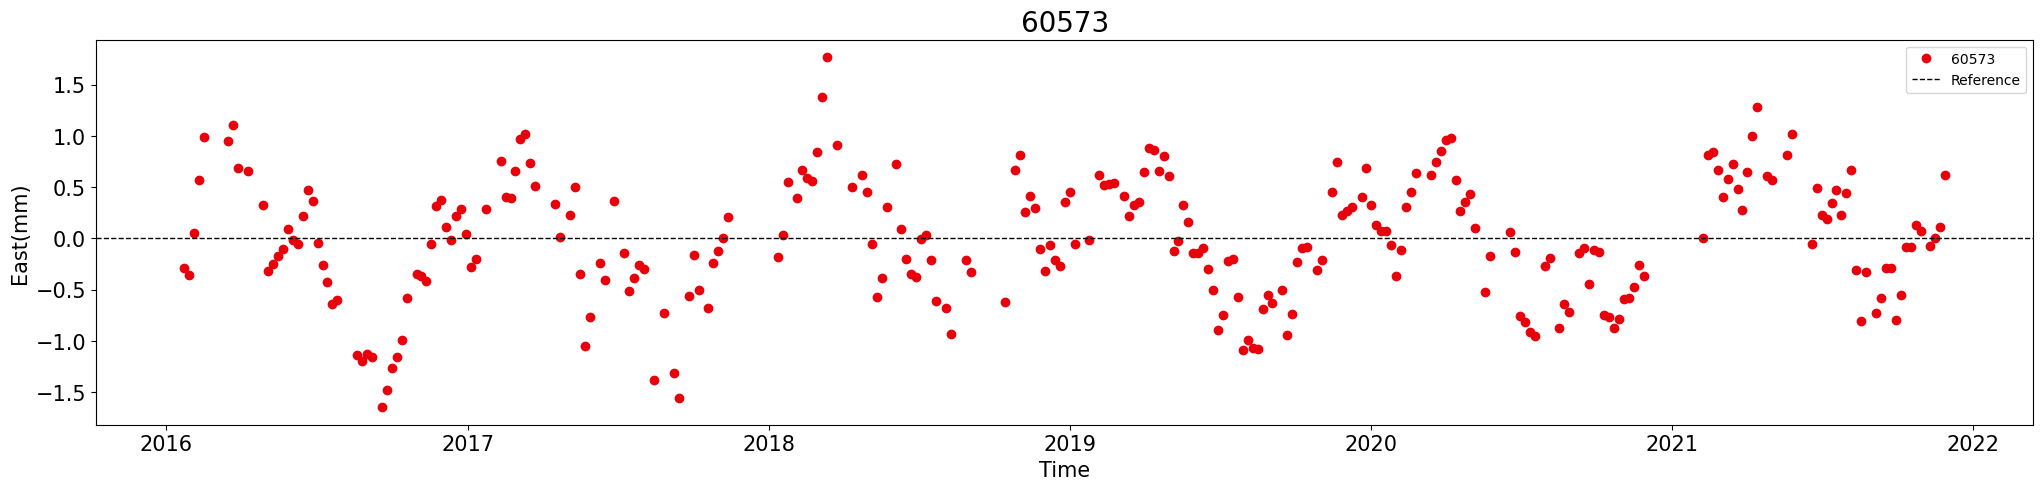

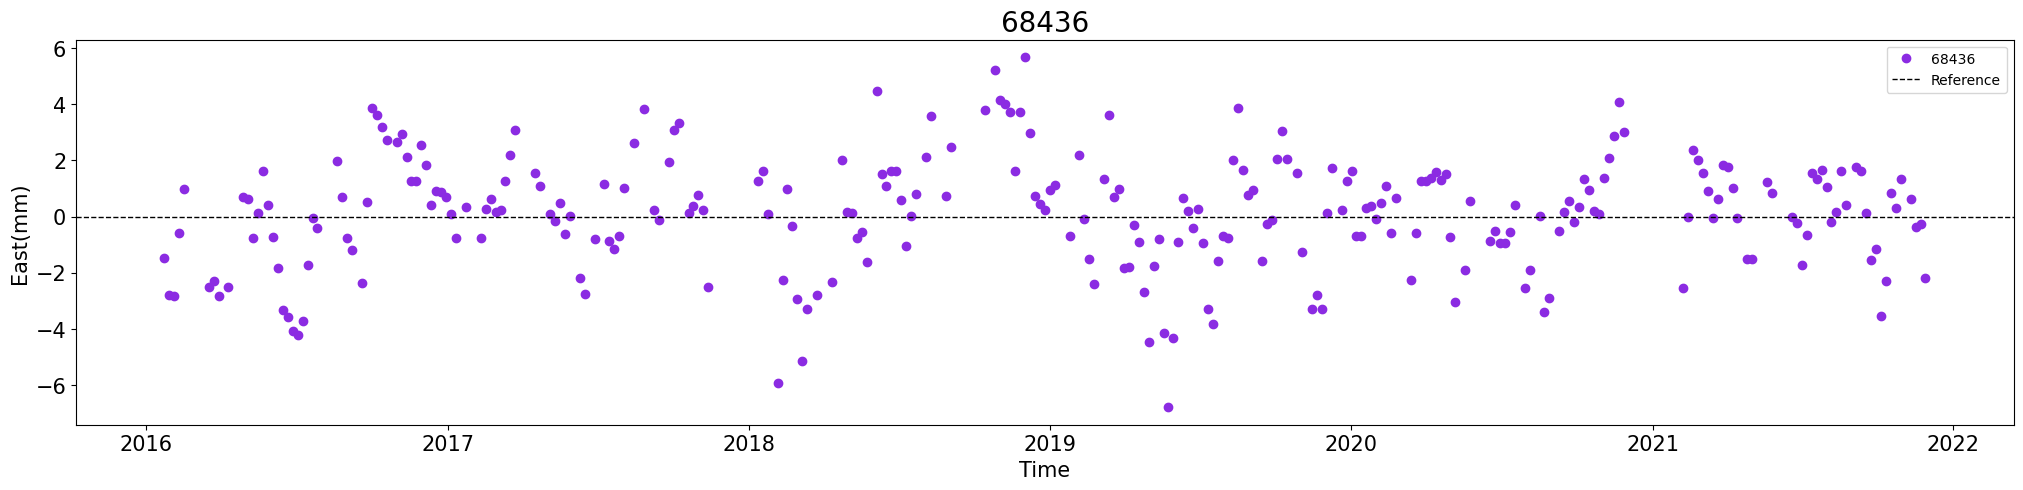

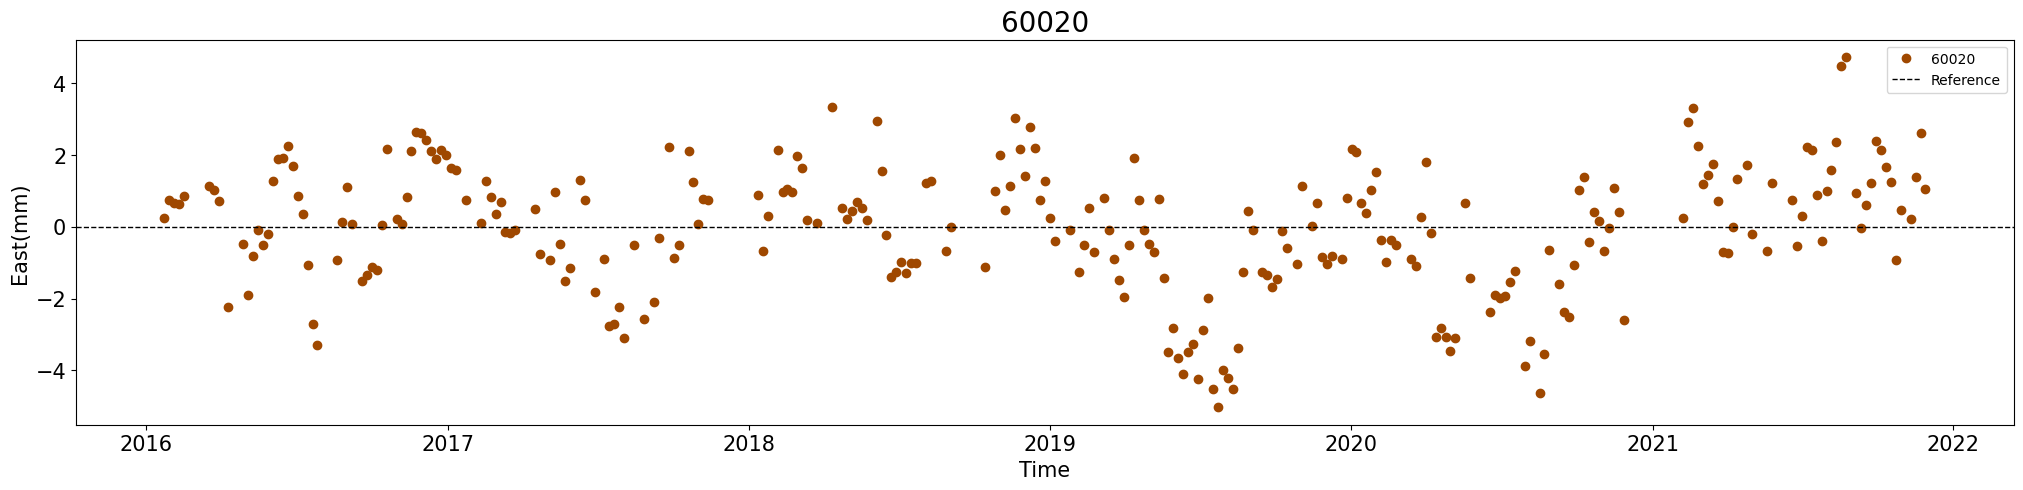

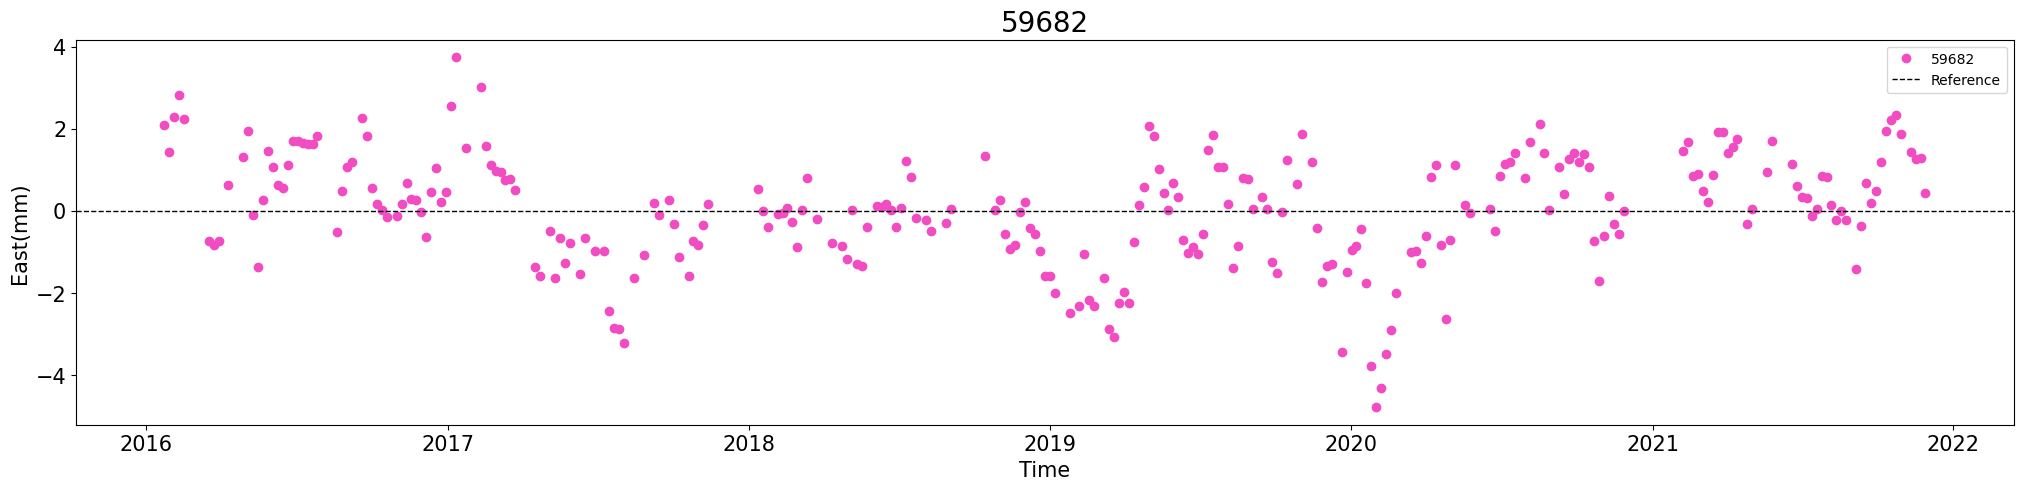

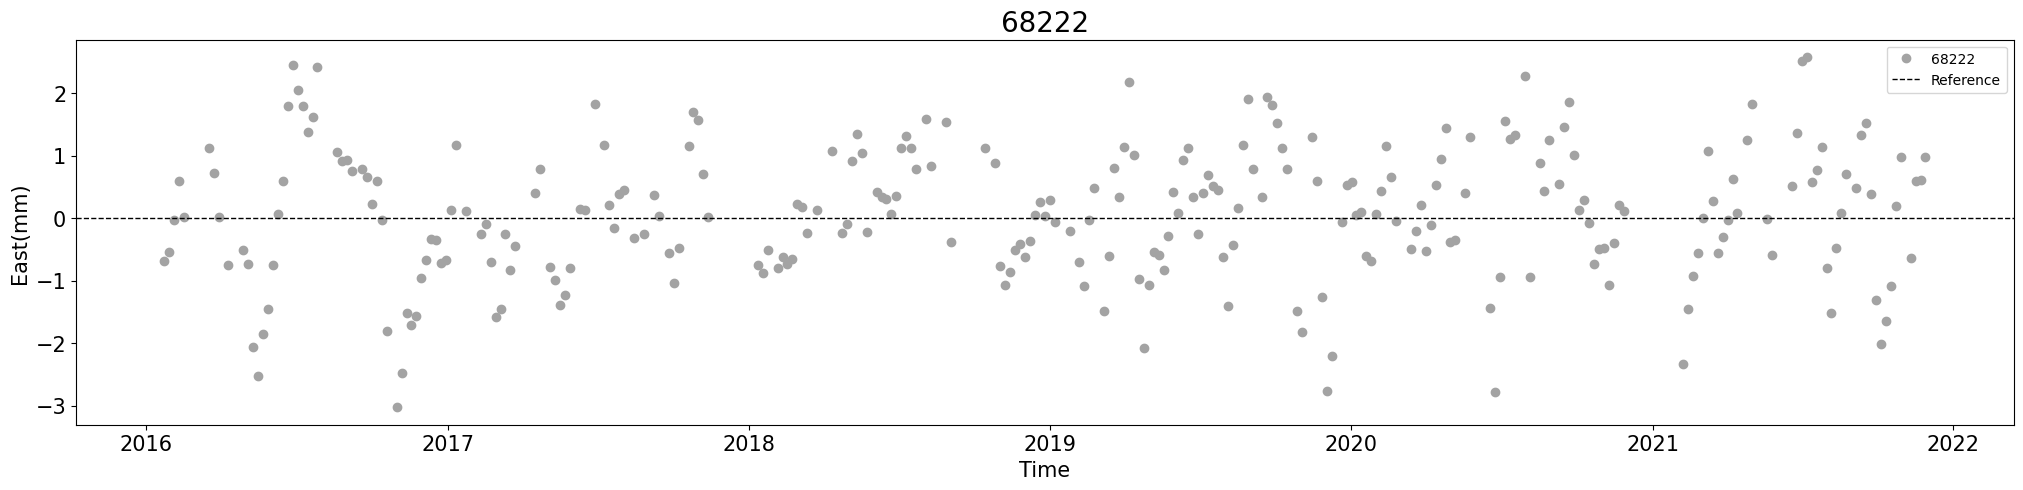

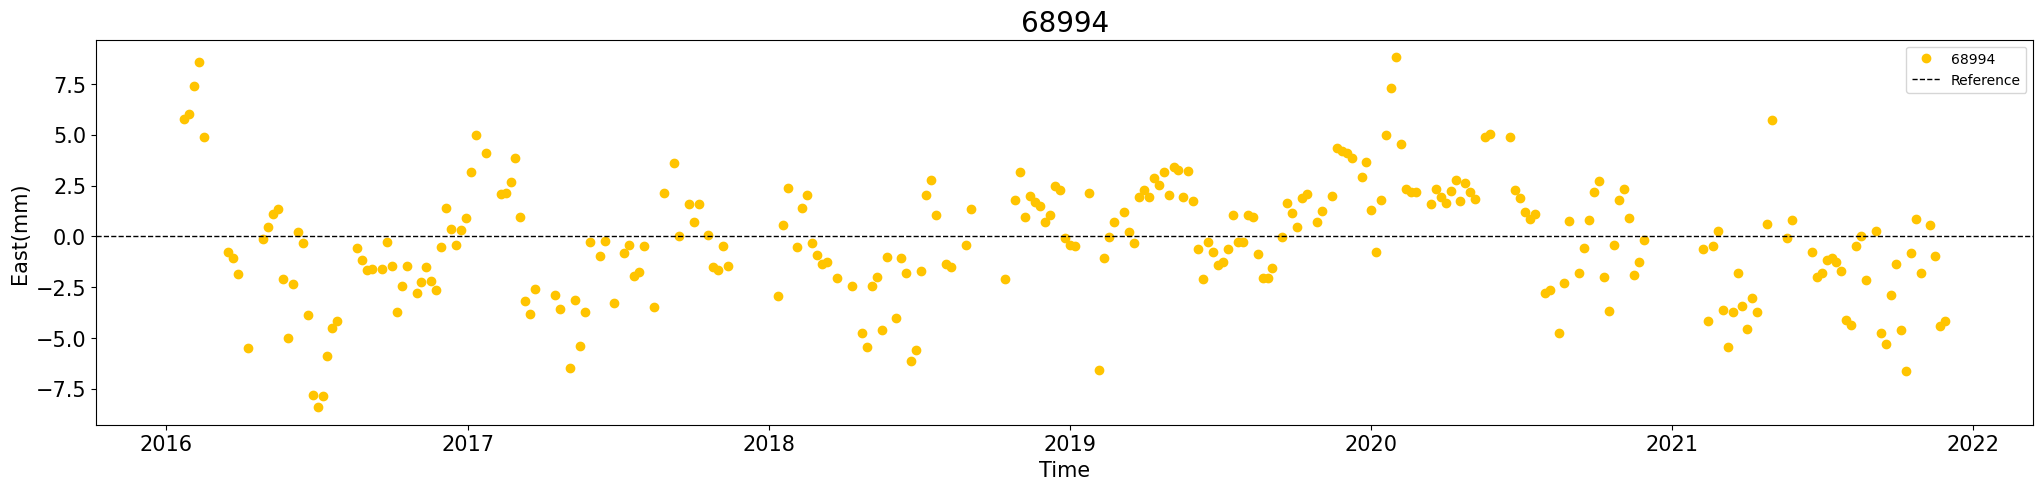

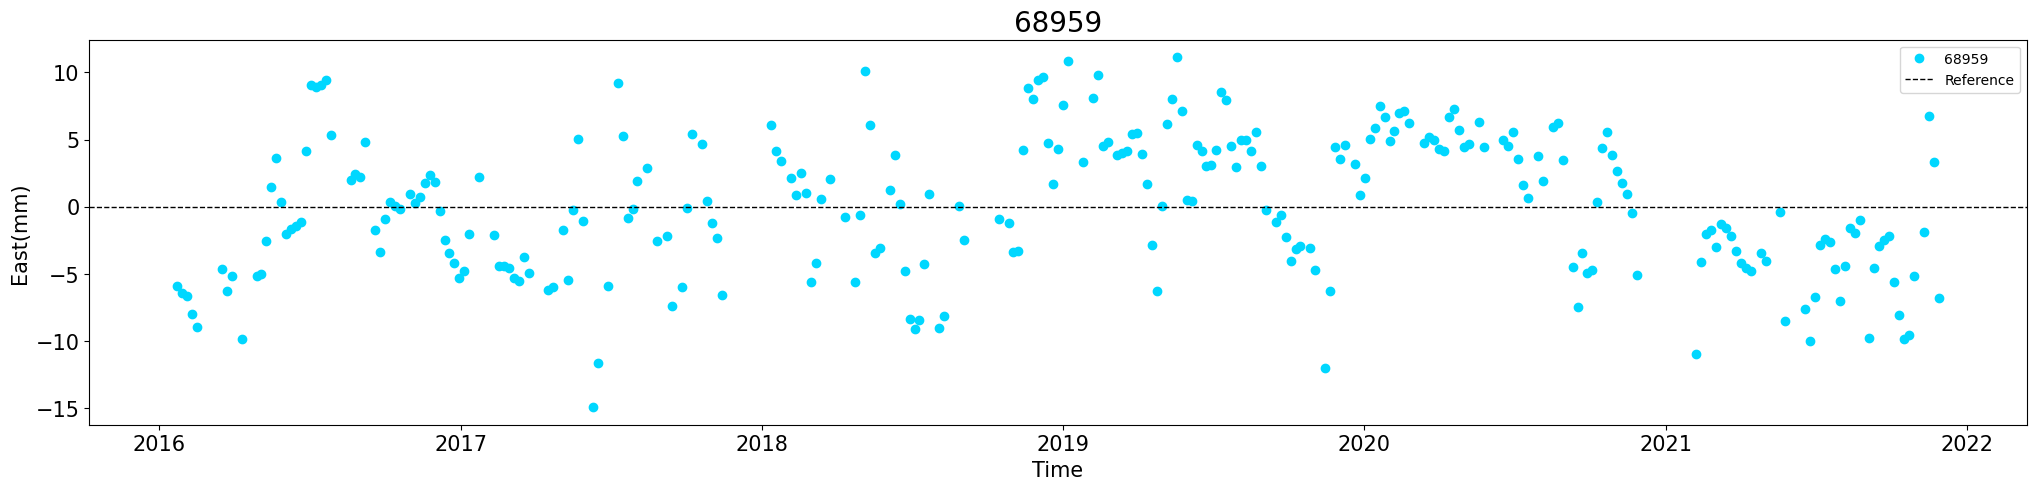

In [126]:
#checking the points plots - AFTER the reduction

colors = sns.color_palette("bright", len(points_avgrm_reduced))
folder = '/home/rafaela/internship/time_series/TimeSeries-insar/egm_files/insar_ts_plots/points_after_avg_rolling_mean/east'

for i, (column, color) in enumerate(zip(points_avgrm_reduced.columns, colors)):
    plt.figure(figsize=(25, 5))
    plt.plot(points_avgrm_reduced.index, points_avgrm_reduced[column], 'o', color=color, lw=2, label=column) 
    
    plt.title(f'{column}', fontsize = 20)
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Reference')
    plt.xlabel('Time', fontsize = 15)
    plt.xticks(fontsize=15)
    plt.ylabel('East(mm)', fontsize = 15)                                       
    plt.yticks(fontsize=15)
    #plt.ylim(-0.008,0.008)
    #plt.xlim(pd.Timestamp('2011-01-15'), pd.Timestamp('2018-07-15'))

    plt.legend()
    
    fl = os.path.join(folder, f'{column}.svg')
    f = io.BytesIO()
    plt.savefig(fl, format="svg")
    
    plt.show()